# Import Library

In [8]:
%%capture
!pip install adjustText

In [9]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from adjustText import adjust_text
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Dataset

In [12]:
# LOAD DATASET

anime_data = pd.read_table(r'C:\Users\84182\Desktop\AAAAA\archive\anime.csv', sep=',')
rating_data = pd.read_table(r'C:\Users\84182\Desktop\AAAAA\archive\anime.csv', delimiter=',')

# DISPLAY SHAPE
anime_data.shape , rating_data.shape

((17562, 35), (17562, 35))

In [13]:
# DISPLAY SOME DATA

print(f'Anime Data : ')
display(anime_data)

print(f'Rating Data : ')
display(rating_data)

Anime Data : 


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


Rating Data : 


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


# Exploratory Data Analysis (EDA)

In [14]:
display(anime_data.info())
display(rating_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

None

<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">


There's some null value on rating, type, genre columns. ok lets check it.

</div>

<Axes: >

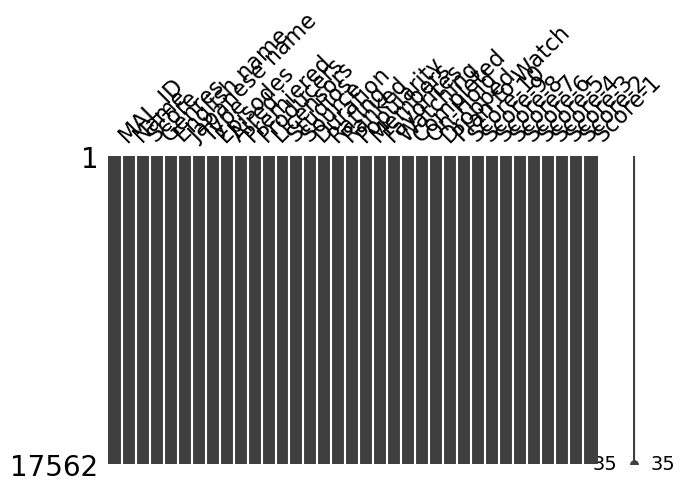

In [15]:
msno.matrix(df = anime_data, figsize=(7,4))

<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">


Because there are some data that have missing values, let's delete them.

</div>

In [57]:
# DELETE DATA IF GENRE AND TYPE ANIME IS NULL
anime_data = anime_data.dropna(subset=['Genres', 'Type']).reset_index(drop=True)

# FILL THE MISSING RATING VALUES WITH VALUE 0
anime_data = anime_data.fillna(value= 0).reset_index(drop=True)

anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17558 entries, 0 to 17557
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17558 non-null  int64 
 1   Name           17558 non-null  object
 2   Score          17558 non-null  object
 3   Genres         17558 non-null  object
 4   English name   17558 non-null  object
 5   Japanese name  17558 non-null  object
 6   Type           17558 non-null  object
 7   Episodes       17558 non-null  object
 8   Aired          17558 non-null  object
 9   Premiered      17558 non-null  object
 10  Producers      17558 non-null  object
 11  Licensors      17558 non-null  object
 12  Studios        17558 non-null  object
 13  Source         17558 non-null  object
 14  Duration       17558 non-null  object
 15  Rating         17558 non-null  object
 16  Ranked         17558 non-null  object
 17  Popularity     17558 non-null  int64 
 18  Members        17558 non-n

In [58]:
# PREPROCESSING

# CONVERT GENRE TO LIST OF STRINGS
anime_data['genre_split'] = anime_data['Genres'].apply(lambda x : x.split(', ')) 

# CONVERT TO NUMERIC DATA TYPE
anime_data['Episodes'] = pd.to_numeric(arg = anime_data['Episodes'], errors='coerce')    
anime_data.fillna(value= 0, inplace=True)  # FILL MISSING VALUE IN EPISODES COLUMN

anime_data

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,genre_split
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]"
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1.0,"Sep 1, 2001",Unknown,...,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"[Action, Drama, Mystery, Sci-Fi, Space]"
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26.0,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,"[Action, Mystery, Police, Supernatural, Drama,..."
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,"[Adventure, Fantasy, Shounen, Supernatural]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17553,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,0.0,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"[Adventure, Mystery, Supernatural]"
17554,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,0.0,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"[Comedy, Horror, Supernatural]"
17555,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,0.0,"Jul, 2021 to ?",Summer 2021,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"[Mystery, Dementia, Horror, Psychological, Sup..."
17556,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,0.0,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"[Adventure, Slice of Life, Comedy]"


-------------------------------------------------------------------------------------------

In [59]:
# CHECK DUPLICATED DATA

display(anime_data.duplicated(subset=['Name']).sum())  
display(rating_data.duplicated().sum())

# DROP DUPLICATED 
anime_data.drop_duplicates(subset=['Name'], inplace=True)
anime_data = anime_data.reset_index(drop=True)

0

0

In [60]:
# CHECK UNIQUE CLASS

anime_data['Type'].unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', 'Unknown'],
      dtype=object)

In [61]:
# CHANGE RATING = -1 TO 0
#rating_df['rating'] = rating_df['rating'].apply(func = lambda x: 0 if x == -1 else x) 
# WE ASSUME RATING = -1 MEANS THE USER HAS WATCHED THE ANIME BUT HAS NOT GIVEN A RATING YET. THIS CAN BE USED AS IMPLICIT FEEDBACK

# OTHER OPTION : DELETE ALL RATING = -1
rating_data = rating_data[rating_data['Rating'] != -1]

# DISPLAY DATA AFTER CHANGED RATING
rating_data

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


## Univariate Analysis

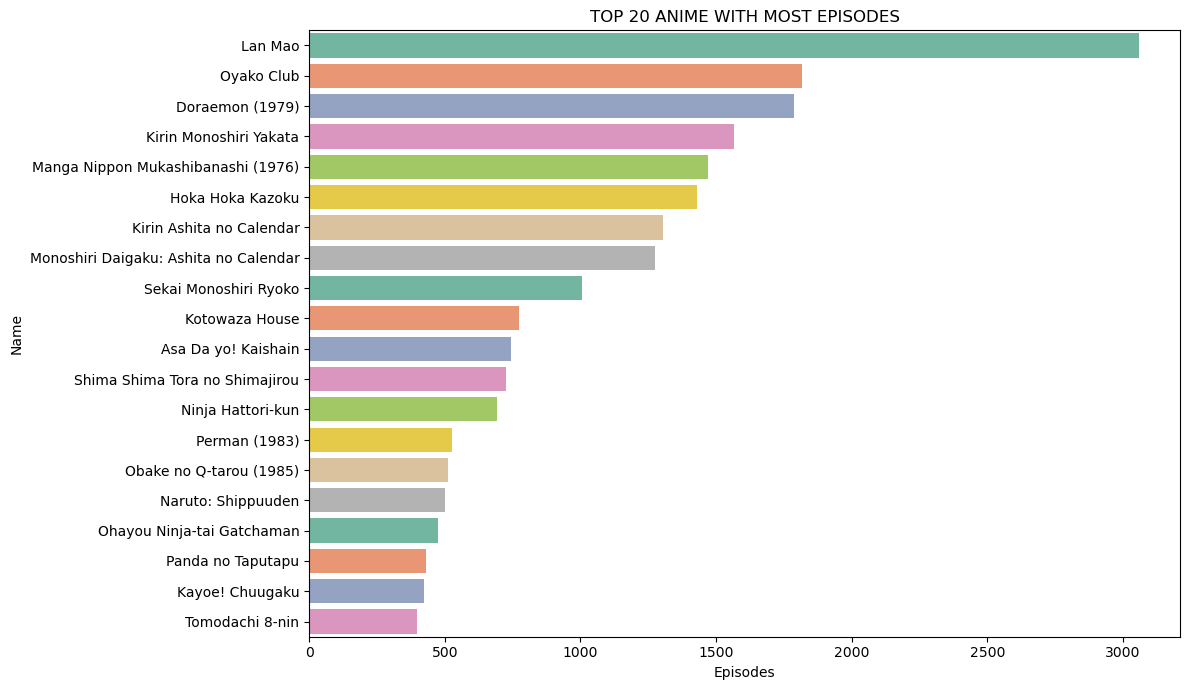

In [62]:
# DISPLAY ANIME WITH MOST EPISODE


anime_most_episodes = anime_data.sort_values(by= 'Episodes', ascending=False)  # SORT EPISODES BY DESCENDING
anime_most_episodes = anime_most_episodes.head(20)      # GET ONLY TOP 10 ANIME WITH MOST EPISODES


# BAR CHART
plt.figure(figsize=(12,7))

sns.barplot(data=anime_most_episodes, x='Episodes', y='Name', palette='Set2')
plt.title('TOP 20 ANIME WITH MOST EPISODES')

plt.tight_layout()
plt.show()

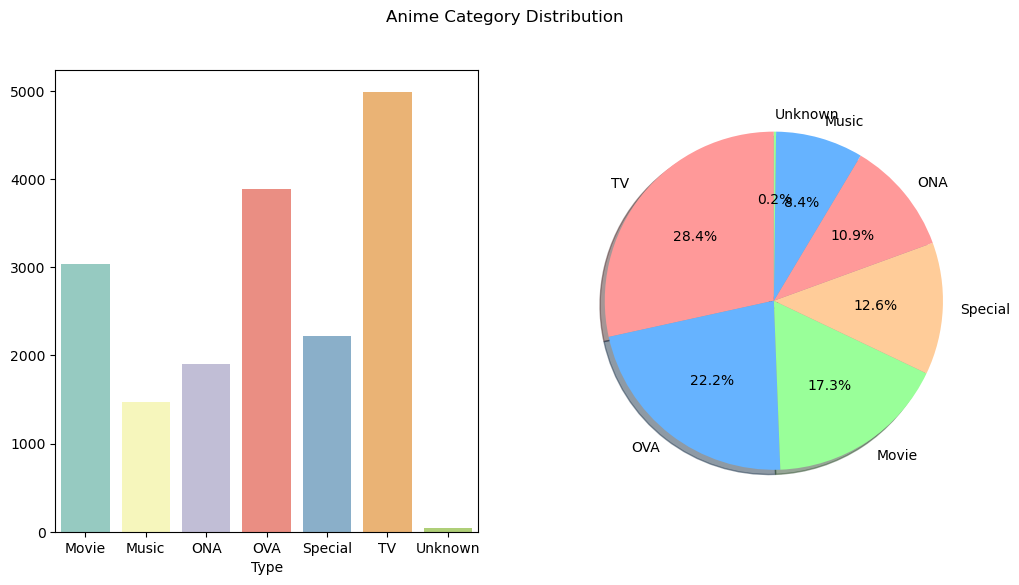

In [63]:
# DISPLAY DISTRIBUTION ANIME BY TYPE

anime_type = anime_data.groupby(by='Type')['Name'].count()

plt.figure(figsize=(12,6))

# VISUALIZE 
plt.subplot(1,2,1)
sns.barplot(x = anime_type.index, y = anime_type.values, palette='Set3')

plt.subplot(1,2,2)
type_counts = anime_data['Type'].value_counts()
plt.pie(type_counts, labels = type_counts.index, autopct='%1.1f%%', startangle=90, shadow=True, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.suptitle('Anime Category Distribution')
plt.show()

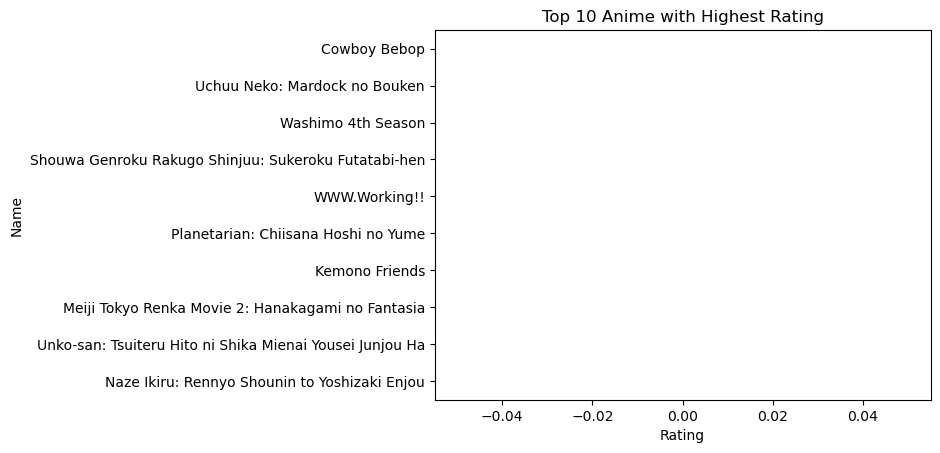

10 Anime with Highest Rating


,Name,Rating
0,Cowboy Bebop,0.0
11703,Uchuu Neko: Mardock no Bouken,0.0
11709,Washimo 4th Season,0.0
11708,Shouwa Genroku Rakugo Shinjuu: Sukeroku Futata...,0.0
11707,WWW.Working!!,0.0
11706,Planetarian: Chiisana Hoshi no Yume,0.0
11705,Kemono Friends,0.0
11704,Meiji Tokyo Renka Movie 2: Hanakagami no Fantasia,0.0
11702,Unko-san: Tsuiteru Hito ni Shika Mienai Yousei...,0.0
11728,Naze Ikiru: Rennyo Shounin to Yoshizaki Enjou,0.0


In [78]:

# DISPLAY ANIME WITH HIGHEST RATING


anime_high_rating = anime_data.sort_values(by = 'Rating', ascending= False)
anime_high_rating = anime_high_rating.head(10)

sns.barplot(data= anime_high_rating[:10], x = 'Rating', y= 'Name', palette = 'rainbow')
plt.title('Top 10 Anime with Highest Rating')
plt.show()

print('10 Anime with Highest Rating')
anime_high_rating[['Name', 'Rating']]

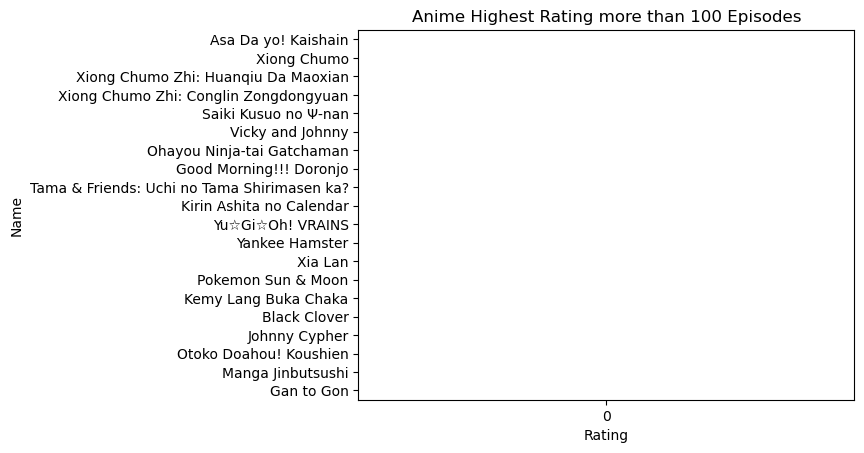

Anime with Highest Rating more than 100 Episodes


,Name,Rating
11678,Asa Da yo! Kaishain,0.0
11538,Xiong Chumo,0.0
11546,Xiong Chumo Zhi: Huanqiu Da Maoxian,0.0
11547,Xiong Chumo Zhi: Conglin Zongdongyuan,0.0
11809,Saiki Kusuo no Ψ-nan,0.0
11892,Vicky and Johnny,0.0
10984,Ohayou Ninja-tai Gatchaman,0.0
11078,Good Morning!!! Doronjo,0.0
11456,Tama & Friends: Uchi no Tama Shirimasen ka?,0.0
11375,Kirin Ashita no Calendar,0.0


In [80]:
# DISPLAY ANIME WITH HIGHEST RATING AND MORE THAN 100 EPISODES

anime_high_rating = anime_data.sort_values(by= 'Rating', ascending = False)
anime_high_rating = anime_high_rating[anime_high_rating['Episodes'] > 100]  # ONLY SHOW ANIME MORE THAN 100 EPISODES
anime_high_rating = anime_high_rating.head(20)

# VISUALIZATION
sns.barplot(data = anime_high_rating, x = 'Rating', y = 'Name', palette = 'tab20')
plt.title('Anime Highest Rating more than 100 Episodes')

plt.xticks(ticks=range(0, int(anime_high_rating['Rating'].max()) + 1, 1))
plt.show()

print('Anime with Highest Rating more than 100 Episodes')
anime_high_rating[['Name', 'Rating']]

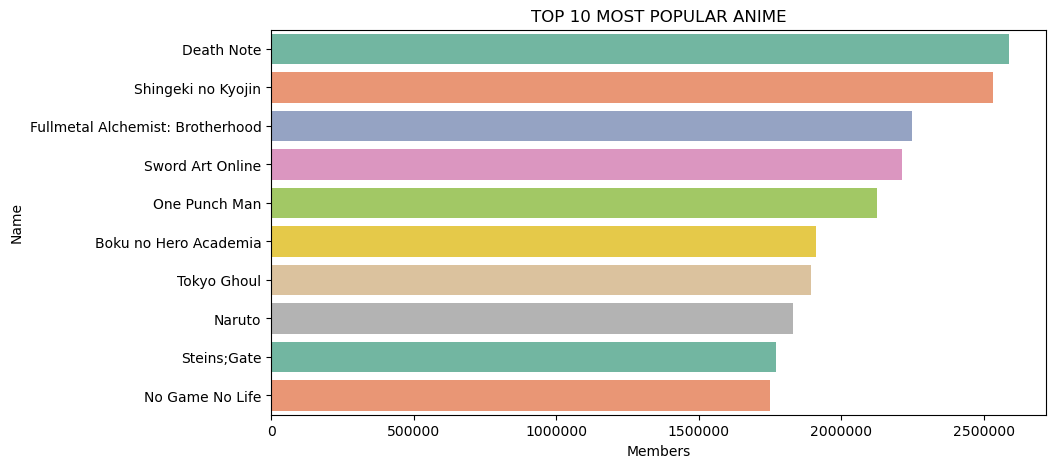

In [81]:
# DISPLAY MOST POPULAR ANIME

popular_anime = anime_data.sort_values(by = 'Members', ascending=False)  # SORT TO DESCENDING
popular_anime = popular_anime.head(10)   # GET TOP 10

# VISUALIZATION
plt.figure(figsize=(10,5))
sns.barplot(data= popular_anime, x = 'Members', y = 'Name', palette='Set2')
plt.title('TOP 10 MOST POPULAR ANIME')

plt.ticklabel_format(style='Plain', axis='x')   # so that the x-axis displays its original value (not scientific notation value)

plt.show()

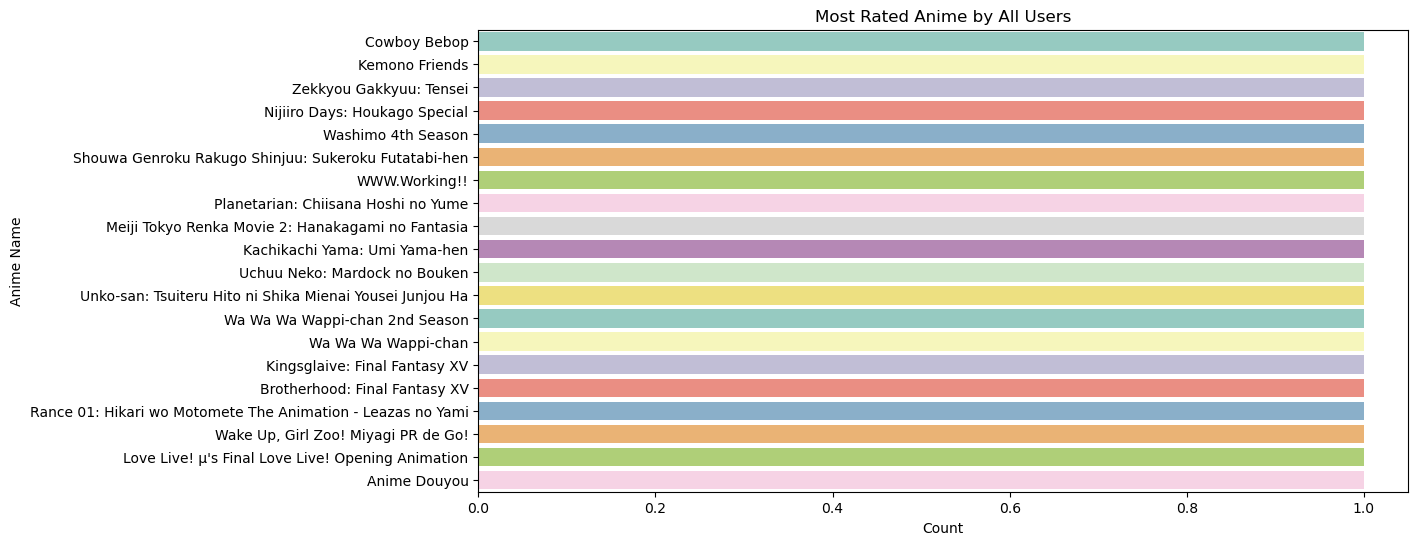

In [87]:
# SHOW THE MOST RATED ANIME BY ALL USERS

most_rated_anime = rating_data.groupby(by = 'MAL_ID')['MAL_ID'].count()
most_rated_anime_sorted = most_rated_anime.sort_values(ascending = False).head(20)   # ---> TAKE 20 MOST RATED ANIME BY ALL USERS

# FIND ANIME NAME in most_rated_anime THAT HAS MOST RATED
anime = anime_data[anime_data['MAL_ID'].isin(most_rated_anime_sorted.index)]
anime_sorted = anime.set_index('MAL_ID').loc[most_rated_anime_sorted.index].reset_index()  # ---> ADJUST DATAFRAME SEQUENCE

# CONVERT TO DATAFRAME TO MAKE EASIER VISUALIZATION
dict = {'Name' : anime_sorted['Name'],
        'count' : most_rated_anime_sorted.values}
df = pd.DataFrame(data = dict)

# SHOW VISUALIZATION
plt.figure(figsize=(12,6))
sns.barplot(x = df['count'], y = df['Name'], orient='h', palette='Set3')
plt.title('Most Rated Anime by All Users')
plt.xlabel('Count')
plt.ylabel('Anime Name')
plt.show()

In [91]:
# DISPLAY MOST HIGHEST RATING ANIME THAT RATED BY ALL USERS

most_highest_rating_anime = rating_data.groupby(by = 'MAL_ID')['Rating'].mean()

# CONVERT TO TO DATAFRAME FOR EASIER VISUALIZATION
dict = {'MAL_ID' : most_highest_rating_anime.index.tolist(),
        'Frequency' : most_rated_anime.values.tolist(),
        'Avg_rating' : most_highest_rating_anime.values.tolist()}
df = pd.DataFrame(dict)

# DROP ANIME THAT FREQUENCY RATED BY ALL USER < 100
df = df[df['Frequency'] >= 100]    # ---> BECAUSE WE WANT TO TAKE THE HIGHEST RATED ANIME THAT IS THE MOST RELEVANT

# SORT HIGHEST RATING ANIME THAT RATED BY ALL USERS
df = df.sort_values(by = ['avg_rating', 'frequency'], ascending= False).head(20)
df = pd.merge(left = anime_data[['MAL_ID', 'Name']], right = df, how = 'right', on ='MAL_ID')

# SHOW VISUALIZATION
plt.figure(figsize= (10,6))
ax = sns.barplot(x = df['Avg_rating'], y = df['Name'], orient = 'h', palette='hls')

# DISPLAY RATING VALUE IN EACH BAR
for index, row in df.iterrows():
    ax.text(x =  row['avg_rating'] / 2, y = index , s = f'{row["avg_rating"]:.2f}', va = 'center', ha = 'left', color = 'black')


plt.xlabel('Average Rating')
plt.ylabel('Anime Name')
plt.title('Highest Anime Rating that Rated by Users')

plt.show()

TypeError: Could not convert R - 17+ (violence & profanity) to numeric

In [92]:
# SHOW THE MOST RATED ANIME BY ALL USERS

most_rated_anime = rating_data.groupby(by = 'anime_id')['user_id'].count()
most_rated_anime_sorted = most_rated_anime.sort_values(ascending = False).head(20)   # ---> TAKE 20 MOST RATED ANIME BY ALL USERS

# FIND ANIME NAME in most_rated_anime THAT HAS MOST RATED
anime = anime_data[anime_data['anime_id'].isin(most_rated_anime_sorted.index)]
anime_sorted = anime.set_index('anime_id').loc[most_rated_anime_sorted.index].reset_index()  # ---> ADJUST DATAFRAME SEQUENCE

# CONVERT TO DATAFRAME TO MAKE EASIER VISUALIZATION
dict = {'name' : anime_sorted['name'],
        'count' : most_rated_anime_sorted.values}
df = pd.DataFrame(data = dict)

# SHOW VISUALIZATION
plt.figure(figsize=(12,6))
sns.barplot(x = df['count'], y = df['name'], orient='h', palette='Set3')
plt.title('Most Rated Anime by All Users')
plt.xlabel('Count')
plt.ylabel('Anime Name')
plt.show()

KeyError: 'anime_id'

### Check Distribution

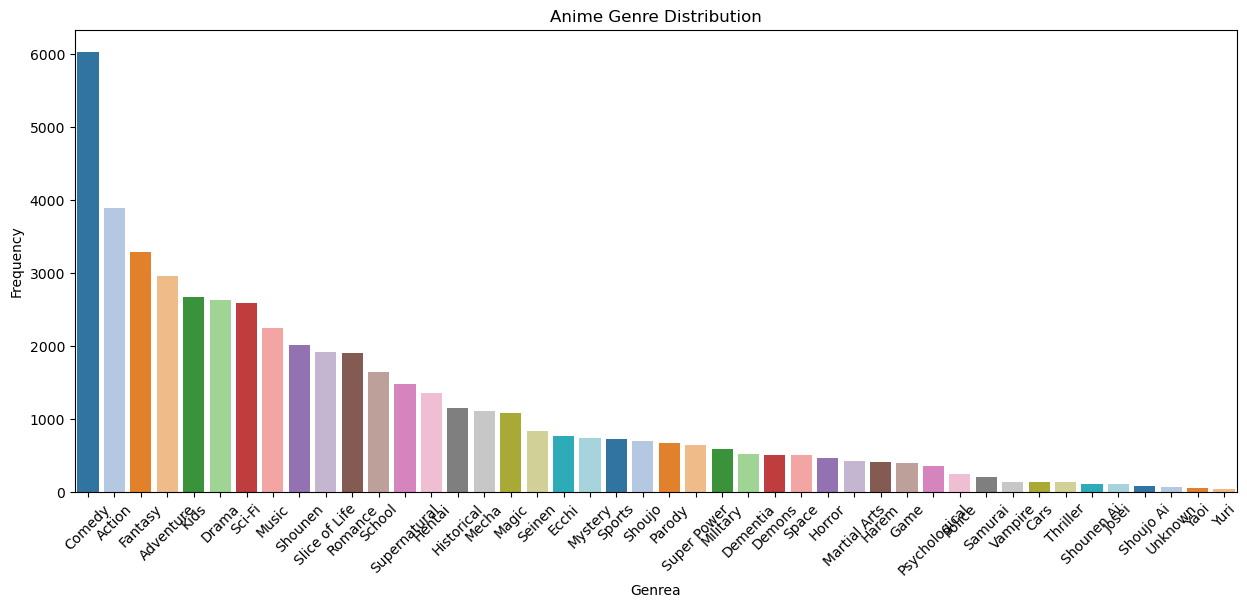

In [94]:
# CHECK GENRE DISTRIBUTION

genre_list = anime_data['Genres'].apply(lambda x : x.split(', '))

all_genre = sum(genre_list, start = [])  # SPLIT INTO SINGLE STRING
genre_count = Counter(all_genre)         

genre_count = pd.DataFrame(data = genre_count.items(), columns= ['Genres', 'frequency']).sort_values(by = 'frequency', ascending= False)

# DISPLAY GENRE DISTRIBUTION
plt.figure(figsize=(15,6))

sns.barplot(x = genre_count['Genres'], y = genre_count['frequency'], palette= 'tab20')
plt.xlabel('Genrea')
plt.ylabel('Frequency')
plt.title('Anime Genre Distribution')
plt.xticks(rotation = 45)

plt.show()

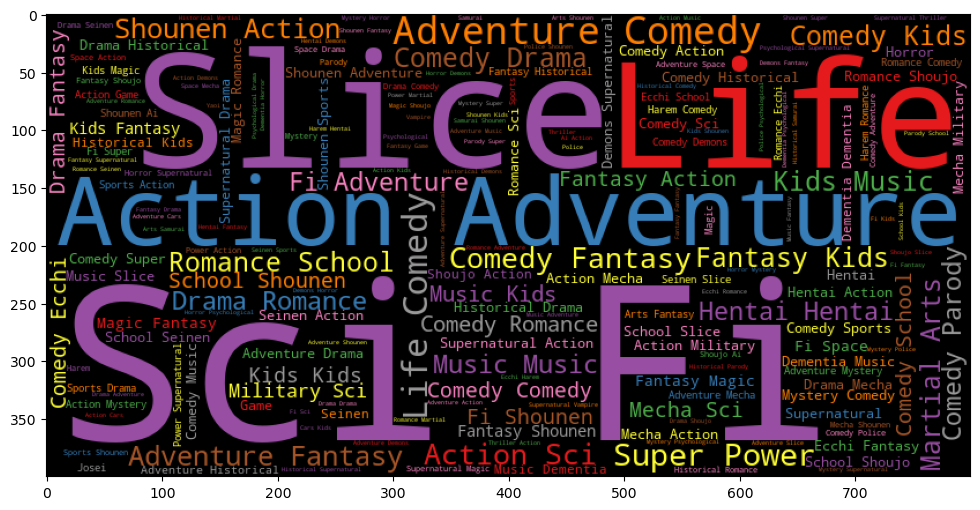

In [97]:
# CHECK MOST GENRE ANIME
wordcloud = WordCloud(width = 800, height = 400, stopwords=None, colormap='Set1').generate(text = anime_data['Genres'].str.cat(sep=', '))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)

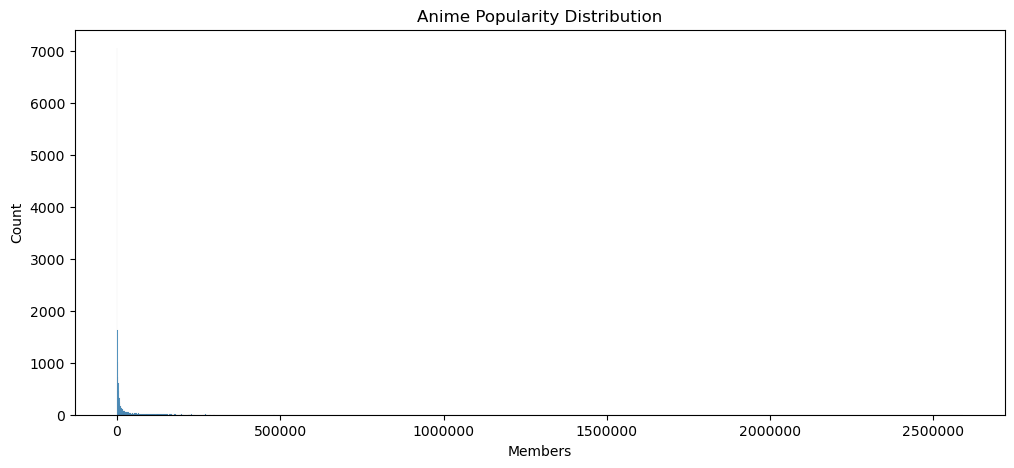

In [96]:
# CHECK ANIME POPULARITY DISTRIBUTION

plt.figure(figsize=(12,5))
sns.histplot(data= anime_data, x = 'Members')
plt.title('Anime Popularity Distribution')
plt.ticklabel_format(style='plain', axis='x')  # so that the x-axis displays its original value (not scientific notation value)


In [98]:
# THE AVERAGE OF ANIME POPULARITY 

avg_popularity = np.mean(anime_data['Members'])

print(f'The average popularity of anime is around {avg_popularity:.2f}')

The average popularity of anime is around 34643.85


<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">

  <h4 style="font-size: 20px; color: #8E44AD; font-weight: bold; margin-bottom: 15px;">🧬 Explanation : 💡</h4>

There are anime with very big popularity and famous. Popularity value that exceeds 50000 is anime with big popularity. And the average for overall anime popularity is around ~18000



</div>

Text(0.5, 1.0, 'Anime Rating Distribution')

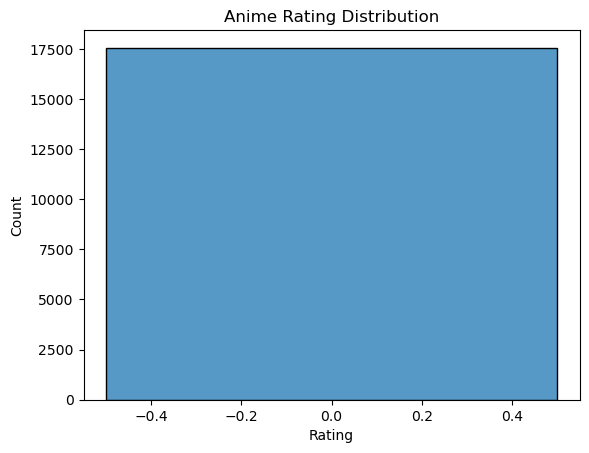

In [99]:
# CHECK RATING DISTRIBUTION

sns.histplot(data = anime_data, x = 'Rating')
plt.title('Anime Rating Distribution')

Text(0.5, 1.0, 'Anime Episodes Distribution Clipped to 200 Episodes')

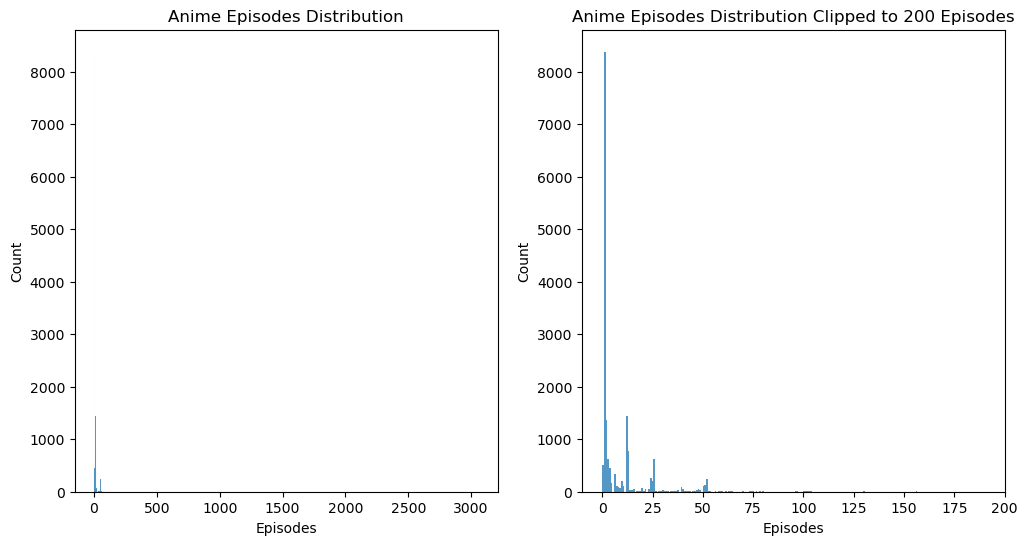

In [100]:
# CHECK EPISODES DISTRIBUTION

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data = anime_data, x = 'Episodes')
plt.title('Anime Episodes Distribution')

plt.subplot(1,2,2)
sns.histplot(data = anime_data, x = 'Episodes')
plt.xlim([-10, 200])
plt.title('Anime Episodes Distribution Clipped to 200 Episodes')

In [103]:
avg_episodes = np.mean(anime_data['Genres'])
print(f'Average of Episodes Anime are : {Avg_Episodes} ')

TypeError: Could not convert Action, Adventure, Comedy, Drama, Sci-Fi, SpaceAction, Drama, Mystery, Sci-Fi, SpaceAction, Sci-Fi, Adventure, Comedy, Drama, ShounenAction, Mystery, Police, Supernatural, Drama, MagicAdventure, Fantasy, Shounen, SupernaturalAction, Sports, Comedy, ShounenComedy, Drama, Josei, Romance, Slice of LifeSlice of Life, Comedy, Sports, ShounenAction, Cars, Sports, Drama, SeinenDrama, Horror, Mystery, Police, Psychological, Seinen, ThrillerAction, Adventure, Comedy, Super Power, Martial Arts, ShounenAction, Adventure, Comedy, Super Power, Drama, Fantasy, ShounenAction, Comedy, Sports, School, ShounenAction, Shounen, SportsComedy, Romance, School, ShounenAction, Adventure, Comedy, Ecchi, Sci-Fi, ShounenAction, Sci-Fi, Psychological, DramaAction, Supernatural, VampireComedy, ShounenAction, Military, Sci-Fi, Historical, Drama, SeinenAction, Sci-Fi, Dementia, Psychological, Drama, MechaDrama, Mecha, Psychological, Sci-FiSci-Fi, Dementia, Psychological, Drama, MechaAction, Adventure, Demons, Drama, Fantasy, Horror, Military, Romance, Seinen, SupernaturalAction, Mecha, Police, Psychological, Sci-Fi, SeinenAction, Historical, Drama, Romance, Martial Arts, Samurai, ShounenAction, Adventure, Comedy, Historical, Romance, Samurai, ShounenSamurai, Historical, Drama, ShounenAction, Military, Sci-Fi, Adventure, Horror, Supernatural, SeinenGame, Sci-Fi, Adventure, Mystery, Magic, FantasyComedy, Magic, Romance, Seinen, SupernaturalComedy, Supernatural, Magic, Romance, SeinenAction, Drama, Romance, Shoujo, SupernaturalSci-Fi, Comedy, Sports, Drama, ShounenHarem, Slice of Life, Comedy, Drama, RomanceAction, Military, Sci-Fi, Police, Drama, Mecha, ShounenAction, Adventure, Fantasy, Horror, Sci-FiAdventure, Fantasy, Sci-Fi, ShounenComedy, Drama, Music, Shounen, Slice of LifeAdventure, Romance, Mecha, Military, Sci-Fi, Horror, Space, DramaSci-Fi, Comedy, Drama, Romance, Ecchi, SeinenAction, Demons, Historical, Romance, Shounen, SupernaturalAction, Comedy, Magic, Romance, Fantasy, School, ShoujoHarem, Drama, Magic, RomanceSci-Fi, Harem, Comedy, Romance, Ecchi, ShounenAction, Comedy, Drama, Magic, SeinenAction, Comedy, Drama, Magic, SeinenSlice of Life, Comedy, SchoolAction, Adventure, Historical, Supernatural, Romance, Samurai, FantasySci-Fi, Adventure, Comedy, Super Power, ShounenAction, Fantasy, Military, Sci-FiAction, Military, Sci-Fi, Comedy, MechaAction, Comedy, SchoolAction, Military, MechaComedy, School, Shoujo, Super PowerAction, Drama, Mecha, Military, Sci-FiAction, Comedy, Drama, Magic, Super PowerAction, Comedy, Drama, Magic, Super PowerHarem, Comedy, Drama, Magic, Romance, Ecchi, Fantasy, School, SeinenAction, Military, Sci-Fi, Space, MechaAdventure, Drama, Mecha, Military, Romance, Sci-FiMilitary, Sci-Fi, Space, Drama, MechaMilitary, Sci-Fi, Drama, Romance, MechaMilitary, Sci-Fi, Adventure, Space, Drama, Romance, MechaMilitary, Sci-Fi, Space, Drama, Romance, MechaSpace, Comedy, Mecha, Military, Drama, Sci-FiMilitary, Sci-Fi, Space, Drama, MechaDrama, Mecha, Military, Sci-Fi, SpaceDrama, Mecha, Military, Sci-Fi, SpaceAction, Military, Sci-Fi, Space, Drama, MechaAction, Drama, Mecha, Military, Sci-Fi, SpaceSci-Fi, Adventure, Space, Drama, MechaAction, Drama, Mecha, Military, Romance, Sci-Fi, SpaceAction, Drama, Mecha, Military, Romance, Sci-Fi, SpaceAction, Military, Sci-Fi, Adventure, Space, Drama, Romance, MechaAdventure, Comedy, Drama, Martial Arts, Mecha, Romance, Sci-Fi, Space, SportsAction, Sci-Fi, AdventureAction, Comedy, Drama, Fantasy, Magic, Mecha, Romance, School, Shoujo AiComedy, Drama, Fantasy, MagicComedy, Drama, Fantasy, Magic, Romance, Shoujo, Super PowerSlice of Life, Supernatural, Drama, RomanceComedy, Drama, Romance, ShoujoAdventure, Comedy, Fantasy, Magic, Romance, ShoujoAdventure, Comedy, Horror, Psychological, Supernatural, Drama, Romance, ShoujoSlice of Life, Comedy, Romance, ShounenDrama, Romance, School, ShoujoAdventure, Comedy, Fantasy, Sci-Fi, ShounenAdventure, Fantasy, Psychological, Comedy, ShounenAdventure, Comedy, Mecha, Sci-FiAction, Comedy, Drama, ShounenSci-Fi, Adventure, Comedy, MagicAction, Ecchi, Adventure, Fantasy, Magic, Comedy, Super Power, Sci-FiAction, Mecha, Romance, Sci-Fi, SpaceComedy, School, ShounenAdventure, Comedy, FantasyAdventure, Comedy, Romance, FantasyAdventure, Comedy, Romance, FantasyAdventure, Comedy, FantasyComedy, Drama, Romance, Slice of LifeSlice of Life, Comedy, Supernatural, Drama, Romance, ShoujoAction, Adventure, Comedy, Drama, Fantasy, Magic, Military, ShounenMusic, Comedy, Supernatural, Drama, Romance, ShoujoAdventure, Fantasy, Magic, Martial Arts, Comedy, Romance, Historical, Drama, ShoujoAdventure, Fantasy, Romance, Drama, ShoujoComedy, Romance, SchoolComedy, Drama, RomanceAction, Sci-Fi, Comedy, Fantasy, Mecha, ShounenAction, Drama, Mecha, Sci-Fi, ShounenAction, Adventure, Comedy, Demons, Drama, Shounen, SupernaturalAction, Adventure, Comedy, Demons, Drama, Josei, SupernaturalAction, Adventure, Comedy, Demons, Drama, Josei, SupernaturalAction, Comedy, Drama, Mystery, Shounen, Super Power, SupernaturalComedy, Ecchi, Romance, School, Slice of LifeAction, Psychological, Military, Drama, Sci-FiComedy, Game, Shounen, SupernaturalAction, Adventure, Super Power, Fantasy, ShounenAction, Adventure, Super Power, ShounenAction, Adventure, Super Power, Fantasy, ShounenAction, Adventure, Super Power, Fantasy, ShounenMecha, Sci-FiAdventure, Comedy, Demons, Drama, Fantasy, Magic, Mystery, Romance, ShoujoSupernatural, Drama, Magic, Romance, Mecha, Shounen, Shoujo AiDrama, Romance, Slice of Life, SupernaturalComedy, Drama, Romance, School, Shoujo, Slice of LifeSci-Fi, Comedy, Drama, Magic, Romance, EcchiDrama, Romance, Slice of LifeDrama, Romance, Slice of LifeAction, Mystery, Supernatural, Drama, Romance, Fantasy, Josei, Shounen AiAction, Military, Mystery, Horror, Supernatural, Drama, VampireAction, Sci-Fi, Comedy, Ecchi, Shoujo AiAction, Sci-Fi, Super PowerAction, Adventure, Fantasy, Magic, SupernaturalAction, Adventure, Comedy, Super Power, Supernatural, ShounenAction, Drama, Fantasy, Horror, Magic, Sci-Fi, SupernaturalAction, Super Power, Drama, Magic, Romance, Fantasy, ShoujoComedy, Ecchi, Fantasy, Harem, Magic, Romance, School, Shounen, Super Power, SupernaturalSlice of Life, Drama, Romance, Shoujo, Shoujo AiAdventure, Fantasy, Horror, Mecha, Psychological, Sci-Fi, Shounen, Space, SupernaturalAdventure, Drama, Fantasy, Military, Sci-FiAction, Comedy, Historical, Samurai, ShounenComedy, Fantasy, Kids, Romance, School, ShounenAdventure, Comedy, Fantasy, Historical, ShounenAction, Adventure, FantasyAction, Drama, Mecha, Music, Mystery, Psychological, Romance, Sci-FiHistorical, Mecha, Samurai, Sci-FiSci-Fi, Adventure, Comedy, Drama, Fantasy, Mecha, ShounenAction, Sci-Fi, Adventure, Super Power, DramaAction, Horror, Mystery, Romance, Super Power, Supernatural, VampireComedy, Drama, School, Shounen, SportsAdventure, Drama, FantasyMystery, Comedy, Historical, Demons, Supernatural, Drama, ShounenAction, Ecchi, Martial Arts, Comedy, Super Power, School, ShounenAction, Adventure, Romance, Sci-Fi, Shounen, Super PowerAdventure, RomanceAction, Adventure, Fantasy, Magic, Romance, Supernatural, ShounenComedy, Magic, Romance, School, ShoujoComedy, Magic, Romance, SchoolAction, Ecchi, Mecha, Sci-Fi, Shounen, SpaceAction, Ecchi, Mecha, Sci-Fi, Shounen, SpaceAdventure, Psychological, Romance, Fantasy, MechaSchool, Shounen, SportsAction, Mecha, Sci-Fi, Shounen, SpaceAction, Cars, Drama, Seinen, SportsAction, Cars, Drama, Seinen, SportsAction, Cars, Sports, Drama, Romance, SeinenComedy, Hentai, Mystery, SupernaturalComedy, Ecchi, Harem, Romance, Shounen, Slice of LifeComedy, Drama, Ecchi, Romance, ShounenSlice of Life, Comedy, RomanceAdventure, Comedy, RomanceComedy, Drama, Ecchi, Harem, Magic, Romance, SchoolAdventure, Mecha, Military, Sci-Fi, ShounenSci-Fi, Comedy, Drama, Romance, SchoolComedy, Drama, Harem, School, Sci-FiSci-Fi, Comedy, Romance, Ecchi, SchoolAction, Mystery, Super PowerAdventure, Supernatural, DramaComedy, Magic, Romance, ShounenComedy, Drama, Ecchi, RomanceAction, Adventure, Drama, Fantasy, Mystery, Sci-FiAdventure, Hentai, Demons, Magic, FantasyAction, Comedy, Ecchi, Harem, Super PowerAction, Adventure, Comedy, Historical, Samurai, ShounenAction, Adventure, Drama, Magic, Romance, FantasyAction, Adventure, Fantasy, Magic, Shounen, SupernaturalAction, Sci-Fi, Adventure, Mystery, Historical, MagicAction, Sci-Fi, Adventure, Comedy, Super Power, DramaSlice of Life, Comedy, Martial Arts, Fantasy, ShounenHentaiAction, Adventure, Comedy, Mecha, Sci-Fi, Super PowerComedy, Romance, HentaiComedy, Romance, HentaiComedy, RomanceComedy, RomanceComedy, Drama, Hentai, RomanceAction, Comedy, Mecha, Military, Parody, Romance, Sci-Fi, Shounen, SpaceAction, Comedy, Drama, Mecha, Psychological, Sci-Fi, Shounen, SpaceHentai, HorrorAction, Comedy, Hentai, Sci-FiAction, Adventure, Comedy, Mystery, Sci-FiAdventure, Comedy, Fantasy, Martial Arts, Shounen, Super PowerAction, Sci-Fi, Adventure, Comedy, Super Power, Magic, Fantasy, ShounenAction, Horror, Psychological, Supernatural, Drama, Romance, SeinenAction, Sci-Fi, Comedy, Parody, Dementia, Psychological, MechaMystery, Horror, Psychological, SupernaturalComedy, Parody, Martial ArtsAction, Comedy, Martial Arts, SeinenAction, Comedy, Supernatural, Fantasy, SeinenAdventure, Comedy, Drama, Magic, Romance, Fantasy, School, ShoujoComedy, Sci-Fi, ShoujoAdventure, Sports, ShounenAdventure, Mystery, Comedy, Police, ShounenAdventure, Comedy, Drama, Military, Sci-Fi, Shounen, SupernaturalAdventure, Drama, Mecha, Romance, Sci-FiAction, Adventure, Martial Arts, Shounen, Super PowerDrama, Mystery, Sci-Fi, Supernatural, ThrillerSlice of Life, Comedy, ParodyHarem, Comedy, Romance, Ecchi, Fantasy, School, ShounenSlice of Life, Comedy, Drama, School, JoseiComedy, Music, Romance, Shoujo, Shounen AiHistorical, MysterySlice of Life, Comedy, Drama, School, ShounenAdventure, Comedy, Fantasy, Romance, ShounenFantasy, Magic, Supernatural, Demons, Historical, ShoujoComedy, Ecchi, Harem, Romance, ShounenAction, Adventure, Comedy, Historical, Demons, Supernatural, Magic, Romance, Fantasy, ShounenAdventure, Comedy, Demons, Supernatural, Magic, ShounenAdventure, Comedy, Demons, Fantasy, ShoujoMilitary, Mystery, Psychological, Supernatural, Drama, Magic, ShounenSlice of Life, Comedy, SchoolComedy, Slice of LifeSlice of Life, ComedySci-Fi, Space, Drama, Romance, MechaEcchi, Super Power, Martial Arts, SchoolHorror, Drama, VampireComedy, Harem, Romance, SchoolComedy, Drama, Harem, Romance, Slice of LifeComedy, Harem, Romance, Slice of LifeComedy, Harem, Romance, SchoolComedy, Sports, Drama, ShounenComedy, Shounen, SportsComedy, Sports, ShounenDrama, Mecha, Military, Romance, Sci-Fi, Shounen, Slice of LifeAction, Drama, Sci-Fi, Seinen, Super PowerAdventure, Comedy, EcchiAction, Adventure, Comedy, Super Power, Supernatural, ShounenAction, Horror, Supernatural, Vampire, SeinenSci-Fi, Adventure, Mecha, ShounenAction, Mystery, DramaSlice of Life, Drama, Magic, ShounenAction, Sci-Fi, Super Power, Ecchi, MechaEcchi, Comedy, Harem, RomanceComedy, Ecchi, Military, Romance, Sci-FiMilitary, Sci-Fi, Comedy, Drama, Romance, EcchiAction, Sci-Fi, Comedy, ShounenFantasy, Historical, Horror, Mystery, Psychological, SupernaturalAdventure, Comedy, Fantasy, ShoujoComedy, Mecha, RomanceAction, Mystery, Drama, Romance, SeinenSlice of Life, Historical, DramaAction, Drama, Military, Romance, ShounenAction, Adventure, Drama, Mecha, Military, Sci-FiAdventure, Mecha, Sci-Fi, ShounenAction, Sports, Martial Arts, ShounenAction, Sci-Fi, Adventure, Comedy, Sports, ShounenComedy, DramaAction, Military, Sci-Fi, Space, RomanceComedy, Harem, Romance, Supernatural, DramaDrama, Shounen, SportsComedy, Fantasy, Sci-FiAdventure, Comedy, Drama, Mecha, Military, Sci-Fi, SpaceAdventure, Drama, Mecha, Military, Sci-Fi, SpaceAction, Sci-Fi, Adventure, Comedy, Fantasy, School, ShounenAction, Ecchi, Adventure, Comedy, ShounenAdventure, Comedy, Fantasy, Game, Sci-Fi, ShounenGame, Mystery, Sci-FiAction, Demons, Fantasy, Horror, RomanceAction, Adventure, Mystery, Comedy, SeinenAdventure, Drama, Sci-FiComedy, Magic, SupernaturalComedy, Magic, Romance, Seinen, SupernaturalAction, Comedy, ShounenComedy, Parody, Ecchi, FantasyKids, Fantasy, ComedySci-Fi, Mystery, Drama, Fantasy, ShounenComedy, Magic, ParodyComedy, SupernaturalSports, Drama, Romance, School, ShoujoAction, Drama, SportsSports, Drama, Romance, School, ShoujoDrama, Shoujo, SportsAction, Drama, Fantasy, RomanceComedy, Hentai, YuriAction, Super Power, FantasyComedy, Ecchi, Harem, Romance, Sci-FiEcchi, Fantasy, Comedy, RomanceAction, Hentai, Police, DramaAction, Ecchi, Comedy, Sci-FiComedy, Drama, Josei, Romance, Slice of LifeMystery, Dementia, Police, Psychological, Supernatural, Drama, ThrillerComedy, Mecha, Police, Sci-FiSlice of Life, Drama, Romance, School, ShoujoHorror, Josei, Mystery, SupernaturalComedy, Magic, Fantasy, ShoujoMusic, Slice of Life, Drama, Romance, ShoujoDrama, Romance, Sci-Fi, Seinen, SpaceComedy, Drama, Romance, Ecchi, ShounenAdventure, Comedy, Magic, Fantasy, ShounenAdventure, Comedy, Magic, Fantasy, ShounenComedy, Drama, Sci-FiComedy, Drama, Romance, ShoujoComedy, Magic, Mystery, Shounen, SupernaturalFantasy, ShoujoComedy, Romance, SupernaturalMilitary, Historical, Drama, Romance, ShoujoDementia, Drama, Mystery, Psychological, Sci-Fi, SupernaturalAction, Historical, Martial Arts, Samurai, ShounenDrama, Mystery, ShounenDrama, Military, Sci-Fi, SpaceComedy, Romance, Vampire, Fantasy, SeinenSci-Fi, Supernatural, Drama, SchoolSlice of Life, Historical, Drama, Romance, SeinenDrama, Harem, Romance, School, Slice of LifeAction, Sci-Fi, Adventure, Magic, Vampire, FantasyComedy, Fantasy, Magic, Slice of LifeSupernatural, Drama, Magic, FantasyComedy, MagicComedy, Magic, ShoujoMagic, Fantasy, Comedy, ShoujoComedy, Magic, ShoujoComedy, Ecchi, Magic, Sci-FiAction, Drama, Fantasy, Romance, School, SupernaturalAction, Supernatural, Magic, Romance, FantasyComedy, Magic, EcchiDrama, Romance, Sci-FiAction, Sports, School, ShounenAdventure, Supernatural, Drama, FantasyRomance, DramaRomance, DramaRomance, DramaMystery, SeinenPolice, Comedy, Romance, Mystery, Shounen AiAction, Ecchi, Adventure, Comedy, Sci-FiComedy, Fantasy, MagicHentaiPsychological, Supernatural, Dementia, Mystery, Drama, HorrorAction, Adventure, Comedy, Ecchi, Police, Sci-Fi, ShounenComedy, Drama, Magic, Fantasy, ShoujoComedy, Drama, Fantasy, Magic, Romance, ShoujoSci-Fi, Adventure, Comedy, Mecha, SeinenAction, Comedy, Ecchi, Romance, Sci-FiAction, Adventure, Comedy, Mecha, Sci-Fi, SeinenHorror, Psychological, Supernatural, Drama, Ecchi, SeinenAction, Adventure, Cars, Comedy, Sci-Fi, ShounenAction, Adventure, Cars, Comedy, Sci-Fi, ShounenComedy, Parody, Sci-Fi, ShounenAdventure, Fantasy, Romance, Comedy, Historical, ShoujoAdventure, Drama, Fantasy, Historical, Martial Arts, Romance, ShoujoComedy, Ecchi, Romance, Seinen, Slice of LifeComedy, Sci-FiAction, Sci-Fi, Horror, Psychological, Supernatural, Drama, EcchiDrama, Fantasy, Sci-Fi, SupernaturalComedy, Sports, Romance, ShounenSlice of Life, Mystery, Psychological, Drama, FantasyCars, Shounen, SportsAction, Sci-Fi, Super Power, FantasySports, Drama, Romance, ShounenAdventure, Fantasy, ShounenAction, Comedy, Demons, Supernatural, Martial Arts, ShounenAdventure, Drama, Fantasy, Mecha, Romance, Sci-Fi, ShoujoComedy, Drama, Harem, Romance, Slice of LifeAction, Sci-Fi, Horror, Psychological, Supernatural, Drama, EcchiAction, Military, Romance, Sci-Fi, SpaceAction, Military, Romance, Sci-Fi, SpaceAction, Military, Romance, Sci-Fi, SpaceAction, Military, Romance, Sci-Fi, SpaceAction, Sci-Fi, Adventure, Space, ComedyRomance, Samurai, Historical, Drama, ShounenAdventure, Comedy, Magic, FantasyComedy, Ecchi, Harem, RomanceAction, Adventure, Comedy, Ecchi, Fantasy, SeinenHorror, Supernatural, VampireShounen, SportsComedy, Drama, Mystery, Police, ShounenAction, Adventure, Drama, Fantasy, Sci-FiAction, Adventure, Drama, Mecha, Sci-Fi, ShounenComedy, Ecchi, Slice of LifeSci-Fi, HorrorSlice of Life, ComedyAction, Military, Adventure, Comedy, Historical, Drama, RomanceAction, Magic, FantasyAdventure, Comedy, ShounenAdventure, Comedy, Historical, Supernatural, Samurai, ShounenAdventure, Military, Sci-Fi, ShounenComedy, Military, Sci-Fi, ShounenComedy, Military, Sci-Fi, ShounenComedy, Military, Sci-Fi, ShounenAdventure, Comedy, Police, Sci-FiComedy, Sports, Shounen AiAction, Adventure, Comedy, FantasyComedy, Sports, Drama, Fantasy, ShoujoAdventure, Comedy, Sports, Drama, ShoujoComedy, Drama, ShoujoMilitary, Comedy, Historical, Drama, Fantasy, ShounenAdventure, Drama, Fantasy, RomanceAction, Adventure, Space, Sci-FiDrama, Military, Romance, Sci-FiAction, Adventure, FantasyAdventure, Comedy, Drama, Fantasy, Magic, Mecha, Romance, ShoujoDementia, Drama, Horror, PsychologicalAction, Drama, ShounenAdventure, Drama, FantasyComedy, Drama, Fantasy, Mystery, Psychological, ShoujoDementia, Drama, Fantasy, Romance, Shoujo, Shoujo AiAdventure, Comedy, Historical, Supernatural, Drama, ShounenComedy, Ecchi, Romance, Sci-FiDrama, Romance, School, Shoujo, Shoujo AiAdventure, Comedy, Romance, FantasyAction, Drama, ShounenAction, Drama, ShounenAdventure, Drama, Martial Arts, Romance, Shounen, SupernaturalAction, Adventure, Comedy, Historical, Demons, Supernatural, Drama, Magic, Romance, Fantasy, ShounenAction, Adventure, Comedy, Historical, Demons, Supernatural, Drama, Magic, Romance, Fantasy, ShounenAction, Adventure, Comedy, Historical, Demons, Supernatural, Drama, Magic, Romance, Fantasy, ShounenAction, Adventure, Comedy, Historical, Demons, Supernatural, Drama, Magic, Romance, Fantasy, ShounenComedy, Fantasy, GameAdventure, Fantasy, Mystery, Romance, Sci-Fi, ThrillerComedy, School, Slice of LifeAdventure, Slice of Life, Mystery, Historical, Supernatural, Fantasy, SeinenComedy, Ecchi, Magic, Sci-Fi, SeinenAction, Adventure, Comedy, Super Power, Fantasy, ShounenAction, Adventure, Comedy, Super Power, Fantasy, ShounenAction, Adventure, Comedy, Super Power, Fantasy, ShounenAction, Adventure, Comedy, Super Power, Fantasy, ShounenAction, Adventure, Comedy, Super Power, Fantasy, ShounenAdventure, Comedy, Fantasy, ShounenAdventure, Comedy, Fantasy, ShounenAction, Adventure, Fantasy, Comedy, Super Power, ShounenAction, Military, Sci-Fi, Police, Mecha, SeinenMilitary, Sci-Fi, Police, Psychological, MechaComedy, Romance, Vampire, School, ShounenSlice of Life, Comedy, Romance, DramaComedy, Drama, Harem, Romance, School, Slice of LifeDrama, Harem, Romance, School, Slice of LifeAction, Military, Adventure, Drama, ShounenDrama, Mecha, Military, Romance, Sci-Fi, SpaceDrama, Sci-FiSports, Supernatural, Drama, RomanceSci-Fi, Slice of Life, Fantasy, ShounenAction, Mecha, Romance, Super Power, Supernatural, Sci-FiAction, Adventure, Comedy, Super Power, Supernatural, Drama, ShounenAdventure, Game, ShounenAction, Game, Comedy, Fantasy, ShounenAction, Sci-Fi, Space, Super Power, DramaAdventure, Shounen, SupernaturalSlice of Life, ComedyAction, Adventure, Psychological, Slice of LifeHarem, Comedy, Romance, Ecchi, Fantasy, School, ShounenSlice of Life, ComedyComedy, Drama, Slice of Life, SupernaturalComedy, Parody, SchoolAction, Sci-Fi, Adventure, MechaAction, Military, Sci-Fi, Adventure, Police, Romance, MechaAdventure, Comedy, Ecchi, Fantasy, Magic, Shounen, SupernaturalAdventure, Historical, Drama, Fantasy, ShounenAdventure, Ecchi, Fantasy, Magic, Mystery, Shoujo AiAction, Sci-Fi, Adventure, MechaAdventure, Horror, Romance, Shounen, SupernaturalAdventure, Comedy, Fantasy, Kids, ShounenAction, Adventure, Comedy, Fantasy, Shounen, Super PowerAdventure, Drama, FantasyAction, Adventure, Drama, Martial Arts, Romance, ShounenMagic, Comedy, ShoujoDrama, Romance, ShoujoComedy, Romance, Shoujo, Shounen AiAdventure, Comedy, KidsComedy, Drama, Romance, School, Slice of LifeComedy, Drama, Harem, Romance, SchoolAdventure, Comedy, Historical, FantasyAdventure, Comedy, Drama, Magic, Romance, FantasyAdventure, Fantasy, Romance, Sci-FiDrama, Horror, Magic, Psychological, Romance, SupernaturalAction, Adventure, Fantasy, Magic, SupernaturalComedy, Mecha, Parody, Sci-Fi, ShounenComedy, Romance, School, ShounenMagic, ShoujoComedy, Drama, Romance, ShounenRomance, ShoujoAdventure, Music, Comedy, Magic, Romance, ShoujoAdventure, Drama, Police, Romance, Sci-Fi, ShounenAdventure, Comedy, SupernaturalComedy, Drama, RomanceAdventure, Drama, Fantasy, HistoricalDrama, Sci-Fi, ShoujoAction, Adventure, Comedy, Kids, FantasyAction, Adventure, Comedy, Kids, Drama, FantasyDrama, Military, Romance, School, Sci-FiDemons, Magic, Romance, ShoujoDrama, Magic, Romance, ShoujoDrama, Magic, Romance, ShoujoComedy, Slice of LifeAdventure, Comedy, Demons, Magic, FantasyAdventure, Comedy, Demons, Magic, FantasyAdventure, Comedy, Magic, Fantasy, ShounenAction, Sci-Fi, Adventure, Martial ArtsComedy, Harem, Romance, Sci-Fi, ShounenAction, Comedy, Sci-Fi, Shounen, SpaceAction, Comedy, Harem, Sci-Fi, Shounen, SpaceAction, Comedy, Harem, Sci-Fi, Shounen, SpaceAction, Sci-Fi, Horror, Drama, Romance, Vampire, FantasyAction, Sci-Fi, Adventure, SpaceComedy, Sci-FiDrama, Romance, School, SupernaturalRomance, Supernatural, School, DramaAction, Drama, Romance, Sci-FiAction, Game, Comedy, Fantasy, ShounenAction, Martial Arts, Shounen, SportsAction, Adventure, Comedy, Fantasy, KidsComedy, Drama, Fantasy, Horror, Magic, Shoujo, Shounen Ai, VampireAdventure, Comedy, Drama, Historical, Mecha, Military, Romance, ShounenComedy, Mecha, Romance, Sci-Fi, Shoujo Ai, ShounenDrama, Romance, Sci-FiComedy, Historical, Romance, Sci-Fi, ShounenComedy, Drama, Shounen, SportsSci-Fi, Psychological, DramaAction, Drama, Mecha, Military, Sci-FiAdventure, Mecha, Sci-Fi, ShounenAdventure, Mecha, Sci-Fi, ShounenSci-Fi, Comedy, RomanceComedy, Magic, Sci-Fi, ShounenAction, Military, Sci-Fi, Adventure, Historical, DramaAction, Comedy, Sci-Fi, ShounenAction, Sci-Fi, Mystery, Psychological, MechaAdventure, Mecha, Sci-Fi, ShounenMilitary, Sci-Fi, Space, Comedy, ParodyMilitary, Police, Psychological, Drama, RomanceAction, Sci-Fi, Romance, MechaAdventure, FantasyAction, Adventure, Comedy, Drama, Harem, Martial Arts, Mecha, Romance, Sci-Fi, ShounenSci-Fi, Fantasy, MechaComedy, Fantasy, Harem, Magic, Romance, ShounenFantasy, MagicDrama, HistoricalComedy, Ecchi, Sci-FiComedyAdventure, Comedy, Ecchi, SamuraiComedy, Martial Arts, School, ShounenSci-Fi, Adventure, Slice of Life, DramaSlice of Life, Drama, Romance, ShoujoMystery, Historical, Horror, FantasyComedy, Drama, RomanceEcchi, Fantasy, Romance, Comedy, ShounenAction, Adventure, Drama, ShounenComedy, Romance, ShounenComedy, Ecchi, Harem, Romance, SupernaturalAdventure, FantasyDrama, Mecha, Military, Psychological, Sci-Fi, SpaceAction, Adventure, Comedy, Shounen, Super PowerMystery, Supernatural, Drama, Romance, FantasyRomance, ComedyAdventure, Drama, FantasyAction, Sci-Fi, Drama, Mecha, ShounenAction, Adventure, Comedy, Super Power, Supernatural, Magic, VampireSupernatural, Drama, Vampire, Shounen AiComedy, Dementia, PsychologicalAdventure, Comedy, Fantasy, Mecha, Shounen, SupernaturalAction, Comedy, Magic, Fantasy, ShoujoMusic, Comedy, Drama, Magic, Romance, ShoujoComedy, Romance, Vampire, FantasyAdventure, Comedy, Historical, Martial Arts, SamuraiAdventure, Comedy, FantasyAdventure, Mecha, Sci-Fi, ShounenDrama, Romance, Sci-FiComedy, Drama, Ecchi, SupernaturalSci-Fi, Slice of LifeComedy, Demons, Romance, SchoolAdventure, Fantasy, Supernatural, ShounenMagic, RomanceComedy, Magic, ParodyDrama, Fantasy, Magic, ShoujoAdventure, Historical, Horror, Supernatural, Romance, Samurai, Fantasy, ShounenAdventure, Horror, Magic, Martial Arts, Samurai, Shounen, SupernaturalAction, Sci-Fi, Demons, Supernatural, ThrillerMystery, Horror, Drama, FantasyAction, Comedy, Horror, Mystery, VampireDrama, Romance, Sci-FiAdventure, Comedy, Magic, Romance, SchoolAction, Harem, Comedy, Ecchi, ShounenComedy, RomanceComedy, Fantasy, Magic, Romance, ShounenComedy, Sports, Drama, ShounenSci-Fi, Comedy, Magic, Romance, FantasySci-Fi, Comedy, Magic, Romance, SchoolEcchi, Romance, Comedy, Sci-FiEcchi, Romance, Comedy, Military, Sci-FiAdventure, Romance, Drama, ShoujoDrama, Psychological, Romance, Seinen, Slice of LifeAction, Adventure, Comedy, Drama, ShounenAdventure, Comedy, Drama, Martial Arts, Samurai, ShounenComedy, Romance, Ecchi, School, SeinenComedy, Ecchi, Romance, ShounenEcchi, Romance, ShounenComedy, Drama, Josei, Romance, Slice of LifeGame, ShounenComedy, Supernatural, School, ShounenAdventure, Fantasy, Romance, Supernatural, Demons, Historical, Drama, ShoujoComedy, Drama, Harem, Romance, Sci-FiComedy, Ecchi, Harem, RomanceAction, Comedy, Police, SeinenHentai, Comedy, RomanceSci-Fi, ComedyComedy, Sci-FiComedy, Sci-FiComedy, Sci-FiRomance, Supernatural, Comedy, Historical, DramaGame, Psychological, Thriller, SeinenComedy, School, Slice of LifeComedy, Fantasy, Magic, Romance, ShounenHarem, Romance, School, DramaAdventure, Fantasy, Comedy, Military, Drama, ShounenAdventure, Drama, Fantasy, Horror, Shounen, Supernatural, VampireAdventure, Drama, Fantasy, Horror, Shounen, Supernatural, VampireComedy, Drama, Romance, School, Shoujo Ai, Slice of LifeComedy, Harem, RomanceComedy, Romance, SchoolDrama, Romance, Slice of LifeDrama, MusicComedySupernatural, DramaRomance, DramaDrama, Romance, ShoujoAdventure, Fantasy, Magic, Martial Arts, Super Power, Drama, ShounenAdventure, Drama, Fantasy, ShounenMagic, Comedy, Sci-FiFantasy, Magic, Comedy, Harem, RomanceComedy, Fantasy, Magic, RomanceFantasy, Magic, RomanceDrama, Harem, Romance, School, Sci-Fi, Slice of LifeParody, Martial Arts, Comedy, Super Power, Samurai, Sci-FiSci-Fi, Comedy, Magic, Romance, Fantasy, ShoujoPsychological, Drama, MagicDrama, MagicAction, Horror, Demons, Drama, Vampire, ShoujoAction, Comedy, Drama, Martial Arts, Romance, Slice of Life, SportsHarem, Hentai, RomanceAction, Comedy, Drama, Ecchi, Police, Sci-Fi, ShounenComedy, Drama, Romance, Slice of LifeComedy, Romance, Slice of LifeComedy, Harem, Romance, Sci-Fi, Shounen, SpaceDrama, Romance, Slice of Life, SupernaturalAdventure, Magic, Comedy, Sci-FiComedy, DramaComedy, DramaAdventure, Sci-FiAction, Adventure, Fantasy, Sci-Fi, Slice of LifeComedy, Drama, Romance, SeinenMilitary, Sci-Fi, Space, DramaAction, Adventure, Comedy, Mecha, MilitaryDrama, Romance, SupernaturalComedy, Parody, Romance, School, ShounenComedy, Drama, Ecchi, Romance, SeinenComedy, Drama, Romance, Seinen, Slice of LifeDrama, Romance, Sci-Fi, YaoiComedy, Drama, Fantasy, Magic, Mystery, RomanceComedy, RomanceSlice of Life, Drama, ShoujoHentai, Historical, Horror, Drama, YaoiDrama, RomanceComedy, Kids, ShoujoComedy, Romance, School, Shoujo, SportsDrama, Romance, Shounen AiAdventure, Drama, Music, Sci-FiAction, Sci-Fi, Horror, Supernatural, VampireDrama, Romance, YaoiDrama, Romance, YaoiHentai, Drama, YaoiAction, Adventure, Comedy, Fantasy, ShounenDemons, Magic, Romance, ShoujoComedy, Drama, Hentai, Romance, YaoiDrama, Romance, School, Slice of LifeComedy, Romance, Sci-Fi, ShounenComedy, Drama, Romance, YaoiDrama, Romance, YaoiRomanceKids, ComedySlice of Life, ComedyAction, Sci-Fi, Adventure, ComedyDrama, Shounen AiHentaiAdventure, Drama, Fantasy, ShoujoHentai, YaoiRomance, School, DramaAdventure, Drama, FantasyAction, Drama, Mecha, Psychological, Romance, Sci-FiComedy, DramaAdventure, Drama, Martial Arts, Romance, Shounen, SupernaturalAdventure, Comedy, ShounenAction, Adventure, Supernatural, Drama, ShounenAction, Adventure, Comedy, Mecha, Sci-FiAdventure, Comedy, Mecha, Sci-Fi, Shounen, SportsAdventure, Magic, Comedy, Sci-FiComedy, Drama, Mecha, Sci-FiAction, Sci-Fi, Comedy, Police, EcchiSci-Fi, Comedy, Ecchi, Mecha, ShounenDrama, Sci-FiDrama, Fantasy, ShoujoEcchi, Adventure, Comedy, Mecha, Sci-FiSlice of Life, Comedy, Drama, Romance, ShounenAction, Military, Horror, Supernatural, Vampire, SeinenAdventure, Mystery, Comedy, Police, ShounenAdventure, Mystery, Comedy, Police, ShounenAdventure, Mystery, Comedy, Police, ShounenPsychological, Mecha, Military, Supernatural, DramaComedy, Ecchi, Police, ShounenComedy, Drama, Historical, Magic, Mecha, Sci-FiComedy, Fantasy, SchoolEcchi, Comedy, Harem, SchoolDrama, Fantasy, Psychological, SupernaturalPsychological, Mystery, Sci-FiAction, Adventure, Fantasy, Magic, Drama, SeinenAdventure, Comedy, ShounenMystery, Comedy, Psychological, Supernatural, DramaPsychological, Drama, School, Shoujo, Shoujo AiAdventure, Comedy, Fantasy, Magic, ShounenComedy, Ecchi, Harem, RomanceDrama, Military, SeinenComedy, Drama, Slice of LifeComedy, Sci-Fi, Slice of LifeAction, Military, Sci-Fi, Mystery, Police, Mecha, SeinenAction, Adventure, Fantasy, Drama, ShounenAction, Adventure, Harem, Comedy, Super Power, Magic, Romance, Ecchi, Fantasy, ShounenComedy, Drama, Sci-Fi, SeinenComedy, Drama, Ecchi, Romance, SchoolAdventure, Drama, Magic, Sci-FiAction, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super PowerComedy, Sports, ShounenAction, Sports, ShounenMilitary, Sci-Fi, Comedy, MechaComedy, Military, Romance, Sci-FiComedy, Drama, Romance, Slice of LifeRomance, ShoujoMilitary, Sci-Fi, Space, DramaAction, Cars, Drama, Seinen, SportsAction, Cars, Sports, Drama, SeinenHentai, RomanceComedy, Ecchi, Magic, Romance, SchoolAdventure, Drama, ShounenHentaiHentaiHentaiComedy, Fantasy, Slice of LifeMecha, Sci-FiAction, Comedy, Mecha, Sci-Fi, ShounenAction, Adventure, Comedy, Super Power, Supernatural, ShounenDrama, RomanceComedy, Drama, Harem, Romance, Slice of LifeComedy, Ecchi, School, SeinenDrama, Seinen, ThrillerAction, Fantasy, Martial Arts, Samurai, Super PowerComedy, Romance, Sci-FiComedy, Ecchi, Slice of LifeAction, Comedy, HorrorAdventure, Shounen, SupernaturalAdventure, Fantasy, ShounenComedy, Romance, School, ShounenSci-Fi, MechaComedy, Mystery, Parody, School, Sci-Fi, Slice of LifeHarem, Comedy, Drama, Romance, School, Shounen AiComedy, ShounenSlice of Life, Comedy, Drama, Romance, ShoujoComedy, Harem, Romance, School, ShoujoAction, Adventure, Space, Comedy, Romance, Military, Sci-FiDrama, Romance, School, Shoujo AiAction, Drama, Fantasy, Sci-FiAction, Comedy, Ecchi, Shounen, SportsDrama, Mecha, Military, Romance, Sci-Fi, Slice of LifeAdventure, Comedy, Drama, Fantasy, ShounenAction, Comedy, Demons, Fantasy, MagicComedy, Drama, Mystery, Psychological, SupernaturalComedy, Drama, Ecchi, School, Slice of LifeSpace, Mecha, Military, Sci-FiSci-Fi, Adventure, Space, MechaAdventure, Comedy, Fantasy, Magic, ShounenAdventure, Comedy, Fantasy, Magic, SupernaturalAdventure, Comedy, Fantasy, Magic, ShounenAdventure, Comedy, Fantasy, Magic, ShounenComedy, Fantasy, ParodyAdventure, Comedy, Fantasy, MagicAdventure, Drama, Fantasy, Game, Sci-FiAdventure, Comedy, Drama, Fantasy, ShounenAdventure, Comedy, Dementia, Psychological, RomanceAction, Adventure, Drama, Mystery, ShounenMusic, Slice of Life, Comedy, Drama, Romance, ShoujoAction, Mecha, Romance, Sci-FiMilitary, Drama, Magic, Romance, Fantasy, Shoujo AiComedy, Magic, Romance, Seinen, SupernaturalComedy, Ecchi, Romance, SchoolAction, Adventure, Comedy, Demons, Supernatural, Martial Arts, ShounenAction, Adventure, Comedy, Demons, Supernatural, Martial Arts, ShounenAction, FantasyFantasy, Dementia, DramaComedy, Ecchi, Harem, Romance, SupernaturalAction, Mecha, Military, Sci-Fi, SpaceAction, Mecha, Military, Sci-Fi, SpaceAction, SeinenAdventure, Mecha, Sci-Fi, ShounenAction, Adventure, Comedy, Fantasy, Sci-Fi, Shounen, Super PowerAction, Adventure, Comedy, Fantasy, Sci-Fi, Shounen, Super PowerAction, Adventure, Comedy, Fantasy, Sci-Fi, Shounen, Super PowerAction, Sci-Fi, Adventure, Comedy, Fantasy, ShounenAction, Sci-Fi, Adventure, Comedy, Fantasy, ShounenAction, Adventure, Comedy, Fantasy, Sci-Fi, ShounenAction, Adventure, Fantasy, Sci-Fi, ShounenAction, Adventure, Comedy, Fantasy, Sci-Fi, ShounenAction, Adventure, Comedy, Fantasy, Sci-Fi, ShounenAction, Adventure, Comedy, Fantasy, Sci-Fi, ShounenAction, Adventure, Comedy, Fantasy, Sci-Fi, ShounenAction, Adventure, Comedy, Fantasy, Sci-Fi, ShounenAction, Adventure, Comedy, Demons, Fantasy, Martial Arts, Shounen, Super PowerAction, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super PowerAction, Adventure, Comedy, Fantasy, Sci-Fi, ShounenAction, Adventure, Comedy, Fantasy, Sci-Fi, ShounenComedy, Drama, School, ShoujoFantasy, Comedy, ShounenAdventure, Mecha, Sci-Fi, SpaceAdventure, Comedy, Martial ArtsAdventure, Shounen, SupernaturalAdventure, ShounenAction, Ecchi, Martial ArtsComedy, Ecchi, School, SportsAdventure, Drama, ShounenAction, Mystery, Comedy, Horror, Police, Supernatural, SeinenAction, Cars, Police, SeinenAction, Comedy, Historical, Parody, Samurai, Sci-Fi, ShounenDrama, Romance, Sci-FiComedy, Magic, ParodyComedy, Parody, MagicAdventure, Mecha, Sci-Fi, ShounenAction, Sci-Fi, Adventure, Space, Mecha, ShounenAdventure, Mecha, Sci-Fi, ShounenSci-Fi, Adventure, Space, MechaSci-Fi, Adventure, Mecha, ShounenAction, Sci-Fi, Adventure, Drama, Fantasy, MechaSci-Fi, Space, Drama, MechaComedy, Sci-Fi, Slice of LifeComedy, Magic, SupernaturalMystery, Dementia, Horror, Psychological, Supernatural, ThrillerAction, Sci-Fi, Super PowerAdventure, Comedy, Drama, Fantasy, Shounen, SupernaturalAction, Sci-Fi, Adventure, Police, MechaAction, Mecha, Sci-Fi, ShounenComedy, Ecchi, Romance, Shounen, SupernaturalComedy, Ecchi, Magic, Parody, VampireMystery, Comedy, Drama, Romance, FantasyDrama, Fantasy, Magic, Slice of LifeAction, Adventure, Sci-Fi, SeinenAction, Comedy, Drama, Mecha, Military, Sci-Fi, Shounen, SpaceAdventure, ShounenComedy, Slice of Life, ShoujoComedy, MagicAction, Sci-Fi, Adventure, Mystery, Drama, ShoujoAdventure, Mecha, Sci-Fi, ShounenAdventure, Comedy, Drama, Fantasy, Historical, RomanceAction, Adventure, Mecha, Police, Sci-FiAdventure, Drama, Historical, RomanceAdventure, Drama, Historical, RomanceAction, Adventure, Martial Arts, Comedy, ShounenSci-Fi, Slice of Life, Fantasy, ShounenDrama, Romance, Slice of LifeComedy, EcchiSlice of Life, Comedy, FantasySlice of Life, Comedy, Ecchi, School, SeinenAction, Drama, Martial Arts, Sci-Fi, ShounenAction, Comedy, Martial Arts, School, ShounenAction, Adventure, Fantasy, Romance, Supernatural, Drama, Mystery, ShounenAction, Adventure, HistoricalAction, Sci-Fi, Adventure, Super Power, Kids, Mecha, ShounenHentai, SupernaturalAdventure, Sci-FiAdventure, Psychological, Comedy, Sci-FiSci-Fi, Seinen, Slice of LifeSci-Fi, Slice of Life, SeinenAction, Sci-Fi, Hentai, Mecha, YaoiAction, Psychological, Adventure, Mecha, Sci-Fi, Horror, ShounenAction, Drama, Martial Arts, Shounen, Super PowerComedy, Kids, Magic, Military, Sci-FiComedy, Ecchi, Harem, Romance, School, ShounenComedy, Parody, Ecchi, SchoolComedyAdventure, Comedy, Fantasy, Sci-Fi, ShounenAdventure, Drama, Fantasy, ShounenAdventure, Comedy, Fantasy, Sci-Fi, ShounenAction, Adventure, Comedy, Super Power, Martial Arts, Fantasy, ShounenAction, Comedy, Historical, Military, SamuraiHistorical, MilitaryFantasy, Romance, Comedy, DramaAction, Comedy, Ecchi, Magic, RomanceAction, Sci-Fi, Harem, Comedy, Mecha, ShounenSci-Fi, Harem, Comedy, Drama, Romance, MechaMysteryAction, Comedy, Sports, ShounenAdventure, Comedy, Drama, Fantasy, Magic, Romance, ShoujoAdventure, Comedy, Drama, Magic, Romance, Fantasy, ShoujoAction, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-FiAction, Comedy, Drama, Ecchi, Horror, Mystery, Sci-Fi, SupernaturalAction, Sci-Fi, Adventure, Space, Drama, SeinenAdventure, Drama, ShounenAction, Sci-Fi, Space, Comedy, Drama, MechaMagic, Comedy, Romance, Supernatural, SeinenDrama, Psychological, Romance, Slice of LifeAdventure, Fantasy, Sci-Fi, ShounenAction, Comedy, Romance, School, Sci-Fi, Shounen, SpaceComedy, Martial Arts, Romance, ShounenComedy, Drama, Romance, ShounenAction, Comedy, Martial Arts, ShounenAction, Adventure, Comedy, Supernatural, Martial Arts, ShounenAdventure, Comedy, Martial Arts, Romance, Shounen, SupernaturalComedy, Martial Arts, School, ShounenHistorical, Magic, Mystery, Seinen, SupernaturalSlice of Life, Magic, Comedy, ShoujoComedyDrama, Mecha, Sci-Fi, ShounenAction, Adventure, Comedy, Demons, Fantasy, MagicAdventure, Comedy, Fantasy, Magic, ShounenAction, Historical, Supernatural, Drama, Romance, School, Shounen AiAction, Romance, Supernatural, Historical, Drama, Shoujo, Shounen AiDrama, Music, Romance, ShoujoAction, Adventure, Comedy, Drama, Sci-Fi, ShounenSci-Fi, Adventure, Psychological, Supernatural, DramaAction, DramaSci-Fi, Adventure, Music, Slice of Life, Space, ComedyAdventure, Supernatural, Historical, Horror, ShoujoAction, Super Power, Sci-Fi, ShounenFantasy, MagicSlice of Life, Drama, RomanceKidsAdventure, FantasyAdventure, Historical, Drama, RomanceAction, Adventure, Drama, Fantasy, Historical, RomanceAction, Drama, Military, Sci-Fi, SpaceAdventure, Comedy, Fantasy, Shoujo, Shounen AiHistorical, Romance, Shoujo, SupernaturalAction, Supernatural, Magic, FantasyHentaiRomance, Supernatural, DramaSlice of Life, Drama, Romance, School, ShoujoDrama, Music, Romance, Sports, YaoiDrama, Music, Romance, Sports, YaoiAction, Magic, Mystery, SupernaturalAdventure, Drama, MagicAdventure, Comedy, Ecchi, Fantasy, Magic, ShounenAdventure, Comedy, FantasySci-Fi, Music, DramaDemons, Horror, SupernaturalMusic, Kids, Drama, FantasySci-Fi, Adventure, Comedy, ShounenAction, Adventure, Mecha, Military, Sci-FiAction, Adventure, Supernatural, ShounenComedy, Drama, Ecchi, Romance, SchoolSci-Fi, MechaComedy, Drama, Romance, School, ShoujoAction, Comedy, EcchiAdventure, Comedy, HistoricalAction, Adventure, Comedy, Sci-Fi, Super PowerComedy, Ecchi, SeinenAction, ComedyAdventure, Comedy, Mecha, Sci-Fi, ShounenSports, Romance, School, Drama, Slice of Life, ShounenComedy, ParodyAction, Harem, Magic, Romance, Ecchi, MechaSci-Fi, Adventure, Mecha, ShounenAction, Sci-Fi, Adventure, Drama, Mecha, ShounenComedy, RomanceRomance, DramaAction, Historical, Fantasy, MechaGame, Adventure, Comedy, ShounenComedyAction, Adventure, FantasyComedy, ShoujoAction, Adventure, Romance, Mecha, Sci-Fi, PoliceAction, Drama, Military, Psychological, Sci-Fi, SpaceAction, Adventure, Space, Drama, Sci-Fi, SeinenSci-Fi, Mystery, Comedy, Police, Psychological, Drama, EcchiDrama, Slice of Life, SportsRomance, DramaAdventure, Horror, MysteryAdventure, Comedy, Mecha, Military, Romance, Sci-Fi, ShounenComedy, Drama, Romance, School, Shounen, Slice of Life, Super PowerAction, Mecha, Military, Music, Romance, Sci-Fi, SpaceAction, Military, Sci-Fi, Music, Space, Romance, MechaAction, Military, Sci-Fi, Adventure, Space, Drama, MechaAction, Military, Sci-Fi, Space, Drama, MechaAction, Military, Sci-Fi, Adventure, Space, Drama, MechaComedy, Slice of Life, SeinenAction, Adventure, Comedy, Fantasy, Shounen, Super PowerDrama, Mecha, Military, PoliceMilitary, Sci-Fi, Mystery, Police, Drama, MechaDrama, Ecchi, Harem, Historical, Mecha, SupernaturalAdventure, Comedy, Fantasy, ShounenAdventure, Drama, Fantasy, ShounenSci-Fi, Adventure, ComedyAction, Comedy, Sci-Fi, Shounen, SpaceAction, Historical, Military, Sci-FiEcchi, Comedy, Mecha, Romance, Sci-FiEcchi, Comedy, Mecha, Romance, Sci-FiComedy, PsychologicalPsychological, ComedyAction, Adventure, Demons, Drama, Horror, Super PowerMagic, Adventure, Fantasy, Supernatural, Historical, ShounenDrama, Horror, Mystery, SeinenAdventure, Music, Comedy, Magic, Romance, ShoujoAction, Adventure, Comedy, Ecchi, Mecha, Sci-Fi, SpaceAction, Adventure, Comedy, Ecchi, Mecha, Sci-Fi, SpaceHentaiRomance, ShoujoSlice of Life, DramaAdventure, Comedy, Kids, Drama, FantasyAction, Adventure, Comedy, Kids, Drama, FantasyAdventure, Comedy, Kids, Drama, FantasyAdventure, Comedy, Drama, Fantasy, KidsAdventure, Comedy, Kids, Drama, FantasyAction, Sci-Fi, Adventure, Comedy, Kids, FantasyAdventure, Fantasy, Shounen, SupernaturalMilitary, Romance, Sci-Fi, SpaceSci-Fi, Slice of LifeComedy, Ecchi, Magic, Sci-FiComedy, Romance, Sci-FiSci-Fi, Comedy, RomanceAction, Drama, Fantasy, Romance, Sci-FiAction, Adventure, Comedy, Drama, Fantasy, ShounenAction, Comedy, Harem, Mecha, Police, Sci-Fi, Shounen, SpaceAction, Fantasy, Magic, Super PowerAction, Adventure, Psychological, Comedy, Mecha, Drama, Horror, Mystery, Sci-FiSci-Fi, Adventure, Drama, Fantasy, ShounenAdventure, Comedy, Sci-Fi, ShounenKids, Adventure, FantasyAdventure, Drama, Fantasy, Romance, Sci-FiAdventure, Drama, Fantasy, RomanceDrama, Josei, Romance, Slice of LifeAdventure, Fantasy, Game, Magic, Mystery, Sci-FiSci-Fi, Drama, Romance, ShounenAction, Mystery, Drama, ShounenComedy, Harem, Romance, Sci-Fi, ShounenAction, Sci-Fi, Harem, Space, Comedy, ShounenHistorical, Horror, SupernaturalAdventure, Comedy, Mecha, Sci-Fi, ShounenAction, Adventure, Fantasy, Magic, SupernaturalSci-Fi, Comedy, Police, MechaPolice, Comedy, Mecha, Sci-Fi, ShounenAction, Police, Martial Arts, Romance, Drama, SeinenAdventure, Drama, Sci-FiAdventure, Comedy, Sci-Fi, SpaceAction, Drama, Mystery, Sci-FiAction, Adventure, Fantasy, Sci-Fi, ShounenAdventure, Comedy, Shounen, SupernaturalAdventure, Comedy, Sci-Fi, ShounenAction, Mecha, Sci-FiAdventure, Comedy, Fantasy, Mecha, ShounenAdventure, Comedy, Fantasy, Mecha, ShounenAdventure, Horror, MechaAdventure, Comedy, Fantasy, Magic, ShounenAdventure, Mecha, Sci-Fi, ShounenAdventure, Mecha, Sci-Fi, ShounenAction, Historical, SeinenAdventure, Comedy, Drama, Military, Sci-Fi, SpaceAdventure, Drama, Sci-FiAdventure, Comedy, Supernatural, Magic, Fantasy, ShounenAdventure, Comedy, Demons, Supernatural, Magic, Fantasy, ShounenAdventure, Comedy, Demons, Magic, Fantasy, ShounenFantasy, Magic, RomanceSci-Fi, Comedy, Sports, ShounenAction, Adventure, FantasySci-Fi, Horror, Psychological, SchoolAction, Sci-Fi, MechaSci-Fi, Adventure, Space, Supernatural, Mecha, ShounenAction, Comedy, Police, Romance, Sci-FiAction, Adventure, Comedy, Fantasy, MagicAction, Fantasy, Magic, RomanceAction, Ecchi, Martial Arts, Shounen, Super PowerAdventure, Comedy, Drama, Sci-Fi, Shounen, SpaceAction, Comedy, Ecchi, Sci-Fi, Shounen, Space, SportsAction, Sci-Fi, Adventure, Comedy, Sports, Drama, School, ShounenComedy, Drama, Sci-FiComedy, Slice of LifeAction, Adventure, Fantasy, Romance, Sci-FiAdventure, Comedy, Sports, ShounenAction, Sci-Fi, Harem, Comedy, Romance, MechaHorror, Psychological, SupernaturalComedy, Magic, Fantasy, SchoolAction, Adventure, Comedy, Mecha, Sci-Fi, ShounenAction, Adventure, Harem, Comedy, Magic, Romance, Ecchi, Fantasy, SchoolComedy, ParodyComedy, Romance, School, Slice of LifeComedy, KidsAdventure, Samurai, FantasyAction, Adventure, Fantasy, Magic, Sci-FiHistorical, MusicDrama, Fantasy, KidsAdventure, FantasyDrama, Historical, Slice of LifeDrama, Fantasy, Psychological, Romance, ShoujoAdventure, Historical, Demons, Supernatural, FantasyAction, Sports, SeinenComedy, Psychological, Drama, RomanceAction, Adventure, Mecha, Military, Romance, Sci-Fi, SpaceAdventure, Mecha, Sci-Fi, ShounenSlice of Life, Comedy, Drama, SeinenSpace, Mecha, Military, Sci-FiDrama, Romance, Shounen AiComedy, Romance, Drama, Shounen AiComedy, Drama, Ecchi, Romance, SchoolComedy, Drama, Romance, EcchiRomance, Sci-FiAction, Comedy, Magic, School, Sci-Fi, Shoujo, Slice of Life, Super PowerSlice of Life, Drama, Romance, ShoujoShoujoAction, Sci-Fi, Adventure, Music, Super Power, Supernatural, Romance, Fantasy, ShounenAction, Adventure, Horror, Demons, Romance, FantasyAction, Adventure, Space, Comedy, Romance, Drama, Sci-FiSpace, Supernatural, Demons, Historical, Horror, Sci-Fi, ShounenAction, Comedy, Ecchi, Fantasy, SupernaturalAdventure, Drama, Mecha, Military, Sci-FiAction, Adventure, Comedy, Harem, Mecha, Sci-FiAction, Comedy, Harem, Mecha, Sci-FiAction, Comedy, Military, Romance, ShounenComedy, Ecchi, Romance, Sci-FiEcchi, Comedy, RomanceAdventure, Mecha, Sci-Fi, Shounen, SpaceAction, Adventure, Comedy, Fantasy, Shounen, Super PowerAdventure, Comedy, Fantasy, ShounenDrama, Magic, Romance, ShoujoDrama, Magic, ShoujoDrama, Mecha, Military, Sci-Fi, SpaceSci-Fi, Mystery, Psychological, Supernatural, DramaAction, Mecha, Supernatural, Drama, Sci-FiAction, Sci-Fi, Horror, Demons, Supernatural, Drama, ShoujoAction, Military, Mystery, Psychological, Drama, SeinenSci-Fi, Adventure, Comedy, ShounenAction, Space, Mecha, Romance, Military, Drama, Sci-FiAction, Adventure, Space, Comedy, Mecha, Military, Sci-FiAdventure, Comedy, Super Power, Magic, Romance, Fantasy, ShounenAdventure, Comedy, Historical, Romance, Sci-FiAction, Adventure, Drama, Historical, Mystery, Romance, Sci-FiAction, Adventure, Demons, Fantasy, Sci-Fi, Shounen, Super PowerAdventure, Fantasy, Sci-Fi, ShounenAdventure, Fantasy, Sci-Fi, ShounenAdventure, Sci-Fi, ShounenAdventure, Sci-Fi, ShounenAdventure, Sci-Fi, ShounenAdventure, Sci-Fi, ShounenAdventure, Sci-Fi, ShounenAction, Comedy, Mecha, Super Power, Sci-Fi, ShounenAdventure, Space, Mecha, Military, Sci-Fi, ShounenDrama, Fantasy, Hentai, RomanceAdventure, Samurai, Sci-Fi, ShounenAdventure, Fantasy, Samurai, ShounenAdventure, Samurai, Fantasy, ShounenAdventure, Fantasy, Samurai, ShounenAction, Super Power, DramaAction, Demons, HorrorAction, Military, Sci-Fi, MechaComedy, Romance, Ecchi, SchoolHentai, DemonsHentai, DemonsHentai, DemonsFantasy, Hentai, RomanceAction, Adventure, Demons, Drama, Fantasy, MagicAdventure, Fantasy, Magic, Demons, DramaComedy, Magic, Romance, ShoujoAdventure, Historical, Sci-FiFantasy, Magic, Comedy, Supernatural, HorrorMystery, Horror, SupernaturalAdventure, Comedy, FantasyComedy, FantasyAction, Military, Sci-Fi, MechaAction, Military, Sci-Fi, MechaAction, Sci-Fi, Adventure, Space, DramaComedy, Mecha, Police, Sci-FiSci-Fi, Comedy, Police, MechaSci-Fi, Police, MechaAction, Adventure, SamuraiAction, Sci-Fi, Adventure, Comedy, Drama, RomanceAction, Adventure, Comedy, Romance, Sci-Fi, Super PowerAction, Comedy, Mecha, Sci-Fi, Super PowerAction, Comedy, Mecha, Sci-Fi, Super PowerAction, Comedy, Mecha, Sci-Fi, Super PowerMecha, MilitaryComedy, ShounenSci-Fi, Adventure, Space, Drama, FantasySci-Fi, Adventure, Space, DramaAction, Drama, Sci-FiEcchi, Romance, Comedy, Sci-Fi, DramaMilitary, Sci-Fi, Adventure, Comedy, MechaAction, Adventure, Comedy, Drama, Fantasy, KidsAction, Sci-Fi, ShounenGame, School, SportsSports, ShounenDrama, Shoujo, Shounen AiAdventure, Drama, FantasyAction, Comedy, Drama, Romance, School, Shounen, SportsSports, Comedy, Romance, SeinenHistorical, DramaAction, Adventure, Comedy, Fantasy, Hentai, Magic, SupernaturalFantasy, HentaiAdventure, Comedy, Kids, FantasySci-Fi, Comedy, MechaAction, Adventure, Drama, Horror, Sci-FiComedy, Demons, Fantasy, Horror, Shounen, SupernaturalAction, Sci-Fi, Horror, Demons, SupernaturalHentaiSupernatural, Horror, SeinenAction, Drama, HorrorAction, Drama, HorrorAction, Drama, HorrorAction, Sci-Fi, DramaAction, Super Power, Demons, SeinenSci-Fi, Adventure, Mystery, Dementia, Police, Psychological, Thriller, MechaAdventure, Mecha, Sci-Fi, ShounenAction, Adventure, Mecha, Sci-Fi, ShounenAction, Sci-Fi, Mecha, ShounenAction, Sci-Fi, Police, MechaAction, Sci-Fi, PoliceAction, Adventure, Police, Sci-FiAdventure, Fantasy, Hentai, Demons, HorrorAction, Sci-FiAction, Super Power, Drama, Martial ArtsAction, Martial Arts, Sci-Fi, ShounenSci-Fi, Adventure, ShounenHentai, YuriHentaiSci-FiAction, Martial Arts, ShounenAdventure, Mystery, Comedy, Police, ShounenAdventure, Police, Comedy, Mystery, ShounenAdventure, Mystery, Police, ShounenAdventure, Mystery, Comedy, Police, ShounenAdventure, Mystery, Comedy, Police, ShounenPolice, Comedy, Mystery, ShounenAdventure, Mystery, Comedy, ShounenComedy, Dementia, Psychological, FantasySci-Fi, Adventure, Historical, Supernatural, DramaAction, Comedy, Police, SeinenDramaAdventure, Sci-Fi, ShounenComedy, Historical, Romance, School, Shoujo, Slice of LifeComedy, Fantasy, Magic, ShoujoSci-Fi, Space, DramaAction, Martial Arts, SamuraiAdventure, Drama, FantasyAdventure, Drama, Horror, Mecha, Military, Romance, Sci-Fi, SpaceAction, Military, Romance, Sci-Fi, SpaceAdventure, Drama, Mecha, Sci-Fi, ShounenAction, Comedy, Fantasy, Hentai, Horror, Mecha, Romance, SupernaturalAction, Horror, Demons, Drama, Vampire, ShoujoHentaiHentaiHentaiHentaiHentaiHentai, Music, YuriAdventure, Sci-Fi, Shounen, SportsDrama, Sci-Fi, Shounen, SportsDrama, Sci-Fi, Shounen, SportsDrama, Sci-Fi, Shounen, SportsDrama, Sci-Fi, Shounen, SportsDrama, Sci-Fi, Shounen, SportsAction, Military, Sci-Fi, Adventure, Music, Space, Comedy, Drama, Romance, Mecha, ShounenSci-Fi, Adventure, Space, Comedy, Mecha, ShounenAction, Sci-Fi, Music, Space, Comedy, Drama, Mecha, ShounenAction, Sci-Fi, Adventure, Music, Comedy, Drama, Mecha, ShounenHentaiFantasy, Hentai, RomanceHentaiHentaiComedy, Hentai, Parody, RomanceDrama, Hentai, RomanceHentai, YuriHentaiSports, Mecha, Sci-Fi, ShounenMecha, Sci-Fi, Shounen, SportsAdventure, Comedy, Ecchi, Mecha, Sci-Fi, SpaceAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Comedy, Mystery, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Comedy, ShounenAction, Adventure, Comedy, Mystery, ShounenAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Mystery, Comedy, SeinenAdventure, Comedy, Shounen, SupernaturalDrama, Fantasy, Historical, Kids, MysteryAction, Adventure, Fantasy, Historical, Sci-Fi, SupernaturalAction, Sci-Fi, Adventure, SpaceAdventure, Mecha, Sci-Fi, SpaceAdventure, Cars, Sports, ShounenAdventure, Mecha, Sci-Fi, ShounenAdventure, Comedy, Drama, Mecha, Sci-FiAction, Supernatural, Historical, ThrillerComedy, Romance, School, ShounenSlice of Life, Comedy, Drama, Romance, SeinenAction, Demons, Horror, Romance, SupernaturalAction, Supernatural, Samurai, HistoricalAction, Adventure, Police, MysteryAction, Sci-Fi, Music, Psychological, Drama, MechaAction, Adventure, Mecha, Sci-Fi, Shounen, SpaceAction, Adventure, Space, Mecha, Romance, Military, Drama, Sci-Fi, ShounenAction, Military, Sci-Fi, Adventure, Space, Drama, MechaDrama, Horror, Psychological, Sci-FiAction, Mecha, School, Sci-Fi, SeinenSci-Fi, Adventure, SpaceAction, Sci-Fi, Super Power, Martial Arts, ShounenAction, Adventure, Comedy, FantasyAction, Comedy, Mystery, ShounenAction, Comedy, Mystery, ShounenAction, Comedy, Mystery, ShounenAction, Comedy, Mystery, ShounenAction, Comedy, Mystery, ShounenAction, Comedy, Mystery, ShounenAction, Mystery, Comedy, ShounenAction, Comedy, Mystery, ShounenAdventure, Comedy, ShounenShounenMecha, Military, Sci-FiAction, Sci-Fi, Adventure, Comedy, Drama, RomanceAction, Adventure, Comedy, Super Power, Demons, ShounenAdventure, Drama, Historical, Mystery, Seinen, Slice of LifeAction, Demons, Fantasy, Horror, SupernaturalComedy, Drama, ShoujoComedy, Drama, Romance, ShoujoAdventure, Comedy, Fantasy, Game, Magic, Sci-FiAction, Military, Adventure, Drama, RomanceComedy, Parody, Magic, Ecchi, VampireAction, Adventure, Drama, Sci-Fi, SpaceSci-Fi, Adventure, Space, DramaAction, Martial Arts, Super PowerAction, Fantasy, Martial Arts, Super Power, SchoolHorror, Mystery, Psychological, Sci-FiSpace, Drama, Sci-FiComedy, Ecchi, Fantasy, Shoujo AiDrama, Music, RomanceAction, Comedy, Fantasy, Shounen, Supernatural, VampireHentaiComedy, Horror, Supernatural, Drama, EcchiComedyComedy, Parody, Magic, Fantasy, SeinenAdventure, Comedy, Fantasy, Magic, Parody, SeinenDrama, Mecha, Military, Sci-FiAdventure, Mystery, Comedy, Police, ShounenAdventure, Comedy, Mystery, Police, ShounenDrama, Horror, Sci-FiAdventure, Comedy, Magic, Romance, ShoujoHentaiHentaiHentai, School, SportsHentaiComedy, Magic, Romance, Sci-FiParody, Comedy, Super Power, Sci-Fi, ShounenComedy, Drama, Romance, ShoujoAction, Sci-Fi, Comedy, Horror, Drama, Magic, Romance, FantasyAction, SeinenDrama, Mystery, Psychological, ThrillerDramaSlice of Life, Fantasy, Supernatural, School, DramaAction, Adventure, Comedy, Fantasy, KidsAction, Adventure, Kids, Drama, FantasyAdventure, Comedy, Fantasy, KidsSci-Fi, Comedy, MechaAction, Ecchi, Psychological, MechaSlice of Life, Supernatural, Drama, RomanceSlice of Life, Comedy, Romance, Ecchi, FantasyComedy, Drama, Romance, Shoujo, Shounen Ai, Slice of LifeAdventure, Magic, Comedy, Romance, ShoujoAction, Comedy, Magic, Fantasy, ShoujoMystery, Police, Psychological, Supernatural, Thriller, ShounenAction, Fantasy, Supernatural, Comedy, School, ShounenAction, Sci-Fi, Adventure, Romance, ShounenAction, Comedy, Drama, MilitaryRomance, Shounen, SportsRomance, Shounen, SportsAction, Historical, Martial ArtsAction, Adventure, Mecha, Sci-FiComedy, Romance, School, Sci-FiMecha, Sci-Fi, Shounen, SpaceAdventure, Harem, Comedy, Supernatural, Magic, Romance, Ecchi, Fantasy, SchoolComedy, School, Slice of Life, SupernaturalSci-Fi, Mystery, DramaAdventure, Fantasy, Drama, Sci-FiDrama, Shoujo, SportsComedy, Drama, RomanceAction, Sci-Fi, Adventure, SpaceSupernatural, DramaComedy, Harem, Romance, SchoolHorror, Demons, Supernatural, Magic, Ecchi, Fantasy, SeinenAction, Magic, Fantasy, Supernatural, Demons, Historical, ShoujoComedy, Demons, Fantasy, Hentai, Magic, ParodyAction, Comedy, Martial Arts, School, ShounenAction, Sci-Fi, Ecchi, Martial Arts, ShounenMusicComedy, ShoujoAdventure, Drama, Fantasy, Magic, Mecha, Romance, ShoujoAction, Adventure, Comedy, Kids, FantasyAction, Adventure, Comedy, Kids, FantasyMilitary, Sci-Fi, Mystery, Police, Mecha, SeinenAdventure, Magic, Romance, ShoujoAction, Comedy, Romance, Martial Arts, SeinenComedy, Drama, Romance, SchoolComedy, Harem, Magic, Romance, SchoolMystery, Comedy, Horror, Supernatural, ShoujoAdventure, Kids, ShounenAction, Comedy, Drama, Ecchi, Fantasy, Horror, Magic, ShounenAdventure, Mecha, Sci-Fi, ShounenAction, Military, Sci-Fi, Super Power, Drama, Mecha, SchoolAction, Drama, Historical, SamuraiAction, Comedy, Police, SeinenAdventure, Comedy, Drama, Fantasy, Magic, Romance, Sci-Fi, ShoujoHarem, Music, Comedy, Drama, Magic, Romance, School, ShoujoAdventure, Demons, Supernatural, ShounenComedy, Drama, Harem, Magic, Romance, SchoolAction, Adventure, Military, Sci-FiAction, Mecha, Sci-Fi, SeinenComedy, Military, Sci-FiDemons, FantasyAdventure, MechaSupernatural, Demons, HistoricalComedy, Romance, SchoolDrama, Seinen, Slice of LifeAction, Adventure, Fantasy, ComedyComedy, Romance, SchoolComedy, Drama, Romance, Seinen, Slice of LifeComedy, School, Slice of LifeMystery, Horror, Psychological, SupernaturalHentaiAction, Comedy, Ecchi, Parody, Shounen, Sports, Super PowerComedyAdventure, Mecha, Sci-FiAction, Adventure, Sci-Fi, Shounen, Super PowerSci-Fi, ComedyDrama, MysteryDrama, Ecchi, Mecha, Military, Sci-Fi, SpaceAction, Mecha, Sci-FiAction, Comedy, Shounen, Super PowerAction, Adventure, Comedy, Demons, Supernatural, ShounenDrama, Romance, SupernaturalComedy, Drama, Martial Arts, SeinenAction, MagicAdventure, Drama, Horror, Military, Mystery, Psychological, Sci-Fi, Shounen, SupernaturalFantasy, ComedyAction, Sports, ShounenComedy, Josei, Romance, Slice of LifeAction, Sci-Fi, AdventureEcchi, Fantasy, Magic, Comedy, Harem, Romance, Super Power, ShounenAction, Sci-Fi, Adventure, Space, Comedy, ShounenAction, Comedy, SchoolAction, Fantasy, Historical, MagicAction, Sci-Fi, Comedy, SchoolRomance, School, DramaEcchi, Adventure, Space, Comedy, Romance, Military, Sci-FiAction, Adventure, Comedy, Drama, Mecha, Sci-Fi, ShounenAdventure, Ecchi, Mecha, Sci-FiAction, Demons, Horror, Shounen, SupernaturalAction, Psychological, Drama, HorrorAdventure, Comedy, FantasySci-Fi, MechaHentai, SchoolHentaiHentaiHentaiHentaiDrama, Historical, Romance, Shoujo, Shounen AiAdventure, FantasyHentai, YaoiSci-Fi, Supernatural, Drama, Romance, Fantasy, Shounen AiAction, Fantasy, Martial Arts, Comedy, Super PowerFantasy, Magic, ShoujoAction, Comedy, Mecha, Sci-FiFantasy, RomanceAction, Sci-Fi, Adventure, Space, Drama, SeinenAction, Demons, Ecchi, Horror, Mecha, Sci-Fi, Super PowerComedy, Romance, Sci-FiAction, Adventure, Drama, Military, Sci-Fi, SpaceAction, Military, Sci-Fi, Adventure, Space, DramaAction, Military, Sci-Fi, Adventure, Space, DramaSlice of Life, Comedy, Drama, Romance, School, Shoujo AiComedy, MusicComedy, KidsAction, FantasyAction, Comedy, Fantasy, Historical, Horror, Martial Arts, Samurai, Shounen, SupernaturalFantasy, Magic, Comedy, DramaAction, Adventure, Drama, Sci-FiAction, Sci-Fi, SchoolDrama, Sci-Fi, Seinen, SpaceAdventure, Drama, Historical, Slice of LifeAction, Adventure, Supernatural, Mystery, Sci-Fi, ShounenAction, Sci-Fi, MechaSci-Fi, Adventure, Supernatural, ShounenAction, Sci-Fi, Supernatural, ShounenAction, Adventure, Comedy, Sci-Fi, Shounen, SportsAction, Adventure, Comedy, Sci-Fi, Shounen, SportsAction, Sci-Fi, Adventure, Comedy, Sports, ShounenAction, Sci-Fi, AdventureSci-Fi, Comedy, ShounenSci-Fi, ShounenAction, Sports, ShounenAction, Sci-Fi, Mecha, ShounenAction, Adventure, Military, Sci-Fi, SpaceMilitary, Sci-Fi, Adventure, Space, DramaAction, Sci-Fi, Adventure, Mecha, ShounenComedy, Ecchi, Romance, Slice of LifeAction, Adventure, Fantasy, Kids, Magic, SupernaturalAction, Drama, Mecha, Sci-FiComedy, Fantasy, Sci-FiComedyAction, Adventure, Comedy, ShounenAction, Adventure, Comedy, Super Power, Supernatural, ShounenMagic, Romance, SchoolDrama, Romance, Slice of LifeSci-Fi, Psychological, Drama, Mecha, SeinenAction, Magic, Romance, Fantasy, ShounenDrama, Harem, RomanceAction, Mecha, Sci-FiAction, Comedy, Mecha, Sci-FiSlice of Life, Historical, Drama, ShoujoAction, Adventure, FantasyMusic, Slice of Life, Comedy, Drama, Romance, JoseiDrama, Fantasy, Historical, RomanceComedy, Ecchi, Romance, Sci-Fi, SeinenDemons, Hentai, Horror, Super Power, SupernaturalAction, DramaAction, Adventure, Sci-Fi, Shounen, Super PowerAdventure, Drama, Horror, Sci-Fi, Shounen, SupernaturalAction, Adventure, Drama, Historical, Sci-Fi, SeinenAction, Sci-Fi, Comedy, Sports, Martial Arts, ShounenAction, Super Power, Demons, Supernatural, ShounenAction, Adventure, Comedy, Drama, Fantasy, KidsAction, Game, Sci-Fi, Adventure, Comedy, Mecha, ShounenAdventure, Comedy, Ecchi, Romance, Sci-FiMecha, Sci-Fi, ShounenAction, Military, Sci-Fi, Adventure, ShounenDrama, Romance, Shoujo, Slice of LifeAction, Comedy, Drama, Magic, SeinenComedy, Drama, Harem, Romance, SchoolDrama, Romance, School, Seinen, Slice of LifeHarem, Comedy, Romance, Ecchi, Fantasy, ShounenDrama, Romance, Fantasy, SchoolAdventure, FantasyComedy, Romance, School, DramaAction, Demons, FantasyDrama, Fantasy, Music, Romance, SchoolComedy, Slice of Life, ShoujoDrama, School, Shoujo Ai, Slice of LifeAction, Adventure, Magic, Martial Arts, FantasyEcchi, Fantasy, Comedy, RomanceAction, Sci-Fi, CarsComedy, Drama, Romance, SchoolAction, Adventure, Comedy, Super Power, Martial Arts, ShounenAction, Adventure, ShounenSci-Fi, Adventure, Space, Drama, Mecha, ShounenAction, Comedy, Martial Arts, Parody, ShounenKidsAction, Police, Drama, SeinenComedy, EcchiMystery, Super Power, Supernatural, DramaAction, Comedy, Parody, Sci-FiKids, Adventure, Fantasy, Magic, Comedy, Romance, School, Drama, ShoujoAction, Adventure, Police, ShounenAdventure, Mecha, Sci-Fi, ShounenAction, Sci-Fi, Adventure, SpaceComedy, Sci-Fi, ShounenEcchi, Comedy, Romance, SupernaturalEcchi, Comedy, Romance, SupernaturalAction, Comedy, FantasyComedyComedyComedyComedyComedyComedyComedyAction, Adventure, Historical, Sci-Fi, ShounenAction, Military, Adventure, Drama, SeinenAction, Adventure, Military, Drama, SeinenAction, Adventure, Drama, Fantasy, HistoricalAction, Adventure, Fantasy, HentaiComedy, Drama, School, Shounen, Slice of Life, SportsSuper Power, Supernatural, VampireAction, Martial Arts, FantasyHorror, Psychological, Sci-FiAction, Adventure, Drama, Mecha, Sci-Fi, ShounenAction, Parody, Comedy, Sci-FiHentaiAction, Sports, ShounenFantasy, Military, School, Sci-FiAction, Adventure, Martial ArtsAction, Adventure, Mecha, Police, Sci-FiAction, Adventure, Drama, Magic, FantasySuper Power, Martial ArtsAction, Adventure, Fantasy, SupernaturalAdventure, Comedy, HistoricalHentaiDemons, Hentai, Sci-Fi, Super PowerHentaiHentai, HorrorHentaiHentaiHentaiComedy, Ecchi, Romance, SchoolDemons, HentaiHentaiAction, Mecha, Sci-FiAction, Comedy, Ecchi, Military, Romance, Sci-FiHentai, DramaAction, Adventure, Mecha, Sci-Fi, ShounenAction, Dementia, Drama, Sci-FiAction, Sci-Fi, Adventure, Comedy, PoliceAction, Sci-Fi, Adventure, Comedy, PoliceAction, Sci-Fi, Adventure, Comedy, PoliceComedy, Parody, DramaComedy, Parody, DramaAction, Adventure, Drama, Martial Arts, Romance, ShounenAction, Adventure, Drama, Martial Arts, ShounenAction, Adventure, Police, Comedy, Sci-FiAction, Adventure, Comedy, Police, Sci-FiComedy, Drama, Romance, Shoujo, Slice of Life, SupernaturalAction, Adventure, Comedy, Demons, Supernatural, VampireAction, Adventure, Comedy, Supernatural, VampireAction, Fantasy, Magic, Comedy, DramaComedy, Fantasy, Magic, Romance, School, ShoujoDrama, Magic, Romance, ShounenAction, Sci-Fi, SpaceSci-FiParody, Slice of Life, ComedyAction, Supernatural, FantasySci-Fi, Adventure, Comedy, Kids, Mecha, ShounenSci-Fi, Harem, Comedy, Romance, Ecchi, ShounenAction, Adventure, Super Power, Demons, Supernatural, Fantasy, ShounenMecha, Horror, Sci-FiAction, Adventure, Mecha, Sci-FiHarem, HentaiAction, Adventure, Historical, Demons, Martial Arts, Samurai, ShounenAction, Adventure, Martial Arts, Sci-FiDrama, HistoricalDrama, Historical, ShounenAdventure, Kids, FantasyAction, Adventure, Historical, FantasyAction, FantasyAdventure, Magic, FantasyAction, Fantasy, Comedy, DramaAction, Adventure, Sci-FiAction, Sci-Fi, Psychological, Drama, MechaAction, Sci-Fi, AdventureAdventure, Fantasy, Hentai, MagicAction, Game, Sci-Fi, ShounenComedy, Drama, Ecchi, Fantasy, Harem, Magic, Romance, School, SeinenAction, Sci-Fi, Adventure, Comedy, Parody, ShounenDrama, Romance, School, ShoujoAdventure, Fantasy, Kids, Shoujo, Slice of LifeAction, Adventure, Harem, Comedy, Magic, Romance, Ecchi, Fantasy, SchoolComedyDrama, Shounen, SportsMilitary, Drama, SeinenAction, Mystery, Comedy, ShoujoAction, Mecha, Sci-FiSports, Romance, DramaComedy, Drama, Romance, SeinenAction, Adventure, Fantasy, MechaAction, Adventure, Fantasy, MechaAction, Adventure, Fantasy, MechaParody, Adventure, Fantasy, Comedy, MechaComedy, School, Seinen, Slice of LifeAction, Adventure, Comedy, Magic, Romance, Sci-Fi, ShoujoAction, Sci-Fi, AdventureAdventure, Comedy, Fantasy, Magic, ShounenComedyDrama, Sci-FiSlice of Life, Comedy, SchoolAction, Sports, Martial Arts, ShounenAction, Horror, Supernatural, Drama, Martial Arts, Fantasy, SchoolSlice of Life, Comedy, Sports, Drama, School, ShounenAction, Ecchi, Magic, Military, Sci-FiAdventure, Fantasy, HistoricalDrama, Fantasy, Harem, Romance, ShoujoComedy, Parody, Sci-FiAction, Adventure, Fantasy, Magic, Romance, Shounen, SupernaturalAction, Adventure, Sci-Fi, Shounen, SpaceAdventure, Drama, Romance, MechaComedy, Drama, Music, Romance, Shoujo, Slice of LifeAdventure, Comedy, Fantasy, Kids, Romance, ShounenAdventure, Sports, Mecha, School, Sci-Fi, ShounenEcchi, Comedy, Harem, RomanceHistorical, Drama, ShoujoAction, Sci-Fi, Mystery, SeinenAction, Sci-Fi, Adventure, Mystery, Super Power, SeinenFantasy, Magic, SchoolFantasy, Magic, SchoolComedyComedyFantasy, Game, ComedyMagic, Comedy, ShoujoSlice of Life, Comedy, Parody, SchoolComedy, School, Slice of LifeMystery, Psychological, Supernatural, ThrillerDrama, Fantasy, Music, Sci-Fi, ShoujoAdventure, Comedy, Sci-Fi, ShounenAdventure, Comedy, Sci-Fi, ShounenComedy, Romance, Shoujo, Slice of LifeAdventure, Comedy, Fantasy, GameHentaiHentaiAdventure, Mecha, School, Sci-FiAction, Ecchi, ComedyAdventure, Mecha, Sci-Fi, ShounenAction, Comedy, Mecha, Sci-FiAction, Sci-Fi, Adventure, Mystery, Space, Drama, Romance, ShoujoComedy, FantasyAction, Ecchi, Sci-FiFantasy, Magic, Romance, Supernatural, Demons, Historical, ShoujoFantasy, Magic, Romance, Supernatural, Historical, ShoujoDrama, Fantasy, Historical, Magic, Romance, Shoujo, SupernaturalFantasy, Comedy, Supernatural, Demons, Historical, ShoujoRomance, Shounen AiComedy, Romance, Shounen AiAdventure, Drama, Historical, Mystery, Seinen, Slice of LifeComedy, Mecha, ShounenRomance, School, Shounen AiAction, Comedy, SchoolAdventure, Comedy, Drama, Fantasy, Historical, RomanceAction, Magic, Comedy, Super Power, DramaMecha, Military, Sci-Fi, SpaceMecha, Military, Sci-Fi, SpaceComedy, Parody, Magic, FantasySci-Fi, Adventure, ComedyAction, Adventure, Comedy, Romance, Drama, Sci-FiAction, Adventure, Comedy, Romance, Drama, Sci-FiAction, Sci-Fi, Adventure, Comedy, Drama, RomanceAction, Sci-Fi, Adventure, Comedy, Drama, RomanceAction, Adventure, Comedy, Drama, Romance, Sci-FiAction, Sci-Fi, Adventure, Comedy, Drama, RomanceSlice of Life, MusicAction, Super Power, Martial Arts, SchoolAction, Adventure, SeinenAction, Comedy, Fantasy, Magic, ShoujoFantasy, Magic, Comedy, ShoujoFantasy, Magic, Comedy, ShoujoAction, Fantasy, Magic, School, ShoujoActionAction, Sci-Fi, Music, Mystery, Romance, MechaSci-Fi, Comedy, Romance, ShounenFantasy, Supernatural, Historical, DramaAction, Adventure, Fantasy, Historical, Military, Sci-FiAdventure, Comedy, Fantasy, MechaSci-Fi, Adventure, Comedy, Ecchi, ShounenAdventure, Drama, Sci-Fi, SpaceAdventure, Sci-Fi, SpaceDementia, Fantasy, Horror, Mystery, Psychological, Sci-Fi, ThrillerAction, Adventure, Comedy, Drama, Ecchi, Mecha, Romance, Sci-FiAdventure, Drama, Historical, Romance, ShoujoAction, Fantasy, MechaDrama, RomanceAdventure, Fantasy, Horror, Sci-Fi, SupernaturalAction, Adventure, Supernatural, Drama, Vampire, FantasyComedy, School, Slice of LifeAction, Adventure, FantasyComedy, Fantasy, Sci-FiAction, Super Power, Ecchi, Martial Arts, SchoolAdventure, Magic, Comedy, Romance, ShoujoMusic, ShoujoAction, Police, Drama, ShounenComedy, Kids, FantasyAdventure, Comedy, Drama, FantasyAction, Sci-Fi, Comedy, DramaAction, Adventure, Game, Harem, Mecha, Sci-FiDrama, Romance, Slice of Life, SupernaturalDemons, Fantasy, Horror, Mystery, Psychological, SupernaturalMilitary, Sci-Fi, Space, Drama, MechaMilitary, Sci-Fi, Space, Drama, Romance, MechaMilitary, Sci-Fi, Space, Drama, MechaAction, Adventure, Mystery, Comedy, PoliceMystery, Dementia, SupernaturalDrama, ShoujoMecha, Sci-FiAction, Historical, Drama, SamuraiAction, Fantasy, Sci-FiDementia, FantasyAction, Comedy, Mecha, Sci-Fi, SpaceSci-Fi, Mystery, PsychologicalSlice of LifeDramaMysteryMecha, Sci-Fi, ShounenMecha, Military, Sci-Fi, Shounen, SpaceComedy, RomanceComedyFantasy, Magic, ComedyMechaAction, Comedy, Mecha, SchoolSci-FiAdventure, Comedy, Fantasy, Game, Sci-FiEcchi, Magic, Sci-Fi, ParodyComedy, Fantasy, Shoujo, SupernaturalAdventure, Police, Romance, Music, Sci-FiAdventure, Drama, Mecha, Sci-Fi, ShounenComedy, Drama, Mecha, Sci-FiAction, Adventure, Comedy, Mecha, Sci-FiAction, Mecha, Military, Sci-Fi, SpaceAction, Sci-Fi, Mystery, MechaComedy, Drama, Seinen, Slice of Life, SupernaturalGame, Adventure, Comedy, Fantasy, ShounenHentaiSlice of Life, Comedy, Sports, Martial ArtsAction, Slice of Life, Comedy, Sports, Drama, Martial ArtsAction, Comedy, Police, ShounenAction, Comedy, Police, ShounenAdventure, Comedy, Horror, Romance, School, Shounen, SupernaturalAction, Comedy, Drama, Police, ShounenAction, Comedy, Police, ShounenComedy, SchoolMystery, Horror, Drama, FantasyDrama, Fantasy, Horror, MysteryHorror, MysteryAction, Adventure, Drama, Sci-FiAdventure, Comedy, Historical, Fantasy, ShounenAdventure, Comedy, HentaiAction, Fantasy, SupernaturalAction, Comedy, Supernatural, School, ShounenComedy, HistoricalAction, Sci-Fi, Mystery, Super PowerAction, Harem, Comedy, Parody, Romance, ShounenComedy, Romance, SchoolSci-Fi, Mecha, ShounenDrama, Fantasy, RomanceAdventure, Drama, MysteryAction, Adventure, Fantasy, MagicAction, Adventure, Comedy, Drama, Fantasy, HistoricalComedy, Dementia, Psychological, Sci-FiComedy, Romance, ShoujoSlice of Life, Romance, Historical, Drama, SeinenAdventure, Comedy, Drama, Magic, Sci-FiComedy, Fantasy, Magic, Romance, School, ShoujoComedy, Magic, Shoujo, Slice of LifeComedy, MagicMagic, ShoujoParody, Adventure, Fantasy, Magic, Comedy, Romance, School, ShoujoAction, Drama, Fantasy, Mecha, Sci-FiAction, Adventure, Comedy, Mystery, RomanceComedy, Fantasy, Magic, Romance, School, Sci-Fi, ShoujoComedy, Fantasy, Magic, Romance, ShoujoComedy, Fantasy, Magic, Romance, ShoujoFantasyAction, Mecha, Military, Sci-FiAction, Adventure, Comedy, Fantasy, RomanceAction, Comedy, Martial Arts, Parody, School, Shounen, SportsAction, Drama, Sci-Fi, Shoujo, Super PowerRomance, SportsSci-Fi, Adventure, Comedy, Fantasy, ShounenFantasy, Magic, ShoujoAdventure, Slice of Life, Mystery, DramaAction, Space, Super Power, Supernatural, Sci-Fi, ShounenAction, Comedy, Mystery, PoliceAction, Sci-Fi, Comedy, Parody, Mecha, SchoolComedy, Police, RomanceAction, Military, Sci-Fi, Adventure, Space, MechaAction, Military, Sci-Fi, SpaceAction, Military, Sci-Fi, SpaceAction, Military, Sci-Fi, MechaAction, Military, Sci-Fi, MechaAction, Military, Sci-Fi, Space, MechaAction, Military, Sci-Fi, Adventure, Space, MechaAction, Comedy, Mecha, Parody, Sci-Fi, ShounenAction, Sci-Fi, Adventure, Fantasy, MechaAdventure, FantasyAction, Sci-Fi, Hentai, SpaceDrama, Romance, ShoujoAdventure, Comedy, MusicHorror, ShoujoAdventure, Fantasy, ComedyAdventure, Comedy, Josei, Slice of LifeMystery, ShounenMystery, School, ShounenAdventure, Fantasy, Sci-FiAdventure, Comedy, Ecchi, Fantasy, MagicAction, Parody, Magic, Comedy, Sci-FiMagic, Comedy, ShounenRomance, Slice of LifeAction, Martial Arts, SchoolAdventure, Comedy, Fantasy, Mecha, ShounenAdventure, Comedy, Fantasy, Mecha, ShounenAdventure, Fantasy, Comedy, ShounenAction, Comedy, Fantasy, Mecha, ShounenSci-Fi, Adventure, SpaceAction, Sci-Fi, Adventure, Romance, MechaAction, Sci-Fi, Adventure, Romance, MechaRomance, ShoujoDrama, Romance, ShoujoRomance, Shoujo, Slice of LifeAction, Mecha, Sci-FiAdventure, Sci-FiRomance, Sci-Fi, ShoujoAction, Comedy, Sci-FiEcchi, Slice of Life, Fantasy, Magic, Comedy, Romance, Drama, ShounenSci-Fi, Adventure, SupernaturalSci-Fi, Adventure, Demons, Fantasy, SeinenRomance, ShoujoAdventure, Comedy, Slice of Life, SupernaturalDrama, Music, ShounenComedy, Parody, Romance, School, ShounenSupernatural, Drama, RomanceMecha, Military, Sci-FiAction, Adventure, Fantasy, ShounenAction, Adventure, Comedy, Game, Mecha, Sci-Fi, ShounenAction, Adventure, Game, Mecha, School, Sci-Fi, ShounenAction, Adventure, Game, Mecha, Sci-Fi, ShounenAction, Adventure, Game, KidsShounen, SportsAction, Magic, Fantasy, ShounenAction, Fantasy, Magic, ShounenAction, Shounen, SportsAction, Sports, ShounenAction, Sports, ShounenAction, Sports, ShounenAction, Sports, ShounenAction, Shounen, SportsAction, Shounen, SportsAction, Adventure, Fantasy, Sci-FiAction, Mecha, Military, School, Super PowerAction, Adventure, Supernatural, ShounenAction, Adventure, Comedy, Supernatural, ShounenAdventure, Mecha, Sci-Fi, ShounenAction, Adventure, Mecha, Sci-Fi, ShounenDrama, Romance, SchoolAction, Comedy, Supernatural, Horror, Vampire, ShounenComedy, Magic, EcchiComedy, Supernatural, Magic, Romance, EcchiDrama, Fantasy, Slice of LifeHentaiHentaiHentai, HistoricalHentaiAction, Martial Arts, Hentai, HistoricalDrama, Harem, Hentai, RomanceHentaiAdventure, DramaAdventure, Comedy, Fantasy, SupernaturalAction, Adventure, Drama, Fantasy, ShoujoAction, AdventureFantasy, Hentai, SupernaturalFantasy, Music, Romance, SchoolComedy, Horror, Romance, Sci-FiDrama, Romance, YaoiAdventure, Comedy, Fantasy, Kids, Slice of LifeKids, Adventure, FantasyComedy, Drama, Fantasy, Historical, Sci-FiFantasyAction, Adventure, Psychological, SupernaturalHarem, Romance, SchoolAction, Fantasy, GameMecha, Sci-FiAction, Drama, Military, Sci-Fi, SpaceComedy, Seinen, SportsAction, Mystery, Super PowerAdventure, Historical, ShounenAction, Ecchi, ComedyAdventure, Comedy, Drama, Mystery, Sci-FiComedy, Horror, FantasySlice of Life, ComedyComedy, Drama, Romance, School, Slice of Life, SupernaturalAdventure, Comedy, SupernaturalAction, Military, Sci-Fi, Shoujo AiAction, Mecha, Romance, Sci-Fi, Super Power, SupernaturalAdventure, Comedy, Mystery, Police, ShounenComedy, Ecchi, School, SeinenAdventure, FantasyAction, Adventure, Martial Arts, RomanceAdventure, Drama, FantasyAction, Mecha, Sci-Fi, Super PowerAction, Horror, Sci-FiDrama, Romance, SchoolSlice of Life, Comedy, Sports, Romance, School, ShoujoPolice, MechaSci-Fi, Fantasy, MechaComedy, Shounen, SportsAction, Adventure, Fantasy, HentaiHentaiHentaiHentaiHentai, School, SupernaturalHentaiHentaiAdventure, Comedy, Historical, Drama, Romance, FantasyHentaiHentaiAction, Adventure, Fantasy, Magic, Mecha, Sci-FiComedy, Magic, Romance, Seinen, SupernaturalAdventure, Drama, FantasyAction, Mecha, Drama, Sci-Fi, ShounenAction, Adventure, Kids, Drama, FantasyAction, Adventure, Drama, Sci-Fi, SpaceAction, Adventure, Drama, Sci-Fi, SpaceMystery, Horror, Thriller, ShounenAction, Comedy, Mecha, Sci-Fi, ShounenSci-Fi, ComedyAdventure, Comedy, FantasyDrama, Hentai, RomanceAction, Martial Arts, HentaiRomance, DramaAdventureAction, Sci-Fi, MechaDramaAction, DramaMecha, Sci-FiAction, Historical, Psychological, Drama, Martial Arts, Samurai, SeinenSci-Fi, Harem, Comedy, Romance, EcchiDrama, Music, Psychological, Romance, Slice of Life, YaoiDementia, Psychological, Drama, Romance, Shoujo, Shounen AiDrama, Shounen AiComedy, Romance, ShoujoSci-Fi, Slice of Life, Comedy, ShounenSlice of Life, FantasyMusic, Romance, Shoujo, SportsSlice of Life, Historical, DramaFantasy, KidsHistorical, Drama, ShoujoComedy, SportsAdventure, Comedy, Demons, Magic, Martial Arts, Fantasy, ShounenAdventure, Drama, Magic, ShoujoRomance, School, ShounenComedyComedy, KidsAction, Comedy, Kids, Mecha, Parody, Sci-Fi, ShounenDrama, Psychological, Sci-FiAdventure, Drama, Romance, Sci-FiComedy, MysteryDrama, Historical, Romance, Samurai, YaoiHentaiHentaiAction, Adventure, Historical, DramaComedy, HistoricalRomance, Drama, Sci-FiMystery, Historical, Horror, Demons, Psychological, Supernatural, Fantasy, SeinenAction, Comedy, Sports, Martial Arts, Fantasy, ShounenAction, Adventure, FantasySci-Fi, Space, HorrorAction, Comedy, Historical, Mystery, SupernaturalAction, Horror, Demons, SupernaturalAction, Drama, Mecha, Sci-Fi, ShounenMilitary, Sci-Fi, Mecha, ShounenAction, Sci-Fi, MechaAction, Drama, MechaMecha, Military, Drama, Sci-Fi, ShounenComedy, Mecha, Sci-Fi, ShounenComedy, Fantasy, Magic, Romance, School, ShoujoEcchi, Mecha, Comedy, Sci-FiHorror, Psychological, Sci-FiAction, Sci-Fi, Horror, Police, SupernaturalAdventure, Comedy, Sci-Fi, ShounenAdventure, FantasyHentaiMecha, MysteryAction, Space, Mecha, Military, Sci-FiMagic, ShoujoAction, Space, Mecha, Military, Drama, Sci-FiMusicHentaiHentaiAdventure, Comedy, Magic, FantasyComedy, MagicAdventure, Fantasy, KidsComedy, ParodyAdventure, Comedy, Fantasy, Mystery, Sci-Fi, ShounenHistoricalAction, Martial Arts, Mecha, Sci-Fi, Shounen, SportsAdventure, Comedy, Mecha, Sci-Fi, ShounenAction, Adventure, Kids, Mecha, Sci-Fi, ShounenAdventure, FantasyGame, Adventure, Comedy, Fantasy, ShounenAdventure, Mecha, Sci-Fi, ShoujoAdventure, Comedy, Mecha, Sci-FiAdventure, FantasyAction, Sci-Fi, Ecchi, MechaAction, Adventure, Sci-FiAction, Sci-Fi, Horror, Super PowerAction, Space, Mecha, Romance, Military, Drama, Sci-FiAction, Drama, Mecha, Sci-FiAction, Mecha, Sci-Fi, ShounenAction, Mecha, Sci-Fi, ShounenAction, Mecha, Sci-Fi, ShounenMecha, Parody, Sci-FiMecha, Parody, Sci-FiMecha, Parody, Sci-FiMecha, Parody, Sci-FiComedy, Parody, MechaAction, Ecchi, Comedy, MechaHarem, Historical, Supernatural, Drama, Ecchi, MechaComedy, Sci-Fi, Slice of Life, SportsMecha, Sci-FiAdventureAction, Romance, Sci-FiAdventure, Comedy, Fantasy, KidsAdventure, DramaAction, Adventure, Hentai, Horror, Sci-FiSportsComedy, Ecchi, Shoujo AiAction, Military, SeinenAction, Adventure, Sci-FiAction, Sci-Fi, Super Power, Drama, Mecha, ShounenComedy, Ecchi, Mecha, Parody, Sci-Fi, Shounen, Super PowerAction, Demons, HentaiAdventure, Hentai, Magic, Sci-FiHentaiHentaiHentaiHentaiAdventure, Fantasy, ComedyAction, Adventure, Sci-Fi, SpaceAction, Adventure, Comedy, Ecchi, Mecha, Military, Romance, Sci-FiAdventure, Drama, Historical, RomanceAdventure, Historical, RomanceAction, Comedy, Fantasy, Martial Arts, ShounenGame, Comedy, Supernatural, ShounenSci-Fi, Adventure, Historical, Drama, Mecha, ShounenHentai, Horror, DemonsHentai, Horror, DemonsHentai, SupernaturalAction, Demons, Drama, HentaiFantasy, Hentai, Demons, Horror, Sci-FiFantasy, Hentai, Demons, Horror, Sci-FiFantasy, Hentai, Demons, Horror, Sci-FiFantasy, Hentai, Demons, HorrorAction, Dementia, Drama, Horror, Martial Arts, Psychological, SeinenHentaiHentai, PsychologicalHentai, DemonsHentaiHentaiHentaiDemons, Horror, Sci-Fi, SupernaturalDemons, Horror, Sci-Fi, SupernaturalDemons, Horror, Psychological, SupernaturalHentaiAction, Hentai, Demons, DramaDemons, Fantasy, Hentai, Horror, Sci-FiAction, Sci-Fi, Adventure, Space, MechaAction, Mecha, Sci-FiAdventure, Comedy, Kids, FantasyAction, Adventure, Mecha, Police, Sci-FiAdventure, Fantasy, MagicSupernaturalComedy, Ecchi, Magic, SchoolHentaiMystery, Supernatural, FantasyHentaiHentaiDrama, HentaiFantasy, Hentai, SupernaturalHentai, SchoolHentai, SchoolHentaiHentaiHentaiHentaiHentaiAction, Military, Sci-Fi, Adventure, MechaAction, Adventure, Romance, Sci-FiComedy, Supernatural, EcchiComedy, Fantasy, ShounenComedy, Fantasy, Shounen, SportsDrama, RomanceComedyAction, Adventure, Sci-Fi, ShounenAction, Adventure, Comedy, Parody, FantasyAdventure, Comedy, Fantasy, MechaAdventure, Comedy, KidsAdventure, Comedy, Fantasy, KidsHentaiHentaiHentaiSci-Fi, Adventure, Comedy, KidsAdventure, Comedy, Drama, Kids, Sci-FiAdventure, Comedy, KidsComedy, SupernaturalAction, Drama, Shounen, Slice of Life, SportsComedy, Drama, Ecchi, SchoolAction, Horror, Shounen, SupernaturalDrama, ShoujoSlice of Life, ComedyComedy, Kids, Sci-Fi, ShounenAction, Adventure, Comedy, Drama, Sci-Fi, ShounenAdventure, Comedy, Fantasy, MagicHentai, Sci-FiHentaiHentaiHentaiSci-Fi, Comedy, PoliceAdventure, SportsAdventure, SportsComedy, Drama, Romance, YaoiAction, Adventure, Historical, SamuraiRomance, Sci-Fi, SeinenDrama, Sci-Fi, Seinen, SpaceComedy, FantasyAction, Sci-Fi, Adventure, Comedy, ShounenAction, Military, Sci-Fi, Drama, ShounenComedy, ShoujoAdventure, Fantasy, KidsAdventure, Kids, FantasyAdventure, Fantasy, KidsHentaiHentaiHentai, School, YuriHentaiHentaiHentai, SchoolHentaiHentai, FantasyHentaiHentaiHentaiFantasy, Harem, Hentai, Magic, SupernaturalFantasy, Harem, Hentai, Magic, SupernaturalHentaiHentaiHentaiHentaiHentaiAction, Sci-Fi, MechaAction, Sci-Fi, Mystery, Police, Psychological, Mecha, SeinenComedy, Sci-Fi, SeinenAction, Adventure, Sci-Fi, SpaceAction, Adventure, Sci-Fi, SpaceAction, Mecha, Military, Drama, Sci-FiComedy, Drama, Romance, Shounen, Slice of LifeSci-FiAdventure, Drama, Fantasy, MusicComedy, Magic, SeinenMagic, Comedy, Romance, School, DramaComedy, Drama, Romance, SeinenComedy, Drama, Romance, SeinenAction, Mecha, Sci-FiAction, Martial ArtsAction, Comedy, ShounenAdventure, Comedy, FantasyMilitary, Music, Comedy, ParodyParodyAdventureRomance, DramaComedy, Hentai, YuriAction, Sci-Fi, Adventure, Space, DramaAdventure, Comedy, Fantasy, Kids, Sci-Fi, ShounenAction, Adventure, Comedy, Fantasy, ShounenAction, Adventure, Comedy, Magic, Mecha, Sci-FiAction, Adventure, Comedy, Magic, Mecha, Sci-FiAction, Sci-FiHarem, Drama, Romance, SchoolAction, Demons, Fantasy, HentaiAction, Fantasy, Hentai, DemonsAction, Sci-Fi, Space, MechaAction, Adventure, Martial Arts, SamuraiAction, Adventure, Mecha, School, Sci-Fi, SpaceFantasy, Magic, Comedy, RomanceComedy, Drama, Romance, Shounen, Slice of Life, SupernaturalSci-Fi, Adventure, Drama, FantasyAdventure, FantasyComedy, Magic, FantasyComedy, Fantasy, Shounen, SportsDrama, Romance, SportsDrama, Romance, SportsDrama, School, SportsHarem, Comedy, Ecchi, FantasySlice of Life, Music, DramaAdventure, Comedy, Ecchi, Magic, Sci-FiComedy, Drama, School, Shounen, Slice of Life, SportsComedy, Drama, School, Shounen, Slice of Life, SportsHistorical, MilitaryAdventure, ComedyAdventure, Comedy, ShounenHentaiHentaiHentaiComedy, Parody, Slice of LifeAction, Sci-Fi, Parody, MechaAction, Sci-FiAdventure, Mystery, Comedy, Police, ShounenAdventure, Mystery, Comedy, Police, ShounenAdventure, Mystery, Police, ShounenAdventure, Mystery, Comedy, Police, ShounenSpace, Mecha, Military, Sci-Fi, ShounenDrama, Historical, Romance, Seinen, Slice of LifeComedyFantasy, Comedy, Super Power, ShounenAction, Mecha, Sci-FiMagic, Adventure, Comedy, Sci-Fi, ShounenAdventure, Drama, Fantasy, Martial Arts, Romance, SupernaturalAction, Ecchi, Adventure, Magic, ComedyComedy, EcchiEcchi, Slice of Life, Comedy, Romance, SupernaturalAction, Comedy, Ecchi, Fantasy, Magic, Romance, Sci-Fi, ShounenAdventure, Ecchi, FantasyParody, Adventure, Fantasy, ComedyHentai, YuriHentaiHentaiHentaiSci-Fi, Harem, Drama, Romance, Fantasy, ShoujoAdventure, Comedy, Drama, Fantasy, Romance, Sci-Fi, ShoujoSci-Fi, Harem, Drama, Magic, Romance, Fantasy, ShoujoFantasy, Sci-Fi, ShoujoDrama, Fantasy, Mystery, Romance, SchoolHentaiComedy, HentaiHentaiDrama, Historical, Romance, ShoujoAdventure, Historical, RomanceAdventure, Drama, Historical, Slice of LifeAdventure, Historical, DramaSlice of Life, Historical, DramaSlice of Life, Historical, Drama, ShoujoDrama, Historical, Slice of LifeSlice of Life, Historical, Drama, ShoujoComedy, ParodyHentai, Sci-FiComedy, Seinen, Slice of LifeDrama, Historical, Slice of LifeDrama, Historical, Slice of LifeSlice of Life, Drama, ShoujoAdventure, DramaDrama, Historical, Music, RomanceDrama, Historical, School, Slice of LifeAdventure, Drama, Historical, Slice of LifeAction, Drama, Sci-Fi, Shounen, SpaceAction, Adventure, Sci-Fi, ShounenDrama, Game, Mystery, ThrillerSci-Fi, Slice of Life, Fantasy, ShounenComedy, Romance, School, Sci-Fi, Slice of LifeAdventure, ShounenComedy, School, ShounenAdventure, KidsDramaAdventure, DramaKids, Slice of Life, Comedy, Historical, School, ShoujoAdventure, Comedy, KidsAdventure, Kids, FantasySlice of Life, Adventure, DramaAdventure, FantasyAdventure, Kids, Slice of LifeDrama, Historical, Slice of LifeAdventure, Slice of Life, Historical, DramaAdventure, Fantasy, Comedy, KidsAdventure, Historical, Kids, RomanceComedy, Dementia, Slice of LifeAction, Military, Sci-Fi, Space, Drama, MechaAction, Space, Mecha, Military, Drama, Sci-FiAction, Drama, Mecha, Military, Sci-FiAction, Drama, Mecha, Military, Sci-FiDrama, Mecha, Military, Sci-FiDrama, Mecha, Military, Sci-FiHentaiAction, Sci-Fi, Adventure, Comedy, Super Power, ShounenHentaiAdventure, Historical, Samurai, ShounenAction, Horror, Sci-Fi, Shounen Ai, Supernatural, VampireAction, Mystery, Supernatural, ThrillerAdventure, Music, Comedy, Drama, School, SeinenDrama, Ecchi, Romance, SchoolSci-Fi, Mystery, Psychological, SupernaturalAdventure, Police, Comedy, Mystery, ShounenAction, Sci-Fi, Adventure, Space, Drama, Mecha, ShounenAction, Sci-Fi, Adventure, Space, Drama, Mecha, ShounenAction, Sci-Fi, Adventure, Space, Drama, Mecha, ShounenAction, Mecha, Sci-Fi, ShounenComedy, Sports, Ecchi, School, ShounenAction, Sci-Fi, FantasyMecha, Military, Sci-FiComedy, Parody, School, ShounenAction, Adventure, Comedy, Fantasy, ShounenAction, Sci-Fi, Adventure, ComedyAction, Cars, Seinen, SportsHarem, Drama, Romance, SchoolDrama, Harem, Hentai, RomanceComedy, KidsKids, MagicAdventure, Drama, Sci-FiSci-Fi, Adventure, DramaComedy, Romance, SchoolKidsComedyAdventure, Mystery, Historical, DramaAction, Adventure, MechaAction, Adventure, MechaDrama, Romance, Shoujo, Shounen AiAction, Military, Sci-Fi, SpaceDrama, HistoricalDrama, HistoricalKids, Fantasy, Comedy, Sci-Fi, ShounenFantasyKids, Comedy, Sci-Fi, ShounenFantasyComedy, Kids, Sci-Fi, ShounenComedy, Kids, Sci-Fi, ShounenKids, Fantasy, Sports, Comedy, Sci-Fi, ShounenSci-Fi, Adventure, Comedy, Kids, ShounenAdventure, Comedy, Fantasy, Kids, Sci-Fi, ShounenComedy, Fantasy, Kids, Sci-Fi, ShounenComedy, Fantasy, Kids, Sci-Fi, ShounenFantasyKids, Adventure, Fantasy, Comedy, ShounenKids, Adventure, Fantasy, Comedy, ShounenFantasyKids, Adventure, Fantasy, Comedy, ShounenKids, Adventure, Fantasy, Comedy, ShounenKids, FantasyAdventure, Comedy, Fantasy, Kids, ShounenKids, Adventure, Fantasy, Comedy, Sci-Fi, ShounenFantasyKids, FantasyKids, Fantasy, ComedyComedy, Fantasy, Kids, Sci-Fi, ShounenAdventure, Fantasy, Kids, Sci-Fi, ShounenComedy, Kids, FantasyKids, Fantasy, Comedy, Sci-Fi, ShounenAdventure, Comedy, Fantasy, Kids, ShounenAdventure, Fantasy, Kids, ShounenAdventure, Comedy, Fantasy, Kids, ShounenAdventure, Comedy, Kids, Sci-FiAdventure, Comedy, Fantasy, Kids, ShounenAdventure, Fantasy, Kids, Sci-Fi, ShounenFantasyFantasyAdventure, ComedyAdventure, Comedy, Fantasy, Kids, ShounenAdventure, Comedy, Fantasy, Kids, Sci-Fi, ShounenAdventure, Comedy, Kids, Fantasy, Mecha, ShounenAdventure, Comedy, Fantasy, Kids, ShounenFantasyAdventure, Comedy, Fantasy, Kids, Shounen, SpaceFantasy, SpaceAdventure, Comedy, Fantasy, Kids, ShounenAdventureFantasyAdventure, Comedy, FantasyAdventure, Comedy, Fantasy, Kids, Sci-Fi, ShounenFantasyAdventure, Fantasy, Kids, Sci-Fi, ShounenAdventure, Comedy, Fantasy, Kids, Sci-Fi, ShounenAdventure, Fantasy, Kids, ShounenComedy, Sci-FiAdventure, Fantasy, ShounenComedy, Hentai, Sci-Fi, SpaceAction, Sports, ShounenAction, Mystery, Horror, Drama, Martial Arts, Fantasy, SchoolAction, Sci-Fi, Sports, ShounenAction, Adventure, Drama, Romance, Fantasy, ShounenAdventure, Mecha, Sci-Fi, ShounenComedy, FantasyAction, Military, Sci-Fi, AdventureSci-Fi, AdventureAction, Mystery, SeinenAdventure, FantasyAction, Parody, ComedyComedy, FantasyAction, Historical, Drama, Samurai, SeinenAction, Sci-Fi, Adventure, Space, MechaAction, Sci-Fi, AdventureAction, Sci-FiAction, Police, Thriller, Drama, SeinenAction, Comedy, Sci-FiAction, Comedy, Sci-FiComedy, KidsGame, Adventure, KidsShounen, SportsAction, Mecha, Mystery, PoliceAdventure, Cars, Sports, ShounenCars, Sports, ShounenAdventure, KidsComedy, Fantasy, KidsCars, Shounen, SportsComedy, ShounenComedy, RomanceAction, Adventure, Game, Mecha, Sci-Fi, ShounenDrama, SchoolAdventureComedy, ShounenAction, Adventure, Space, Drama, Sci-FiAdventure, Fantasy, ShounenAction, Kids, Fantasy, Comedy, RomanceComedy, HentaiAction, Sci-Fi, Adventure, SpaceAction, Sci-Fi, Comedy, Magic, MechaAction, Sci-Fi, Adventure, Music, MechaComedy, Magic, Parody, Police, Sci-Fi, Shounen, SpaceAction, Police, Drama, School, ShoujoAction, Comedy, Magic, School, ShoujoMusicMusic, Drama, ShoujoHarem, Comedy, Romance, Ecchi, SeinenAction, Parody, MechaComedy, DramaParodyAction, MechaAction, Mecha, Sci-Fi, ShounenComedy, Fantasy, Sci-FiAction, Super Power, DramaKids, FantasyDrama, Fantasy, Super PowerAction, Sports, Drama, ShounenAction, Sports, Drama, ShounenComedy, Kids, Sci-FiParody, ComedyComedy, School, SeinenAction, Supernatural, Comedy, School, Demons, Horror, ShounenAction, Military, Sci-FiAction, Sci-Fi, Adventure, Drama, Mecha, ShounenComedy, Sports, Ecchi, ShounenAdventure, ComedyAdventure, ComedySlice of Life, Fantasy, DramaAction, Comedy, SportsHistorical, DramaAction, Adventure, Sci-FiSci-Fi, Hentai, HistoricalSci-Fi, Drama, FantasyAction, Fantasy, ComedyMecha, Sci-Fi, Shounen, SportsAction, Sci-Fi, Psychological, Drama, MechaSci-Fi, Space, Drama, MechaSci-Fi, Space, Drama, MechaAction, Adventure, Comedy, Romance, School, ShounenAction, MilitaryAdventure, Magic, ComedyFantasy, Kids, Psychological, Slice of LifeAction, Fantasy, Magic, Comedy, Romance, Music, DramaAction, Adventure, Sci-FiAction, Sci-Fi, Adventure, SpaceSlice of Life, Comedy, Romance, School, ShoujoAction, Fantasy, ShounenAction, Sci-Fi, Horror, Psychological, MechaAction, Adventure, Demons, Fantasy, MagicAction, Military, Adventure, Romance, FantasyAction, Adventure, Fantasy, MagicDrama, SchoolAction, Adventure, Comedy, School, SupernaturalMystery, Psychological, SupernaturalAction, Adventure, Fantasy, Magic, ShounenAdventure, Fantasy, ShoujoHarem, Comedy, Magic, Romance, EcchiAction, Military, Sci-Fi, Drama, ShoujoAction, Demons, Fantasy, Game, ShounenAction, Supernatural, Drama, Romance, Fantasy, SchoolDrama, Hentai, Romance, Sci-FiAdventure, Fantasy, Game, KidsComedy, Ecchi, SchoolAction, Comedy, SchoolAdventure, FantasySci-Fi, Adventure, Space, Drama, Romance, FantasyHentaiAction, Drama, Fantasy, Mecha, Romance, Sci-FiComedy, KidsAction, Martial Arts, ShounenHentaiAdventure, Romance, ShoujoSlice of Life, Drama, ShoujoSlice of Life, Drama, ShoujoSlice of Life, Drama, ShoujoMecha, Sci-Fi, ShounenAdventure, Magic, Fantasy, ShoujoSlice of Life, Comedy, Kids, Magic, FantasyAdventure, Comedy, FantasyAction, Sci-Fi, Mecha, ShounenAdventure, Comedy, KidsKids, Historical, Drama, ShoujoAdventure, Drama, Mecha, Sci-FiAdventure, Comedy, Kids, Drama, FantasyComedy, KidsComedy, KidsAdventure, Drama, Mecha, Romance, Sci-Fi, ShounenAdventure, Kids, Romance, FantasyAction, Sci-Fi, Comedy, Magic, Fantasy, Mecha, ShounenAction, Adventure, Fantasy, ShounenAction, Kids, Adventure, ComedyHentaiComedyFantasy, ComedyAdventure, ComedyAdventure, Fantasy, Magic, RomanceAdventure, Kids, FantasyComedyAdventure, Drama, Historical, Kids, Slice of LifeAdventure, Slice of Life, Historical, DramaSlice of Life, Adventure, DramaSlice of Life, Adventure, DramaSlice of Life, Adventure, Fantasy, Magic, Game, Martial Arts, Comedy, Mecha, Super Power, Supernatural, School, Drama, Sci-FiAdventure, Sci-FiDrama, Magic, ShoujoAdventure, Comedy, Romance, Shoujo, Shounen AiAdventure, Comedy, Historical, KidsAction, Comedy, Mecha, Sci-FiAdventure, Fantasy, Hentai, RomanceAction, Comedy, Mecha, Sci-FiComedy, ParodyHentaiAdventure, FantasyAction, Adventure, Comedy, Drama, Fantasy, KidsAdventure, Demons, ShounenAction, Adventure, Comedy, Historical, Martial Arts, ShounenHentaiHentaiHentaiHentaiHentaiHentaiHentaiHentaiHentaiHentaiHentaiHentaiHentai, SchoolHentaiHentaiHentaiHentaiFantasy, KidsAction, Military, Drama, SeinenKids, Adventure, Fantasy, Historical, Sci-FiHentai, ParodyAction, ComedyComedy, ShounenAction, Adventure, Comedy, Super Power, Supernatural, ShounenAdventure, FantasyFantasyComedy, FantasyHentaiAdventureHentaiComedyMysteryAction, Comedy, Mystery, PoliceAction, Comedy, Martial Arts, School, ShounenAction, Military, Sci-Fi, Super Power, Drama, MechaSuper Power, Ecchi, Martial Arts, SchoolAction, Sci-Fi, Space, MechaComedy, Sci-FiComedy, EcchiDrama, Magic, Romance, ShounenSlice of Life, ComedyAdventure, DramaDrama, HistoricalMecha, ShounenComedy, HentaiAction, Drama, Shounen, SportsAction, Drama, Shounen, Slice of Life, SportsDrama, SportsComedy, Magic, School, ShoujoMystery, Drama, RomanceDrama, Romance, SchoolDrama, Romance, SchoolMagic, Adventure, Fantasy, Game, Sci-Fi, DramaAdventure, Drama, Sci-Fi, SpaceComedySlice of Life, Supernatural, MysteryAction, Sci-Fi, Comedy, PoliceComedyHentaiHentaiShoujoMusicAction, Mecha, Sci-FiSlice of Life, ComedyHentai, SchoolDementia, Fantasy, Hentai, HorrorHentaiAction, Mecha, Hentai, Military, HistoricalKids, Magic, ShoujoKids, Magic, ShoujoKids, Slice of LifeAction, Sci-Fi, Comedy, Historical, Parody, Samurai, Mecha, ShounenAction, Fantasy, Super PowerMusic, Slice of Life, KidsComedyHentaiHentaiHentaiHentaiHentai, YuriHentaiAction, Fantasy, Kids, Sci-FiAdventure, Fantasy, Kids, Sci-FiSlice of Life, Comedy, SchoolSci-Fi, Drama, Shoujo AiMystery, Sci-FiAdventure, Fantasy, Historical, RomanceComedy, Ecchi, Mystery, School, SupernaturalAction, Mecha, Military, Sci-FiAdventure, Fantasy, Magic, ShounenAdventure, Comedy, Demons, Fantasy, ShoujoAdventure, Military, Demons, MysteryFantasy, Sci-FiSpace, Mecha, Drama, Sci-FiFantasy, Hentai, Demons, HorrorAction, Adventure, Mecha, Sci-Fi, Demons, Horror, ShounenHentaiAction, Adventure, Fantasy, Magic, MechaDrama, Historical, HorrorHentai, SchoolAdventure, Mystery, Horror, Demons, Psychological, Supernatural, Drama, Fantasy, SchoolMystery, Comedy, Demons, Supernatural, ShounenComedy, School, Seinen, SportsAction, Sci-Fi, Adventure, Space, MechaAction, Hentai, Horror, SupernaturalHentai, SchoolHentaiHentaiHarem, Comedy, Romance, Ecchi, Vampire, Fantasy, School, ShounenMystery, Police, Psychological, Supernatural, ThrillerHistorical, Drama, FantasySci-Fi, Space, Drama, FantasyDrama, HistoricalAction, Comedy, Police, ShounenComedy, School, Seinen, SupernaturalGame, Psychological, Thriller, SeinenDrama, FantasyMagic, FantasyAdventure, Drama, Fantasy, ShounenComedy, Slice of LifeMusic, Shounen AiAdventure, Comedy, MechaAction, Drama, Shounen, SportsAdventure, Historical, ShounenRomance, SchoolSports, ShounenAction, Military, Sci-Fi, SpaceAction, Military, Sci-Fi, Space, DramaAction, Drama, Military, Sci-Fi, SpaceAction, Adventure, Mystery, Comedy, SeinenComedy, School, Shounen, Slice of LifeAction, Comedy, Super Power, Romance, SchoolAction, Romance, School, Sci-FiComedy, Ecchi, Magic, School, Super Power, SupernaturalAction, Mystery, Romance, Fantasy, ShoujoAction, Fantasy, MagicSci-Fi, Comedy, Drama, RomanceAction, Adventure, Drama, Martial ArtsAction, Fantasy, Military, Sci-FiAdventure, Comedy, Drama, Fantasy, ShounenAdventure, Drama, Sci-Fi, ShounenAdventure, Comedy, Sci-Fi, ShounenHentaiAction, Sci-Fi, DemonsAction, Adventure, Comedy, Romance, ShounenComedy, FantasyHentai, FantasyHentaiComedy, Hentai, YuriFantasy, Romance, ShoujoAction, Sci-Fi, Adventure, Mecha, ShounenHentaiHentai, SchoolHentai, SchoolFantasy, Music, Romance, ShoujoComedy, Drama, Shounen, SportsAdventure, Historical, Drama, ShoujoHentaiComedy, Supernatural, Romance, Fantasy, Josei, Shounen AiHentai, ComedyAdventure, Mecha, Sci-Fi, Shounen, SpaceAction, Sci-Fi, MechaAdventure, Mecha, Historical, Sci-FiHentaiHentaiAction, Adventure, Seinen, ThrillerAction, Adventure, Fantasy, ComedyHentaiAction, Military, Sci-Fi, Space, DramaAction, Military, Sci-Fi, Adventure, Space, DramaAction, Fantasy, Mecha, Military, Sci-Fi, SpaceAction, Military, Sci-Fi, Space, DramaAction, Military, Sci-Fi, Adventure, Space, DramaKids, ComedyFantasy, HentaiAdventure, Historical, Sci-FiMagic, Romance, ShoujoComedy, Psychological, Supernatural, Drama, SeinenHentai, Comedy, Magic, RomanceSpace, Mecha, Military, Sci-FiAction, ParodyAction, Romance, Shoujo, SportsHentaiSci-Fi, Comedy, EcchiAction, Sci-Fi, FantasyAction, Sci-FiSlice of Life, RomanceDrama, MilitaryComedy, Magic, Romance, Seinen, SupernaturalMystery, Comedy, Psychological, Supernatural, DramaComedy, Drama, Romance, Shounen AiHentaiHentaiEcchi, Comedy, SupernaturalAction, Mecha, Sci-FiAction, Fantasy, Mecha, Super PowerAction, ParodyAction, Sci-Fi, Adventure, Cars, Sports, Mecha, ShounenHentaiAction, Military, Sci-FiHentaiHentaiHentaiAdventure, Comedy, Fantasy, HentaiDrama, HistoricalDrama, Seinen, SportsEcchi, Magic, Comedy, ParodyComedy, Slice of LifeAction, Adventure, Comedy, Kids, Mecha, Sci-Fi, Shounen, Super PowerAction, Adventure, Romance, Sci-FiAction, Cars, Sports, Kids, ShounenDrama, Romance, Slice of LifeComedy, Ecchi, SchoolComedy, Fantasy, Romance, Shoujo, VampireAction, Adventure, ComedyComedy, HorrorComedy, Horror, KidsSports, ShounenAdventure, HistoricalAction, Adventure, Fantasy, Mecha, Sci-FiParody, Magic, ComedyAdventure, SportsComedy, DramaFantasy, Hentai, MilitaryAdventure, Mecha, Military, Sci-Fi, ShounenAction, DramaAdventure, Mecha, Sci-FiAction, Adventure, Psychological, Sci-FiAction, Adventure, Sci-Fi, ShounenAction, Adventure, Martial Arts, Sci-Fi, Shounen, Super PowerAction, Comedy, Kids, ShoujoAction, Comedy, Ecchi, Fantasy, Harem, Magic, RomanceSlice of Life, Comedy, Romance, SchoolHentai, YuriAdventure, Drama, Historical, Slice of LifeSlice of Life, Comedy, SchoolSlice of Life, Comedy, School, SeinenAction, Sci-Fi, Horror, FantasySci-Fi, Slice of LifeHentaiComedy, Romance, Slice of Life, SupernaturalAction, Adventure, Comedy, Sci-Fi, DramaAdventure, Drama, Fantasy, Horror, Magic, Music, Sci-Fi, SupernaturalAction, Adventure, Demons, Fantasy, Horror, Shoujo, SupernaturalComedy, Fantasy, KidsComedy, Josei, Romance, Slice of LifeAction, Sci-Fi, Adventure, Space, Drama, ShounenAdventure, Comedy, Fantasy, MagicDrama, Romance, FantasySci-Fi, ShounenAction, Sci-Fi, Adventure, FantasyAction, Sci-Fi, Adventure, Comedy, ShounenDrama, Fantasy, Kids, RomanceDrama, Historical, Kids, Shoujo, Slice of LifeSlice of Life, AdventureFantasy, KidsFantasy, KidsComedy, School, ShoujoEcchiComedy, Romance, YaoiComedy, Hentai, YuriAction, Comedy, Shounen, SportsAction, Adventure, Super PowerHistoricalAdventure, Shounen, SupernaturalSci-Fi, Slice of Life, Comedy, SchoolDementia, Drama, Hentai, HistoricalAdventure, Comedy, Parody, FantasyAction, Mecha, Sci-Fi, Super PowerAction, Mecha, Sci-Fi, Super PowerComedy, School, Slice of LifeComedy, Drama, Shounen, SportsAction, Fantasy, Military, Historical, ShoujoComedy, Parody, School, ShounenComedy, Ecchi, Harem, Parody, RomanceAdventure, Comedy, FantasyAction, Drama, Military, Sci-FiAction, Adventure, Comedy, Mecha, Sci-Fi, SeinenAction, Sci-Fi, SeinenAction, Space, Super Power, Sci-Fi, ShounenParody, Fantasy, Comedy, Romance, Hentai, Drama, Sci-Fi, YuriComedy, SeinenMystery, ShounenEcchi, Comedy, Harem, RomanceAction, Supernatural, Historical, DramaHentaiAction, KidsSci-Fi, MechaAction, Drama, Hentai, Horror, Mystery, Police, Romance, Sci-FiMecha, Military, Sci-Fi, SpaceSpace, Horror, Sci-FiEcchiEcchiMagic, Romance, ComedyComedy, Drama, RomanceFantasySci-FiAction, Fantasy, Game, Sci-FiDrama, Mecha, Sci-Fi, Shounen, SportsSci-Fi, Adventure, MechaAdventure, Comedy, Sports, ShounenAction, Comedy, Sports, ShounenAction, Comedy, Sports, ShounenAction, Comedy, Sports, ShounenAction, Comedy, Sports, ShounenAction, Comedy, Sports, ShounenAction, Comedy, Sports, ShounenAction, Comedy, Sports, ShounenAction, Comedy, Sports, ShounenAction, Comedy, Sports, ShounenMagic, School, ShoujoHentaiSci-Fi, MechaAction, Military, Space, MechaFantasy, Comedy, KidsComedy, School, SeinenSpace, Mecha, Military, Mystery, Sci-FiAdventure, Comedy, ParodySci-Fi, Slice of Life, Fantasy, ShounenAdventure, Comedy, Drama, Romance, Fantasy, JoseiHarem, Romance, SchoolAction, Fantasy, Comedy, Hentai, DemonsHentai, Magic, Romance, SchoolHentai, SupernaturalHentai, SchoolMecha, Sci-FiRomance, Drama, SeinenHentai, MechaAction, HentaiHentai, Historical, MysterySlice of Life, Comedy, Sci-Fi, ShounenAdventure, Mystery, Comedy, HistoricalAction, Sci-Fi, Police, MechaSci-Fi, AdventureDrama, RomanceShoujoAdventure, Fantasy, Shounen, SupernaturalAction, Sci-Fi, DramaHentaiAction, Mecha, Sci-Fi, ShounenDementia, Drama, Historical, PsychologicalAction, Adventure, Mecha, Sci-FiComedy, Parody, Magic, EcchiAdventure, Fantasy, Comedy, HentaiComedy, ShounenHentaiDrama, Historical, Romance, Shoujo, Slice of LifeFantasyAction, Horror, Sci-Fi, Shoujo Ai, SupernaturalSlice of Life, Comedy, Romance, ShoujoAction, Comedy, Sci-Fi, Super PowerHentaiAction, Adventure, Comedy, Mecha, Sci-FiAction, Horror, Supernatural, ShounenAdventureMagic, Fantasy, School, ShoujoComedy, Drama, Martial ArtsAction, Demons, Fantasy, Historical, Shoujo, SupernaturalAction, Sci-Fi, MechaMagicAction, Sci-FiAction, Sci-Fi, Super PowerHistoricalGame, Historical, ShounenHentai, RomanceAction, Military, Sci-Fi, Space, DramaAdventureComedy, Drama, Romance, YaoiHentaiHentaiHentaiHentaiSci-Fi, AdventureHentaiHentaiHentaiHentaiMagic, ShoujoActionSci-Fi, Adventure, FantasyComedy, Ecchi, SchoolHarem, Music, Romance, School, ShoujoHentaiRomance, Drama, ShounenDrama, Hentai, Mystery, RomanceAction, Martial Arts, Super Power, Sci-FiAction, Mecha, Sci-Fi, SpaceAdventure, FantasyAction, Comedy, Hentai, Super PowerHentaiComedy, Mecha, Sci-FiAction, Sci-FiComedy, Mecha, Military, Sci-FiHentai, PsychologicalComedyComedy, Ecchi, MagicAction, Comedy, ParodyComedy, Ecchi, Martial Arts, RomanceDrama, Fantasy, Psychological, Supernatural, ThrillerComedy, Drama, School, ShoujoHentaiDrama, Historical, Kids, Slice of LifeAdventure, Slice of Life, KidsHentai, Horror, SupernaturalHentai, HorrorMecha, Sci-FiAction, Mecha, Sci-FiAction, Adventure, Comedy, MechaSci-Fi, SportsAdventure, Cars, KidsHistorical, Mystery, ShoujoAdventure, Kids, Sci-FiComedy, ShounenAction, Shounen, SportsHentaiHentaiAction, Sci-Fi, Space, Super PowerAction, Horror, Sci-FiSci-Fi, Comedy, MechaAction, PoliceSlice of Life, Comedy, Supernatural, DramaAdventure, Sci-FiHentaiHentaiSci-Fi, Harem, Comedy, Romance, Ecchi, School, ShounenRomance, School, Shoujo AiDrama, Mystery, Romance, Shoujo, Supernatural, VampireCars, Comedy, Police, KidsKids, Adventure, FantasyAdventure, FantasyDrama, Shoujo, Slice of LifeSci-FiAction, Comedy, Ecchi, Romance, School, Sci-Fi, ShounenDrama, Historical, MilitaryAdventure, Psychological, FantasyComedy, RomanceDrama, Romance, School, Shoujo, Shoujo Ai, Slice of LifeSlice of Life, Romance, School, Drama, Shoujo, Shoujo AiComedy, Romance, School, ShoujoComedyParodyParodyHistorical, Horror, Martial Arts, SamuraiHentaiAction, Demons, Hentai, Martial Arts, SupernaturalAction, Sci-Fi, ShoujoAction, Mecha, Sci-Fi, ShounenSports, Comedy, SchoolComedy, Drama, Romance, SeinenComedy, Drama, Romance, SeinenSci-Fi, Comedy, MechaAction, Sci-Fi, Adventure, MechaDrama, Historical, RomanceSci-FiAdventureHistorical, FantasyRomanceAction, Historical, Demons, Martial Arts, SamuraiAdventure, Sci-Fi, ShounenComedyAdventure, Fantasy, Historical, RomanceComedy, Ecchi, Harem, Romance, School, Shounen, Slice of Life, SupernaturalAction, Adventure, Martial Arts, Mecha, Super Power, SchoolDementia, Music, Sci-FiDementia, Drama, Music, Psychological, School, SupernaturalAction, Sci-Fi, Music, Dementia, Psychological, Romance, Fantasy, MechaAction, Martial Arts, Super Power, SeinenAction, Martial Arts, Super Power, SeinenComedy, Drama, ShoujoSlice of Life, Romance, SupernaturalComedyAction, Fantasy, Shounen, Super PowerSlice of Life, ComedySlice of Life, ComedyFantasy, KidsComedyAction, Sci-Fi, Super PowerAction, Sci-Fi, Music, Dementia, HorrorAdventure, Fantasy, Magic, HentaiHentaiHentaiHentaiHentaiHentaiAction, MagicAction, Demons, Hentai, Magic, SupernaturalComedyDemons, Hentai, HorrorHentaiHentaiHentaiHentaiHentaiHentaiHentaiSlice of Life, Comedy, PoliceComedy, PoliceComedy, PoliceAction, Adventure, ShounenSports, ComedyHentaiAction, Demons, Fantasy, HentaiHentaiHentaiHarem, Hentai, Drama, RomanceHentaiHentaiAdventure, Mecha, Sci-Fi, ShounenHentaiHentaiHentaiHentaiHentaiHentaiComedy, Shounen, SportsHentai, HorrorAdventure, Fantasy, Kids, Slice of LifeAdventure, CarsAction, Space, Mecha, Romance, Military, Music, Sci-FiMagic, ParodyAction, Mystery, PoliceComedy, ParodyAdventure, Kids, FantasyComedy, Sci-FiHentaiAction, Sci-Fi, Mecha, ShounenHentaiHentaiHentaiHentaiDemons, HentaiHentaiHentaiAction, Fantasy, Comedy, Supernatural, ShounenAction, Comedy, FantasyAction, Adventure, Fantasy, MagicAction, Demons, HorrorAction, Sci-FiComedy, Drama, Magic, Romance, FantasyAction, Demons, HorrorAction, Demons, Martial ArtsAction, Drama, Sci-Fi, SpaceAction, Adventure, Horror, Shounen, VampireSlice of Life, Comedy, School, SeinenAction, Martial Arts, Romance, ShoujoAction, Sci-Fi, Adventure, Space, Mecha, ShounenAction, Military, Comedy, RomanceMystery, Police, SupernaturalComedy, Fantasy, Harem, Romance, ShoujoAction, Comedy, Ecchi, Super PowerComedyComedy, Parody, Romance, Super PowerComedy, ParodyHentai, FantasyAdventureAction, Horror, Super Power, Demons, Supernatural, Martial ArtsAction, Military, Sci-Fi, Adventure, Space, Psychological, Drama, MechaFantasy, Comedy, Harem, Romance, DramaHentaiComedy, Magic, School, Sci-Fi, Shoujo, Super PowerAdventure, FantasyComedy, Hentai, SchoolSpace, Hentai, Sci-FiHentaiAction, Sci-Fi, Adventure, ShounenAdventure, ComedyHentaiAction, Comedy, EcchiKids, Romance, School, Shoujo, Slice of Life, SupernaturalHarem, Music, Ecchi, Fantasy, SeinenHentaiHentaiHentaiHistoricalHentaiHentaiMystery, Comedy, Psychological, Supernatural, ThrillerAction, Mecha, Sci-FiComedy, Ecchi, Fantasy, Romance, School, SupernaturalAction, Fantasy, Supernatural, Comedy, Drama, ShounenAction, Shounen Ai, SupernaturalAdventure, ComedyComedy, Fantasy, Kids, Magic, ShoujoAction, Sci-Fi, RomanceAction, Military, Sci-Fi, Space, DramaAction, Ecchi, Magic, Military, Sci-FiFantasy, SchoolAdventure, KidsAction, Mecha, MilitaryAction, Mecha, MusicComedy, Super Power, Sci-Fi, ShounenAction, Adventure, MysteryComedy, Parody, SchoolAction, Drama, Fantasy, Sci-Fi, SpaceAction, Martial Arts, Mecha, Sci-Fi, SpaceHentaiHentaiDemons, Hentai, SupernaturalComedySci-FiMusicComedy, SchoolSci-Fi, Adventure, Comedy, MechaAdventure, Comedy, Mecha, RomanceSlice of Life, Kids, ShoujoAction, Magic, Fantasy, School, ShoujoFantasyAdventure, Mystery, Romance, Sci-FiMusic, Comedy, SeinenComedy, KidsHentaiHentaiHentaiHorror, SupernaturalHentai, SchoolAction, Adventure, Harem, Comedy, Magic, Romance, Ecchi, Fantasy, SchoolMystery, Psychological, SupernaturalFantasy, KidsComedyGameAction, Adventure, Drama, HistoricalAdventure, ComedyHentaiHentaiComedy, Romance, ShoujoDrama, ShoujoAction, Sci-Fi, Space, Comedy, Parody, Mecha, SchoolComedy, FantasyAdventure, ComedyAdventure, ComedyParody, Mystery, VampireHistorical, Drama, Romance, Samurai, SeinenAction, Adventure, Comedy, SeinenHentai, Supernatural, SchoolSchool, Shoujo, Shoujo Ai, Slice of LifeFantasy, KidsAdventure, KidsFantasy, Magic, ShoujoFantasy, KidsAdventure, FantasyAdventure, KidsComedy, Romance, SchoolAdventure, FantasyAdventure, HistoricalAction, Sci-Fi, DemonsAction, Sci-Fi, DemonsAction, Demons, Sci-Fi, ShounenAdventure, Fantasy, ShoujoAction, Sports, ShounenAction, Sports, ShounenHentaiMecha, Sci-FiSchoolMystery, Comedy, School, ShoujoAction, Mystery, Supernatural, Romance, ThrillerAction, Mystery, Supernatural, Drama, ThrillerAction, Sci-Fi, Psychological, Drama, MechaAction, Sci-Fi, Psychological, Drama, MechaAction, Sci-Fi, Psychological, Drama, MechaComedy, Sci-Fi, Super PowerSports, ShounenHentaiHentaiComedyCars, Sports, DramaVampireHentai, SupernaturalMagicAction, Adventure, Comedy, Sports, Romance, Martial ArtsHistorical, Drama, Romance, ShoujoCars, Sports, ShounenAdventure, Fantasy, RomanceAdventure, Fantasy, ComedyAdventureKids, AdventureFantasy, Mystery, Romance, ShoujoAction, EcchiSci-Fi, SpaceSci-Fi, Music, SpaceMusic, DramaSci-Fi, Music, SpaceSci-Fi, Music, SpaceAdventure, ShoujoKids, Slice of Life, ComedyHentaiAction, Sports, School, ShounenHentaiAction, Shounen, SportsAdventureDrama, HistoricalAction, FantasyHentaiSci-Fi, AdventureSlice of Life, Historical, Drama, SchoolAdventure, HistoricalAdventure, Comedy, Mecha, Sci-Fi, ShounenMagic, School, ShoujoMagic, School, ShoujoAction, Sci-FiComedy, Slice of LifeAdventureAction, FantasyAction, Sports, SchoolAdventure, Kids, MagicAction, Sci-FiFantasyAction, Adventure, Comedy, Super Power, Fantasy, ShounenComedyAction, Comedy, Super Power, SeinenDrama, Sci-Fi, SpaceAdventure, Comedy, DramaSci-Fi, Mystery, Police, Psychological, ShoujoAction, Comedy, Supernatural, ShounenComedy, Magic, ShoujoAction, Martial Arts, Historical, ShounenHistorical, DramaHistorical, Drama, Romance, ShoujoFantasy, ComedyShounen, SportsAdventure, Historical, ShoujoSportsComedy, Magic, ShoujoAdventure, FantasyAdventure, Historical, ShoujoSlice of Life, Magic, Comedy, ShoujoHistorical, DramaMecha, Sci-Fi, ShounenMagic, Comedy, ShoujoMecha, Sci-Fi, SupernaturalSci-Fi, HentaiAction, Comedy, Ecchi, FantasyKidsAdventure, Comedy, ShounenSports, Drama, SeinenHentaiComedy, Romance, EcchiHentai, Sci-FiHentaiHentaiAdventure, Demons, Mecha, Sci-Fi, ShounenAction, Sci-Fi, Super PowerAction, Comedy, Historical, Mystery, SupernaturalMusic, HentaiAdventureHorrorSci-Fi, Adventure, Space, Romance, ShounenDemons, Hentai, HorrorComedy, FantasyAction, Comedy, Romance, Hentai, SupernaturalHentaiHentaiAction, Demons, Martial Arts, ShounenDemons, Fantasy, Romance, SeinenAdventure, Comedy, MechaHentaiHentaiHentaiHentaiHentaiHentai, PoliceSchool, HentaiAction, Adventure, Comedy, Super Power, KidsAction, Drama, Mecha, Military, Sci-Fi, SpaceComedy, SupernaturalSupernaturalAction, Cars, Sports, Drama, SeinenAction, Mecha, Sci-FiAction, Adventure, Mecha, HistoricalKids, Adventure, Historical, Sci-FiComedy, Sci-FiHentaiHentaiHentaiHentaiHentaiHentaiSlice of Life, Comedy, Drama, SeinenSlice of Life, Comedy, Drama, SeinenAction, Harem, Comedy, Supernatural, Romance, EcchiHentaiHentaiComedy, Romance, Sci-FiHentaiComedy, SchoolComedy, ParodyComedy, School, Shounen, SupernaturalAction, Mecha, Sci-FiAdventure, Comedy, KidsAction, Drama, Mecha, Military, Sci-Fi, SpaceAction, Drama, Mecha, Military, Sci-Fi, SpaceComedy, Josei, Romance, Slice of LifeAdventure, FantasyAction, Adventure, Mecha, Sci-Fi, SpaceHentaiAction, Game, ShounenComedyAction, Sci-Fi, ComedySlice of Life, ComedyDrama, Hentai, RomanceSlice of Life, Comedy, Harem, SchoolHentaiHentaiHentaiHentaiActionAdventureAdventure, Comedy, Fantasy, MagicHentai, Horror, Demons, Supernatural, Magic, FantasyHentaiHentai, Horror, SupernaturalHentai, FantasyHentaiMystery, Magic, EcchiHentai, Horror, FantasyHentaiHentai, Demons, Supernatural, SchoolHarem, Hentai, SchoolAction, MusicAction, Adventure, KidsAction, Sci-Fi, Super PowerComedy, Romance, School, ShounenHentai, MagicComedy, Shoujo, Shounen AiFantasy, KidsAdventure, Fantasy, KidsAdventure, Fantasy, KidsAction, Adventure, Fantasy, KidsHentai, Magic, Super PowerAdventure, Comedy, FantasyAction, Comedy, Martial Arts, School, ShounenComedy, Drama, MusicParody, Super Power, HentaiAction, Adventure, Comedy, Drama, Sci-Fi, SpaceAction, Comedy, Supernatural, ShounenAction, Adventure, Drama, Thriller, SeinenAction, Comedy, Ecchi, Magic, SchoolHorror, DemonsAdventure, Comedy, Fantasy, Kids, Magic, Super PowerFantasyAction, Adventure, Comedy, Kids, Sci-Fi, ShounenAction, Sci-Fi, AdventureComedy, Sports, School, ShounenSlice of Life, ComedyComedyHentai, Demons, FantasyAction, Adventure, Mecha, Sci-FiDrama, Romance, School, Slice of LifeAdventure, Comedy, Fantasy, Kids, MagicAdventure, Comedy, Fantasy, Kids, MagicSports, ShounenAction, Comedy, Ecchi, Harem, Super PowerAdventure, Military, Psychological, Romance, Sci-Fi, SpaceAction, Adventure, Demons, Fantasy, Game, Kids, Magic, Sci-Fi, SupernaturalAction, Kids, Adventure, Fantasy, Magic, Game, Supernatural, Demons, Sci-FiComedy, RomanceComedyAdventureAction, MechaAdventure, DramaAction, Comedy, MechaComedy, Ecchi, School, SeinenAdventure, Comedy, Demons, Fantasy, ShoujoSlice of Life, Demons, Supernatural, Drama, ShoujoAction, Comedy, Horror, Supernatural, Vampire, ShounenAction, Space, Sci-FiFantasy, Hentai, Supernatural, HorrorDementia, Horror, PsychologicalAdventure, ComedyAction, AdventureAction, Adventure, Comedy, Sci-FiSlice of LifeAction, Adventure, Martial ArtsHorror, Supernatural, FantasyHistoricalHistorical, MusicAdventureFantasyComedy, Fantasy, KidsCarsComedyAction, Adventure, Comedy, Drama, Sci-Fi, ShounenAction, Comedy, MechaAdventureFantasy, Magic, Romance, ShoujoFantasy, Magic, ComedyAction, Mecha, Sci-FiAction, Sports, ShounenMagic, Fantasy, Kids, ShoujoMusicAction, Fantasy, Hentai, SupernaturalMusic, Comedy, ShoujoComedy, Parody, SchoolAction, AdventureSlice of Life, Historical, DramaComedyComedy, Ecchi, School, Slice of LifeAdventure, Drama, Fantasy, Kids, Slice of LifeKids, FantasyComedy, EcchiComedy, Parody, Sci-Fi, SpaceAction, Adventure, Historical, Supernatural, SamuraiAction, Adventure, Comedy, Fantasy, MechaAction, Adventure, Comedy, Drama, Fantasy, ShounenComedyHentaiMusicComedy, Hentai, YuriAction, Police, Comedy, SeinenComedy, Parody, Romance, School, ShounenComedy, Hentai, MagicComedy, Ecchi, RomanceComedyAction, Comedy, SportsAction, Military, Sci-Fi, AdventureHentaiSlice of Life, Comedy, Supernatural, Drama, RomanceSci-Fi, Comedy, ParodyAction, Space, MechaAction, Adventure, Fantasy, School, Sci-FiHistoricalAdventure, Harem, Comedy, Supernatural, Magic, Romance, Ecchi, Vampire, ShounenDrama, RomanceFantasy, Comedy, ShoujoAdventure, FantasyAction, Harem, Comedy, Parody, Romance, ShounenComedy, Ecchi, SchoolAction, Ecchi, Martial Arts, School, Super PowerAdventure, Comedy, Fantasy, SupernaturalAction, Mecha, Demons, Sci-Fi, ShounenAdventure, Romance, Historical, DramaAdventure, Comedy, Police, Sci-FiSlice of Life, Historical, DramaMystery, Slice of Life, SupernaturalRomance, SchoolAction, MechaAction, Comedy, School, Sci-FiDrama, MilitaryAction, Fantasy, Comedy, School, ShounenDrama, RomanceComedy, Ecchi, Fantasy, Harem, Romance, School, VampireRomance, HistoricalFantasy, Historical, DramaSlice of Life, Comedy, Romance, SchoolMecha, Sci-FiAction, Sci-Fi, Adventure, Space, MechaAction, Adventure, MechaAction, Adventure, MechaAdventure, Mecha, Romance, Sci-FiSci-Fi, SpaceAction, AdventureComedy, Hentai, SchoolAction, Adventure, Historical, Ecchi, Martial Arts, FantasyAction, Sci-FiSci-Fi, Drama, VampireHentai, SchoolAction, Mystery, Supernatural, ThrillerAction, Mystery, Supernatural, Drama, Romance, ThrillerComedyShounen, SportsHentaiFantasy, Kids, RomanceHentaiAction, Martial ArtsComedy, KidsComedy, KidsAction, Fantasy, Demons, Sci-FiAction, Adventure, Mystery, Comedy, SeinenComedy, KidsAction, MysteryAction, Sci-Fi, ShounenSports, School, DramaAdventure, Comedy, Harem, HentaiHarem, HentaiHentai, Horror, Military, Sci-Fi, SupernaturalComedy, Drama, Romance, School, Shounen AiHentaiHentaiAction, Hentai, Sci-FiHentaiHentai, Sci-Fi, SupernaturalComedy, Parody, EcchiComedy, Sci-FiHentaiHentaiHentaiAction, Hentai, Comedy, Demons, Martial Arts, SchoolAction, Sci-Fi, Space, MechaAdventure, Comedy, FantasyHentaiHentai, DemonsComedy, Mystery, Parody, Romance, School, Sci-Fi, Slice of LifeComedy, Fantasy, Slice of LifeAction, Mecha, Sci-FiAction, Sci-Fi, MechaMecha, Sci-FiAdventure, Comedy, ShounenMilitary, Adventure, ComedyAdventure, MilitaryComedyMusic, HistoricalAdventureAdventureMilitary, MusicMilitaryFantasyHarem, Hentai, School, YuriHentaiAction, Mecha, ShounenAction, Sci-Fi, Space, MechaAdventure, FantasyAction, Mecha, Sci-Fi, Super PowerComedyComedy, Fantasy, Slice of LifeSlice of Life, Fantasy, ComedyAction, Comedy, Kids, VampireComedy, Ecchi, Magic, SchoolAction, Adventure, Martial Arts, ShounenAction, Martial Arts, Shounen, SupernaturalAction, Martial Arts, SportsAction, Martial Arts, SportsAction, Adventure, Comedy, ShounenAdventure, Comedy, Game, SportsAdventure, Police, Comedy, Mystery, ShounenAdventure, Comedy, Demons, Historical, SupernaturalComedy, Ecchi, Romance, SchoolComedy, RomanceAction, Mecha, Military, Music, Sci-Fi, SpaceKidsAdventure, Comedy, Kids, FantasyDementia, PsychologicalDramaActionHentaiFantasy, MusicAdventure, FantasyFantasy, Game, Comedy, Sci-Fi, ParodyAction, Sci-Fi, Adventure, Historical, FantasyAdventureComedy, Parody, School, Slice of LifeComedy, Hentai, Romance, YuriDramaAdventure, FantasyComedy, Josei, Music, Romance, Slice of LifeHentaiHentaiAdventureSlice of Life, Drama, Magic, Romance, ShounenHorror, Super Power, Drama, Romance, ShoujoHistorical, Drama, RomanceAction, Mecha, Sci-Fi, ShounenHentaiHentaiHentaiHentaiHentaiHentaiHentai, Sci-FiHentaiHentaiHentaiHentaiHentaiHentaiAction, Sci-Fi, Drama, MechaAction, Sci-Fi, Adventure, Comedy, MechaHarem, Comedy, RomanceAction, Adventure, Sci-FiAdventure, Slice of LifeAdventure, Fantasy, Historical, RomanceAdventure, Historical, DramaKids, DramaAdventure, Sci-FiAction, PoliceAction, Game, Adventure, Martial ArtsAction, Super Power, Supernatural, Demons, HorrorAction, Mecha, Sci-FiComedy, Fantasy, Sci-FiAction, Sci-Fi, Super PowerRomance, School, Shoujo AiComedy, Mecha, Sci-Fi, SpaceComedyAction, Mecha, Sci-FiHentaiFantasySci-FiAction, Magic, Comedy, Super Power, Supernatural, ShounenAction, Drama, Martial ArtsComedy, School, Slice of LifeAdventure, Historical, Magic, Romance, Fantasy, ShoujoFantasySlice of Life, Comedy, SchoolHentaiHentai, HorrorHentaiHentai, HistoricalHentaiHentai, VampireHentaiGame, Adventure, KidsAction, Mecha, Sci-Fi, Space, Super PowerAction, Comedy, Drama, Fantasy, MagicAction, Adventure, Sci-FiAction, Sci-Fi, Mecha, ShounenAction, Sci-Fi, HentaiAction, Comedy, Mecha, Parody, Sci-FiAction, Horror, Supernatural, ShounenKids, Adventure, ComedyKidsHentaiSlice of Life, Comedy, Ecchi, SchoolAction, Military, Super Power, Mecha, SchoolAction, Adventure, ShounenAdventure, Comedy, KidsKids, FantasyHentaiHentaiHentaiHentaiHentai, YuriHentaiHentaiAdventure, Romance, Historical, DramaKids, Adventure, FantasyKids, Adventure, ComedySci-Fi, DramaAction, Drama, Mecha, School, Sci-FiSports, DramaRomance, HentaiSci-Fi, Comedy, Psychological, DramaSci-Fi, Comedy, Psychological, DramaHentai, RomanceHentaiAction, Adventure, Mecha, Sci-Fi, SpaceAction, Sci-Fi, SpaceAdventure, Fantasy, Comedy, ShoujoHentai, SchoolAction, Magic, Sci-Fi, Super PowerAction, Adventure, Comedy, FantasyComedy, Fantasy, Historical, Slice of LifeAdventure, Fantasy, Harem, ShoujoAction, Adventure, Historical, Martial Arts, ShounenAction, Comedy, SamuraiAdventure, Fantasy, Game, KidsAction, Sci-Fi, Police, Psychological, Mecha, SeinenHentaiHistoricalSci-Fi, KidsComedy, KidsFantasy, KidsFantasy, SchoolComedy, Ecchi, RomanceMusic, KidsAction, Adventure, Mecha, Sci-Fi, ShounenHentaiAction, Comedy, HentaiHentai, DramaHentaiHentai, SchoolHentaiHentaiFantasy, Kids, Magic, Romance, Shoujo, Super PowerMusicKidsAction, Adventure, Comedy, Fantasy, Sci-Fi, SupernaturalFantasy, Harem, Romance, ShoujoHentaiDrama, Fantasy, Psychological, ThrillerHentaiEcchiAction, Adventure, Ecchi, FantasyDrama, Harem, Music, RomanceComedy, Drama, Romance, ShoujoHistorical, Drama, RomanceAction, Super Power, Supernatural, ThrillerAdventure, FantasyHentaiHentaiHentaiHentaiAdventure, Sci-FiComedy, Parody, Super PowerComedyHarem, Comedy, Romance, Ecchi, SchoolDrama, Mystery, Romance, Shoujo, Supernatural, VampireDrama, Mystery, Psychological, SeinenEcchiComedy, DementiaHentai, RomanceAction, Drama, Military, Sci-FiSlice of Life, Comedy, ShounenAction, Adventure, Fantasy, Magic, Mecha, Sci-Fi, Shounen, SpaceHentaiComedy, Hentai, ParodyComedy, Kids, Slice of LifeComedy, Ecchi, SchoolMystery, Supernatural, Drama, RomanceHistorical, DramaAdventure, Comedy, Fantasy, KidsAdventure, Comedy, Fantasy, KidsAdventure, Comedy, Fantasy, KidsAdventure, Comedy, Fantasy, KidsAdventure, FantasyHentaiAdventureAdventure, Fantasy, KidsHentaiHentaiRomanceAdventure, Comedy, MechaAction, Sci-Fi, Adventure, Police, Super PowerAction, Sci-Fi, AdventureComedy, Slice of LifeHentaiComedy, Drama, Romance, Shounen AiHentai, SchoolHentaiHentaiHentai, MysteryHentaiHentaiHentaiHorror, Demons, SupernaturalHentaiHentaiHaremHentai, MechaHentaiHentaiAction, Adventure, Comedy, Super Power, Supernatural, ShounenHentaiHentaiHentaiHentaiHentaiAction, Adventure, Comedy, SeinenHentaiComedy, Horror, Supernatural, VampireAction, Martial Arts, Fantasy, ShounenAction, Martial Arts, Fantasy, ShounenAction, Martial Arts, Fantasy, ShounenHentai, YaoiHentaiHentaiComedy, Parody, School, ShounenAdventure, Comedy, Fantasy, KidsAction, Adventure, HistoricalMystery, Psychological, Supernatural, Thriller, SeinenAdventure, Drama, FantasyAdventure, Comedy, Demons, Supernatural, Magic, Romance, Fantasy, ShounenMusicMystery, Horror, Psychological, SupernaturalAction, Mystery, Comedy, Historical, Demons, Supernatural, ShounenAction, SeinenComedy, Ecchi, School, SeinenCars, ComedySci-FiParody, Drama, ShoujoAdventure, Comedy, Fantasy, KidsSci-Fi, Adventure, Mystery, RomanceMystery, Comedy, Psychological, Supernatural, DramaAdventureAction, Martial Arts, Super PowerAdventure, DramaAction, Drama, Romance, Thriller, ShoujoComedy, Drama, ShoujoAction, Sci-Fi, Space, MechaAction, Fantasy, Sci-FiAction, Sci-Fi, Space, MechaKids, Comedy, HistoricalSlice of Life, Comedy, Martial Arts, ShounenAction, Adventure, Mystery, Supernatural, Drama, Magic, Romance, Fantasy, ShounenComedy, ParodyAction, AdventureMysteryAdventure, Fantasy, MusicSci-Fi, HentaiAdventure, FantasyAction, Adventure, Fantasy, Sci-FiAdventure, Comedy, Fantasy, Kids, Magic, ParodyComedyAction, Sci-Fi, Super PowerAction, Adventure, SamuraiSci-Fi, Harem, Mystery, Psychological, SupernaturalAction, Adventure, Drama, Psychological, Sci-FiAdventure, Comedy, HorrorAction, Sci-Fi, Comedy, Drama, MagicHistorical, Slice of LifeEcchi, Romance, Comedy, Military, Sci-FiHarem, Comedy, Romance, Ecchi, Martial Arts, ShounenAction, Drama, Shounen, SportsComedy, Parody, Super Power, SeinenKids, Adventure, FantasyAdventure, Historical, DramaAdventure, Sci-FiMusicMusicComedyAction, Adventure, Mystery, Comedy, SeinenAction, Ecchi, Martial ArtsAction, Mecha, Sci-FiAction, Adventure, Historical, Martial Arts, SamuraiAction, Comedy, Ecchi, ParodyAdventure, Comedy, KidsComedy, Drama, Romance, Shounen, SportsAction, Sports, ShounenComedy, Parody, School, Shoujo AiAction, Adventure, Space, Sci-FiAction, Adventure, Space, Sci-FiAction, Horror, Supernatural, ShounenMusicAdventure, Drama, Sci-FiAction, Drama, Historical, Horror, Romance, Sci-Fi, VampireSports, Psychological, SeinenAdventure, FantasyComedy, Ecchi, Harem, Romance, School, SeinenMusicAction, Comedy, EcchiHentai, DemonsAction, MechaAction, Mecha, Drama, Sci-FiAction, Super Power, Sci-FiHentaiComedy, Ecchi, School, Slice of LifeComedy, Historical, ParodyParody, Comedy, Romance, MusicAction, Sci-Fi, MechaAction, Adventure, Comedy, FantasyAction, Sci-Fi, Space, Romance, MechaAction, Sci-Fi, ComedyAction, Adventure, Police, Mecha, Sci-FiAction, Super Power, Martial Arts, SeinenAction, Comedy, Fantasy, Magic, SchoolRomance, Supernatural, Mystery, VampireGame, ShounenAdventure, DramaSlice of Life, Sports, Romance, Shounen AiMysteryComedyAction, Police, Mecha, Sci-FiAdventure, Comedy, Historical, SupernaturalAdventure, Comedy, Fantasy, Kids, ShounenHentaiKids, Fantasy, DramaHentaiAdventureAction, Hentai, RomanceHentaiHentai, SchoolComedy, Ecchi, Fantasy, RomanceAction, Military, Adventure, Comedy, Drama, Magic, Fantasy, ShounenSchool, Shoujo Ai, Slice of LifeFantasy, HentaiComedy, ParodyAdventure, Mecha, Sci-FiMecha, Sci-FiComedy, Ecchi, SchoolSci-FiActionKids, MusicComedy, Historical, School, Seinen, SportsAction, Mecha, Sci-FiComedyComedy, Romance, School, ShounenAction, Drama, Game, SeinenAction, Adventure, Comedy, FantasyAction, Sci-Fi, Fantasy, MechaHentai, SchoolDrama, Historical, RomanceAction, Adventure, Dementia, Historical, Military, Mystery, Shounen, SupernaturalDementia, MusicAdventure, Fantasy, HentaiHentaiSlice of Life, Comedy, SchoolComedy, Ecchi, Slice of LifeAction, Sci-Fi, MechaAction, Sci-Fi, MechaDrama, RomanceHistorical, SamuraiHentaiHentaiMystery, Thriller, SchoolAction, Historical, Military, Super Power, SupernaturalAdventure, Comedy, HistoricalAction, Kids, AdventureHentaiDrama, Hentai, RomanceAdventure, HistoricalKidsHentaiSci-Fi, Slice of Life, Fantasy, ShounenAdventure, Fantasy, Sports, Comedy, ShounenComedy, Parody, SchoolAction, Sports, DramaAdventure, ComedySlice of Life, FantasyAction, Magic, Mystery, Romance, Supernatural, ThrillerAction, Mystery, Supernatural, Romance, ThrillerComedyHentaiHentaiHentaiHentaiHentaiHentaiHentaiHarem, Drama, Magic, RomanceAction, SportsAction, Drama, Sci-FiComedy, KidsAction, Comedy, SeinenAction, Adventure, HistoricalAction, Cars, Sports, Drama, SeinenSports, Super Power, ShounenActionAdventure, Comedy, FantasyComedy, EcchiGame, FantasyAction, Sci-Fi, DramaAdventure, Comedy, KidsComedy, MusicKidsSci-Fi, Slice of Life, Fantasy, ShounenMagic, Comedy, ShoujoAdventureAction, Fantasy, MechaAction, Comedy, SchoolAction, Fantasy, Comedy, Super Power, ShounenAdventure, FantasyComedy, Sports, Drama, ShounenFantasy, Hentai, MagicKids, AdventureComedy, Magic, School, ShoujoMusic, KidsAction, Mecha, Sci-FiAdventure, Kids, ThrillerAction, Sci-Fi, MechaAdventureSportsAdventure, Comedy, Ecchi, Fantasy, Magic, SchoolComedy, Fantasy, Kids, ShoujoAction, Comedy, Ecchi, Harem, Super PowerAction, Sci-Fi, Adventure, Comedy, RomanceComedyHentaiHentaiAction, Kids, Adventure, Sports, ComedyAction, Drama, Mecha, Music, Mystery, Romance, Sci-FiAction, Sci-Fi, AdventureComedy, Sci-Fi, ShounenMartial ArtsAction, Adventure, Mecha, Military, ShounenAction, Adventure, Romance, Sci-Fi, DramaAction, Horror, School, Shounen, SupernaturalFantasy, Game, Sci-FiSlice of LifeSlice of Life, Demons, Supernatural, Drama, ShoujoMechaComedy, Kids, Slice of LifeComedy, Ecchi, Fantasy, SchoolAction, Adventure, Magic, Martial Arts, FantasyAdventure, Comedy, Sci-Fi, SpaceAction, ComedyAction, Mecha, Military, Music, Romance, Sci-Fi, SpaceAction, Mecha, Sci-FiAdventure, Comedy, FantasyHentaiHentaiHentaiAction, Sci-Fi, SpaceHentaiAction, Sci-FiAction, Military, Comedy, Drama, RomanceComedy, EcchiGame, Adventure, Fantasy, ShounenAdventure, Historical, Romance, FantasyAction, Supernatural, MechaAction, Adventure, Comedy, Ecchi, Parody, SeinenMechaHentaiAdventure, Police, Comedy, Mystery, ShounenAction, Sci-Fi, MechaComedy, Ecchi, School, SeinenAction, Historical, Martial Arts, Samurai, Super PowerAction, Sci-Fi, Super Power, Supernatural, SeinenDramaAction, Adventure, ShounenSci-Fi, Adventure, MechaKids, Slice of LifeComedyComedy, Hentai, YuriAction, Historical, Martial Arts, SamuraiHentai, YaoiHentai, YuriAction, Sci-Fi, MechaMechaComedyHentaiHentaiHentai, MagicHentaiHentaiHentaiFantasy, HentaiFantasy, Romance, Hentai, DramaMilitary, Slice of Life, Historical, Drama, RomanceParody, Comedy, SchoolDrama, Fantasy, Slice of LifeAction, Fantasy, Mecha, Military, Supernatural, Sci-FiHentaiHentaiDemons, Fantasy, Hentai, SupernaturalHentai, HistoricalAction, Sci-Fi, Adventure, Fantasy, Mecha, ShounenMusic, Romance, School, ShoujoComedyComedy, MagicHentaiAdventure, Fantasy, Game, ShounenAction, Police, Mystery, ShounenComedy, Sci-FiHentaiComedy, Magic, FantasyKids, Mystery, Slice of LifeAction, Military, Historical, DramaComedy, Drama, Slice of LifeSlice of Life, ComedyComedy, Fantasy, KidsAction, Adventure, Comedy, Mecha, Sci-FiMagic, ShoujoParody, Comedy, Sci-FiAdventure, Fantasy, KidsAdventure, Comedy, Supernatural, Fantasy, ShounenAction, Super Power, Drama, Mecha, ShounenSci-Fi, Slice of LifeAction, Comedy, Supernatural, Martial Arts, ShounenDrama, Historical, Kids, Slice of LifeAction, Adventure, Martial ArtsAction, Parody, DementiaKidsDrama, Fantasy, Music, Romance, SchoolAction, Military, Sci-FiAction, Military, RomanceMecha, Sci-FiFantasy, Magic, ComedyAction, Comedy, Harem, Parody, RomanceHentaiAction, Demons, Fantasy, Josei, Magic, MilitaryComedy, Fantasy, KidsComedy, Fantasy, KidsAdventure, Fantasy, Mystery, Shounen, SupernaturalRomance, Slice of LifeAdventure, Slice of Life, Kids, DramaAdventure, Slice of Life, Supernatural, Fantasy, ShounenAction, Sci-FiHentaiHentaiHentaiHentaiHentai, YuriHentaiHentaiHentaiHentaiAction, Comedy, Ecchi, ParodyHentaiHentaiHentaiHentaiComedy, Parody, Horror, Supernatural, ShoujoHentaiHentaiHentaiHentaiHentaiHentaiHentaiHentaiHentaiHentaiHentai, HistoricalHentaiHentaiHentaiHentaiHentaiHentaiHentaiHentaiHentaiAdventure, Mystery, Comedy, Police, ShounenAction, AdventureActionEcchi, MagicEcchi, MagicHentaiHentaiHentaiHentai, SportsHentaiAction, SeinenKidsComedy, Romance, SupernaturalKids, Adventure, HistoricalFantasyDrama, Hentai, SupernaturalHentaiHentaiHentaiHentai, SchoolHentaiHentaiHentaiHentaiHentaiHentaiSlice of Life, Comedy, ShounenAction, Mecha, RomanceHentaiDementia, PsychologicalAction, Adventure, Military, HorrorSpace, Comedy, Sci-FiMecha, Sci-Fi, SpaceAction, Sci-Fi, Mystery, Drama, Romance, ThrillerDrama, SamuraiFantasyAction, Adventure, Police, MechaDrama, RomanceHentai, SchoolHentaiHentaiHentaiEcchi, Harem, SchoolComedy, SeinenHentaiHentaiAdventure, Sci-FiDemons, Hentai, School, SupernaturalKids, Adventure, Sci-FiAction, Mecha, Sci-Fi, ShounenSamuraiMusicHentaiHentaiHentaiComedy, Ecchi, Harem, School, Sci-Fi, ShounenSlice of Life, Comedy, School, SeinenGame, School, Slice of LifeAdventure, Historical, DramaHentai, Romance, School, SportsSports, Mecha, ShounenComedy, Drama, Romance, FantasyMusic, Slice of Life, Comedy, SchoolSci-Fi, ComedyAction, Drama, Seinen, ThrillerAction, Slice of Life, Comedy, Magic, Fantasy, ShoujoHentaiHentaiAdventure, Comedy, Horror, Supernatural, FantasyAdventure, Drama, FantasyComedy, Josei, Music, RomanceAction, Adventure, Magic, Martial Arts, School, Sci-Fi, Super PowerHistoricalAction, Super Power, Magic, Romance, FantasyComedyKids, Slice of Life, Adventure, FantasyComedy, Slice of LifeAction, Ecchi, Parody, Adventure, Game, Comedy, SchoolHarem, Music, School, ShoujoComedy, Drama, Supernatural, YaoiMilitary, Sci-Fi, Space, MechaAction, Adventure, Game, Kids, Sci-FiRomance, HentaiHarem, Romance, SupernaturalAction, Adventure, Space, Sci-FiHentaiComedy, Sports, School, ShounenAction, Fantasy, Magic, ShoujoAction, Space, Mecha, Military, Sci-Fi, ShounenAction, Adventure, SupernaturalComedy, Harem, HentaiAction, Drama, Military, Sci-Fi, SpaceComedy, Ecchi, Fantasy, Harem, MagicComedy, Ecchi, Harem, RomanceHentaiComedy, Drama, Romance, School, YaoiAction, Comedy, Ecchi, Fantasy, Harem, Mecha, SchoolAdventure, ComedyDrama, Romance, Sci-Fi, YaoiFantasyComedy, Romance, School, Slice of LifeFantasy, SupernaturalKidsComedy, Super PowerActionActionActionAction, SportsFantasyComedy, KidsSportsAction, Demons, SupernaturalAction, Mecha, Sci-FiKids, ComedyAction, Sports, DramaAction, Comedy, Kids, Magic, Mecha, Sci-Fi, Shounen, Super PowerDrama, SportsDrama, Romance, ShoujoAction, AdventureComedyComedyAdventure, Comedy, Fantasy, KidsAction, Comedy, Fantasy, KidsFantasyAction, Comedy, Supernatural, ShounenAction, Adventure, Drama, Historical, RomanceAction, Super Power, Sci-FiSci-FiComedy, Drama, Romance, Shounen, Slice of LifeMusicActionActionAction, AdventureActionActionActionComedy, DemonsAdventure, Historical, FantasyAction, Comedy, EcchiFantasy, Sci-FiComedyAction, Sci-Fi, Martial Arts, SamuraiAdventure, FantasyAction, FantasyHentai, YuriMechaHistorical, MagicDramaDrama, YaoiDrama, Romance, SeinenAdventure, Fantasy, Sci-FiComedyHarem, Comedy, Parody, SchoolComedy, Ecchi, Shoujo Ai, Slice of LifeDramaDramaMystery, Horror, Demons, Psychological, Supernatural, Drama, Magic, Fantasy, ShoujoAdventure, Comedy, FantasyAdventure, Demons, FantasyAdventure, Demons, FantasyAdventure, Demons, FantasyDrama, Hentai, Historical, PsychologicalMusic, FantasyMagic, Mystery, SchoolSci-Fi, Comedy, RomanceSci-Fi, Drama, SeinenDrama, HistoricalSupernatural, Fantasy, ShoujoAdventure, Fantasy, ComedyAdventure, Historical, DramaAdventure, FantasyAdventure, HistoricalDramaFantasy, Magic, ComedyAction, Adventure, FantasyComedy, Drama, Romance, School, Shounen, SportsAdventure, Sci-FiSci-Fi, ShounenComedyMagic, ShoujoComedy, ParodyComedy, Parody, Romance, School, ShounenComedySci-Fi, Harem, Comedy, Supernatural, Romance, Ecchi, ShounenHentaiAdventure, Comedy, SportsAction, Comedy, Martial Arts, Sci-Fi, Shounen, SportsAction, Sci-Fi, Comedy, Sports, Martial Arts, ShounenEcchi, Comedy, Sci-Fi, ShounenComedy, School, Shounen, SupernaturalComedyDrama, Josei, Romance, Slice of LifeAdventure, FantasyKidsAction, Sci-Fi, Space, Comedy, Romance, FantasyComedy, Drama, Romance, School, Shounen, Slice of LifeHentaiComedy, School, SportsAction, Comedy, Sports, ShounenAction, Slice of Life, Adventure, Police, Martial Arts, Samurai, Historical, Drama, ShounenFantasyActionAdventure, Fantasy, Historical, RomanceFantasy, Magic, ShoujoHistorical, DramaHentaiAction, Horror, Sci-Fi, Super PowerDramaComedy, Ecchi, RomanceComedy, Kids, Slice of LifeAction, Hentai, Sci-FiSci-Fi, Comedy, ShounenAction, Sci-Fi, Comedy, Super Power, Ecchi, SeinenMartial Arts, School, ShounenFantasy, Mecha, DramaAction, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super PowerMecha, Sci-FiHarem, Hentai, School, YuriSlice of Life, Drama, Romance, School, ShoujoAction, Adventure, Fantasy, Magic, MilitaryAction, Adventure, Supernatural, Magic, Ecchi, ShounenCars, Shounen, SportsAction, Martial Arts, Historical, ShounenDrama, RomanceFantasy, HorrorAction, Adventure, Comedy, ShounenComedy, KidsComedy, ParodyRomance, SchoolAction, Adventure, ComedyComedy, SchoolMystery, Comedy, Horror, Demons, SupernaturalFantasyKids, Adventure, FantasySpace, Comedy, Sci-FiSpace, Comedy, Sci-FiComedyComedy, Drama, SportsComedy, FantasySci-Fi, Space, SeinenAction, Drama, Mecha, Sci-FiAction, Magic, Martial ArtsAction, MysteryComedy, Historical, ShoujoFantasy, KidsComedy, Romance, Shoujo, Slice of LifeAction, Comedy, SeinenHentai, Comedy, SchoolSlice of Life, Comedy, Romance, School, SeinenComedyComedy, Ecchi, Fantasy, HistoricalDrama, Historical, Seinen, ThrillerAction, Adventure, Comedy, Mystery, ShounenSlice of Life, ComedyComedy, Romance, School, ShoujoComedy, KidsDemons, Hentai, Martial Arts, YuriHentaiAdventure, Drama, Fantasy, Historical, SupernaturalComedySupernatural, Drama, Magic, Romance, FantasyComedyComedyHentaiMusic, KidsSlice of Life, Comedy, SeinenSlice of Life, Comedy, Kids, SchoolSlice of Life, Historical, KidsAction, Fantasy, Super PowerAction, Fantasy, Drama, Sci-FiSci-Fi, Adventure, Fantasy, ShounenAdventure, Sci-Fi, ShounenAdventure, Comedy, KidsAction, Adventure, Cars, Sci-FiAction, Mystery, Comedy, Historical, Demons, Supernatural, ShounenRomance, Shoujo Ai, Slice of LifeDrama, Harem, Music, RomanceComedy, Ecchi, Harem, Romance, Sci-FiAction, Fantasy, Magic, Super Power, SupernaturalAction, Adventure, Martial Arts, Shounen, Super Power, SupernaturalAdventure, MysteryAction, Adventure, Comedy, Drama, Fantasy, KidsFantasyHistorical, Drama, RomanceFantasySupernatural, DemonsComedy, Josei, Music, Romance, Slice of LifeAdventure, Sci-FiHentaiSlice of LifePolice, Comedy, Mystery, ShounenMagicHarem, Comedy, Ecchi, SchoolAdventure, DramaComedy, Romance, School, Shoujo AiAction, Comedy, Ecchi, Romance, School, Shoujo Ai, Super PowerComedyMusic, Slice of Life, Space, MechaDramaAction, Sci-Fi, Super PowerAction, Adventure, Magic, Super Power, Music, Sci-FiSci-Fi, Comedy, Historical, SeinenFantasy, Romance, Slice of LifeHentaiAction, Drama, FantasyComedy, Drama, Ecchi, Harem, MusicAction, Drama, Historical, MilitaryAction, Drama, Historical, MilitaryMystery, ShounenComedy, Parody, SchoolHentaiComedy, Sci-Fi, SeinenDramaSlice of Life, ComedyKids, Adventure, Comedy, DramaAdventure, Fantasy, Historical, DramaDrama, School, Slice of LifeFantasy, Horror, MagicRomanceFantasy, HorrorHorrorHistoricalHistoricalAdventure, Fantasy, KidsHorrorFantasy, HistoricalAction, Fantasy, MilitarySci-Fi, SeinenHentai, YuriEcchi, ComedyAction, Mecha, Sci-Fi, SpaceAction, Military, Adventure, MechaAction, School, ShounenAction, Adventure, Comedy, Kids, Super PowerComedyAdventure, ComedyMusic, SchoolComedyComedy, Kids, Magic, SchoolAction, Adventure, Comedy, PoliceComedy, Ecchi, Magic, Mecha, ParodyAction, Harem, Comedy, Demons, Supernatural, Romance, Ecchi, FantasyAction, Comedy, Martial Arts, Shounen, Super PowerFantasy, ShoujoHentai, PsychologicalComedy, Supernatural, FantasyAction, Military, Sci-Fi, Space, Comedy, Parody, MechaAction, Drama, Mecha, Military, Sci-Fi, SpaceHentaiAction, Adventure, Horror, Supernatural, DramaRomance, ShoujoComedy, Romance, School, Super PowerDrama, Romance, SchoolComedyDrama, MusicSlice of Life, Comedy, Drama, Romance, SeinenMagicComedy, Drama, Mystery, Romance, Slice of Life, ThrillerAction, Adventure, Sci-Fi, ShounenAction, Adventure, Sci-Fi, ShounenComedy, Parody, School, ShounenComedy, Ecchi, School, SeinenAction, Comedy, Sci-FiAction, Ecchi, Magic, Military, Sci-FiAction, Adventure, Sci-Fi, ShounenSeinenFantasy, KidsSci-FiEcchi, SportsDrama, Slice of LifeMusicMusicHentaiMystery, Drama, Romance, SchoolMusicAction, Comedy, Demons, SupernaturalAction, Comedy, Shounen, SportsEcchi, Comedy, Romance, SeinenMilitary, Adventure, Drama, Magic, Fantasy, ShounenHentaiGame, Comedy, EcchiAction, Mecha, Super Power, Sci-FiComedyAdventure, Comedy, Sci-Fi, SpaceAdventure, Comedy, Mystery, Police, ShounenAction, Ecchi, Adventure, ComedyAdventure, Supernatural, Fantasy, ShounenSci-Fi, Mecha, ShounenAction, Sci-Fi, Space, Super PowerAction, Mecha, Sci-FiAction, Adventure, Comedy, SeinenSupernatural, FantasySci-Fi, KidsHentaiAction, Mystery, Police, ShounenSlice of Life, ComedyHorrorSlice of Life, Romance, Shoujo AiKidsKidsAction, ComedyAction, Adventure, Comedy, Drama, Ecchi, Fantasy, Harem, Magic, Romance, SchoolMusic, Slice of LifeDrama, Magic, Fantasy, ShoujoAdventure, Comedy, Magic, RomanceAction, Super Power, Supernatural, Ecchi, SeinenComedy, RomanceComedy, Drama, Kids, Slice of LifeAction, Adventure, Space, Mecha, ShounenHarem, Comedy, RomanceSpace, MusicKidsKidsKidsComedy, Fantasy, Kids, Slice of LifeKidsKidsAdventure, KidsSlice of Life, ComedyAction, Comedy, Fantasy, Magic, ShoujoComedyHentaiMusicDementia, Psychological, RomanceYaoiAction, Comedy, Drama, School, SupernaturalEcchi, MusicComedy, Romance, Shounen AiKids, AdventureAdventure, Comedy, Fantasy, KidsAdventure, Comedy, Fantasy, MagicHentai, YuriComedy, DementiaComedy, Sci-FiAction, Sci-Fi, Comedy, Romance, SchoolSchoolComedy, Romance, Slice of LifeAction, Drama, Fantasy, Romance, School, SupernaturalAction, Sci-Fi, Mystery, Super PowerSlice of Life, Comedy, SeinenAction, Martial Arts, Mecha, Super PowerAction, Game, DramaAction, Historical, Martial Arts, SamuraiComedy, Parody, Seinen, Super PowerAdventure, Fantasy, Comedy, Demons, Sci-FiKids, School, ShoujoAction, Martial Arts, Super PowerHentai, Demons, Martial Arts, FantasyHistorical, RomanceAdventure, Fantasy, KidsAction, Adventure, Historical, Martial Arts, RomanceComedy, Slice of LifeAdventure, FantasyComedy, Parody, RomanceAction, Thriller, Mystery, Sci-FiAction, Romance, Samurai, Sci-FiHentaiAction, Mystery, Romance, Super Power, ThrillerComedy, Slice of LifeComedySlice of Life, Comedy, ShoujoAdventure, Shoujo, Slice of LifeAction, Adventure, Ecchi, FantasyAction, Historical, Super Power, Martial Arts, SamuraiHentaiAction, Sci-Fi, Police, MechaAction, Comedy, Drama, Mystery, Romance, ThrillerComedy, MusicEcchi, Comedy, School, SeinenDrama, Sci-Fi, SpaceComedy, SamuraiComedy, Slice of LifeComedy, MagicMusicMusicMusicAdventure, Sci-FiAction, Mecha, Sci-FiMystery, ComedyAction, Sci-Fi, Cars, SportsAction, Supernatural, MechaSupernatural, HistoricalAction, Ecchi, Super Power, SupernaturalComedyHentaiHentaiComedySlice of Life, HistoricalHentaiHarem, HentaiHentaiHentaiComedy, KidsHentaiAdventure, Comedy, FantasyKids, Adventure, Fantasy, MagicAction, Adventure, Comedy, Magic, Fantasy, ShounenAction, Adventure, Ecchi, FantasyComedyAction, Comedy, Historical, Demons, Supernatural, ShounenComedy, Harem, Romance, Slice of LifeComedy, Romance, SupernaturalComedy, MusicAction, Adventure, Comedy, Super Power, Martial Arts, Fantasy, ShounenAction, Military, Sci-Fi, AdventureAction, ComedyDrama, Romance, ShoujoComedy, Sci-FiDramaKidsComedy, Kids, Super PowerSpace, Drama, Sci-FiSci-Fi, SpaceSci-Fi, SpaceMystery, Seinen, Supernatural, ThrillerAction, Comedy, Demons, Magic, FantasyComedy, FantasyAction, Mystery, SupernaturalAction, Supernatural, VampireComedy, MagicAction, MusicAction, Fantasy, Seinen, Super PowerComedy, Slice of LifeComedyComedyComedyAction, Military, Super Power, MechaMusicAdventure, Fantasy, KidsAction, Fantasy, Mecha, Military, ShounenAction, Supernatural, Drama, Romance, FantasyComedy, Psychological, Drama, SeinenMusicComedy, Fantasy, Kids, MagicMystery, Drama, RomanceAction, Drama, Fantasy, Shoujo, SupernaturalEcchi, Romance, Slice of LifeParody, Comedy, Mecha, Sci-FiComedy, Demons, Historical, Shounen, SupernaturalAction, Super Power, Martial Arts, SeinenSci-Fi, Music, Dementia, FantasySci-Fi, ComedyComedy, KidsKidsAction, Sci-Fi, Mecha, ShounenMilitary, Sci-Fi, Music, Slice of LifeHorrorAction, Adventure, Comedy, Historical, Demons, Supernatural, Magic, Romance, Fantasy, ShounenComedy, Slice of LifeFantasyFantasyComedyActionAction, Historical, SamuraiSupernaturalSupernaturalActionAdventureHistoricalAction, SamuraiComedyAdventure, CarsAction, SamuraiComedy, SportsSamuraiSportsAdventureMilitaryAdventure, MusicAdventureActionAdventureAction, MilitaryAdventureAdventureAdventureMusicMilitary, Historical, KidsSci-Fi, Dementia, FantasyComedy, Music, School, Slice of LifeMystery, SupernaturalAction, Drama, Military, Sci-FiComedyAction, Adventure, Drama, Sci-Fi, ShounenAction, Mecha, DramaAdventure, Comedy, Fantasy, KidsAdventure, ComedyAction, Horror, Sci-Fi, Shounen, SupernaturalComedy, Ecchi, School, ShounenFantasy, Comedy, SupernaturalFantasySlice of Life, Comedy, School, SeinenAction, Sci-Fi, Adventure, Comedy, Super Power, MechaSlice of Life, Magic, Comedy, SeinenHentaiHentaiHentaiAction, Historical, Supernatural, Drama, Samurai, JoseiComedyAdventure, Comedy, Kids, Sci-FiComedy, KidsGame, Military, Adventure, MagicHistoricalHentaiAction, Horror, Military, Seinen, Super Power, Supernatural, VampireComedyAdventureComedyAction, Martial Arts, Super PowerAction, Drama, Super PowerAction, Drama, Horror, VampireAction, Fantasy, Magic, SupernaturalMystery, Comedy, RomanceAdventure, Comedy, Fantasy, KidsComedySlice of LifeDrama, FantasySci-Fi, FantasyAction, Super Power, Adventure, Comedy, ShounenSci-FiAction, Sci-Fi, Comedy, Historical, ParodyComedy, Game, Parody, SeinenComedy, Sci-Fi, Slice of LifeMystery, Romance, SupernaturalFantasy, DementiaGame, Adventure, ShounenDementiaMysteryComedy, Romance, Seinen, Slice of LifeComedySlice of Life, Comedy, School, SeinenAction, Martial Arts, Comedy, Demons, ShounenAdventure, ComedySci-Fi, Adventure, MechaAdventure, Super Power, Demons, SupernaturalAction, Military, Historical, Super PowerSci-Fi, Mystery, Comedy, Supernatural, SchoolAdventureSci-Fi, Horror, DramaAdventure, Fantasy, Harem, MagicHorror, Kids, Mystery, SupernaturalGame, Comedy, ShounenSlice of Life, Comedy, School, SeinenPsychological, Supernatural, RomanceHentaiEcchi, Romance, SeinenAdventure, Comedy, Fantasy, Kids, ShounenAction, Adventure, Sci-FiAdventure, Sci-FiComedyComedyComedy, SportsComedyDrama, Historical, Military, SupernaturalComedyComedyComedy, DementiaComedyComedy, DementiaComedy, DementiaDementia, HorrorComedyComedyComedyComedyComedyFantasyComedyComedy, Parody, SchoolComedy, Parody, School, ShounenAdventure, Comedy, Fantasy, Historical, Kids, ShounenCars, Shounen, SportsAction, Martial Arts, Samurai, Historical, SeinenHentaiComedy, Romance, School, ShoujoAdventure, Drama, Fantasy, Shoujo, Shounen AiAction, Slice of Life, Drama, SchoolSci-Fi, Space, MechaSlice of Life, Comedy, School, SeinenSci-Fi, Comedy, Romance, EcchiKidsAction, Mystery, Horror, SupernaturalAction, Kids, MechaComedy, Magic, School, ShoujoAdventure, Fantasy, Magic, HistoricalAction, Harem, Comedy, Magic, Ecchi, Fantasy, SchoolAction, Sci-Fi, Comedy, Magic, Fantasy, Mecha, ShounenSports, Comedy, School, SeinenFantasy, ShoujoAction, Sci-Fi, Adventure, MechaComedyAction, Adventure, Fantasy, MagicHentai, YaoiDrama, Fantasy, MysteryMecha, Sci-FiDrama, HistoricalSci-Fi, SpaceAction, Sci-Fi, Comedy, Magic, Fantasy, Mecha, ShounenAdventure, Supernatural, MagicFantasy, Sci-FiAction, Military, Adventure, Space, DramaHarem, Comedy, Romance, Ecchi, SchoolMagic, Comedy, ShoujoHentaiHentai, SportsAction, Adventure, Sci-Fi, SpaceComedy, Sci-Fi, ShounenComedy, Sci-Fi, ShounenAction, Cars, Comedy, Police, SportsComedy, Hentai, ParodySlice of Life, Fantasy, ComedyDrama, HistoricalSupernatural, Demons, HistoricalDemons, Historical, SupernaturalKidsComedy, Parody, Super PowerKids, Slice of Life, ComedyComedyHentaiFantasy, Harem, Hentai, School, SupernaturalComedyAction, Sci-FiDrama, Historical, Psychological, Seinen, ThrillerComedyAdventure, Kids, FantasyAction, Mecha, Military, Music, Romance, Sci-Fi, SpaceDramaAdventure, Sci-FiComedy, DementiaComedyFantasyAction, Kids, Sports, ComedyMecha, SpaceAdventure, Kids, Drama, FantasyAction, Fantasy, Military, Supernatural, Demons, Historical, ShoujoComedyDrama, Fantasy, PsychologicalFantasy, PsychologicalParody, PsychologicalComedyHentaiHentai, YuriHentai, MysteryHentaiHentaiAction, Drama, Mecha, Military, Sci-FiDementia, DramaHentaiAction, Sci-Fi, Space, Drama, SeinenAdventure, Drama, Sci-FiAction, Adventure, Sci-FiAdventure, FantasyMusic, Kids, FantasyMusic, KidsAdventure, Mystery, Comedy, Police, ShounenAdventure, MysteryAdventure, Police, Comedy, Mystery, ShounenComedy, SupernaturalAdventure, Drama, Sci-FiComedy, Mystery, Romance, School, Sci-Fi, SupernaturalAdventure, Fantasy, KidsComedy, Ecchi, School, SeinenKids, Adventure, ComedyAdventure, Comedy, KidsFantasy, RomanceAction, Adventure, Fantasy, Game, ShounenAction, Sci-Fi, SpaceComedy, Historical, ParodyAction, Mystery, Sci-Fi, Super PowerHentaiHistoricalAction, Martial ArtsAction, Adventure, Magic, Fantasy, ShounenDrama, Romance, Sci-Fi, ShoujoAction, Adventure, Comedy, ShounenDramaComedy, ParodyDrama, Fantasy, RomanceDrama, RomanceGame, Adventure, Fantasy, ShounenFantasy, Magic, Comedy, Harem, Romance, School, SeinenFantasyAdventure, Super PowerHarem, HentaiMusicKidsAction, Adventure, Comedy, Fantasy, Kids, Parody, Sci-Fi, Super PowerPsychological, DramaFantasyAction, Comedy, Ecchi, Shounen, Super PowerAction, Adventure, Comedy, Ecchi, Kids, Magic, Romance, Super Power, SupernaturalAdventure, Demons, Magic, Fantasy, ShounenAction, Adventure, Magic, Fantasy, ShounenComedyComedyComedyComedyComedyComedyComedyEcchiHentai, SchoolHentaiHentaiFantasy, MysteryComedy, FantasyComedy, Ecchi, GameSci-Fi, Slice of LifeComedyHarem, Comedy, Ecchi, SchoolAdventure, Police, Comedy, Mystery, ShounenAction, Sci-Fi, Comedy, Historical, Parody, Samurai, ShounenHistoricalComedy, Romance, Drama, Sci-FiRomance, School, ShoujoAdventure, Martial Arts, Samurai, Supernatural, HistoricalAdventure, Historical, Sports, Martial ArtsRomance, SchoolHistoricalFantasyAdventure, Fantasy, Magic, ShounenFantasySupernaturalAdventureHistoricalComedy, SportsHistoricalComedyDementia, Drama, RomanceComedy, Kids, Drama, FantasyDrama, SupernaturalPsychological, FantasyMusic, FantasyMusic, Slice of Life, KidsAction, Adventure, Fantasy, MagicComedy, Military, HistoricalHistoricalSportsFantasyActionFantasyComedyFantasySupernaturalFantasyMilitary, Sci-Fi, Space, MechaAction, Ecchi, Comedy, MechaSlice of Life, KidsAction, Comedy, Fantasy, Magic, SchoolAdventure, Comedy, Fantasy, KidsAction, Adventure, Mecha, Sci-FiAction, Supernatural, Magic, Romance, Fantasy, ShounenComedyComedy, ParodyComedyDrama, Slice of LifeHentaiSlice of Life, Comedy, Romance, Drama, ShoujoComedy, Drama, RomanceComedy, Harem, RomanceAction, Ecchi, Martial Arts, School, Super PowerHentaiHentaiHentaiMystery, Historical, Drama, Samurai, SeinenComedy, Harem, RomanceComedy, Historical, Parody, Samurai, SeinenAction, Demons, Shounen, SupernaturalHarem, Comedy, Romance, Ecchi, School, SeinenComedy, Parody, Sci-FiComedy, Seinen, Slice of LifeSci-Fi, Mystery, ThrillerFantasyAdventure, Comedy, Fantasy, Kids, MagicHistorical, FantasyHentaiHentaiSlice of Life, DramaComedy, FantasyAdventure, Demons, SupernaturalHorror, Supernatural, FantasyFantasy, KidsAdventure, Fantasy, ShounenComedy, School, Slice of LifeComedy, Drama, Slice of LifeFantasyAdventure, Fantasy, ShounenSlice of Life, Comedy, KidsAction, Slice of Life, Comedy, Magic, Fantasy, School, ShoujoComedy, KidsComedy, Romance, SeinenDrama, Historical, Psychological, SeinenDramaComedy, Drama, Shounen, SportsMusicSports, Drama, SeinenMystery, Horror, SupernaturalKids, Adventure, FantasyComedy, Sci-Fi, ShounenComedy, Sci-Fi, ShounenRomanceComedy, Fantasy, SchoolComedy, Drama, Romance, ShounenAdventure, Fantasy, Historical, Sci-FiDramaHaremAction, Adventure, Fantasy, KidsHistoricalAction, HistoricalAction, HistoricalHarem, School, ShoujoHentaiKids, Slice of LifeFantasyHentaiFantasyFantasyFantasyComedy, Seinen, SportsAdventure, ComedyComedy, Fantasy, Kids, Supernatural, VampireHorror, Mystery, Supernatural, Thriller, VampireAction, Supernatural, Vampire, SeinenAdventureHentaiEcchi, Comedy, Super Power, SupernaturalAction, Adventure, Ecchi, FantasyEcchi, ComedyAction, Comedy, Shounen, SupernaturalHentai, School, YuriComedy, Sci-FiComedyAction, Adventure, FantasyComedy, Slice of LifeComedyComedy, Demons, SupernaturalMystery, Comedy, Super PowerComedy, Parody, RomanceSlice of Life, ComedyFantasy, Music, KidsComedy, Ecchi, FantasyDramaKids, Fantasy, DramaMecha, Romance, Sci-FiComedyMystery, Comedy, Psychological, RomanceAction, Adventure, FantasyComedy, Music, School, Slice of LifeAction, Shounen, SportsKidsComedy, RomanceSlice of Life, Magic, Comedy, ShoujoAdventure, Comedy, Historical, RomanceDementiaDementiaDementiaComedy, Sci-Fi, ShounenComedy, Ecchi, Romance, School, SeinenFantasy, ShoujoSportsDementiaDementiaAdventure, FantasyDementiaComedy, HistoricalSci-Fi, Harem, Comedy, Supernatural, Ecchi, ShounenHistorical, Drama, ShoujoMechaHentai, Parody, Sci-FiAction, Adventure, KidsMagic, Comedy, SchoolEcchiAdventure, Kids, FantasyDrama, School, Slice of LifeComedy, Magic, ParodyEcchiAction, Sci-Fi, AdventureParody, Fantasy, Comedy, MilitaryAdventure, Drama, Fantasy, Historical, Slice of LifeHentaiHentaiComedy, ParodyAdventure, Fantasy, Comedy, Dementia, Music, MysteryAdventure, Fantasy, Magic, Mecha, Romance, Super Power, Supernatural, Music, Sci-FiSlice of LifeComedy, Sci-FiAction, GameHistorical, DramaHentaiSlice of Life, Comedy, KidsSlice of Life, Comedy, Supernatural, SchoolComedy, Kids, School, Slice of Life, SupernaturalAdventureHistorical, FantasyAction, Comedy, Mecha, Sci-FiAction, Drama, Mecha, Military, Sci-FiComedy, SchoolComedyComedyAction, Adventure, ShounenComedy, Josei, Music, RomanceHentaiComedy, EcchiSchool, SportsAdventure, Comedy, Ecchi, Fantasy, HistoricalComedyComedy, Drama, Romance, Shounen AiAction, Fantasy, Supernatural, SeinenAction, Adventure, MechaDemons, SupernaturalAction, Horror, Supernatural, Ecchi, ShounenAction, ComedyDementia, Sci-FiComedy, Horror, FantasyAction, Adventure, Magic, Fantasy, ShounenHistoricalAction, Adventure, Comedy, SeinenAction, Drama, Mecha, Military, Sci-FiAction, Sci-Fi, PsychologicalComedy, Ecchi, SeinenAdventure, Comedy, KidsKids, Adventure, ComedyHentaiHentaiAdventure, Space, FantasySlice of Life, School, DramaComedy, Slice of LifeSlice of Life, Comedy, JoseiSci-Fi, Adventure, Comedy, MechaAction, Mecha, HistoricalAction, Fantasy, Magic, ShoujoComedyAdventure, Comedy, DramaAdventure, Comedy, DramaAdventure, Comedy, DramaDrama, Slice of Life, SupernaturalComedyAction, Fantasy, Horror, Kids, Shounen, SupernaturalAction, Fantasy, Horror, Shounen, SupernaturalAdventure, Comedy, Horror, Supernatural, FantasyAdventure, Comedy, Fantasy, Horror, SupernaturalAdventure, Comedy, Fantasy, Horror, SupernaturalAdventure, Fantasy, Comedy, Supernatural, HorrorAdventure, Comedy, Fantasy, Horror, SupernaturalAdventure, Comedy, Fantasy, Horror, SupernaturalSports, Demons, SupernaturalAdventure, Comedy, Fantasy, Horror, SupernaturalAdventure, Fantasy, Comedy, Supernatural, HorrorFantasy, Horror, MysteryAction, Adventure, Comedy, Fantasy, Shounen, Super PowerComedy, ParodySlice of LifeComedy, SportsAdventure, ComedySci-FiAdventure, HorrorAdventureAdventureComedyComedy, ParodyComedy, Romance, JoseiComedy, Sci-FiComedy, Sci-FiAdventure, Fantasy, Horror, Magic, SupernaturalKidsComedy, Parody, Seinen, Sports, Super PowerMilitary, Music, Sci-Fi, Slice of LifeComedy, Fantasy, KidsMagic, ShoujoAdventure, Comedy, Horror, School, Shounen, SupernaturalAction, Supernatural, VampireComedyAction, HistoricalAction, Parody, Comedy, Sci-FiSports, Martial Arts, SeinenFantasy, Magic, School, ShoujoFantasyComedy, KidsAdventure, Horror, Supernatural, Magic, FantasyAdventure, Horror, Supernatural, Magic, FantasyAdventure, Comedy, Horror, Supernatural, School, ShounenFantasyRomance, Music, DramaMagic, ParodyHistorical, Magic, RomanceAdventure, Comedy, Fantasy, Slice of LifeAdventure, Comedy, Fantasy, Slice of LifeAdventure, DramaKids, Adventure, Comedy, HistoricalGame, Comedy, EcchiAdventure, FantasyComedy, KidsAdventure, Comedy, SportsAction, Comedy, Martial Arts, Shounen, Super PowerAction, Adventure, Comedy, Super Power, Supernatural, ShounenAction, Military, Sci-Fi, Drama, MechaAction, Drama, Mecha, Military, Sci-FiAction, Drama, Mecha, Military, Sci-FiComedy, RomanceHentaiAction, Harem, Comedy, Ecchi, Samurai, SchoolAction, Demons, Horror, Military, Mystery, Police, Supernatural, ThrillerAction, Adventure, Mecha, Sci-FiAction, Historical, MechaHentaiHentaiHentaiHentaiHentaiHentaiAction, Mecha, Sci-FiEcchi, SeinenHistorical, ShounenAdventure, Comedy, Romance, ShounenAdventure, Supernatural, Fantasy, ShounenMusicComedy, Parody, Seinen, Super PowerComedy, Parody, Seinen, Sports, Super PowerComedy, Parody, SchoolDrama, Romance, ShounenPolice, Comedy, Mystery, ShounenFantasyFantasyComedy, KidsAction, Fantasy, HistoricalComedy, Romance, YaoiComedy, Slice of LifeFantasyMecha, MusicComedyComedy, Parody, Super PowerComedy, Parody, Super PowerComedy, Parody, Super PowerAction, Adventure, Comedy, SeinenAdventure, Magic, Ecchi, SeinenSlice of Life, Comedy, Ecchi, School, SeinenSlice of Life, Comedy, Ecchi, School, SeinenAction, Adventure, Comedy, SeinenAction, Adventure, Comedy, SeinenAction, Adventure, Comedy, Historical, Fantasy, SeinenComedy, Ecchi, School, Seinen, Slice of LifeSlice of Life, Comedy, Ecchi, School, SeinenComedy, Ecchi, School, Seinen, Slice of LifeSci-Fi, Comedy, SeinenSci-Fi, Adventure, Comedy, SeinenComedyAdventure, ComedyAdventure, Mecha, Sci-Fi, ShounenAction, Adventure, Mecha, Sci-Fi, ShounenDramaComedy, Ecchi, Harem, Romance, Sci-Fi, Shounen, SupernaturalAction, Comedy, SupernaturalComedyAdventure, Comedy, SportsAdventure, Drama, HistoricalComedyComedyComedy, Vampire, ShoujoComedy, SportsHarem, Comedy, Ecchi, SchoolMystery, Historical, Drama, RomanceDrama, Romance, School, Seinen, Slice of LifeComedy, Shoujo, Slice of LifeMilitary, HistoricalAdventure, Comedy, Fantasy, KidsComedyAdventure, Comedy, Fantasy, Mecha, ShounenComedy, Magic, ShoujoFantasy, MusicAction, Sci-Fi, Shounen AiDramaDramaAction, Adventure, Ecchi, FantasyAction, Magic, Comedy, Super Power, Supernatural, ShounenAction, Shounen, SupernaturalComedy, Ecchi, SchoolComedy, Ecchi, Fantasy, Magic, ShounenHentaiDrama, HistoricalDemons, Historical, Military, Romance, Seinen, SupernaturalKidsComedy, Historical, ParodyDrama, Romance, SchoolFantasy, MechaAction, Demons, SupernaturalAction, Adventure, Comedy, Fantasy, Kids, Parody, SportsAction, Adventure, Fantasy, Kids, SupernaturalFantasy, KidsAdventure, Super Power, Demons, SupernaturalFantasy, KidsKids, Magic, FantasyComedyComedy, Historical, Samurai, SeinenComedy, Kids, SupernaturalKids, MagicComedy, EcchiAction, Fantasy, Mecha, Military, ShounenComedy, Romance, School, Super PowerSchool, Slice of LifeKids, ComedyKids, ComedyComedy, School, SportsHentaiSlice of Life, Comedy, Romance, SchoolComedy, Harem, Romance, Shounen, SupernaturalSci-FiComedy, ShounenDemons, Drama, Historical, RomanceComedy, Romance, School, Supernatural, VampireComedy, Romance, School, ShoujoHorrorDrama, Romance, School, Shoujo, SportsComedy, Sci-Fi, ShounenComedy, Sci-Fi, ShounenComedy, Sci-Fi, ShounenComedy, Sci-Fi, ShounenComedy, Sci-Fi, ShounenAction, Adventure, Comedy, Sci-FiHistorical, DramaComedy, Shounen, Slice of LifeRomance, School, ShoujoSci-FiAdventure, Drama, Sci-FiFantasy, KidsHentaiRomance, Ecchi, SeinenMilitary, DramaAdventure, Comedy, Fantasy, Kids, MagicAdventure, Demons, FantasyComedy, EcchiMusic, Slice of Life, Kids, SchoolMusic, Comedy, KidsAdventure, Comedy, Mystery, Police, ShounenEcchi, MusicAction, Adventure, Comedy, Fantasy, ShounenSlice of Life, MusicFantasy, MusicAction, Comedy, Romance, SchoolSlice of Life, ComedyComedyComedy, Romance, YaoiEcchi, MusicEcchi, Comedy, Romance, Drama, SeinenComedy, Fantasy, KidsMusic, KidsMusic, KidsComedy, DemonsComedy, FantasyHentaiHentaiHentaiHentaiHentaiMusic, KidsMusic, Comedy, KidsMusic, Slice of Life, KidsPsychological, RomanceAction, Adventure, Comedy, Fantasy, GameAdventure, Comedy, Mecha, Sci-Fi, ShounenMusic, Kids, FantasyEcchiMusic, Slice of Life, KidsKidsKids, Music, Slice of LifeComedy, School, Shounen, Slice of LifeSlice of Life, Comedy, Romance, SchoolHistoricalAction, HistoricalMusic, Comedy, KidsMusic, Slice of Life, KidsMusic, Kids, SamuraiHorrorSupernaturalSci-Fi, Comedy, Kids, ShounenDementia, PsychologicalMusic, KidsMusic, KidsSlice of Life, ComedyMusic, Kids, FantasyComedyComedy, Sci-FiMecha, Sci-FiAdventure, Comedy, Fantasy, KidsComedy, Sci-FiDrama, Romance, Slice of LifeSci-Fi, Music, Space, Comedy, KidsMusic, KidsMusic, Kids, DramaMusic, Slice of Life, KidsMusic, Kids, FantasyComedyMusic, Kids, FantasySlice of Life, Comedy, SeinenSupernatural, SchoolKids, Music, School, Slice of LifeMusic, Kids, FantasyKids, MusicMusic, KidsMusic, Kids, FantasyAction, Adventure, Comedy, Fantasy, Shounen, Super PowerDrama, Military, Sci-Fi, Slice of LifeAction, Demons, Supernatural, FantasyComedyMusic, Comedy, FantasyMusic, KidsKids, SpaceComedy, Slice of LifeDemons, Magic, Romance, ShoujoComedy, HistoricalComedy, HistoricalComedy, Ecchi, RomanceComedy, Romance, Sci-Fi, ShounenRomance, School, ShoujoSlice of Life, ComedyMusic, KidsMusic, KidsKids, FantasyAdventure, Historical, Music, DramaMusic, KidsMusic, Kids, FantasyKidsComedy, SportsComedyAction, Comedy, Parody, Supernatural, EcchiAction, Sci-Fi, AdventureAction, Historical, Military, Super PowerAdventureComedyComedy, Slice of LifeComedy, Slice of LifeAction, Demons, Hentai, Martial Arts, SupernaturalAdventure, Space, MechaAction, Historical, Military, Super PowerAction, Comedy, Ecchi, Harem, Magic, SupernaturalComedy, Seinen, Slice of LifeComedy, Seinen, Slice of LifeAction, Adventure, Comedy, Mecha, Sci-FiFantasySlice of Life, Comedy, School, ShounenDrama, Ecchi, Harem, RomanceComedyComedy, Ecchi, SeinenAction, Adventure, Kids, Sci-FiComedy, MechaAction, Mecha, Military, Sci-FiComedy, Magic, Romance, EcchiComedy, RomanceComedy, RomanceKids, School, ShoujoDrama, HistoricalAction, Adventure, Sci-Fi, KidsAction, SportsAction, Adventure, Kids, Sci-FiAdventure, Comedy, Fantasy, Kids, Romance, ShounenComedy, SchoolComedyAction, Mystery, Historical, SupernaturalSci-Fi, SpaceHentaiAdventureHorrorAction, Super Power, MusicComedy, Slice of LifeDementiaAction, Romance, Mecha, ShounenComedy, Sci-FiDramaAction, Magic, Sci-Fi, Super PowerMusic, Sci-Fi, SpaceKidsAdventure, Slice of Life, Historical, ShoujoComedyAction, School, Shounen, SportsAction, Adventure, Comedy, Fantasy, Sci-FiAction, Adventure, KidsComedyComedyParody, ComedyAction, ComedyComedy, Samurai, SeinenAdventure, Comedy, KidsAdventure, Comedy, KidsKids, Adventure, ComedyAdventure, Comedy, KidsDramaParody, Game, ComedyMagic, ShoujoComedyAction, Demons, Horror, SupernaturalHentaiHentai, Comedy, SupernaturalAction, Adventure, Magic, Martial Arts, FantasyAction, AdventureAdventure, Military, RomanceSci-FiKidsComedy, Harem, RomanceHentaiComedy, Fantasy, KidsHentaiHentaiComedy, Slice of LifeRomance, Supernatural, Drama, Shoujo AiComedy, Kids, Magic, FantasyComedyComedy, Martial Arts, Police, SportsShounen, Sports, Super PowerAdventure, MusicAction, Mecha, Sci-Fi, ShounenAction, Sci-Fi, Harem, Comedy, Ecchi, MechaAction, FantasyAdventure, Kids, FantasyAction, Sci-Fi, Super PowerAction, Sci-Fi, MilitarySlice of Life, Comedy, DramaDementia, Music, HorrorAdventure, FantasyAction, Comedy, School, SupernaturalComedy, EcchiAction, Drama, Historical, Josei, Samurai, SupernaturalComedyComedy, Romance, SeinenSports, Comedy, School, Drama, ShounenAction, Comedy, School, Drama, Sports, ShounenAction, Comedy, Parody, Fantasy, MechaAction, Adventure, Drama, FantasyHentai, FantasyAdventure, HistoricalAction, Comedy, Fantasy, Mecha, ParodyComedyAction, Adventure, Fantasy, ShounenAction, Adventure, Comedy, Fantasy, KidsRomance, SchoolKids, Slice of LifeAction, Supernatural, Comedy, School, Demons, ShounenAction, Sci-Fi, ShounenComedy, Seinen, SportsAction, Comedy, Supernatural, ShounenAction, Adventure, Martial Arts, Shounen, Super Power, SupernaturalAction, Adventure, Comedy, Drama, Fantasy, Magic, Military, ShounenFantasy, Supernatural, Comedy, Parody, ShounenMystery, ShounenAction, Comedy, Horror, Supernatural, ShounenSports, Drama, ShoujoSports, Drama, ShoujoSports, Drama, ShoujoSports, Drama, ShoujoEcchiMecha, Parody, Sci-Fi, SpaceAdventure, FantasyKids, Slice of Life, Comedy, ShoujoSports, ShounenSci-Fi, Harem, Comedy, Ecchi, School, ShounenAdventure, Comedy, HistoricalAction, Comedy, Ecchi, Shounen, SportsAction, Super Power, Supernatural, Ecchi, SeinenComedyAction, Adventure, Fantasy, KidsComedy, Seinen, SportsHentaiRomance, ShoujoDrama, Music, Sci-Fi, Slice of LifeComedy, Supernatural, SchoolAction, Adventure, Kids, Mecha, Sci-FiAction, Adventure, Drama, FantasyYaoiAction, Sci-FiAction, Mecha, Sci-Fi, SpaceSports, Romance, School, ShounenSports, Romance, School, ShounenSports, Romance, School, ShounenAction, Military, Fantasy, Mecha, ShounenThriller, Sci-FiDramaHentaiVampireMagic, Drama, ShoujoHentaiKids, DramaGame, ShounenComedy, SportsDemons, Fantasy, Hentai, Horror, SupernaturalFantasy, Kids, Magic, ShoujoSlice of Life, Comedy, DramaComedy, School, SupernaturalKids, FantasyKidsAdventure, Comedy, FantasyHentaiHentaiHentaiHentaiHentaiHentaiAdventure, Fantasy, Sci-FiHentaiHentaiDementiaHentaiAdventure, Martial Arts, Comedy, MechaHentai, YuriHentaiHentaiHentaiAction, Magic, Romance, School, Seinen, SupernaturalAction, SupernaturalAction, Adventure, Fantasy, Game, Sci-FiComedy, RomanceComedyComedy, Romance, School, ShounenComedy, SchoolAction, Police, DramaComedy, KidsComedyHentaiAction, Sci-FiActionSlice of LifeComedy, Horror, School, SupernaturalGame, Military, Sci-Fi, Adventure, DemonsHarem, Comedy, Romance, Vampire, FantasyMusic, Slice of Life, Drama, Romance, ShoujoAction, Comedy, Drama, SeinenComedy, Drama, RomanceHentaiMagic, Harem, Romance, DramaEcchi, Comedy, HaremAction, Adventure, FantasyMecha, MusicEcchiAction, Adventure, Comedy, FantasyComedy, School, ShoujoAction, Sci-Fi, Harem, Drama, Romance, Ecchi, Martial Arts, SeinenAdventure, Mystery, Kids, FantasyHentaiAction, Adventure, Fantasy, Magic, Space, Mecha, Sci-Fi, ShounenSci-Fi, Slice of Life, ComedySlice of Life, Comedy, Drama, SeinenAction, Mecha, Sci-Fi, SpaceAction, Sci-Fi, Adventure, MechaSci-Fi, Adventure, Space, Comedy, MechaAction, Adventure, Mecha, Sci-FiAction, Adventure, Mecha, Sci-FiAdventure, FantasyAction, MagicAdventure, KidsSlice of Life, Comedy, SchoolAction, Adventure, Fantasy, Comedy, Mecha, Sci-FiComedyMecha, Sci-FiAdventureAdventureAction, SeinenSlice of LifeAction, Game, School, Shounen, SportsComedy, KidsFantasyHentaiHentaiAction, Adventure, Sci-FiSlice of Life, ShoujoHentaiMechaComedy, KidsPsychological, DramaComedy, KidsComedy, Samurai, ShounenComedy, ShounenAction, Fantasy, Mecha, Military, ShounenHentai, DramaComedy, School, Super PowerAction, Sci-Fi, SeinenHentaiHentaiAction, Sci-FiAction, Comedy, SchoolAction, Comedy, Parody, Super Power, Demons, Supernatural, Magic, EcchiAction, Military, Sci-Fi, Drama, MechaDramaFantasy, Romance, SeinenAction, ComedySlice of Life, Comedy, Ecchi, SeinenAction, Romance, Sci-FiAdventure, Fantasy, HistoricalMusic, KidsHentaiHentaiComedy, Ecchi, MagicHentaiPsychological, Supernatural, Music, Horror, Mystery, ShoujoSlice of Life, Comedy, SchoolAction, Comedy, Demons, Supernatural, School, ShounenComedy, Ecchi, SupernaturalSlice of Life, Comedy, SchoolComedyAction, Sci-Fi, Adventure, MechaAction, Adventure, FantasyAction, Adventure, Mecha, Sci-FiComedyHistorical, DramaAction, Military, Sci-FiSci-Fi, Adventure, Kids, Mecha, ShounenAdventureComedy, KidsAdventureComedy, KidsAction, Game, Adventure, Demons, ShounenComedyComedy, Ecchi, RomanceAction, Sci-Fi, HorrorFantasy, Hentai, SupernaturalDramaDrama, Historical, Slice of LifeSlice of Life, Historical, DramaSlice of Life, Historical, DramaKidsComedyComedy, ParodySlice of Life, Comedy, School, SeinenAction, Mecha, Super Power, Sci-FiAction, Comedy, Samurai, Historical, Drama, ShounenFantasyComedy, Ecchi, SchoolAdventure, Kids, SupernaturalHarem, Comedy, Romance, EcchiHentaiParodySci-FiComedy, Sci-FiHentaiEcchi, Shoujo AiKidsComedy, Shoujo AiComedy, Magic, Romance, Seinen, SupernaturalAction, Historical, Sci-Fi, ShounenMusic, Slice of Life, ComedyComedy, Ecchi, Harem, Romance, Sci-FiEcchi, Parody, Romance, SeinenComedyAction, Adventure, Mecha, Sci-Fi, ShounenComedy, HistoricalHentaiComedy, School, SeinenAction, Cars, Seinen, SportsGame, MusicSlice of Life, Drama, Romance, School, ShoujoPsychological, HorrorSportsMusicComedyComedy, Shounen, SupernaturalMagic, Supernatural, Slice of LifeAction, Adventure, Fantasy, Magic, ShounenAction, Sci-Fi, Historical, Demons, Supernatural, Samurai, FantasyDrama, SportsAction, SeinenAction, Mecha, Military, Sci-FiComedy, Parody, School, Shoujo AiAction, Comedy, Samurai, ShounenHentaiHentaiAction, Harem, Historical, Supernatural, Drama, Samurai, Vampire, JoseiAction, Military, Fantasy, Mecha, ShounenAction, Supernatural, Demons, ShounenMusicMusicComedy, Music, School, Slice of LifeAction, Comedy, Historical, Parody, Samurai, Sci-Fi, ShounenComedy, Demons, Ecchi, Fantasy, Romance, SeinenAction, Mecha, Military, Police, Sci-FiComedy, Ecchi, Romance, SeinenEcchi, SportsAction, Historical, Martial Arts, Samurai, Super PowerSportsSeinenComedy, Supernatural, Romance, Ecchi, VampireAction, Ecchi, Magic, Military, Sci-FiSlice of Life, Comedy, JoseiPsychological, Drama, Magic, ThrillerAction, Sci-Fi, SportsAdventure, Romance, FantasyAction, Drama, YaoiAdventure, Comedy, Fantasy, Kids, MagicFantasy, KidsDrama, ShoujoComedy, School, Slice of LifeComedy, School, Seinen, Slice of LifeSlice of LifeHentaiAction, Mecha, Sci-FiMystery, Sci-Fi, SpaceAdventure, Comedy, Kids, Mystery, Police, ShounenAdventure, Comedy, Mystery, Police, ShounenAdventure, KidsComedy, Drama, Ecchi, Harem, Romance, Sci-Fi, Shounen, SupernaturalAdventure, KidsAction, Military, FantasyComedy, Historical, Parody, Samurai, SeinenComedy, Super PowerComedy, Super PowerAction, ComedyAdventure, FantasyAction, Comedy, Super Power, SeinenDementiaAction, Historical, Martial Arts, FantasyKidsComedy, KidsComedy, FantasyComedyComedyComedyComedyComedy, HistoricalGameFantasy, HorrorComedyMusicDementia, Horror, PsychologicalComedySci-Fi, Comedy, ShounenAction, Drama, SeinenAdventure, Mystery, Comedy, Police, ShounenMysteryHentaiKidsAction, Mecha, Comedy, HentaiHentaiHistoricalAdventure, Cars, Shounen, SportsAdventure, Cars, Shounen, SportsAction, ParodyAdventure, Magic, Fantasy, ShoujoComedy, School, ShounenComedy, Historical, ParodyHistorical, DramaHistorical, KidsComedy, ParodyMagic, Vampire, FantasyFantasy, MagicAdventure, Fantasy, Kids, MagicKidsFantasy, ShounenAction, Cars, Sci-FiHorror, MysteryComedyComedyComedy, FantasySlice of LifeHentai, RomanceComedyComedy, Drama, Shounen, SportsAction, Magic, Fantasy, ShoujoComedy, DementiaKidsKidsKidsHentai, Demons, Supernatural, Magic, Romance, FantasySports, ShounenAdventure, Music, ShoujoMusicKids, MusicMagicSportsAdventure, Comedy, Drama, Fantasy, KidsAction, Demons, Fantasy, Shounen, SupernaturalComedy, Drama, Ecchi, Harem, RomanceComedy, Ecchi, FantasySchoolComedy, Drama, Romance, Shounen AiMusicDrama, Kids, Slice of LifeSlice of Life, Comedy, Supernatural, SeinenSupernatural, Drama, Magic, ShoujoAction, Ecchi, Harem, Martial Arts, School, Super PowerSlice of Life, Historical, SeinenHentaiDrama, MagicAction, Mystery, Comedy, Super PowerRomance, ShoujoShoujoAdventure, ComedyMusicComedy, SportsAction, Super PowerSupernaturalGame, HistoricalSlice of Life, KidsComedyHistorical, Slice of LifeHarem, Comedy, Parody, ShounenDrama, HistoricalAdventure, Mystery, Comedy, Police, ShounenMechaHarem, School, SeinenHentaiAction, Sci-Fi, Comedy, Historical, Parody, Samurai, ShounenHentaiDrama, Mecha, Military, Sci-Fi, ShounenAdventure, Comedy, KidsDementia, DramaAction, Sci-FiAction, Fantasy, Magic, ShoujoAction, Game, Mystery, ShounenComedy, Ecchi, Fantasy, Magic, ShounenDrama, Romance, SchoolSlice of Life, Supernatural, DramaDementia, DramaKids, AdventureAction, Drama, SamuraiHistorical, Samurai, SeinenPolice, Comedy, Romance, DramaAction, Adventure, Comedy, Fantasy, ShounenComedy, Super Power, SupernaturalComedy, Dementia, Horror, SeinenAction, Adventure, Mecha, Sci-FiComedy, Parody, SupernaturalDrama, HistoricalDrama, HistoricalAction, Game, Fantasy, ShounenComedy, Martial ArtsSci-Fi, Adventure, Super Power, Martial Arts, Fantasy, ShounenSlice of Life, ComedyHistorical, Romance, School, ShoujoComedy, Drama, Romance, ShounenAction, Adventure, Comedy, Fantasy, ShounenSci-Fi, Music, Drama, Romance, ShoujoComedyComedyHentaiMecha, Sci-FiComedy, Drama, Ecchi, Romance, SeinenAction, Military, Historical, Drama, Samurai, YaoiAction, Demons, Shounen, SupernaturalMusicShounenComedy, Fantasy, KidsComedy, Fantasy, KidsComedy, Fantasy, KidsKids, Fantasy, ComedyComedy, Fantasy, KidsComedy, Fantasy, KidsSupernatural, Drama, SchoolAction, Super Power, Supernatural, Ecchi, SeinenAction, Adventure, Comedy, ShounenAction, Comedy, Super Power, Martial Arts, ShounenAction, Comedy, Ecchi, Shoujo Ai, Super PowerFantasyComedy, Ecchi, Harem, Romance, SchoolComedy, Harem, Romance, Shounen, SupernaturalMystery, Horror, Supernatural, Thriller, VampireAction, Supernatural, Magic, FantasyMilitary, Sci-Fi, Mystery, Police, Mecha, SeinenAction, Military, Fantasy, Mecha, ShounenFantasy, Comedy, DramaHentai, SupernaturalSci-Fi, MysteryAction, Sci-Fi, Adventure, FantasyHarem, HentaiComedyComedy, Sports, Ecchi, SchoolHarem, Comedy, Romance, Ecchi, SchoolHistoricalAction, School, ShounenComedy, ShounenKids, Fantasy, ComedyComedy, SeinenAdventure, Drama, Sci-FiComedy, School, Shounen, Slice of LifeSci-Fi, Slice of Life, Drama, SeinenMusicAdventure, Comedy, HistoricalKids, Adventure, ComedyAdventure, KidsAdventure, KidsAdventure, Comedy, Kids, Sci-FiAdventure, FantasyRomance, ShoujoAction, Magic, Comedy, Sci-Fi, DramaAction, Adventure, Fantasy, MagicAction, Sci-Fi, Super Power, SchoolAction, Sci-Fi, Mystery, DramaSlice of Life, JoseiAction, Mystery, Super Power, ThrillerSlice of Life, Comedy, School, ShounenAction, Comedy, EcchiParody, SeinenSlice of Life, Drama, Romance, JoseiRomance, Supernatural, Demons, Historical, SeinenComedy, Ecchi, SeinenAction, Adventure, Shounen, Super PowerComedy, Parody, School, Sci-Fi, ShounenAction, Adventure, Mystery, ComedyEcchi, Harem, SeinenComedy, Supernatural, VampireAction, Adventure, Super Power, Kids, Magic, Fantasy, ShoujoAction, Adventure, KidsAction, Historical, Super PowerAction, Adventure, Comedy, Kids, Super PowerAction, Adventure, KidsAdventure, Comedy, SupernaturalAction, Harem, Comedy, Supernatural, Magic, EcchiAdventure, ComedyHarem, Comedy, Super Power, Romance, Ecchi, Martial Arts, SchoolComedy, Supernatural, DemonsMagicAction, Military, Adventure, Demons, Supernatural, Fantasy, SeinenComedy, Romance, EcchiAction, Sci-Fi, Adventure, Space, MechaSlice of Life, Comedy, DramaKids, Adventure, Fantasy, Magic, Romance, Supernatural, Demons, Historical, DramaAdventure, KidsComedyComedy, Fantasy, KidsComedyComedyAdventure, ComedyFantasy, HorrorKidsComedy, KidsComedy, ParodyComedy, Super PowerHentaiSlice of Life, Sports, Music, ShoujoComedyAdventure, Supernatural, Drama, RomanceAction, Adventure, FantasyComedyComedyAdventure, Comedy, Kids, Mecha, Sci-Fi, ShounenAdventure, Samurai, FantasyGame, Psychological, Thriller, SeinenComedyMusic, Comedy, DramaHentai, Sci-FiHistoricalHistoricalHentai, SupernaturalAction, Sci-Fi, Super Power, SupernaturalComedy, SchoolComedy, School, ShoujoEcchi, Game, ComedyAction, Comedy, Kids, FantasyAction, Martial ArtsComedyAction, Comedy, Historical, Samurai, Sci-Fi, Super PowerAction, Mecha, Sci-FiAction, Adventure, Mecha, Sci-FiHarem, Music, Comedy, Romance, School, ShoujoSports, SchoolComedy, Historical, Parody, Samurai, SeinenHentai, VampireHentaiAction, Adventure, Fantasy, Game, ShounenAction, Adventure, Comedy, Historical, Romance, SamuraiMilitary, HistoricalAction, Adventure, Sci-FiComedy, School, Shounen, SupernaturalAction, Adventure, Drama, Mecha, Sci-Fi, ShounenSportsComedy, Fantasy, ShoujoSci-FiKidsAction, Historical, Demons, Drama, Fantasy, JoseiComedy, Sci-Fi, Shounen, SpaceComedy, SeinenDramaAdventure, Comedy, SpaceComedy, Fantasy, SeinenFantasy, Magic, ShoujoAction, Shounen, SportsComedy, Slice of LifeHentaiComedy, HistoricalAdventure, SportsAction, Seinen, SupernaturalRomance, Sci-FiDramaComedy, Shounen, Slice of LifeSlice of Life, Demons, Supernatural, Drama, ShoujoHentaiComedy, Romance, School, Shoujo AiSupernatural, DramaGame, ComedyAdventure, Comedy, JoseiHentaiAction, Comedy, Martial ArtsHarem, Drama, Romance, SchoolAdventure, Sci-FiComedySlice of LifeDrama, Romance, Shoujo, SupernaturalHentaiHorrorAction, Sci-Fi, Horror, ShounenHentaiHentaiHentaiHentaiHentaiComedy, ParodySports, Romance, ShoujoMusic, DementiaAction, Adventure, Fantasy, Comedy, ShounenMusicAction, Comedy, Drama, Fantasy, Mecha, Romance, Sci-FiDramaAction, Sci-Fi, FantasyHentaiHentaiComedyComedy, Drama, Romance, School, Shounen, Slice of LifeAction, Sci-FiHarem, Comedy, Parody, SchoolAction, Comedy, Historical, Ecchi, Samurai, SeinenAction, Military, Drama, SeinenComedy, Mystery, Parody, ShounenAction, Fantasy, Military, Sci-FiAdventure, DramaComedy, Sci-FiAction, Comedy, Supernatural, Demons, School, ShounenSlice of Life, Mystery, Drama, Romance, ShoujoAction, Historical, SamuraiHarem, HentaiAction, Mystery, Horror, Supernatural, Vampire, SchoolMystery, ParodySlice of Life, Comedy, School, Shoujo AiComedy, Historical, ParodyDrama, HistoricalComedy, SupernaturalSlice of Life, Comedy, SupernaturalMystery, Historical, ShounenComedyShounen, Sports, Super PowerKidsSlice of Life, HistoricalComedyMagic, Supernatural, DramaMusic, ParodyComedy, Romance, Seinen, Slice of LifeAction, Adventure, Comedy, ShounenComedy, KidsAction, Game, KidsAction, Adventure, Comedy, ShounenAction, Adventure, Comedy, ShounenAdventure, Police, Comedy, Mystery, ShounenComedyComedyAdventure, Comedy, Kids, Fantasy, Mecha, ShounenComedy, Romance, ShoujoComedyComedyComedyAction, Supernatural, FantasyHentaiDrama, Ecchi, Fantasy, Harem, RomanceAction, Fantasy, Magic, ShoujoHentaiHentaiAction, Drama, SportsAction, Cars, Sports, ShounenAction, Sports, DramaAction, Comedy, SeinenMysteryHentaiComedy, Ecchi, School, SportsSports, ShounenHentaiAction, Comedy, Ecchi, School, SupernaturalAction, Military, Sci-Fi, Space, Drama, MechaComedy, Demons, Ecchi, Fantasy, Romance, SeinenMusic, DementiaMusicMusicSci-Fi, Adventure, Mystery, Super Power, Supernatural, SchoolAction, Adventure, Martial Arts, Super Power, Mystery, ShounenHarem, HentaiAction, Sci-Fi, Adventure, Super Power, ShounenComedy, Fantasy, Romance, Shoujo, VampireRomance, SchoolHistoricalHistoricalAction, Mystery, Comedy, RomanceComedyComedy, Ecchi, Harem, Romance, SchoolAction, Mystery, Psychological, Shounen, Supernatural, ThrillerAction, Adventure, Comedy, Mecha, Sci-FiAdventureAction, Psychological, Sci-FiComedy, SportsAction, Adventure, Magic, Ecchi, Fantasy, School, ShounenAdventureComedySci-Fi, ComedyAction, FantasyAction, Comedy, Parody, SamuraiAction, Fantasy, Supernatural, ShounenAction, Mecha, Sci-Fi, ShounenSci-Fi, SpaceAction, Comedy, Martial Arts, Shounen, Super PowerComedy, Sci-FiHentaiComedy, School, Slice of LifeComedyComedy, MusicAction, Horror, Supernatural, VampireHentai, Supernatural, MagicComedy, Fantasy, KidsComedy, Fantasy, KidsAction, Adventure, Martial Arts, Shounen, Super PowerSci-Fi, Adventure, Fantasy, ShounenDramaAction, Mecha, Military, Sci-Fi, PoliceAdventure, MagicMusicAction, Mecha, Military, Sci-Fi, PoliceHentaiHentaiHentaiAction, Adventure, Sci-Fi, SpaceAction, Fantasy, Martial Arts, Sci-Fi, SupernaturalAdventure, Police, Comedy, Mystery, ShounenKidsKidsSlice of Life, Historical, Drama, SeinenMagicComedy, School, SeinenAction, Sci-Fi, Mystery, Super Power, SupernaturalAction, Sci-Fi, Super Power, Psychological, SupernaturalAction, Sci-Fi, Super Power, SupernaturalAction, Sci-Fi, Super Power, SupernaturalAction, Sci-Fi, Super Power, SupernaturalMilitary, Drama, Sci-FiEcchi, Slice of Life, Comedy, Harem, Romance, SchoolMusicMystery, Comedy, Dementia, Psychological, DramaComedy, Drama, RomanceHentaiAction, Comedy, Sports, School, ShounenAdventure, Comedy, Magic, Shounen, SupernaturalComedy, Sci-Fi, SpaceFantasy, Magic, ShoujoComedy, School, Slice of Life, SeinenAction, Comedy, Parody, Dementia, Supernatural, EcchiAdventure, Comedy, Drama, Fantasy, KidsAdventure, Police, DramaDramaDramaAction, Sci-Fi, Fantasy, MechaMysteryDramaDramaDramaDramaDramaAction, MechaHentai, Supernatural, FantasyGame, Comedy, Supernatural, ShounenAdventure, Comedy, Mystery, Police, ShounenHentai, Supernatural, MagicHistorical, SportsSchool, ShounenHentaiAction, Sports, Mecha, Sci-FiAction, Harem, Comedy, Supernatural, Magic, EcchiComedy, Harem, HentaiAction, Sci-Fi, Super Power, Drama, Romance, MechaAction, Sci-Fi, Harem, Comedy, Ecchi, MechaComedy, EcchiComedy, SchoolMystery, SupernaturalMusicDrama, Game, Josei, School, Slice of Life, SportsComedy, School, Sci-FiAction, ComedySlice of Life, Historical, SeinenComedy, Music, Shounen, SupernaturalSlice of Life, Comedy, SchoolAction, Mecha, Sci-Fi, SpaceAction, Comedy, Parody, RomanceAction, ShounenComedy, Drama, Slice of LifeAction, Sci-Fi, MechaComedy, Martial Arts, Slice of LifeMecha, Parody, Sci-FiKids, Magic, Fantasy, ShoujoSlice of Life, Comedy, Martial ArtsSlice of Life, Martial Arts, ComedyComedy, Martial Arts, Music, Slice of LifeComedy, Martial Arts, Slice of LifeFantasy, HentaiHistorical, Seinen, Slice of LifeComedy, Romance, School, Super PowerComedy, School, ShounenComedy, Magic, FantasyAction, Ecchi, SeinenComedyMusicComedy, Parody, Police, Slice of LifeHentaiAction, Adventure, Comedy, MechaComedy, KidsComedy, KidsSlice of LifeComedy, Sports, Drama, ShounenSci-Fi, Comedy, ThrillerGame, Cars, Space, KidsSci-Fi, Comedy, MechaAction, SupernaturalGame, School, Slice of LifeAction, Demons, Shounen, Sports, SupernaturalSlice of Life, ComedyComedyAction, Fantasy, SupernaturalSlice of Life, Comedy, Romance, SchoolDrama, HistoricalAdventure, FantasyHistorical, Seinen, Slice of LifeHentaiComedyKids, Super PowerAdventure, Comedy, Fantasy, KidsAdventure, Comedy, Fantasy, KidsSci-Fi, Music, Slice of Life, DramaEcchiComedy, Mystery, Super PowerAction, Adventure, Ecchi, FantasyComedy, RomanceAdventure, Harem, Comedy, Parody, Romance, EcchiComedy, Supernatural, Romance, Ecchi, Vampire, ShounenDrama, SchoolComedy, Supernatural, SeinenAction, Mecha, Military, Sci-Fi, Shounen, SpaceHentaiMusicComedy, Drama, Romance, School, Shounen, Slice of LifeSci-Fi, Comedy, MechaSci-Fi, Comedy, MechaSci-Fi, Comedy, MechaSci-Fi, Comedy, MechaSlice of Life, Comedy, KidsParody, Mecha, Sci-FiSlice of Life, Comedy, School, ShoujoAction, Drama, SportsAdventure, Mystery, Sci-Fi, SupernaturalCars, SeinenSports, ComedyComedy, KidsComedy, KidsComedyComedySci-Fi, Sports, Super Power, ShounenAction, Comedy, Military, RomanceEcchi, Fantasy, Supernatural, School, Vampire, SeinenAdventure, Comedy, Fantasy, KidsComedy, Supernatural, Romance, ShounenGame, Sci-FiAdventure, Comedy, Fantasy, KidsAction, Military, Sci-Fi, MechaHentai, Supernatural, VampireMusicAction, Sci-Fi, ShounenSlice of Life, FantasyAdventure, Comedy, Fantasy, Kids, ShounenAction, Adventure, Fantasy, Shounen, Super PowerHentaiHentaiAdventure, Comedy, Fantasy, KidsFantasy, KidsAction, Horror, Seinen, Supernatural, VampireComedy, School, SeinenAction, Demons, Shounen, SupernaturalAction, Mecha, Parody, Sci-FiAdventure, Music, MysteryAdventureDramaAction, Comedy, Super PowerHistorical, Drama, Romance, ShoujoAction, Sci-FiMystery, Horror, Supernatural, Thriller, SchoolJosei, Slice of LifeComedy, Drama, Romance, Shounen AiDrama, Historical, Romance, Sci-Fi, Shounen AiAction, HentaiComedy, Romance, Ecchi, SchoolGame, KidsComedy, Romance, Slice of LifeHentaiMusicComedyAdventure, Comedy, Game, KidsAction, Ecchi, Harem, Martial Arts, School, Super PowerSci-FiMusic, RomanceAction, Sci-Fi, Comedy, MechaSlice of Life, Comedy, Romance, SchoolSlice of Life, Comedy, School, SeinenSlice of Life, Comedy, School, SeinenAction, Adventure, Historical, Super Power, Samurai, SeinenHistoricalAction, Ecchi, Martial Arts, Super Power, SchoolAction, Demons, Fantasy, Shounen, SupernaturalSlice of Life, ComedyAction, Mecha, Sci-FiAdventure, HistoricalAction, Comedy, Mecha, Parody, Samurai, ShounenAction, Drama, School, Slice of LifeAction, Adventure, Comedy, Mecha, Shounen, SpaceDrama, Military, Sci-Fi, SpaceDrama, Romance, School, ShounenAdventure, Magic, Romance, Ecchi, FantasyHentaiComedy, School, Seinen, Slice of LifeMystery, Comedy, Super PowerHentaiAction, Fantasy, Shounen Ai, Super Power, SupernaturalAction, Space, Mecha, Sci-FiAction, Sci-Fi, Comedy, Super Power, Fantasy, ShounenAction, Comedy, Sports, ShounenAction, Adventure, Fantasy, Game, Magic, Mystery, Sci-FiAction, Adventure, Comedy, Fantasy, ShounenComedy, Fantasy, ShoujoAction, Sci-FiSpace, Horror, Sci-FiAdventure, KidsComedy, Drama, Romance, Sci-Fi, Slice of LifeAction, Samurai, Historical, Drama, ShounenComedy, Romance, Sci-FiSupernaturalFantasy, Shoujo, SupernaturalHentaiHentaiHentaiActionCars, SportsMusicComedy, School, Seinen, Slice of LifeComedy, Kids, SchoolComedy, Ecchi, Horror, Romance, Shounen, SupernaturalMecha, Military, Sci-FiMusicMusicComedy, Fantasy, KidsHentaiKidsMystery, SupernaturalAdventure, ComedyKidsComedyAction, MusicHistorical, DramaAction, Comedy, Drama, Historical, Romance, Samurai, ShoujoSlice of Life, Comedy, Romance, SchoolAdventure, Historical, Kids, DramaFantasy, Magic, Music, ShoujoSci-Fi, DramaDementia, MusicMusicComedySchool, SportsKids, Comedy, Super Power, SchoolMystery, Comedy, Supernatural, EcchiComedyComedyComedy, School, Slice of LifeComedy, Demons, Ecchi, Harem, Romance, SchoolKidsAction, Comedy, Demons, Seinen, Supernatural, VampireAction, School, Sci-Fi, Super PowerAction, Comedy, Fantasy, ShounenAction, Comedy, Mecha, Sci-FiAction, Historical, Supernatural, Drama, SamuraiSlice of Life, Demons, Supernatural, Drama, ShoujoKids, AdventureComedy, Horror, Supernatural, ThrillerFantasyAdventure, Drama, Historical, Mystery, SupernaturalFantasy, HorrorSportsHorrorDrama, KidsAction, Comedy, Parody, Super PowerComedy, School, Shounen, SportsComedy, Seinen, Slice of LifeHorror, Mystery, ThrillerAction, Comedy, Super Power, Supernatural, School, ShounenAction, FantasyKidsFantasy, KidsComedyAdventure, Comedy, Parody, FantasyComedyComedyComedySci-Fi, FantasyAction, Demons, Fantasy, Shounen, SupernaturalComedy, Drama, Romance, School, Shounen, Slice of LifeAction, Supernatural, Magic, FantasyAction, Magic, Sci-Fi, Super PowerHentaiHentaiHentaiAction, Sci-Fi, MusicAction, Adventure, Mecha, Sci-FiAction, Game, Adventure, Romance, FantasyAction, Game, Sci-Fi, Romance, SchoolAction, Comedy, Ecchi, Martial Arts, School, Shounen, Super PowerAction, Ecchi, SportsAction, Mecha, Sci-FiComedy, Ecchi, School, Seinen, Shoujo AiComedy, School, Shounen, SportsAdventure, Comedy, Ecchi, Fantasy, Magic, SeinenAction, Adventure, Comedy, SeinenAction, Adventure, Magic, FantasySci-Fi, Comedy, ParodyAction, Super Power, Adventure, Comedy, ShounenKids, Magic, FantasyComedy, Kids, MagicComedy, Drama, Slice of LifeMusic, VampireMysteryHentai, SchoolComedyAction, Martial Arts, Comedy, School, ShounenHentaiHentai, Comedy, HistoricalAction, Hentai, FantasyHistoricalAction, Historical, Martial Arts, FantasyAction, Drama, Horror, Romance, Sci-Fi, Seinen, SupernaturalAction, Historical, Martial Arts, FantasySlice of Life, Comedy, SchoolAdventure, Comedy, Fantasy, KidsHentaiSports, ShounenAction, Adventure, Ecchi, FantasyDrama, MusicHorror, Psychological, Supernatural, ThrillerComedy, KidsHentaiAction, ComedySlice of Life, Comedy, Supernatural, Drama, Romance, SchoolMusic, Comedy, DramaAction, ComedyComedy, ShoujoHorrorComedy, Drama, Shounen, SportsSports, RomanceComedy, Historical, RomanceComedyHentaiPsychological, Drama, Magic, ThrillerDrama, Magic, Psychological, ThrillerMystery, Psychological, Drama, Magic, ThrillerAction, Horror, Sci-FiHentaiAction, Adventure, Fantasy, Comedy, ShounenComedyAction, Super Power, Comedy, MysteryAction, Mystery, Comedy, Super PowerSlice of Life, Comedy, SeinenDrama, HistoricalAction, Military, Sci-Fi, Space, DramaAction, Historical, Military, SeinenPsychological, Drama, Thriller, SeinenComedyComedyAction, Adventure, Comedy, Fantasy, Magic, ShounenAction, Psychological, Sci-FiHentai, Demons, SupernaturalHentaiHentaiAction, Hentai, SupernaturalAction, Adventure, Ecchi, FantasyAction, Historical, Romance, Samurai, ShounenComedy, Drama, Shounen, SportsAction, MusicMagic, MusicAction, Adventure, Demons, Drama, Fantasy, Horror, Military, Seinen, SupernaturalAction, Adventure, Demons, Drama, Fantasy, Horror, Military, Seinen, SupernaturalAdventure, Comedy, Mystery, Police, Shounen, SportsSchool, Slice of Life, SupernaturalMusicSlice of Life, Comedy, SeinenParody, Romance, Ecchi, SeinenSci-Fi, PsychologicalAdventure, Psychological, Sci-FiPsychological, Sci-Fi, Shounen Ai, Slice of LifeAction, MysterySlice of Life, Kids, FantasyHentaiComedy, KidsMusic, Sci-FiAction, MilitaryDrama, Sci-FiHistorical, ShoujoDrama, Romance, SchoolComedy, Historical, ParodyComedy, Fantasy, KidsComedy, SupernaturalMystery, School, Slice of LifeAction, Magic, Fantasy, ShoujoFantasy, Magic, ShoujoAction, Sci-Fi, Adventure, Super Power, ShounenSci-Fi, ComedyAction, Sci-Fi, Adventure, Comedy, Super Power, Martial Arts, Fantasy, ShounenEcchi, MusicComedy, Game, Kids, ShounenParody, ComedyComedy, Drama, MysteryAdventure, Fantasy, KidsAction, Comedy, Drama, Romance, Martial Arts, SamuraiAction, Comedy, Mecha, Sci-FiSlice of Life, Comedy, Romance, SchoolComedy, Ecchi, Fantasy, Harem, Magic, RomanceAdventureAction, Comedy, Military, SeinenComedy, Historical, SeinenAction, Drama, Mecha, Military, Sci-FiAdventure, Fantasy, ComedyAction, Sci-Fi, Adventure, Comedy, PoliceAction, Sci-Fi, Adventure, Comedy, PoliceComedyFantasy, Slice of LifeKidsAction, CarsComedy, Drama, Romance, ShounenAction, FantasyAdventure, FantasyHentai, YuriHentaiComedy, Kids, Slice of LifeSlice of Life, ComedyComedy, HentaiAction, Sci-FiAction, Demons, Shoujo, Super PowerSlice of Life, Comedy, School, Shoujo AiParodyAction, Adventure, SeinenAction, Sci-Fi, Super PowerAction, Sci-Fi, AdventureComedy, Sci-Fi, Seinen, Slice of Life, SpaceMysteryComedy, Shoujo AiAction, Military, Sci-Fi, Drama, MechaAction, Military, Sci-Fi, Drama, MechaHorror, Mystery, Romance, School, Shounen, SupernaturalComedyEcchi, SportsMechaComedyFantasy, Romance, Shoujo, SupernaturalRomance, School, SeinenAction, Adventure, Drama, Mecha, Sci-FiAdventure, Sci-FiMystery, Comedy, Horror, Demons, SupernaturalMystery, Comedy, Horror, Demons, Supernatural, VampireMystery, Comedy, Horror, Demons, SupernaturalAction, Fantasy, Sci-FiComedyComedy, SeinenComedy, Sci-FiAction, Comedy, SupernaturalAction, Comedy, Supernatural, Ecchi, SchoolMusic, DementiaAction, AdventureDrama, Josei, Music, Romance, SchoolComedy, Supernatural, Romance, EcchiHentaiAction, ComedyHentaiAction, Supernatural, Magic, Romance, Fantasy, ShounenMagic, School, ShoujoComedy, Ecchi, Romance, Shounen, Supernatural, VampireComedy, Ecchi, Romance, SchoolSports, Super Power, ShounenAdventure, KidsKids, MagicDrama, ShoujoDramaFantasy, Parody, SamuraiKidsMusicMusicComedy, Sci-FiAction, Kids, MechaMagic, Fantasy, ShoujoMusicMusicAdventure, Comedy, Romance, Shoujo, Shounen AiComedyRomanceAction, Adventure, Comedy, Drama, Fantasy, KidsComedy, Romance, Slice of LifeAction, Sci-Fi, AdventureSlice of Life, Comedy, ShounenMusicComedy, Parody, FantasyMecha, Military, Sci-FiRomance, Shounen AiComedyComedyComedy, Harem, Music, Romance, School, ShoujoAction, Adventure, Historical, Demons, Martial Arts, Samurai, ShounenAction, Cars, Sports, Drama, SeinenComedy, Historical, SeinenComedy, Demons, Ecchi, Romance, SchoolAction, Drama, Shounen, SportsAction, Game, Mystery, ShounenMusic, Magic, FantasyFantasyHistorical, MilitaryActionSci-FiHorror, PsychologicalSlice of Life, ComedyComedyComedy, Ecchi, Harem, Sci-Fi, Shounen, SupernaturalFantasy, Kids, MusicAdventure, Drama, ShounenFantasyAdventure, Martial Arts, School, ShoujoAction, Adventure, Sci-Fi, SpaceKids, Fantasy, ComedyAdventureComedy, FantasySlice of Life, Comedy, JoseiComedy, ParodyHorror, School, SupernaturalComedy, Slice of LifeAction, Adventure, Sci-FiAction, Mecha, Romance, ShounenAction, Adventure, Comedy, Drama, Fantasy, ShounenComedySlice of Life, Sports, Music, ShoujoComedyDramaSports, ShounenSci-Fi, Psychological, Drama, MechaAction, Historical, MysteryComedy, Drama, Harem, Romance, Sci-FiComedy, Sci-Fi, Slice of Life, SportsAction, Mecha, Sci-Fi, ShounenAction, Adventure, Sci-FiComedy, School, Shounen, Slice of LifeSci-Fi, SpaceMartial Arts, School, Shounen, SportsAdventure, Sci-FiHistoricalDrama, HistoricalFantasy, Historical, SupernaturalAdventure, Kids, Drama, FantasyPsychologicalComedy, School, Slice of LifeAction, Adventure, Fantasy, ShounenMusicAction, Space, Military, Sci-FiHentaiHentaiHentaiHentaiFantasy, Magic, ShoujoFantasy, Magic, ShoujoAction, Harem, Supernatural, Romance, ShoujoMagic, ShoujoAction, Comedy, ParodyHistorical, Slice of LifeComedy, Parody, School, Sci-Fi, ShounenMusicHentaiHentaiHentaiAdventure, DramaAction, KidsAdventure, Kids, ShounenHentaiMusicComedy, Ecchi, Horror, Romance, Shounen, SupernaturalHentaiSports, ShounenSlice of Life, ComedySlice of Life, ComedyComedyComedyComedyEcchi, Romance, Mystery, SeinenAdventure, DramaAction, Historical, Supernatural, Drama, Samurai, JoseiAction, Historical, Supernatural, Drama, Samurai, JoseiAction, Historical, Supernatural, Drama, Samurai, JoseiDrama, Horror, Mystery, Psychological, Sci-Fi, SupernaturalComedy, EcchiComedy, SchoolComedyAction, Game, ShounenAction, Game, Adventure, Demons, ShounenMusicComedy, Magic, School, Slice of LifeAction, Super Power, Ecchi, FantasyHistorical, Kids, SupernaturalKidsKidsAdventure, Comedy, Fantasy, HistoricalComedy, SupernaturalFantasy, Slice of LifeDrama, SchoolSlice of LifeSlice of LifeAction, Fantasy, SupernaturalAction, AdventureFantasy, MusicAction, Adventure, Comedy, FantasyAction, Adventure, Comedy, Ecchi, Samurai, SeinenComedy, Historical, ParodySlice of Life, Kids, Drama, FantasyHentaiHentaiHarem, Hentai, Demons, Supernatural, FantasyHentaiAdventure, SportsComedyAction, Adventure, Sci-FiAction, Comedy, Sports, ShounenAdventure, Comedy, SeinenAdventure, Comedy, ShounenAdventure, Fantasy, ComedyMusicAdventureMagicSports, Super Power, ShounenComedySlice of Life, Comedy, ShounenAction, Adventure, Fantasy, Shounen, Super PowerMusicSlice of LifeComedy, Sci-FiComedy, Drama, Mystery, Romance, School, Slice of LifeGame, Psychological, SeinenAction, Adventure, Samurai, ShounenFantasySuper Power, MusicHentaiAction, Adventure, SeinenMusic, Slice of Life, SchoolAction, Drama, Historical, SupernaturalComedy, Historical, Romance, JoseiEcchi, Comedy, Harem, Romance, Demons, SchoolMusic, MagicAdventure, Sci-FiComedy, Ecchi, Harem, Mystery, Romance, SchoolComedySlice of LifeSlice of LifeComedy, School, Seinen, Slice of LifeHentaiAction, Sci-Fi, MechaComedy, Supernatural, ShounenComedy, DementiaFantasyComedy, Supernatural, School, SeinenAction, Sci-Fi, Super Power, DramaComedyAdventureSlice of Life, Cars, SpaceSci-FiComedy, Parody, Super PowerComedy, Parody, Super PowerComedy, Parody, Super PowerAdventure, SupernaturalFantasyMecha, SportsComedyComedy, KidsComedyKidsKidsMystery, School, Slice of LifeComedy, Sci-Fi, SpaceSlice of LifeDramaAdventure, Comedy, Parody, SpaceComedy, Historical, ParodyComedy, ParodyComedyParody, Comedy, HistoricalComedyComedyMusicComedyComedy, SupernaturalComedyComedy, Parody, Shounen, SupernaturalDemons, FantasyMusic, Super PowerSlice of Life, Comedy, Drama, SeinenSportsHentaiComedySlice of LifeSupernatural, Drama, Romance, JoseiSci-Fi, Adventure, Mystery, Super Power, Supernatural, SchoolHentaiSci-Fi, Mystery, Drama, Mecha, SchoolAction, Sci-Fi, Police, PsychologicalComedy, Parody, SchoolMusic, Slice of Life, Drama, RomanceHistorical, Slice of LifeHentaiSlice of Life, Comedy, Supernatural, Drama, SchoolComedy, Romance, Slice of LifeComedy, Ecchi, Harem, Romance, School, Sci-Fi, ShounenAction, Adventure, Super Power, Martial Arts, ShounenAction, Adventure, Fantasy, Sci-FiHistorical, ShoujoDramaParody, ComedyKids, AdventureComedy, Supernatural, SeinenDramaAction, Sci-Fi, Parody, Super Power, MechaAction, Adventure, SamuraiEcchi, Comedy, SchoolSlice of Life, Comedy, School, Sci-FiAdventure, Drama, Mecha, Romance, Sci-FiMusicHarem, Romance, DramaSlice of Life, Comedy, Drama, Romance, SchoolComedy, Drama, Romance, Shounen AiAction, FantasyComedy, Ecchi, SchoolHentaiAdventureComedyFantasyAdventure, Comedy, Fantasy, Kids, MusicHorror, SchoolSlice of Life, ComedySlice of Life, ComedyAdventure, Comedy, Slice of LifeSlice of Life, ComedySlice of Life, ComedySlice of Life, ComedySlice of Life, ComedyRomance, ShoujoAction, ShoujoComedy, Mystery, Police, Shounen, SportsPolice, Sports, Comedy, Mystery, ShounenAction, Mystery, Drama, ShoujoSci-Fi, Harem, Comedy, Romance, Ecchi, School, ShounenEcchiMusicSci-Fi, ComedyAction, Drama, Mystery, Sci-Fi, ThrillerHentai, YuriAction, Comedy, School, Sci-Fi, Super PowerAdventure, Comedy, Drama, Fantasy, Magic, Romance, ShoujoFantasy, KidsHentaiAction, Game, Sci-Fi, Romance, SchoolSportsSci-Fi, Adventure, Mystery, Comedy, DramaHentaiComedy, Historical, SeinenComedy, Historical, SeinenComedy, Historical, SeinenFantasySpace, Comedy, SeinenAction, Drama, Fantasy, Shoujo, SupernaturalDrama, Mecha, Military, Sci-Fi, Shounen, SpaceMusicHarem, Slice of Life, Comedy, Romance, SchoolAction, Sci-FiComedy, Slice of LifeHentai, Supernatural, FantasyHarem, RomanceShounenAction, Comedy, Parody, PoliceKidsComedy, Ecchi, Parody, School, ShounenAction, Mystery, Psychological, Drama, Magic, Fantasy, ShounenComedy, ParodyAction, Adventure, Comedy, Fantasy, KidsAction, Comedy, SeinenAction, Horror, School, Supernatural, VampireAction, Fantasy, KidsKids, MusicHentaiHentaiAction, Sports, Military, SchoolHistorical, Drama, JoseiMilitary, Comedy, Ecchi, School, SeinenComedy, Drama, Slice of LifeFantasy, Historical, Drama, ShoujoRomance, Drama, ShounenHorror, Mystery, Romance, School, Shounen, SupernaturalComedy, Ecchi, Harem, Romance, SchoolHentaiHentaiHistoricalHistoricalSlice of Life, Comedy, Romance, School, ShoujoFantasy, RomanceFantasyAction, Sci-Fi, Slice of Life, MechaDrama, RomanceAdventureFantasy, KidsAdventure, Mystery, Super Power, Supernatural, SchoolComedy, Romance, School, Seinen, Slice of LifeAction, Sci-Fi, EcchiDrama, Romance, School, ShoujoRomance, School, Sci-FiSci-FiAdventure, FantasyAction, Sci-Fi, Psychological, SeinenAction, Samurai, Historical, DramaAdventure, Comedy, Magic, Fantasy, SchoolGame, Mystery, Psychological, Drama, ThrillerAdventure, Slice of Life, ComedyMusic, FantasyShounenSci-FiHarem, HentaiKids, Adventure, Fantasy, Comedy, Super PowerDrama, Game, Josei, School, Slice of Life, SportsAction, Supernatural, FantasyAction, Mystery, Super Power, SupernaturalHentai, HistoricalMagic, Fantasy, SchoolComedy, School, Slice of LifeAction, Adventure, Fantasy, Magic, ShounenComedy, Romance, SupernaturalComedyAction, Comedy, Ecchi, Martial Arts, School, Shounen, Super PowerAction, Space, Mecha, Sci-FiFantasyHentaiAction, Hentai, SupernaturalComedy, MagicComedy, Slice of LifeComedyAction, Adventure, Historical, Samurai, SeinenAction, Comedy, Kids, Sci-FiComedy, School, Seinen, Slice of LifeAction, Military, Sci-FiComedy, KidsFantasy, Romance, Shoujo, SupernaturalComedy, Mystery, Super PowerComedy, Harem, Parody, ShounenHentaiHentaiHarem, HentaiAction, Ecchi, FantasySupernatural, Drama, Romance, SchoolAction, Comedy, Mecha, Sci-FiComedy, Romance, Sci-FiComedy, Seinen, Slice of LifeComedy, Demons, Supernatural, Romance, Fantasy, ShoujoAction, Adventure, Supernatural, Vampire, ShounenAdventure, Mystery, Comedy, Police, ShounenSlice of Life, Comedy, Drama, Romance, SchoolComedyComedy, Harem, Romance, SchoolDemons, Magic, Romance, ShoujoComedy, Romance, School, ShounenAction, Comedy, FantasyAction, Mecha, Sci-FiDrama, Mystery, Seinen, SupernaturalComedy, School, Slice of LifeSlice of Life, Comedy, Drama, Romance, SchoolSci-Fi, SpaceActionEcchi, Romance, School, DramaAction, Comedy, Magic, FantasyAdventure, Demons, Romance, FantasyComedy, Drama, MusicAction, Adventure, Super Power, Martial Arts, Fantasy, ShounenSupernatural, HistoricalAction, Adventure, Drama, Mecha, Sci-FiComedy, Ecchi, Parody, School, ShounenComedy, Romance, EcchiGame, Adventure, FantasyFantasy, MagicAdventure, Comedy, Fantasy, KidsMusic, Sci-FiFantasy, ComedySlice of Life, Comedy, SeinenMusicComedy, Supernatural, FantasyHarem, Slice of Life, Comedy, Romance, SchoolAction, Cars, Mecha, ShounenHarem, HentaiHentaiHentaiComedy, Ecchi, SeinenAdventure, Comedy, Ecchi, FantasyDrama, ShoujoMystery, Horror, SupernaturalSlice of Life, Supernatural, DramaComedy, SupernaturalComedy, Drama, Horror, Psychological, RomanceMusic, Slice of Life, SchoolAction, Cars, Sports, Drama, SeinenMusic, School, Shoujo, Slice of LifeAdventure, ComedyKidsKids, Slice of LifeHarem, Mystery, Romance, Fantasy, JoseiAdventure, Comedy, Ecchi, FantasyAdventure, Comedy, Ecchi, FantasyHentaiAction, Mystery, Comedy, Supernatural, ShounenKidsComedy, Harem, Romance, Supernatural, ShounenAction, Comedy, Ecchi, SchoolComedy, School, Shounen, SportsMusic, ShoujoMusicAction, Adventure, Ecchi, Fantasy, Parody, ShounenKidsKidsFantasySlice of LifeAction, Sci-Fi, Music, Space, Romance, MechaComedy, Historical, ParodyAction, Mecha, MilitaryAction, Mecha, MilitaryAction, Mecha, MilitaryMystery, ShoujoAction, Game, Sci-FiHarem, Comedy, Supernatural, Romance, SchoolHistorical, Drama, SeinenMusicParody, YaoiFantasy, Kids, Magic, ShoujoSlice of Life, Comedy, FantasyAction, Comedy, Fantasy, SupernaturalAction, Adventure, Comedy, Drama, Fantasy, Shounen, Super PowerComedy, Ecchi, Romance, SupernaturalAction, Sci-Fi, Comedy, Historical, Parody, Samurai, ShounenAdventure, Mystery, ComedyAction, Fantasy, SupernaturalAction, Ecchi, Comedy, Harem, Samurai, SchoolComedy, Drama, Romance, SchoolComedy, SeinenSci-Fi, Comedy, Romance, Ecchi, School, SeinenDramaActionMagicHentaiRomance, ShoujoAction, Comedy, Historical, Parody, Samurai, Sci-Fi, ShounenMusicSlice of LifeAction, Harem, Comedy, Supernatural, Magic, EcchiFantasy, Shounen AiAction, Harem, Comedy, Demons, Romance, Ecchi, SchoolMusicFantasyAdventure, Comedy, Fantasy, Kids, MagicComedy, School, Shounen, SportsAction, Game, Fantasy, ShounenFantasyMusicMusicMusicSlice of LifeSeinen, Slice of LifeHarem, HentaiHentai, SchoolHentaiComedy, KidsGame, KidsAction, Harem, Super Power, Ecchi, Martial Arts, SchoolFantasy, KidsAdventure, FantasySci-Fi, Harem, Comedy, Romance, Mecha, SchoolSlice of Life, Comedy, ShounenHarem, Romance, ShoujoDrama, Historical, Slice of LifeHarem, Comedy, Romance, Ecchi, SchoolAction, Adventure, Demons, Game, ShounenAction, Demons, Supernatural, Fantasy, ShoujoComedy, Fantasy, SeinenAction, Ecchi, Comedy, Super Power, Supernatural, School, ShounenComedy, Slice of LifeAction, Game, Mystery, ShounenMusic, KidsComedyAdventure, Fantasy, KidsMusicComedy, SchoolComedy, Supernatural, Romance, EcchiSci-Fi, Comedy, ParodyComedy, School, ShounenRomance, ShoujoComedy, Historical, RomanceComedy, EcchiComedy, Drama, Slice of LifeAction, Adventure, SeinenAdventure, Comedy, SupernaturalSlice of LifeAction, Comedy, Parody, Fantasy, ShounenFantasyComedy, Seinen, Slice of LifeComedy, Seinen, Slice of LifeComedy, Music, Slice of LifeAction, Adventure, Mystery, Comedy, SeinenAction, Kids, Mecha, SportsMusicAction, Music, Sci-FiAction, Sci-Fi, Kids, ShounenEcchi, Sports, Comedy, SchoolComedy, Demons, Supernatural, Romance, FantasyMilitary, SchoolFantasy, MagicDrama, KidsMystery, ShounenAdventure, KidsHentaiHentaiHentaiHentaiAction, MechaAction, Mecha, School, Sci-Fi, Seinen, SpaceComedy, KidsHentaiComedy, Martial ArtsSportsAction, MechaComedy, EcchiSci-Fi, Magic, FantasyShoujo, SupernaturalComedy, ShoujoRomance, School, ShoujoComedy, KidsAction, Historical, Martial Arts, FantasySlice of Life, Comedy, School, SeinenAdventure, Comedy, Fantasy, KidsAdventure, Comedy, Fantasy, KidsAdventure, Comedy, Fantasy, Kids, ShounenComedy, SupernaturalAction, Comedy, Fantasy, Mystery, Shounen Ai, Supernatural, VampireAction, Fantasy, ShounenRomanceComedy, KidsAction, Demons, Shounen, SupernaturalAction, Cars, Comedy, School, SeinenHarem, Comedy, Parody, SchoolHistorical, Sci-FiMusic, Sports, Kids, SchoolSlice of Life, ComedyGame, Slice of Life, SchoolSportsComedy, Drama, Romance, School, Slice of Life, SupernaturalAction, Super Power, Supernatural, ShounenFantasyAdventure, Mystery, FantasyAction, Comedy, Supernatural, Magic, Romance, SchoolAction, Adventure, FantasyRomance, JoseiAdventure, Fantasy, HistoricalFantasy, Josei, Sci-FiAction, Fantasy, Josei, Mystery, Sci-FiAdventure, Mecha, Sci-FiAction, Sci-Fi, Super PowerComedy, Ecchi, School, SportsHentai, SupernaturalDrama, Fantasy, RomanceHentai, Horror, SupernaturalComedyFantasy, SeinenHistorical, JoseiGame, Slice of Life, SchoolAction, Mecha, Sci-FiAdventure, Comedy, Fantasy, ShounenComedy, Romance, SportsAction, Comedy, Fantasy, Parody, Sci-Fi, SupernaturalAction, Comedy, Super Power, Sci-FiKids, Adventure, Comedy, Super PowerComedy, Slice of LifeParody, ComedyHentaiHentaiMilitary, SchoolPsychological, Drama, Romance, School, ShounenHistorical, FantasyDrama, MusicAction, Adventure, Comedy, Super Power, Fantasy, ShounenComedy, Demons, SupernaturalComedy, School, ShounenMystery, ShoujoAction, Adventure, Military, Sci-FiFantasy, ComedyAdventure, SeinenMagicAction, Sci-FiAction, ComedyKids, Slice of LifeSlice of Life, Comedy, Romance, SchoolComedy, Sci-FiComedy, School, SeinenComedy, Romance, School, Seinen, Slice of LifeAction, Cars, Sci-FiAction, Mecha, Military, Sci-FiAction, Adventure, Comedy, Martial Arts, ShounenComedyComedy, Romance, SchoolAction, Romance, Fantasy, SeinenAction, Adventure, Ecchi, FantasySlice of Life, ComedySlice of Life, ComedySlice of Life, ComedyFantasyAction, Adventure, Magic, FantasySci-Fi, Adventure, Comedy, KidsComedy, MysteryComedy, School, ShounenEcchi, Romance, SchoolAction, Sci-Fi, Super PowerComedyComedy, Parody, MechaSlice of Life, ComedyAction, Magic, Fantasy, ShoujoDrama, Military, SeinenComedy, Ecchi, ShounenAction, Kids, Magic, ShoujoFantasy, SupernaturalComedy, Ecchi, SchoolDrama, Historical, Shoujo, Slice of LifeDrama, Historical, Kids, Shoujo, Slice of LifeAction, Adventure, Comedy, Super Power, Fantasy, ShounenHentaiHentaiHentaiAdventure, Comedy, FantasyAdventure, Comedy, Fantasy, Kids, Slice of LifeSportsMechaAction, Military, Mystery, Super Power, Drama, Fantasy, ShounenMusicComedy, Ecchi, Parody, School, ShounenAdventureAction, Demons, SupernaturalComedy, Drama, School, Shounen, SportsAdventure, Fantasy, ShounenAction, Sci-Fi, Adventure, MechaParody, Comedy, SchoolSci-Fi, Drama, Romance, ShoujoComedy, Slice of LifeSportsMecha, Sci-FiAdventure, Fantasy, HistoricalAction, Mecha, Sci-FiAction, Mecha, Sci-FiAction, Mecha, Sci-FiAction, Mecha, Sci-FiAction, Mecha, Sci-FiAction, Sci-Fi, MechaKidsSportsAction, Fantasy, Game, ShounenAction, Fantasy, Game, ShounenAdventure, Fantasy, RomanceAction, Adventure, Comedy, Fantasy, Mecha, Sci-Fi, ShounenMystery, Horror, Psychological, SchoolHorror, Parody, Supernatural, ThrillerComedy, HorrorHorrorComedy, RomanceComedy, HorrorAction, Sci-FiAction, MechaComedy, SchoolHentai, SchoolHentaiHentaiComedy, Kids, MusicAction, Comedy, KidsSports, KidsAction, Ecchi, Harem, MagicDrama, Historical, RomanceFantasy, HistoricalAction, Military, Space, MechaAdventure, Comedy, Fantasy, KidsAction, Adventure, Comedy, Kids, FantasySlice of Life, DramaDemons, Kids, SchoolComedy, Horror, Supernatural, Romance, Ecchi, ShounenSci-Fi, SpaceMystery, Horror, Psychological, ThrillerKids, Adventure, Fantasy, Sci-Fi, ShounenHarem, Comedy, Supernatural, Romance, ShounenComedy, School, ShounenComedy, FantasyAction, Adventure, Martial Arts, ShounenSlice of Life, ComedySlice of Life, Comedy, School, SeinenSlice of Life, Comedy, FantasyComedy, SchoolSlice of Life, Comedy, SchoolAction, Supernatural, ShounenAction, Sci-Fi, Space, ShounenAdventure, Drama, MilitaryAction, Adventure, Super Power, ShounenAction, Kids, Adventure, FantasyAction, Psychological, Supernatural, ShounenAction, Comedy, PoliceDramaKids, Adventure, SpaceAction, Adventure, ShounenSlice of Life, Psychological, Drama, RomanceAction, Adventure, Mecha, Sci-Fi, ShounenAction, Space, Mecha, ShounenAction, Adventure, MechaAction, Space, Mecha, ShounenAction, Sci-Fi, ShounenAction, Mecha, Shounen, SpaceAction, Adventure, Kids, MechaAction, Adventure, Mecha, ShounenAction, KidsAction, Mecha, ShounenAction, Mecha, ShounenAction, Kids, Adventure, Super Power, DemonsAction, Sci-Fi, Adventure, Space, Super PowerAction, DramaAction, Adventure, SpaceAdventure, Historical, KidsAction, Kids, Adventure, Space, Sci-FiAction, Kids, Super PowerAction, Sci-Fi, SpaceSports, ShounenAction, Mecha, ShounenAction, Kids, Adventure, Space, Sci-FiAction, Adventure, MechaAction, Adventure, Mecha, ShounenAdventure, KidsComedy, Historical, Romance, ShoujoRomance, School, ShoujoAction, Super Power, Romance, Martial Arts, ShounenMystery, Comedy, Historical, Demons, Supernatural, Fantasy, School, JoseiComedy, Sports, School, ShounenAction, Super Power, SupernaturalComedyComedySlice of Life, Comedy, Fantasy, ShounenComedy, FantasyHentaiSports, Comedy, School, ShounenComedy, School, Shounen, Slice of LifeComedy, Fantasy, ShoujoComedy, Drama, Romance, School, Slice of LifeComedyRomance, JoseiComedyComedy, Ecchi, SeinenComedy, Harem, Parody, Romance, ShounenComedy, Fantasy, KidsEcchi, Comedy, SeinenAction, Sci-Fi, MechaComedy, Fantasy, Kids, Super PowerComedy, Fantasy, Kids, Super PowerMusicHentai, Psychological, Drama, SchoolRomance, Music, School, DramaAction, Sci-Fi, Super PowerAction, MusicMystery, Comedy, Supernatural, Romance, VampireComedy, SupernaturalAction, Drama, Mecha, Military, Sci-FiComedy, School, Shounen, Slice of LifeKidsAdventure, KidsAdventure, KidsSportsSportsKids, SportsKids, SportsSlice of LifeAdventure, Comedy, SeinenAction, Adventure, Comedy, Kids, FantasyDrama, Historical, MilitaryDrama, Slice of LifeComedy, MechaAction, Mecha, Comedy, Sci-Fi, DramaAdventure, Drama, FantasyActionComedy, SchoolMusicComedy, Drama, EcchiComedy, Slice of LifeSlice of Life, ComedySlice of Life, ComedyAdventure, Mecha, Sci-Fi, ShounenSci-Fi, AdventureSci-Fi, Police, Psychological, MechaAdventure, FantasyAdventureKidsComedy, ShoujoComedy, KidsComedy, KidsDrama, HistoricalKids, Fantasy, ComedyAdventure, Drama, ShoujoAdventure, Drama, ShoujoKids, Drama, FantasySlice of Life, Comedy, HistoricalMusic, SupernaturalAction, Ecchi, Fantasy, SchoolSlice of Life, Sports, Music, ShoujoHentaiComedy, School, Sports, ShounenComedy, KidsAction, Game, Adventure, Magic, FantasyMystery, Comedy, Super PowerAction, Sci-Fi, Space, DramaComedy, Historical, ParodyAction, Drama, Mecha, Military, School, SupernaturalAction, Comedy, Fantasy, Game, ShounenAction, Music, Sci-FiGame, Drama, MechaDrama, Seinen, SportsKids, SportsKids, SportsKids, SportsKids, SportsFantasy, Sci-FiAction, DramaComedy, Slice of LifeEcchiComedy, Slice of LifeHistoricalFantasy, Kids, Magic, ShoujoComedy, Slice of LifeHentai, YaoiAction, Martial Arts, Historical, ShounenComedyAction, Military, Historical, SeinenAction, Comedy, Fantasy, ShounenActionEcchi, Comedy, School, Slice of LifeMysteryHorrorRomance, School, ShoujoAction, Adventure, Magic, FantasyMusic, Slice of Life, DramaDramaMusic, Comedy, DramaDrama, SportsDrama, SportsDrama, SportsDrama, SportsDrama, SportsAdventure, ComedyAction, Drama, ShounenGameKidsAdventure, KidsKidsFantasy, KidsKids, FantasyKidsComedy, MysteryAdventure, Comedy, KidsHentaiDramaFantasy, Magic, ShoujoEcchi, DramaAction, Historical, Super Power, Ecchi, Martial Arts, Samurai, Fantasy, ShounenHarem, School, Shoujo, VampireAdventure, KidsFantasy, Magic, ShounenHentaiHentaiHentaiHentaiComedy, School, Seinen, Slice of LifeComedy, Supernatural, FantasyAction, Mecha, Military, Sci-FiComedy, Sci-Fi, Seinen, Slice of LifeDrama, Romance, SchoolComedy, Kids, Sci-FiKidsComedy, Kids, ShoujoComedy, Kids, ShoujoKidsHorror, ShounenAdventure, Drama, HistoricalAction, Sci-Fi, Space, Super Power, ShounenComedy, KidsAdventure, Comedy, Sci-FiRomanceSlice of LifeSci-Fi, Harem, Comedy, Romance, SchoolSlice of Life, Comedy, SchoolAction, Comedy, School, ShounenMagicAction, Mecha, Military, Sci-Fi, DramaAdventure, KidsAction, Sci-Fi, SportsDrama, Historical, SportsComedy, SchoolComedy, School, SportsSportsDemons, FantasyAdventureAction, Drama, Sci-FiAction, Demons, HistoricalFantasy, Magic, ComedyAdventure, FantasyDramaMusicSlice of Life, Comedy, Historical, Police, MechaAction, Adventure, Fantasy, ShounenComedy, SeinenParody, SeinenComedy, ParodyAction, Mecha, MilitaryComedy, Magic, ShoujoDrama, HistoricalMagic, Music, ShounenComedy, SupernaturalDrama, Harem, Psychological, Romance, SchoolComedyComedy, Slice of LifeSlice of Life, Comedy, School, SeinenSlice of Life, Drama, Romance, ShounenAdventure, Demons, Romance, FantasyHentaiHentaiComedy, Slice of LifeComedy, Slice of LifeComedy, Ecchi, Romance, Shounen, SupernaturalComedySci-Fi, SeinenSci-FiFantasySupernaturalFantasySportsMilitary, School, SportsComedy, Harem, HentaiComedy, HentaiHarem, Romance, SchoolComedy, SupernaturalSlice of Life, HentaiComedy, School, ShoujoAction, Comedy, PoliceComedySlice of Life, Comedy, Fantasy, ShounenHentaiComedy, Romance, SchoolAction, Adventure, Comedy, Kids, FantasyComedy, Romance, Slice of LifeComedyAction, Mecha, Sci-Fi, SeinenMusic, Slice of Life, KidsSports, Comedy, School, DramaComedy, Drama, RomanceMusicFantasy, MusicSeinenSlice of Life, Comedy, Demons, Drama, FantasyMusicAction, Kids, MechaMagic, SpaceComedy, Music, ShounenAction, Drama, Magic, Sci-FiMusicKids, FantasyKidsKids, FantasyKids, Slice of LifeDrama, Mecha, Sci-FiMecha, Sci-FiMecha, Sci-FiAction, Mecha, Sci-FiAdventure, FantasyKidsKidsKids, MusicFantasy, KidsFantasy, KidsKids, FantasyComedy, Ecchi, Fantasy, GameComedy, Ecchi, GameAction, Military, Sci-Fi, Harem, Drama, Romance, Ecchi, Martial Arts, SeinenComedy, Historical, SeinenSportsMilitary, HistoricalFantasy, KidsKidsKids, FantasyEcchi, Harem, RomanceAction, Comedy, Drama, Magic, SeinenDrama, Romance, SchoolMagic, ComedyDrama, Romance, SchoolAction, Demons, Supernatural, Fantasy, ShoujoSports, ShounenSports, ShounenRomance, SeinenKids, FantasyKids, FantasyKids, FantasyFantasy, KidsComedy, Parody, Romance, Ecchi, SchoolShounen, Sports, Super PowerComedy, School, Seinen, Slice of LifeComedy, ParodyAction, Adventure, Magic, Fantasy, ShounenComedy, Seinen, Slice of LifeComedy, School, Shounen, SportsComedyKidsComedy, School, SeinenComedy, School, SeinenHentaiSlice of Life, Supernatural, FantasyComedy, KidsComedy, Drama, Shounen, SportsComedy, Sports, Drama, ShounenKidsSlice of Life, Comedy, Supernatural, Drama, Romance, SchoolParody, Comedy, HentaiParody, Comedy, HentaiSlice of Life, ComedyAction, MechaSci-Fi, AdventureEcchiComedy, Parody, Super PowerDrama, Music, Romance, Slice of LifeAction, Sci-Fi, Harem, Comedy, Ecchi, MechaAction, Adventure, Sci-Fi, ShounenAction, Mecha, Sci-Fi, Space, ShounenAction, Adventure, Martial Arts, ShounenAction, Adventure, Mecha, ShounenAction, Harem, Supernatural, Ecchi, Vampire, Fantasy, SchoolAction, Adventure, Mecha, Sci-Fi, Shounen, SpaceAction, Space, MechaAction, Mecha, Sci-Fi, ShounenAction, Adventure, Sci-Fi, ShounenAction, Sci-Fi, Shounen, SpaceAction, Adventure, Sci-Fi, Shounen, SpaceAction, Adventure, Historical, ShounenAction, Adventure, Fantasy, Magic, ShounenAction, Adventure, Demons, Fantasy, ShounenAction, Adventure, Sci-Fi, ShounenDrama, School, Shounen, Slice of LifeAction, Drama, Sci-Fi, ShounenAction, Adventure, Drama, Fantasy, Historical, Magic, ShounenHistorical, DramaAction, Demons, ShounenShounen, SportsAction, Adventure, Fantasy, Magic, ShounenAction, Adventure, Fantasy, ShounenComedy, SportsComedy, SportsMilitary, SchoolKids, Slice of LifeComedy, Fantasy, KidsComedy, Fantasy, KidsComedy, MechaComedyComedy, SportsComedy, PoliceGame, Slice of Life, Comedy, ParodyAction, Adventure, Comedy, Fantasy, Magic, ShounenAction, Super Power, Drama, Fantasy, ShounenSeinen, Slice of Life, SupernaturalMecha, Sci-FiComedyComedyAction, Comedy, Mystery, ShounenAction, Comedy, Demons, Seinen, Supernatural, VampireShounen, SportsAction, Fantasy, Super PowerMecha, Sci-Fi, SpaceDramaHentaiComedy, DramaMusic, Sci-FiSlice of Life, Comedy, ParodyComedy, Slice of LifeSportsHentai, RomanceHentai, School, Sci-FiHentai, Sci-FiAdventure, Comedy, KidsAdventure, Comedy, KidsComedy, School, Slice of LifeAction, Comedy, Super Power, Supernatural, Magic, ShounenAction, Magic, Comedy, Super Power, Supernatural, ShounenSlice of Life, Comedy, Sports, Drama, SchoolAction, Adventure, ComedyAction, Comedy, Fantasy, Parody, ShounenHentaiEcchi, ComedyAdventure, DramaComedy, HistoricalAction, Drama, MilitaryMusic, FantasyShounenShounenKids, Slice of LifeKids, Slice of LifeKids, Slice of LifeAction, Martial Arts, SamuraiKidsKidsFantasy, Kids, MagicComedy, ShoujoAdventure, ComedyMilitary, School, SportsMilitary, School, SportsSci-FiKids, Slice of Life, DramaComedy, Drama, SeinenSlice of Life, Comedy, School, ShoujoAction, Mecha, Super Power, Sci-Fi, ShounenComedyMusicHentai, Demons, SupernaturalHentai, RomanceComedy, Demons, Supernatural, Romance, Fantasy, ShoujoComedyComedy, Drama, Romance, School, Slice of LifeComedy, Romance, Ecchi, FantasyAction, Comedy, Super Power, Ecchi, SchoolAction, Comedy, Romance, School, ShounenComedy, School, Shounen, SportsHentaiHentaiHentaiSci-Fi, SpaceComedy, Parody, Sci-FiAction, Seinen, SupernaturalRomance, School, Shounen AiAdventure, Drama, Kids, SupernaturalSeinenSlice of Life, Comedy, School, JoseiDrama, KidsComedy, Romance, SchoolComedy, Sci-Fi, SeinenSports, ShounenAction, FantasyAction, Historical, Martial Arts, Samurai, SeinenComedyComedy, Music, Slice of LifeSpace, Mecha, Sci-FiAction, Supernatural, Music, SeinenAction, Sci-Fi, Comedy, ParodyComedy, KidsMystery, Kids, FantasyAdventure, Fantasy, KidsKidsKidsFantasy, Kids, MagicKidsDementia, Horror, MusicAction, Supernatural, JoseiCars, Romance, Sci-FiComedySlice of Life, Demons, Supernatural, Drama, ShoujoComedy, Magic, FantasySlice of Life, Comedy, RomanceSupernatural, SchoolAction, Sci-Fi, SeinenHarem, Comedy, Romance, School, ShounenKids, Slice of Life, ComedyAction, Supernatural, SeinenAdventure, Comedy, Fantasy, Kids, MagicAdventure, Comedy, Fantasy, Kids, MagicAdventure, Comedy, Fantasy, Kids, MagicAdventure, Comedy, Fantasy, Kids, MagicMagic, Slice of LifeHentaiComedy, Historical, Sci-FiKids, SportsAction, Sci-Fi, Police, MechaComedy, FantasyComedy, Drama, Romance, School, Slice of LifeDrama, MusicComedySchool, SportsHentaiMusicSci-Fi, KidsSchool, SportsGameSlice of LifeKidsFantasy, KidsMusicAdventure, Comedy, KidsAdventure, Fantasy, KidsHentaiHentaiComedy, Magic, Ecchi, FantasyMusic, School, Slice of LifeDrama, HistoricalAdventure, Drama, RomanceEcchi, Parody, SeinenAction, Adventure, Comedy, Drama, Fantasy, Shounen, Super PowerAdventure, KidsComedy, Slice of LifeSlice of Life, Historical, Drama, SeinenMusicAction, Ecchi, Romance, Harem, School, SportsComedy, Demons, Kids, SupernaturalComedy, Parody, Slice of LifeComedy, Harem, Mecha, Romance, School, Sci-FiComedy, ParodyHistorical, DramaAction, SeinenSci-Fi, Mecha, ShounenMusic, School, DramaMusicMusicSci-Fi, Police, Psychological, MechaSci-Fi, Police, Psychological, MechaSci-Fi, Police, Psychological, MechaComedy, MagicDementia, FantasyAction, Sci-Fi, Adventure, MechaAction, Fantasy, Supernatural, Music, SeinenMusicDementiaHarem, Comedy, Romance, SchoolMusic, Dementia, FantasySlice of LifeFantasy, MusicFantasy, MusicFantasy, MusicComedy, Harem, Music, Romance, School, ShoujoEcchi, ComedyComedy, School, Slice of LifeComedy, ParodyShounen, SportsAction, Mecha, Music, Parody, Sci-FiHentaiAction, Drama, Fantasy, Shounen, Super PowerMusicAction, Adventure, Comedy, Fantasy, KidsComedyComedyAdventure, KidsFantasy, Horror, PsychologicalAction, Sci-Fi, MechaAdventure, KidsSlice of LifeComedy, Romance, School, ShoujoComedy, School, Shounen, Slice of LifeAction, Comedy, Parody, Super PowerAction, Sci-Fi, AdventureHarem, Comedy, Parody, FantasyDementia, Horror, Demons, SupernaturalParody, ComedyFantasy, Magic, ComedyHistoricalAction, School, Shoujo AiEcchi, Comedy, Shoujo AiKidsAction, Magic, FantasySlice of Life, MechaFantasyAdventure, KidsAdventure, ComedyComedy, Drama, ShoujoComedy, School, Shounen, SupernaturalAction, Ecchi, Parody, ComedyMecha, Music, Sci-FiAdventure, Comedy, Magic, Fantasy, SchoolSlice of Life, Comedy, Romance, SchoolFantasy, KidsComedy, Parody, Shounen, Super PowerAdventure, ShounenAction, Comedy, Super Power, Martial Arts, ShounenHorror, ShounenSeinen, SportsSci-Fi, Space, Kids, FantasyMusicMusicHentaiHorror, SupernaturalComedy, Parody, Super PowerAction, CarsAction, Drama, ShounenKidsComedy, RomanceHentaiFantasy, Sci-Fi, SupernaturalRomance, School, ShoujoFantasy, Sci-Fi, SeinenParody, ComedyComedy, Kids, Slice of LifeAdventure, Comedy, KidsMusic, ShoujoAction, Cars, Seinen, SportsFantasy, Magic, School, ShoujoDrama, Slice of LifeHentaiHarem, Hentai, RomanceHentaiHentaiAdventure, Comedy, Fantasy, KidsComedy, Sports, Drama, ShounenAction, Fantasy, Mecha, Sci-FiSports, Comedy, School, ShounenComedy, SportsComedy, Kids, FantasyShounen, SportsComedy, Harem, Romance, SchoolAction, Adventure, Kids, FantasySchool, DramaComedyAction, Fantasy, SupernaturalKids, MysteryAction, ComedyMusicAction, ComedyAdventure, Kids, FantasyAction, ComedyRomance, HentaiAction, ComedyComedyAction, ComedyComedy, KidsAction, Comedy, ShounenAction, Fantasy, MagicAdventure, Comedy, Demons, SupernaturalAction, Mecha, Sci-Fi, Seinen, SpaceAction, Adventure, Kids, FantasyAction, ComedyAction, ComedyComedy, Mecha, ParodyComedy, School, Slice of LifeGame, Adventure, Comedy, Supernatural, Ecchi, FantasySlice of Life, Music, SeinenGame, Adventure, SpaceComedyGame, HistoricalComedy, Josei, Slice of LifeComedy, Fantasy, KidsComedyComedy, Slice of LifeAction, Sci-Fi, Super PowerHentaiHentaiAction, Fantasy, SupernaturalComedy, Sci-Fi, ShounenComedy, KidsGame, Adventure, FantasyComedySportsComedy, Parody, Slice of LifeSlice of Life, Comedy, RomanceAdventure, Sci-Fi, Shounen, SpaceComedy, ShounenDrama, School, Slice of LifeHistorical, DramaDrama, FantasyDrama, HistoricalParody, School, Slice of LifeAction, Martial Arts, Romance, School, ShounenRomance, School, ShoujoComedy, SchoolDrama, HistoricalDrama, Historical, SportsComedyAction, Sports, SchoolAction, Adventure, Super Power, Fantasy, ShounenMagic, Slice of LifeAdventure, Historical, DramaComedy, Kids, FantasySlice of Life, ComedyAdventure, FantasySupernatural, Historical, Music, DramaDrama, Shounen, SportsAction, Mecha, Military, Sci-Fi, SpaceAdventureAction, Adventure, Samurai, ShounenKidsKids, Adventure, ComedyAction, Sci-Fi, ShounenComedy, Kids, MysteryAdventure, Comedy, KidsAdventure, Sci-FiAction, Comedy, Sci-Fi, ShounenAdventure, Comedy, KidsComedy, Kids, Slice of LifeSlice of LifeComedyAction, HentaiKidsAction, Adventure, Fantasy, Game, RomanceComedyComedy, KidsKids, Adventure, FantasyGame, Comedy, School, SeinenMusic, Slice of Life, ComedyAction, Magic, Sci-Fi, Super PowerComedy, SchoolAction, Sci-Fi, Harem, Comedy, MechaSlice of Life, Comedy, Romance, School, Seinen, Shoujo AiAction, Police, Magic, FantasySci-Fi, Space, ComedyComedy, ParodyComedy, Slice of LifeComedy, Slice of LifeSlice of Life, ComedySci-Fi, ComedyComedyGameSlice of Life, Comedy, SeinenComedy, Seinen, Slice of LifeComedy, Slice of LifeAdventure, Sci-FiAdventure, KidsCars, Shounen, SportsComedy, Slice of LifeComedy, Slice of LifeCars, Comedy, Parody, ShounenComedy, Seinen, Slice of LifeAction, Adventure, Comedy, SeinenDrama, SportsComedy, Historical, Slice of LifeAdventure, Comedy, Kids, Slice of LifeComedy, DementiaEcchi, Comedy, School, SportsAction, Adventure, Comedy, Fantasy, KidsAdventure, Fantasy, KidsKids, AdventureHentai, RomanceHistoricalAdventure, ComedyMagicKids, Adventure, FantasyComedy, Kids, ParodyComedyDrama, Slice of LifeKids, Historical, DramaComedy, Slice of LifeDrama, Historical, ShounenDrama, HistoricalDrama, HistoricalDrama, HistoricalDrama, Fantasy, KidsComedy, Sci-FiHistorical, DramaSportsComedy, Seinen, Slice of LifeComedy, Seinen, Slice of LifeComedy, Slice of LifeAction, Military, Sci-Fi, Hentai, Police, MechaComedy, Fantasy, Slice of LifeAction, Comedy, Police, Seinen, ThrillerDemons, Horror, SchoolCarsComedy, School, Shounen, SupernaturalMusicComedy, Drama, Romance, Shounen AiHentaiHentai, SchoolAdventure, ShounenFantasy, Comedy, HistoricalComedy, Parody, EcchiComedyMystery, FantasyComedy, Demons, Supernatural, Fantasy, SeinenAdventure, Comedy, MysteryComedy, School, Slice of LifeComedy, ParodyComedy, Romance, School, Seinen, SupernaturalAdventureDrama, HistoricalMilitary, Sci-FiComedy, School, Shounen, SportsAction, Sci-Fi, Comedy, FantasyDrama, ShounenSlice of Life, DramaAction, Adventure, Comedy, Supernatural, ShounenAction, Comedy, Fantasy, MagicSlice of Life, Comedy, Supernatural, Drama, Romance, SchoolMusicGame, Sci-Fi, Adventure, FantasyComedy, Slice of LifeSlice of Life, Comedy, Romance, SchoolAction, Demons, Fantasy, Super PowerComedy, Ecchi, FantasySci-FiMusic, Slice of LifeComedyComedy, Mystery, ParodyComedy, Sports, Drama, School, ShounenComedy, Drama, ShoujoHentaiComedy, ParodyMusicSlice of Life, Drama, Romance, ShounenSlice of Life, Demons, Supernatural, Drama, ShoujoHarem, Fantasy, ShoujoMecha, MilitaryDrama, Historical, Slice of LifeAdventure, Fantasy, RomanceMystery, Comedy, Super Power, DramaSlice of LifeMusic, ParodyMusicAction, Military, Comedy, ShoujoComedy, HistoricalDrama, FantasyAction, Fantasy, SupernaturalMusicAction, Adventure, Comedy, Fantasy, KidsMusic, Slice of Life, SchoolKids, Slice of LifeDemons, Hentai, SupernaturalAction, Adventure, Comedy, Supernatural, ShounenAction, Sci-Fi, Supernatural, Magic, Romance, SchoolAction, Sci-Fi, Mystery, SeinenKids, Slice of LifeKids, FantasyHentai, Supernatural, SchoolComedy, HorrorRomance, Comedy, Shounen AiComedy, Ecchi, SchoolSlice of Life, ComedySlice of Life, Comedy, School, ShounenHentaiAction, Adventure, Comedy, Romance, FantasyDementia, Horror, MusicMusicComedy, FantasyComedy, Fantasy, ShounenMartial Arts, Comedy, ParodyMusicPsychologicalAction, Adventure, Supernatural, Drama, ShounenSlice of Life, Psychological, Drama, SchoolAdventureSlice of Life, SupernaturalMagic, MusicShoujo, VampireMusic, ComedyComedy, Slice of LifeHarem, Comedy, Romance, SchoolAction, Adventure, Comedy, Sci-FiSlice of Life, SpaceComedyHentaiAction, Adventure, FantasyAdventure, Comedy, Fantasy, KidsFantasyDrama, Historical, SupernaturalHarem, Music, School, ShoujoAction, Comedy, FantasySci-Fi, Adventure, MechaComedy, School, SeinenComedyHentaiGame, Slice of Life, Comedy, ParodyHentaiAction, Ecchi, SportsAction, Kids, Super PowerKids, FantasyAdventure, Fantasy, Kids, Sci-FiDrama, Military, ThrillerDrama, Psychological, ThrillerKids, Magic, ShoujoComedy, Ecchi, Fantasy, SchoolSci-Fi, Mystery, Space, FantasyAdventure, Sci-FiSlice of Life, Romance, Music, DramaComedyMusic, SchoolHentaiDrama, MusicSlice of Life, Comedy, JoseiHentaiComedy, Slice of LifeComedy, Historical, ParodyAction, MechaHistoricalAction, Fantasy, Magic, Seinen, SupernaturalMusicHentaiKids, FantasyAdventure, KidsMusicComedy, Romance, Shounen AiAction, MechaDrama, RomanceRomance, SeinenHistorical, Kids, ShoujoComedy, KidsDemons, Kids, FantasyFantasyAction, Historical, Mecha, Sci-FiDrama, Martial Arts, Fantasy, ShoujoRomance, School, Shounen, SportsDrama, MusicAction, Fantasy, ComedyComedy, School, Shounen, SportsAction, Ecchi, Martial ArtsAction, Adventure, Magic, Fantasy, ShounenComedyAdventure, Drama, Historical, Mystery, SupernaturalSlice of LifeSlice of Life, ComedyComedyComedy, ParodyComedy, Fantasy, KidsComedy, Fantasy, KidsComedy, Fantasy, KidsComedy, Fantasy, KidsFantasySlice of Life, Comedy, Supernatural, SchoolSlice of Life, Comedy, School, ShounenAdventure, Slice of Life, Mystery, Historical, Supernatural, Fantasy, SeinenDrama, MusicSci-Fi, Super PowerAction, Military, Police, Sci-FiHentaiAction, Sci-Fi, Comedy, Super Power, Supernatural, ShounenHentaiAction, Ecchi, ComedyHentaiSci-Fi, Comedy, SeinenSlice of Life, Comedy, Romance, School, SeinenAction, Magic, Fantasy, ShoujoMusicAction, Ecchi, Fantasy, School, SeinenAction, Mystery, Police, ShounenMagicParody, Comedy, School, SeinenDrama, Mystery, Sci-Fi, SeinenComedy, Historical, Mecha, Parody, Sci-FiAdventure, Comedy, Slice of LifeAction, Sci-Fi, MechaComedy, Harem, Music, Romance, School, ShoujoDramaAdventure, Mystery, KidsMusicComedy, Historical, KidsComedy, Kids, Sci-Fi, ShounenSci-Fi, MusicAction, Supernatural, FantasyComedy, Historical, KidsAdventure, SportsComedy, Slice of LifeAdventure, Kids, Slice of LifeSlice of Life, Comedy, ShounenSlice of Life, Comedy, ShounenAction, Comedy, School, Slice of LifeComedy, Martial Arts, Slice of LifeComedy, School, ShounenAction, Historical, SamuraiAction, Comedy, Ecchi, Shounen, SupernaturalAdventure, Fantasy, ComedyAction, Military, Sci-Fi, Slice of Life, SchoolHentaiKidsHentai, School, YuriAction, Game, ShounenComedyComedy, KidsComedyAction, Comedy, FantasyAction, Comedy, FantasyComedy, Slice of LifeSci-FiKidsMystery, Psychological, DramaAdventure, Comedy, Mystery, SupernaturalHarem, Supernatural, Romance, Fantasy, ShoujoAdventure, Kids, FantasyAdventure, Comedy, Fantasy, KidsAction, Music, Sci-FiSci-Fi, MechaSci-FiMusic, FantasyAction, Fantasy, Game, ShounenHentaiSci-Fi, Comedy, EcchiSci-Fi, Comedy, Super Power, Supernatural, RomanceMusic, Dementia, FantasyComedy, School, Slice of LifeAction, Game, Fantasy, ShounenAction, MusicComedy, Romance, Slice of LifeSlice of LifeAction, Sci-Fi, Harem, Comedy, Ecchi, MechaAction, Comedy, Super Power, SchoolAction, Samurai, Sci-FiSlice of Life, Comedy, School, SeinenComedy, Sci-Fi, ShounenAction, Mecha, Romance, Sci-Fi, SpaceEcchi, Comedy, Romance, Supernatural, ShounenSlice of Life, Comedy, SchoolAction, Adventure, Comedy, Fantasy, KidsMystery, ShounenAction, Adventure, Comedy, Fantasy, KidsMusic, Shoujo, SportsMusic, KidsKidsMusic, KidsMusic, KidsAction, Adventure, Demons, Game, ShounenComedy, Drama, Slice of LifeAction, Historical, Shoujo, SupernaturalMusicHentaiAction, Comedy, Sports, ShounenKidsKidsKidsShoujoShoujoSlice of Life, Comedy, Romance, SchoolRomance, School, ShoujoComedy, SchoolEcchi, Comedy, Mecha, SeinenAction, Historical, MechaHentaiKids, Music, VampireComedy, Fantasy, Kids, MusicGameAction, Adventure, Demons, Supernatural, Magic, FantasySci-Fi, Drama, Romance, SchoolParody, School, Slice of LifeMusic, Slice of Life, SchoolMystery, Comedy, SupernaturalDementia, Drama, Horror, MusicHarem, Slice of Life, Comedy, Ecchi, SeinenAdventure, Police, Comedy, Mystery, ShounenMusicMusicGame, Comedy, Romance, School, SeinenComedyAction, Game, Adventure, Romance, FantasyMusicAction, Sci-Fi, Comedy, Historical, Parody, Samurai, ShounenComedy, Historical, KidsHentaiComedy, Fantasy, KidsComedy, Fantasy, KidsComedy, Fantasy, KidsAdventure, Slice of Life, Mystery, Historical, Supernatural, Fantasy, SeinenComedy, Fantasy, KidsComedy, Fantasy, KidsKids, Fantasy, ComedyComedy, Kids, FantasyKids, Fantasy, ComedyComedy, Fantasy, KidsComedy, Fantasy, KidsComedy, Fantasy, KidsKids, Fantasy, ComedyComedy, Fantasy, KidsComedy, Fantasy, KidsComedy, Fantasy, KidsComedy, Fantasy, KidsComedy, Fantasy, KidsComedy, Fantasy, KidsComedy, Fantasy, KidsKidsComedy, Drama, Romance, School, Shoujo, Slice of LifeAction, Adventure, Comedy, ShounenAction, Adventure, Comedy, ShounenComedyAction, Historical, SeinenComedy, Fantasy, KidsComedy, Fantasy, Kids, Sci-FiHentaiAction, Adventure, Comedy, Fantasy, Magic, ShounenAction, Music, Sci-FiComedy, Horror, Mystery, SupernaturalHorror, Mystery, SupernaturalComedy, Romance, Seinen, SupernaturalMusicAction, Adventure, Comedy, KidsHentaiComedy, Romance, Slice of LifeHentaiAction, MusicAction, Adventure, Fantasy, Magic, ShounenGame, KidsAdventure, Romance, Fantasy, ShoujoSportsComedy, Fantasy, SchoolAction, Supernatural, Fantasy, SeinenHentaiComedy, School, Shoujo AiComedy, School, Shounen, SportsKidsDrama, Psychological, Seinen, SportsAction, DemonsAction, Mystery, Comedy, Historical, Demons, Supernatural, ShounenComedy, Drama, Fantasy, MagicDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaSlice of Life, Comedy, SeinenKids, SportsAction, Adventure, Drama, Fantasy, ShounenSports, ShounenMusic, Shoujo, SportsComedy, Slice of LifeHistoricalComedy, Ecchi, FantasyMagic, Romance, FantasyMagicAdventureComedy, KidsKids, AdventureDementia, MusicSlice of Life, Comedy, Sports, Drama, SchoolFantasy, Romance, Shoujo, SupernaturalGame, PsychologicalComedy, Slice of LifeHistorical, Kids, SamuraiMusicHistorical, Romance, Fantasy, JoseiAction, Fantasy, Magic, SupernaturalAction, Martial ArtsAction, Mystery, Horror, Psychological, Supernatural, Drama, SeinenSlice of LifeAdventure, Music, FantasyAdventure, Music, HistoricalComedy, School, Shounen, SportsComedyFantasy, Hentai, Supernatural, DemonsAdventureAdventure, Comedy, MagicAction, Game, Martial Arts, SchoolComedy, Fantasy, KidsFantasy, MusicDementiaMusic, Kids, FantasyMusic, RomanceKidsFantasy, MusicAction, MusicDementiaFantasy, KidsAdventure, Comedy, Kids, Music, Sci-Fi, SpaceHentai, SupernaturalAction, Military, Fantasy, Mecha, ShounenAction, Mecha, Sci-FiComedy, Kids, MysteryComedy, Fantasy, KidsKidsFantasy, KidsFantasy, KidsKids, FantasyKids, FantasyFantasy, KidsFantasy, KidsFantasy, KidsFantasy, KidsFantasy, Kids, School, Slice of LifeKids, MusicKids, MusicKids, MusicKids, MusicFantasy, KidsFantasy, KidsKids, FantasyKids, FantasyKids, FantasyKids, FantasyFantasy, KidsKids, FantasyKids, FantasyFantasy, KidsKids, FantasyKids, FantasySci-Fi, Slice of Life, Comedy, Kids, SchoolSports, Cars, SeinenHistoricalComedy, DemonsMusicHistoricalAction, Sci-Fi, Horror, Psychological, Drama, SeinenDementia, Horror, SupernaturalComedyHentaiAction, Adventure, Fantasy, Martial ArtsAction, MusicKids, FantasyKids, FantasyKidsKids, FantasyKids, FantasyKids, FantasyKids, FantasyKids, FantasySci-Fi, Slice of Life, Space, Comedy, SeinenComedyAdventure, Comedy, Fantasy, Shoujo, Shounen AiComedyComedyComedyAdventure, Fantasy, KidsKids, Fantasy, SportsFantasy, KidsKids, SportsKids, FantasyAdventure, Fantasy, KidsFantasy, KidsFantasy, KidsKidsAdventure, Fantasy, KidsFantasy, KidsAdventure, Fantasy, KidsFantasy, KidsComedy, ParodyComedy, ParodyComedy, ParodyKids, FantasyKids, MagicKids, SupernaturalFantasy, KidsAdventure, KidsFantasy, KidsFantasy, KidsKids, FantasyFantasy, KidsHentaiComedy, Sci-FiFantasy, ShounenAction, Fantasy, Harem, Romance, School, SupernaturalAction, Comedy, KidsSlice of Life, ComedyComedy, SportsComedy, Slice of LifeAction, Adventure, Police, Mecha, Military, Sci-Fi, SeinenFantasy, Historical, KidsAction, Sci-Fi, Space, Horror, Drama, SeinenAction, Horror, Sci-Fi, SpaceFantasy, Magic, Romance, ShoujoAction, Adventure, Comedy, Super Power, Martial Arts, Fantasy, ShounenAction, Slice of Life, Adventure, Fantasy, Martial Arts, Comedy, Super Power, ShounenComedy, KidsKids, ComedyAction, Military, Sci-Fi, MechaFantasy, ShounenGameHarem, Romance, ShoujoComedy, Game, ParodySlice of Life, Comedy, SchoolComedyDrama, Mystery, Seinen, SupernaturalAction, Adventure, Comedy, Super Power, Martial Arts, Fantasy, ShounenComedy, Romance, School, Shoujo Ai, Slice of LifeComedy, Slice of LifeDrama, Slice of LifeHentaiMystery, ShounenSlice of Life, Music, School, ShoujoComedy, Parody, Super PowerAdventure, Comedy, Ecchi, Fantasy, Magic, SchoolSports, SeinenSlice of Life, Comedy, Ecchi, SchoolSlice of Life, SchoolDementiaComedy, KidsDramaComedySports, ComedyComedyHarem, Comedy, Supernatural, SchoolAction, Harem, Comedy, Supernatural, Romance, Ecchi, Fantasy, SchoolAdventure, KidsRomance, ShoujoHentaiAction, Adventure, FantasyMartial Arts, Comedy, ParodyFantasy, ComedySlice of Life, ComedySlice of Life, RomanceAction, HistoricalComedy, Horror, Kids, ShounenComedy, Horror, Kids, ShounenAdventure, Comedy, Ecchi, Fantasy, Magic, SchoolAdventure, Comedy, Ecchi, Fantasy, Magic, SchoolComedy, Fantasy, Kids, Supernatural, VampireComedy, Fantasy, Kids, Supernatural, VampireComedy, Kids, School, Slice of Life, SupernaturalComedy, Kids, School, Slice of LifeSlice of LifeAction, Sci-FiHistoricalHistoricalHistorical, Slice of LifeSlice of LifeAdventure, KidsAdventure, KidsAction, SportsComedyKids, Adventure, ComedyMusicComedy, Fantasy, MusicDrama, Slice of LifeHentaiAction, Music, Comedy, Historical, ShoujoDrama, Music, School, Slice of LifeHentaiDementiaPsychologicalDementiaDementia, HorrorDementia, HorrorFantasy, MusicGame, Dementia, HorrorSupernaturalAction, Sci-Fi, Adventure, Comedy, Super Power, Kids, Mecha, ShounenRomance, Slice of Life, SupernaturalKids, Fantasy, Magic, ShoujoComedy, School, Slice of LifeComedy, KidsComedy, KidsSci-Fi, Comedy, MechaHentaiComedy, Fantasy, KidsMystery, Comedy, Super PowerComedy, School, Slice of LifeKids, Slice of LifeMagic, Music, ShoujoAction, Drama, Mecha, Mystery, Psychological, Sci-FiMusic, Slice of Life, School, ShoujoMilitary, SchoolComedy, KidsMusic, Slice of Life, ShoujoRomance, Comedy, Harem, Parody, ShounenMagic, MusicHentaiMusic, Slice of Life, Drama, Romance, ShoujoComedy, SupernaturalKidsComedyComedyComedyComedyComedyAction, Mystery, SupernaturalAction, Super Power, Martial Arts, Samurai, HistoricalDrama, Fantasy, School, Slice of LifeComedy, Josei, Slice of LifeComedy, Shoujo Ai, Slice of LifeSlice of Life, Comedy, Romance, SeinenComedyAction, Ecchi, Fantasy, Romance, Harem, DemonsComedyComedy, SportsHentaiAction, Military, Sci-Fi, Space, DramaComedy, Supernatural, ShounenAction, Mecha, Sci-Fi, SpaceAdventure, RomanceSlice of LifeSlice of Life, Comedy, School, SeinenDrama, Music, Romance, School, ShounenMusicHarem, Comedy, Romance, Ecchi, SchoolMilitary, Sci-Fi, PsychologicalAction, Sci-Fi, Police, PsychologicalMystery, Psychological, ThrillerSlice of Life, Comedy, KidsComedy, Romance, SchoolAction, Adventure, Drama, SeinenAction, Adventure, Comedy, Fantasy, KidsAction, Adventure, Comedy, Kids, FantasyDrama, Historical, Slice of LifeHentaiAction, Harem, Police, EcchiAction, Demons, Fantasy, Magic, SupernaturalComedy, KidsComedy, KidsAction, Mystery, Comedy, Historical, Demons, Supernatural, ShounenAction, Adventure, Mecha, Sci-FiAction, Game, Adventure, Magic, FantasyAction, MechaSpace, Comedy, Sci-FiAction, Sci-Fi, Super Power, PsychologicalComedy, MagicFantasy, Slice of LifeSlice of LifeComedy, KidsKidsAdventure, Horror, Psychological, Seinen, SupernaturalAction, Drama, SeinenAction, Comedy, MilitaryComedyComedy, RomanceMusicComedy, SchoolComedyMusicComedy, SeinenFantasy, Slice of Life, SupernaturalAction, Sci-FiAdventure, Kids, Slice of LifeComedy, Slice of LifeSchool, Slice of LifeShounen, SupernaturalHistorical, DramaAction, Adventure, Comedy, ShounenMystery, Comedy, Super Power, DramaComedy, Ecchi, Romance, School, SeinenComedy, JoseiSlice of Life, ComedySlice of Life, Comedy, JoseiSlice of LifeComedy, Romance, Shounen AiComedy, Drama, Romance, Sci-Fi, Slice of LifeAction, Comedy, FantasyHentaiHentaiHentaiMusicMagic, ComedyComedy, School, ShounenAction, Game, Comedy, KidsFantasyDementia, MusicHentaiAction, Fantasy, HistoricalSports, KidsComedy, KidsComedy, Slice of LifeKids, MagicSlice of LifeComedy, Historical, KidsRomance, School, ShoujoAdventure, Drama, Historical, Slice of LifeDrama, Historical, Kids, Shoujo, Slice of LifeAdventure, Drama, Slice of LifeComedy, Drama, MusicDrama, Slice of LifeSci-Fi, Space, ComedyComedyActionComedy, Ecchi, Kids, Parody, ShounenComedy, Ecchi, Kids, Parody, ShounenAdventure, KidsComedy, Parody, Slice of LifeAdventure, Drama, Historical, RomanceKids, Fantasy, ComedyComedy, Ecchi, ParodyRomance, Slice of LifeComedy, School, Seinen, Slice of LifeComedy, ParodyKidsKidsKids, MusicKids, SupernaturalFantasy, KidsKids, FantasyFantasy, KidsComedy, Kids, Martial Arts, Slice of LifeKids, ComedyDramaKids, FantasyHentaiComedy, Romance, School, ShoujoFantasy, KidsComedy, Hentai, HistoricalSlice of Life, Comedy, JoseiAction, ComedyAction, SeinenSlice of Life, Comedy, Romance, SchoolAdventure, Sci-FiAdventure, FantasyFantasyDrama, HistoricalFantasy, KidsHentaiFantasy, KidsAction, ComedyAction, Ecchi, Magic, Military, Sci-FiFantasy, KidsComedy, Fantasy, KidsKidsSlice of Life, ComedyEcchi, Comedy, Mecha, SeinenComedy, Sports, KidsAdventure, FantasyDrama, Historical, School, Slice of LifeMagic, Mecha, Sci-Fi, SupernaturalAction, Adventure, Ecchi, Fantasy, Magic, Shounen, SupernaturalComedy, SportsHentaiAdventure, Fantasy, KidsHistorical, HorrorHistorical, HorrorComedy, ShounenAction, Drama, Fantasy, Shounen, Super PowerAction, Super Power, Drama, Fantasy, ShounenComedy, ShoujoComedyComedy, GameKids, MusicAdventure, Fantasy, Kids, Mystery, Sci-FiComedy, FantasyAction, AdventureAction, Adventure, Fantasy, GameComedy, Parody, Sci-Fi, SpaceComedyDrama, Sci-Fi, SpaceAction, Supernatural, ThrillerSlice of Life, Comedy, Drama, Romance, SchoolAdventure, Fantasy, KidsAction, Comedy, Mecha, Parody, Sci-FiAction, SeinenDrama, Slice of LifeAdventureComedyComedy, KidsSlice of LifeComedy, Music, Slice of LifeDementiaComedy, KidsComedy, KidsComedy, Music, ShounenComedy, Historical, SeinenSlice of LifeSlice of LifeSlice of LifeComedy, RomanceSci-Fi, Adventure, KidsAdventure, Sci-FiFantasy, KidsMusicAction, Military, Sci-Fi, Space, DramaAction, Martial Arts, Shounen, Super PowerAction, Shounen, Super PowerMechaComedy, Magic, Ecchi, Fantasy, School, ShounenAdventure, KidsComedy, HistoricalComedy, HistoricalKids, Slice of LifeMusic, Kids, FantasySlice of LifeDrama, Historical, Kids, ShoujoComedy, Ecchi, Romance, Seinen, Slice of LifeHistorical, Supernatural, Drama, SeinenEcchiAction, Adventure, Game, Demons, ShounenFantasyFantasy, KidsHentaiDramaAction, Martial Arts, Comedy, School, ShounenComedy, Seinen, Slice of LifeGame, PsychologicalAdventure, Comedy, ParodyAction, FantasyAdventure, KidsMechaAdventure, ComedyAction, MechaComedy, FantasySpace, ComedySci-Fi, Adventure, Mystery, Super Power, Supernatural, SchoolDrama, SeinenComedy, School, SeinenAction, Comedy, SeinenComedy, School, SeinenSupernatural, MusicComedy, Kids, Slice of LifeComedy, Mecha, Sci-FiHistorical, Horror, SupernaturalAction, Ecchi, Fantasy, Harem, Military, Romance, SupernaturalComedy, Historical, Romance, ShounenMusic, SupernaturalSlice of Life, Romance, School, ShoujoSports, Comedy, School, SeinenMystery, ComedyAction, Historical, Super Power, Ecchi, Martial Arts, Samurai, Fantasy, ShounenComedy, Ecchi, Romance, School, ShounenMusicMusic, SchoolMusicMusicMusicComedy, Fantasy, JoseiComedy, Harem, Romance, School, ShounenAction, Adventure, Comedy, Romance, FantasySportsHistorical, RomanceComedy, Dementia, Fantasy, Horror, Music, ParodyAction, Adventure, Comedy, FantasyAction, Adventure, Mecha, Sci-Fi, Shounen, Super PowerHentaiHentaiComedy, SeinenComedy, Drama, Shounen, SportsKids, MusicHentaiMusicHentaiSports, Super Power, ShounenComedy, Kids, Sci-Fi, SpaceHentaiComedy, KidsComedy, School, SeinenDrama, Mecha, MilitaryComedyHentaiComedyAction, Sci-Fi, Supernatural, School, ShounenComedy, Sports, School, ShounenComedy, ShounenMusicComedy, Slice of LifeAction, Comedy, Super Power, Supernatural, Vampire, Fantasy, ShounenAction, CarsComedy, Slice of LifeComedy, Slice of LifeHarem, Comedy, Romance, SchoolHentaiAdventure, Ecchi, Fantasy, Harem, RomanceComedy, School, Shounen, SportsFantasyComedy, KidsAction, Mecha, Sci-FiComedy, Demons, Supernatural, Fantasy, SeinenComedy, Ecchi, Harem, Seinen, Slice of LifeAction, Drama, School, ShounenComedy, ShoujoAction, Military, SeinenComedy, Ecchi, School, ShounenAction, Fantasy, SupernaturalHistorical, Drama, SportsComedyCarsComedyComedy, Kids, SupernaturalFantasy, Comedy, KidsAction, Magic, Fantasy, ShounenAction, Sci-Fi, MechaComedy, Romance, School, ShounenSlice of Life, Comedy, SeinenMusicSci-Fi, Comedy, EcchiHentaiDrama, Historical, Slice of LifeSlice of Life, DramaHarem, Romance, Sci-FiSlice of Life, Comedy, SupernaturalAdventure, FantasyGameSupernaturalSlice of Life, DramaSlice of Life, Adventure, Historical, DramaComedy, Historical, SeinenAdventure, Fantasy, Historical, Mystery, Seinen, Slice of Life, SupernaturalSci-Fi, Harem, Comedy, Ecchi, SeinenComedy, Sci-Fi, ShounenAdventure, Fantasy, Historical, Mystery, Seinen, Slice of Life, SupernaturalAction, Comedy, Demons, Ecchi, Harem, Romance, SchoolAction, Comedy, Romance, Fantasy, School, ShounenSlice of Life, Comedy, SportsAction, Fantasy, ShounenComedy, MagicHentaiHarem, HentaiAction, Ecchi, Comedy, Shoujo AiComedy, Mecha, ParodySlice of Life, Psychological, School, Horror, MysterySlice of Life, ComedySlice of Life, KidsAction, Psychological, Supernatural, Thriller, ShounenMusic, KidsMusicMusicKidsComedyKidsComedyKidsMusic, Slice of LifeComedyComedySports, ShounenKidsSlice of Life, SchoolMusicAction, Comedy, School, ShounenComedy, Parody, MechaComedyMusic, KidsMusic, ComedyComedy, Sci-FiHentaiHarem, HentaiSchool, Slice of LifeComedyHistorical, KidsMusic, KidsSchool, Slice of LifeSlice of LifeFantasy, Harem, Romance, SchoolKidsComedy, KidsKidsFantasy, Military, KidsAction, Sci-Fi, Space, Mecha, SeinenKids, MusicMusic, KidsMusic, KidsAdventure, Mystery, Comedy, ShounenHentaiSlice of Life, Comedy, Romance, School, SeinenAction, Sci-Fi, SeinenAction, Sci-Fi, SeinenAdventure, KidsAdventure, KidsSlice of Life, Comedy, School, SeinenHentaiComedy, Slice of Life, KidsComedy, SeinenSlice of LifeComedyComedy, KidsSchool, ShoujoHentaiSlice of Life, Magic, SupernaturalEcchi, Fantasy, GameMusic, KidsMusic, School, Slice of LifeMusic, KidsComedy, Ecchi, Fantasy, MagicAction, Adventure, Comedy, Fantasy, Romance, ShoujoAction, Supernatural, FantasyAdventure, Kids, FantasyAdventure, Fantasy, KidsRomance, Slice of Life, ShoujoHistorical, DramaComedyAction, Comedy, FantasySportsComedy, ShounenHentaiKids, Comedy, DramaFantasy, Comedy, KidsComedy, Ecchi, Parody, SeinenComedy, Historical, DramaRomance, DramaAdventure, Slice of Life, Historical, DramaAdventure, Slice of Life, DramaAdventure, Slice of Life, Historical, DramaSlice of Life, Drama, ShoujoMusic, MysteryRomance, Music, Historical, DramaAdventure, DramaAdventure, Slice of LifeAdventure, Slice of LifeAdventure, Slice of Life, DramaSlice of Life, DramaKids, HistoricalKidsAdventure, KidsComedy, Ecchi, Harem, Romance, SchoolComedy, Slice of Life, KidsMusic, KidsSlice of LifeMusicComedyComedy, Slice of Life, ShounenDrama, School, Shounen AiKidsAction, Harem, Comedy, Supernatural, Magic, Romance, Ecchi, Fantasy, School, ShounenHarem, Slice of Life, Comedy, Supernatural, Romance, SchoolAdventure, Comedy, Fantasy, ShounenComedy, DramaKidsAction, Drama, SeinenFantasy, KidsComedyParody, Comedy, MysteryComedySchoolRomance, Slice of LifeMysterySlice of LifeAction, Drama, Fantasy, Magic, SchoolAction, Supernatural, Ecchi, Fantasy, SchoolHistoricalMagic, MusicDrama, SportsHistorical, Slice of Life, DramaShounen, SportsHistorical, DramaAction, Sci-Fi, Comedy, Historical, Parody, Samurai, ShounenKidsComedy, Sports, School, ShounenFantasy, Hentai, MagicAdventure, Fantasy, ShoujoComedy, Fantasy, KidsMusic, Supernatural, Magic, RomanceSlice of LifeComedy, Kids, Shounen, SpaceAction, Adventure, Comedy, Super Power, Martial Arts, Fantasy, ShounenAction, Sci-FiAction, Harem, Supernatural, Romance, Ecchi, SchoolAction, Comedy, Ecchi, Romance, School, Seinen, SupernaturalAction, Adventure, Magic, Fantasy, ShounenHarem, Romance, ShoujoSlice of Life, ComedySlice of Life, Comedy, JoseiAction, Sci-Fi, SeinenMusicSamurai, HistoricalFantasyMusicAdventure, KidsAdventure, Comedy, Romance, ShounenSlice of Life, Psychological, Drama, Magic, FantasyMusicAction, Fantasy, Magic, SupernaturalKidsAction, MechaMusic, KidsComedy, KidsMusicSci-Fi, Psychological, Drama, Shounen AiComedy, School, Slice of Life, KidsAction, Adventure, Supernatural, ShounenFantasy, Comedy, KidsComedy, Fantasy, KidsMusic, Slice of Life, DramaKids, DramaAdventure, Fantasy, HistoricalKids, MusicMusic, KidsMusic, KidsMusic, KidsKids, MusicKids, MusicDrama, Josei, RomanceKidsAdventure, KidsSpace, Comedy, Sci-FiMusicMusicAction, Military, Comedy, ShoujoComedy, Drama, Romance, Shounen AiSlice of Life, Comedy, ShoujoHarem, HentaiHentaiComedy, Demons, Supernatural, Romance, Fantasy, ShoujoAction, Adventure, Comedy, DramaEcchi, HaremAdventure, Fantasy, KidsSlice of Life, Comedy, SeinenComedy, Drama, Slice of LifeAction, Mecha, Sci-FiAdventure, Comedy, ParodySports, Drama, ShounenAction, Military, Mystery, Super Power, Drama, Fantasy, ShounenAction, Fantasy, ShoujoDrama, JoseiAdventure, Fantasy, KidsComedyAction, Comedy, Romance, ShounenMusic, DramaComedy, DramaComedy, Harem, Romance, Shoujo, Slice of LifeMusic, ShoujoComedy, School, Seinen, SupernaturalComedy, School, Shoujo AiAction, Adventure, Slice of Life, Super PowerKids, Slice of Life, ComedyAction, Fantasy, Martial ArtsComedyHentaiComedy, Romance, Seinen, Slice of LifeDramaAdventure, Comedy, Kids, Sci-FiSci-Fi, Adventure, Comedy, KidsComedySci-FiSlice of Life, KidsAdventure, KidsHentaiAction, Adventure, Magic, Martial ArtsSlice of Life, ComedyFantasyMagic, Adventure, Comedy, KidsComedy, KidsComedy, Kids, SportsDementiaDementiaKids, ComedyKids, ComedyKids, Comedy, Sci-FiComedyAction, KidsComedy, MysterySci-Fi, Comedy, KidsComedy, ParodyGame, MusicParody, Comedy, School, SeinenKids, ComedyKids, ComedyComedy, Kids, Super PowerComedy, Kids, ParodyComedy, KidsSuper Power, Comedy, KidsComedy, Supernatural, Romance, SchoolSci-Fi, Comedy, Parody, RomanceHentaiKids, HistoricalComedyFantasy, Romance, DramaAction, Comedy, Fantasy, Magic, ShoujoAction, Adventure, Supernatural, Drama, ShounenComedy, Magic, Ecchi, FantasyHentaiAdventure, Comedy, Horror, Supernatural, ShounenComedy, Sci-Fi, SeinenHentaiEcchi, Slice of Life, Comedy, Military, SeinenFantasy, KidsKidsKids, DramaDrama, KidsDrama, KidsDrama, KidsKids, DramaHistorical, Drama, KidsDrama, KidsDrama, KidsDrama, KidsDrama, KidsDrama, KidsDrama, KidsDramaKids, Psychological, Sci-FiDrama, Historical, KidsSlice of Life, Comedy, School, ShounenFantasy, Historical, KidsHistorical, KidsHistorical, KidsHistorical, KidsHistorical, KidsHistorical, KidsHistorical, KidsHistorical, KidsFantasy, Historical, KidsHistorical, KidsHistorical, KidsKids, HistoricalHistorical, KidsSchool, ShounenKids, Slice of LifePsychological, Drama, Fantasy, School, Seinen, Shoujo AiAction, Ecchi, Martial Arts, School, Seinen, Super PowerAdventure, Comedy, Magic, Romance, ShoujoHistorical, KidsAdventure, KidsAction, SamuraiComedy, School, Slice of LifeDrama, KidsDrama, KidsDrama, KidsDrama, KidsDrama, KidsDrama, KidsKids, DramaDrama, KidsDrama, KidsDrama, KidsDrama, KidsKids, DramaDrama, Historical, Kids, SpaceDrama, KidsAction, Military, Supernatural, Drama, Vampire, ShounenKids, DramaDrama, KidsDrama, KidsKids, DramaDrama, KidsDrama, KidsDrama, KidsDrama, KidsKids, DramaDrama, Kids, RomanceDrama, Kids, SchoolDrama, Historical, KidsKids, Samurai, Historical, DramaDrama, Historical, Kids, SamuraiKids, Samurai, Historical, DramaKids, Samurai, Historical, DramaFantasyDrama, Historical, KidsDrama, KidsKids, Samurai, Historical, DramaComedy, Kids, SchoolDrama, Kids, SchoolKids, DramaKidsDrama, KidsKids, Historical, DramaHistorical, Kids, DramaDemons, Drama, KidsDrama, Fantasy, MusicDemons, Drama, KidsDrama, KidsDrama, KidsHistorical, Kids, DramaDrama, KidsKids, DramaComedy, Kids, SupernaturalDrama, KidsDrama, KidsDrama, Historical, KidsDrama, KidsDrama, KidsKids, DramaComedy, Demons, Drama, KidsDrama, KidsDrama, KidsDrama, Fantasy, Historical, Kids, SchoolKids, DramaKids, DramaDrama, Fantasy, KidsSlice of LifeSlice of Life, Comedy, Romance, SeinenComedy, Romance, School, Seinen, Slice of LifeAdventure, Mystery, Supernatural, DramaComedy, Shounen, SportsComedy, Historical, Magic, Romance, Fantasy, SeinenAction, Adventure, Ecchi, ShounenAdventure, Sci-FiAction, Adventure, FantasyMusic, SchoolHentaiKids, Adventure, Fantasy, ComedyKids, Fantasy, ComedyKids, Fantasy, ComedyDramaKidsAdventure, Sci-FiAction, Sci-Fi, ThrillerKids, FantasyAdventure, ShounenSlice of Life, ComedyDrama, Seinen, Slice of LifeAction, Sci-Fi, Police, Psychological, MechaHentai, Demons, Supernatural, FantasyHarem, School, Vampire, ShoujoSlice of Life, Music, SchoolAdventure, Fantasy, KidsComedy, MusicKidsKids, MusicKids, Sci-FiCars, KidsKids, CarsKids, MusicCars, KidsAdventure, KidsKids, MagicKids, Fantasy, ComedyComedy, Kids, FantasyKids, Adventure, FantasyAdventure, Kids, FantasyKids, Adventure, FantasyAction, Sci-FiAction, Comedy, Magic, Sci-Fi, Super PowerComedy, MagicMusic, ComedyAction, Slice of Life, Comedy, Magic, FantasyKids, FantasyComedy, KidsComedy, Historical, DramaComedy, School, SeinenParody, Sports, ComedyComedyCars, Kids, FantasyComedy, Kids, FantasyDramaMilitary, HistoricalSportsHistorical, DramaKids, ComedyComedy, Drama, Romance, School, Slice of LifeHentaiComedyComedy, Ecchi, Romance, Shounen, Slice of LifeComedy, ParodyMystery, Comedy, Super PowerAction, Fantasy, Military, Sci-FiComedy, Romance, SchoolSci-Fi, Historical, DramaAction, Adventure, Comedy, SeinenAction, Mecha, Sci-Fi, SpaceSports, Romance, School, ShounenAction, Parody, Military, Sci-FiSlice of Life, ComedyComedy, Kids, FantasyComedy, KidsRomance, SeinenComedy, School, Seinen, Slice of LifeFantasy, KidsKids, FantasySlice of Life, Comedy, Parody, Magic, SchoolGameMusic, Slice of Life, ShoujoHentaiSlice of Life, Comedy, RomanceSci-Fi, Drama, RomanceAction, Supernatural, SeinenAction, Comedy, MechaComedy, Harem, Romance, School, ShounenSlice of Life, Fantasy, Music, DramaMusicAction, Historical, Demons, Supernatural, Martial Arts, SamuraiAction, Game, ShounenAction, Fantasy, Magic, SupernaturalAction, Adventure, Magic, FantasyAction, Military, Sci-Fi, MechaAction, Mystery, SupernaturalAction, Mystery, SupernaturalSportsKids, Historical, DramaKidsKidsKidsFantasy, Kids, SupernaturalKidsKids, SchoolKids, SchoolKidsComedyHentaiHentaiSlice of Life, ComedyAction, Adventure, Fantasy, GameAction, Mystery, Horror, Psychological, Supernatural, Drama, SeinenComedy, MechaHentaiComedy, SeinenSports, ShounenKids, DramaSlice of Life, Comedy, SchoolAction, Martial Arts, Samurai, SeinenAction, Adventure, Shounen, Super PowerComedy, Supernatural, Romance, ShounenAction, Adventure, Comedy, Mystery, SeinenMagic, FantasyMagic, FantasySlice of Life, ComedyHistorical, KidsShounenKids, Adventure, FantasyAction, Comedy, EcchiDrama, Mystery, Slice of LifeMusic, School, DramaAction, Super Power, SupernaturalAdventure, Mecha, Sci-Fi, ShounenMagicAction, Military, Sci-Fi, Music, Space, Romance, MechaHistorical, KidsAction, Kids, MysteryComedy, Martial Arts, Sci-Fi, SpaceKidsMystery, Comedy, Supernatural, EcchiKids, SportsAdventure, Historical, RomanceAction, Adventure, Fantasy, HistoricalAdventure, Romance, HistoricalAdventure, ComedyAdventure, ComedyFantasyDramaAction, Adventure, ComedyComedyAction, Historical, MilitaryMusic, ShounenComedy, EcchiHistorical, KidsSlice of LifeDementiaHistorical, Horror, KidsComedy, KidsHistoricalFantasy, KidsAdventure, KidsAdventure, KidsComedyAdventure, Fantasy, Cars, SupernaturalAdventure, ComedyDrama, HistoricalDramaKids, HistoricalDemons, KidsDemons, Horror, KidsDrama, KidsAction, Adventure, Comedy, Romance, FantasyHistorical, DramaAction, Adventure, Sci-FiAction, Dementia, Ecchi, Fantasy, Mecha, Military, Music, School, Sci-Fi, Space, SupernaturalAction, Demons, Historical, SupernaturalAction, Adventure, Comedy, DramaHentaiHentaiEcchi, School, ShounenMusic, Slice of Life, ComedyComedyMusic, KidsAction, Adventure, Mecha, Sci-FiKids, MagicComedySci-Fi, PsychologicalAction, Adventure, Fantasy, Sci-Fi, ShounenAction, Comedy, FantasyGame, Mystery, Psychological, Drama, ThrillerEcchi, DramaComedy, Drama, Romance, Samurai, Sci-FiAction, Comedy, Kids, FantasyAction, Military, Historical, KidsMusic, ComedyComedy, MusicAction, Adventure, Drama, Fantasy, Historical, ShounenComedy, Kids, Magic, RomanceComedy, Kids, SupernaturalKids, Mystery, School, SupernaturalAction, Historical, SamuraiAction, Harem, Comedy, Supernatural, Magic, Romance, Ecchi, Fantasy, School, ShounenKids, AdventureComedy, Romance, ShoujoComedy, Romance, School, ShoujoSci-Fi, MechaHentaiHentai, RomanceHentaiSpace, Dementia, Sci-FiSlice of LifeAction, FantasySlice of Life, DramaKids, MusicSlice of Life, Comedy, ShoujoSci-Fi, Comedy, ShounenSci-Fi, Comedy, ShounenSci-Fi, Comedy, ShounenComedy, MechaKids, Supernatural, ShoujoComedy, Parody, Romance, SchoolSlice of Life, Comedy, Super Power, SeinenSci-Fi, Sports, Drama, SchoolSlice of Life, Parody, MechaAction, Comedy, School, ShounenAction, ComedyComedy, Supernatural, Romance, School, ShounenComedy, HistoricalAction, Adventure, Fantasy, KidsSlice of Life, Music, Drama, Sci-FiMusicAction, Adventure, Demons, Supernatural, Magic, FantasyAction, Mystery, Police, ShounenDrama, School, Slice of LifeSlice of Life, DramaUnknownSports, Comedy, Horror, ShounenAction, Mecha, Sci-Fi, Seinen, SpaceAction, Adventure, Fantasy, Magic, MysteryAction, Comedy, Fantasy, Magic, Music, ShoujoHentaiHentaiComedy, Sci-Fi, ShounenAction, Demons, Fantasy, Magic, SupernaturalAction, Demons, Supernatural, Magic, FantasyKids, DramaDrama, KidsDrama, KidsKids, DramaDrama, KidsDrama, Fantasy, Historical, KidsDrama, Fantasy, KidsKids, DramaDrama, Kids, MagicDrama, KidsKids, DramaDrama, KidsDrama, Kids, Super PowerDrama, Fantasy, KidsDrama, KidsDrama, KidsDrama, Historical, KidsDrama, Historical, KidsKids, Fantasy, DramaKids, DramaKids, DramaDrama, KidsDementiaMusic, DementiaComedyAdventure, Comedy, Sci-FiComedy, Supernatural, FantasyComedy, Historical, ParodySlice of Life, ComedyComedy, Ecchi, Sci-Fi, Super Power, SupernaturalMysterySci-Fi, Mystery, PsychologicalAction, Horror, Supernatural, Drama, FantasySci-Fi, Historical, PsychologicalActionDementiaMusic, DementiaPsychologicalDementiaMusic, DementiaUnknownUnknownDementia, PsychologicalSlice of LifeAction, Slice of Life, Comedy, Magic, Fantasy, School, ShoujoThriller, Mystery, Sci-FiFantasy, Slice of Life, SupernaturalHarem, Mystery, Comedy, Supernatural, Romance, School, ShounenAction, Adventure, Fantasy, ShounenAction, ComedyMusicHistoricalComedyHistoricalAdventureAction, Fantasy, Magic, SupernaturalComedy, Ecchi, Romance, Seinen, SupernaturalAction, Music, Sci-FiAdventureMusic, School, ShoujoDrama, Romance, SchoolSci-Fi, Adventure, Space, DramaDrama, Historical, JoseiHistoricalAction, Comedy, Martial Arts, Shounen, Super PowerAdventure, FantasyDementiaMusicGame, Adventure, ShounenFantasy, SportsHentai, School, YuriMusic, Drama, SeinenAction, Sci-FiAdventure, SupernaturalComedy, ParodyComedy, Parody, Sci-FiComedy, ParodyComedy, Parody, Sci-FiAction, Comedy, School, Shoujo AiComedy, Ecchi, Romance, School, ShounenComedy, School, Seinen, Slice of LifeKids, Comedy, HistoricalComedy, Fantasy, KidsPsychologicalAction, Adventure, Fantasy, MagicParody, School, Slice of LifeDrama, MusicDementia, HorrorDrama, School, ShounenAdventure, Kids, FantasyHentaiSlice of Life, Comedy, ShounenAdventure, Comedy, Mystery, ShounenCars, Seinen, SportsAction, School, Shoujo AiFantasy, ComedyComedyComedy, Sports, Drama, School, ShounenMusic, KidsAction, Adventure, Fantasy, MilitarySlice of Life, Comedy, SchoolSlice of Life, Comedy, SchoolSlice of Life, Comedy, SchoolKidsKids, Comedy, SupernaturalAction, Military, Supernatural, Drama, Vampire, ShounenMystery, Comedy, SupernaturalDementia, HorrorDementia, HorrorPolice, Drama, MysteryAdventure, Fantasy, Historical, Mystery, Seinen, Slice of Life, SupernaturalSlice of Life, Romance, DramaHarem, Hentai, MusicSchool, ShoujoComedy, SeinenAction, Comedy, Historical, Parody, Samurai, Sci-Fi, ShounenComedy, Ecchi, Harem, Romance, School, Sci-Fi, ShounenComedy, Slice of LifeAdventure, KidsMusic, DementiaMusic, DementiaPsychologicalDementia, PsychologicalDrama, School, Super PowerSlice of LifeComedy, Fantasy, Slice of LifeAction, Demons, Ecchi, Fantasy, Harem, RomanceComedy, Mecha, ParodyKids, MusicComedy, Romance, Seinen, Slice of LifeSportsHentaiHentaiComedy, Fantasy, School, Shounen, SupernaturalAction, Comedy, Fantasy, RomanceDramaDrama, Harem, Psychological, RomanceSci-Fi, Slice of Life, Comedy, Kids, SchoolEcchiMusic, KidsMusic, Comedy, KidsMusic, KidsHentaiMusicComedy, Romance, School, ShoujoAdventure, FantasyComedyHistoricalMusicSlice of Life, ComedyEcchi, ComedyDementiaKids, MusicMusic, KidsMusic, KidsKids, Drama, FantasyKids, Slice of LifeAction, Sci-Fi, MechaComedy, Magic, ShoujoAdventure, Martial Arts, Comedy, Super Power, Sci-FiAdventure, Martial Arts, Super PowerKids, MagicKids, MagicActionHentaiKids, Sci-FiKids, Sci-FiKids, ParodyKids, HistoricalKids, Historical, MysteryComedy, Sci-FiAction, Demons, MusicDementiaSlice of Life, DramaHentai, SchoolMusicHarem, Comedy, Romance, EcchiSlice of LifeSci-Fi, Police, Psychological, MechaSlice of LifeKids, Slice of LifeComedy, KidsAdventure, Fantasy, MusicMusic, KidsDrama, Fantasy, MusicComedySlice of Life, Comedy, KidsComedy, Romance, School, Shoujo, Slice of LifeDrama, KidsAdventure, KidsKids, FantasyAdventure, Kids, Sci-FiKids, AdventureAdventure, Comedy, Kids, MechaDementia, MusicMechaDementia, Sci-FiDementia, Sci-FiSlice of Life, KidsAdventure, KidsAdventure, KidsSlice of LifeAdventureSlice of LifeSlice of LifeAdventure, KidsKidsPolice, KidsMusic, KidsMusic, KidsAction, Adventure, Fantasy, MagicAction, Adventure, Comedy, Fantasy, KidsAdventure, KidsAdventure, Music, KidsAdventure, Music, KidsAdventure, Kids, FantasyAdventure, Kids, Magic, FantasySports, KidsKids, Magic, FantasyMusic, KidsAction, Police, Comedy, Mystery, ShounenComedyMusic, KidsMusic, Kids, RomanceMusic, KidsMusic, KidsMusic, KidsKids, AdventureKids, Slice of Life, FantasyKids, Slice of LifeKids, Slice of Life, Adventure, HistoricalAdventure, Fantasy, Kids, Sci-FiKids, MechaKidsFantasy, KidsKidsKids, FantasySlice of Life, KidsKidsKids, FantasyKids, AdventureKids, HorrorSci-Fi, Space, KidsKids, FantasyKids, SportsMusic, KidsAdventure, Music, KidsKids, MusicMusic, Slice of LifeSlice of Life, Music, SchoolSlice of Life, Comedy, Sci-FiKids, Sci-FiAdventure, Demons, Drama, Fantasy, Historical, Kids, Magic, Romance, Samurai, SupernaturalAdventure, Demons, Drama, Fantasy, Historical, Kids, Magic, Romance, SupernaturalKidsKids, FantasyKids, FantasyFantasy, MusicKidsKids, FantasyKids, Magic, FantasyKids, FantasyFantasyHistoricalMilitary, HistoricalKidsHentaiHentaiComedy, Sports, School, ShounenMusic, PsychologicalMusic, KidsComedy, Romance, School, ShounenComedySportsAction, Martial ArtsActionKids, Adventure, Comedy, Super PowerKids, Adventure, Comedy, Super PowerRomance, Dementia, MusicDementia, MusicDementia, MusicDramaDementiaMusic, DementiaComedy, RomanceDrama, RomanceMagicDementiaDementiaDementiaSamurai, Historical, DramaSamurai, Historical, DramaUnknownDementiaDementiaDementiaDementiaDementiaPsychologicalComedyDramaDrama, HistoricalDemons, DramaDementiaAction, Adventure, Comedy, ShounenComedy, Sports, School, ShounenComedyHentaiHentaiMusicDementiaDementiaMusic, DementiaDementiaDementiaDementiaComedyAdventure, Space, Drama, Sci-FiDramaDementiaComedy, Slice of LifeAdventure, Psychological, SpaceComedyHentaiSlice of Life, ComedyKids, AdventureMusicComedyKidsSci-FiSlice of LifeSlice of LifeMusicKidsComedyKids, ComedyKids, ComedyComedyComedySci-Fi, ComedySlice of Life, ComedyComedy, Sports, Drama, School, ShounenAdventureKids, MusicAction, Mystery, Comedy, Super Power, Supernatural, Martial Arts, SeinenKidsMusic, DementiaUnknownDementiaUnknownDementiaMusicDementia, MusicDementia, MusicMilitary, Comedy, DementiaMusicDementia, MusicHistorical, MilitaryComedy, Supernatural, Romance, Vampire, Fantasy, School, ShounenComedy, Ecchi, SchoolSlice of Life, ComedyKidsKidsKidsKids, Demons, HistoricalKidsKidsKidsKidsComedy, KidsDramaAction, Adventure, Fantasy, Game, Magic, SupernaturalHentaiHentaiHentaiDramaKidsParody, ComedyParody, ComedyParody, ComedyParody, ComedySlice of Life, Comedy, ShoujoComedy, Drama, Slice of LifeComedy, Drama, Slice of LifeComedy, Drama, Slice of LifeAdventure, KidsKidsDrama, SportsKids, Comedy, RomanceKids, ComedyPolice, Supernatural, MysteryKids, Magic, ComedyKids, ComedyComedyComedy, Kids, Super PowerActionComedyHentaiMilitary, SchoolAction, Adventure, Comedy, Demons, Shounen, SupernaturalFantasy, Harem, Romance, ShoujoMusic, KidsDramaComedyComedyComedyAdventure, Kids, FantasyComedyKidsKids, Magic, Fantasy, ShoujoRomanceMusic, Sci-FiAction, Sci-Fi, Comedy, Romance, Fantasy, Mecha, SchoolAdventure, FantasyKids, MusicComedySci-Fi, Slice of Life, Fantasy, ShounenKidsHistoricalSci-FiDramaComedy, Kids, FantasyMusic, DementiaPsychologicalDementiaPsychologicalDementiaPsychologicalAction, Historical, Martial Arts, FantasyHentaiHentaiDemonsDemonsKidsUnknownUnknownUnknownUnknownKidsKidsKidsHistorical, KidsKidsKidsDementiaMusicAction, Historical, Martial Arts, FantasyAction, Historical, Martial Arts, FantasyAction, Historical, Martial Arts, FantasyMusicDementia, MusicDementiaMusicKidsKidsDementiaDementia, MusicDementia, MusicDementiaMusicDementiaDementiaAction, Martial ArtsMusic, KidsMusic, KidsMusic, KidsDementiaDementiaDementiaHarem, School, Shoujo, VampireAction, Sci-FiHarem, Demons, Supernatural, Romance, Vampire, ShoujoComedySlice of LifeAdventure, DementiaDementiaDementiaDementiaDementiaDementiaDementiaHentaiHentaiDementiaComedyMilitary, Sci-FiMechaHistoricalComedy, ParodyComedy, Romance, Slice of LifeSlice of Life, Romance, SchoolAction, Comedy, DramaKidsKidsDrama, KidsSuper Power, KidsComedy, KidsAdventure, Fantasy, Historical, Kids, Magic, SupernaturalAdventure, Fantasy, Historical, Kids, Magic, SupernaturalAdventure, Comedy, Fantasy, Historical, Kids, Magic, Sci-Fi, Space, SupernaturalComedy, Fantasy, Magic, ShoujoKids, AdventureRomance, MusicGameAction, Martial ArtsDramaAdventure, ComedyAdventure, Slice of Life, Comedy, KidsSchool, Slice of LifeSlice of Life, ComedyComedyComedySlice of LifeSchoolUnknownComedyAdventure, Comedy, FantasyAction, SchoolDramaAction, Adventure, FantasyAction, Mecha, ShounenFantasy, KidsMusic, HistoricalAction, Adventure, Police, MysteryAction, HistoricalKids, AdventureHistoricalKids, MusicMusic, KidsMusic, KidsKids, MusicMusic, KidsKidsFantasyActionMusic, Historical, KidsMusic, KidsMusic, Comedy, KidsMusic, KidsComedy, DramaSlice of LifeComedy, HorrorComedyAction, Fantasy, SupernaturalMusicComedyAction, ComedyAction, Comedy, SeinenComedy, Historical, SeinenAction, Comedy, SeinenComedy, SeinenComedy, SeinenFantasyMusic, Magic, Fantasy, ShoujoMusicKidsKidsAdventure, Comedy, HistoricalKidsKids, AdventureKids, Slice of LifeKidsAdventure, KidsAdventure, KidsComedy, Kids, Parody, Sci-Fi, Space, Super PowerFantasy, Romance, Drama, ShoujoKids, ComedyComedyComedy, Slice of LifeHentaiKidsKidsHentaiDramaAction, AdventureAction, Super Power, ShounenComedyKids, Adventure, ComedyKids, AdventureAction, Parody, Comedy, Sci-Fi, ShounenComedyFantasy, Magic, Supernatural, Demons, Historical, ShoujoComedy, Slice of LifeComedy, Slice of LifeComedy, Slice of LifeSlice of Life, ComedySlice of Life, ComedyComedy, Slice of LifeSlice of Life, ComedyAction, Adventure, Comedy, FantasyComedy, Magic, ShoujoMusic, KidsKidsMecha, ShounenMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, Kids, RomanceComedy, Fantasy, School, Shounen, SupernaturalMusic, KidsMusicMusic, KidsAction, Comedy, Samurai, HistoricalAdventureKids, ComedyAction, Comedy, Super Power, MysteryDrama, Mystery, ThrillerAction, Mystery, SupernaturalDramaRomance, School, ShoujoKids, AdventureMusic, KidsKids, MusicMusic, KidsMusicHistoricalAction, Comedy, Sports, ShounenComedy, Magic, FantasyMusic, KidsMusic, KidsMusic, KidsDementiaDementiaDementiaDementiaDementiaSupernaturalComedy, MusicHorror, Supernatural, School, SeinenAction, Sci-FiComedy, Sports, School, ShounenComedy, Fantasy, KidsSpace, MusicComedy, SchoolEcchiComedy, Ecchi, Romance, School, SeinenMusicHentaiHentaiDramaComedy, Sci-Fi, SpaceKids, Comedy, HistoricalSlice of Life, DramaAction, Ecchi, School, ShounenAction, MusicComedy, Romance, YaoiKids, FantasyKids, FantasySlice of Life, ComedyAction, Martial Arts, ShounenHentaiAction, Sci-Fi, Comedy, Parody, Super Power, SupernaturalAction, SupernaturalComedy, School, Shoujo Ai, Slice of LifeKidsSlice of LifeMystery, Comedy, Super PowerComedy, Mystery, School, Shounen, Super PowerGame, School, Slice of LifeAction, Romance, Ecchi, Fantasy, SchoolMagic, ShoujoComedy, Demons, Ecchi, Romance, SchoolComedyHarem, Comedy, Romance, Ecchi, Fantasy, SeinenSlice of LifeComedy, SportsKids, AdventureAdventure, ComedyAction, Supernatural, Ecchi, Vampire, Fantasy, School, ShounenKids, SupernaturalDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaComedy, Kids, Slice of LifeKids, Adventure, FantasyComedy, Drama, MusicSlice of Life, Romance, School, Shounen AiAction, Adventure, Supernatural, Magic, Fantasy, ShounenKids, Adventure, FantasyComedy, School, Slice of LifeSlice of Life, SchoolAdventure, Fantasy, KidsSci-FiAction, Ecchi, Fantasy, Romance, Harem, DemonsComedy, Sports, Drama, School, ShounenAction, Demons, Ecchi, Fantasy, Harem, RomanceComedyAction, Comedy, Fantasy, ShoujoMusic, School, Slice of LifeComedy, School, Slice of LifeSlice of Life, SeinenSlice of Life, Comedy, SeinenMecha, Romance, Sci-FiAction, Comedy, Drama, Fantasy, Mecha, Romance, Sci-FiDrama, Romance, School, Sci-FiMusic, Slice of Life, ComedyAction, Ecchi, Fantasy, Shoujo AiDrama, Kids, Slice of LifeComedy, Samurai, SchoolSlice of LifeSlice of LifeSlice of LifeComedyDementiaMusic, KidsComedyUnknownDementiaDementiaComedyDementiaMusic, KidsDementiaDementiaKids, FantasyAction, Adventure, KidsComedyAction, Comedy, HorrorComedy, Drama, Shounen, SportsComedy, Drama, School, Slice of Life, SportsComedy, KidsDementiaMusic, DramaSci-Fi, Comedy, ShounenMusicMusicMusicMusicMusicMusicMusicMusicUnknownSeinen, Slice of LifeComedy, ShoujoComedyComedyComedyMusicComedyAdventure, KidsSci-FiComedy, Mecha, Sci-Fi, ShounenComedy, Sci-Fi, ShounenComedy, Sci-Fi, ShounenHentaiAction, Military, Sci-Fi, Slice of Life, SchoolComedyAction, Horror, Supernatural, Drama, School, SeinenHentaiHorror, Demons, Supernatural, FantasyComedy, Demons, Ecchi, FantasyKids, FantasyComedy, Parody, Super PowerAdventure, Space, DramaDementiaAdventure, Space, Drama, Sci-FiAdventure, Space, Drama, Sci-FiSci-Fi, ThrillerSci-Fi, Mystery, Psychological, SupernaturalParody, Comedy, School, SeinenSlice of LifeAction, Adventure, Comedy, Supernatural, ShounenComedy, Super Power, SeinenMusicComedy, Magic, ShoujoHorror, Mystery, Supernatural, ThrillerAdventure, Comedy, Kids, MusicComedy, Parody, School, Shounen AiAction, Sci-Fi, MechaMusicAction, Comedy, Mystery, Super PowerHentaiAction, Comedy, Ecchi, Fantasy, Harem, Romance, School, Sci-Fi, SupernaturalMagic, FantasyAction, Drama, Mecha, Military, Sci-FiComedy, KidsDementiaComedy, Shounen, SportsAction, Demons, Music, Sci-Fi, ShounenActionMusicKids, Comedy, MusicHentai, School, YuriDrama, School, Sci-Fi, SupernaturalMilitary, Comedy, EcchiComedy, MusicComedyHentaiComedyComedy, School, ShoujoSpace, Sci-FiComedy, School, ShounenComedy, KidsRomanceAdventure, Comedy, KidsSlice of Life, ComedySlice of Life, ComedySlice of Life, Comedy, Sports, ShounenAction, Comedy, School, ShounenHentaiPsychological, Dementia, HorrorAction, Comedy, Magic, Ecchi, Shoujo AiDementiaDementiaDementiaDementiaDementiaDementiaComedyAction, Adventure, Ecchi, FantasyComedy, Fantasy, KidsAction, Adventure, Comedy, Super Power, Martial Arts, Fantasy, ShounenMusic, FantasyHentaiComedySlice of LifeComedy, Demons, Supernatural, Romance, Fantasy, ShoujoAction, Military, MechaComedy, Police, Supernatural, Vampire, ShounenComedy, Sci-FiSports, ComedyHarem, Comedy, Romance, Ecchi, SchoolMagic, Slice of Life, SupernaturalAction, Adventure, Demons, Supernatural, Magic, FantasyAdventure, KidsComedy, EcchiHistorical, Drama, SeinenHentaiSlice of Life, ComedyMusicComedy, Magic, Slice of LifeAction, Harem, Supernatural, Romance, Ecchi, Fantasy, Mecha, SchoolComedyComedy, ParodyParody, ComedyComedy, ParodyAction, Game, FantasyDrama, KidsKids, DramaFantasy, KidsSlice of LifeDrama, KidsDrama, KidsDrama, KidsCarsAction, Adventure, Comedy, Sci-FiHarem, HentaiMusic, Slice of Life, Drama, RomanceComedy, SupernaturalAction, Adventure, Comedy, Magic, Fantasy, ShounenComedyComedy, Ecchi, Fantasy, ParodyDrama, Shounen, SportsComedy, Seinen, Slice of LifeComedyKids, Slice of Life, Comedy, SchoolAction, Military, Sci-Fi, Historical, Drama, MechaHentai, MagicComedy, Romance, SchoolDementiaHentaiAction, Mystery, Comedy, PoliceHorror, Mystery, SupernaturalSlice of Life, ComedyMusic, Slice of Life, SchoolAdventure, Comedy, Fantasy, Magic, Parody, SupernaturalAction, Historical, Sci-Fi, ShounenParody, Comedy, MechaSchool, ShoujoMusic, ShoujoSci-Fi, SpaceSlice of Life, Parody, MechaDementiaMusic, Comedy, DementiaUnknownUnknownDementiaDementiaKidsAction, Horror, Mystery, Seinen, SupernaturalAction, Horror, Mystery, Seinen, SupernaturalAction, Horror, Mystery, Seinen, SupernaturalAction, Fantasy, Magic, Comedy, Mecha, Sci-Fi, ShounenComedy, Kids, School, Sci-Fi, Slice of LifeAction, Adventure, Comedy, Shounen, SupernaturalMusicHentaiCars, KidsComedyMusic, Slice of Life, Mystery, Romance, SchoolComedyHentaiAction, Drama, FantasySlice of Life, Comedy, Shoujo AiMusicComedyKids, Slice of LifeMusic, Slice of Life, Drama, RomanceAdventure, Music, Romance, FantasyAction, Adventure, Magic, FantasyComedy, Mecha, ParodyMusic, Psychological, Sci-FiSports, KidsAction, Fantasy, Shounen, Super Power, Supernatural, VampireActionSlice of Life, Fantasy, ComedySci-FiSupernaturalSupernatural, FantasyFantasyMusic, Psychological, SchoolSci-Fi, AdventureDrama, KidsDrama, Fantasy, KidsDrama, KidsDrama, Fantasy, KidsDrama, KidsDrama, Fantasy, KidsKids, Drama, FantasyDrama, Fantasy, KidsDramaDramaDrama, SchoolDrama, KidsDrama, KidsKids, HistoricalDrama, KidsAdventure, Drama, KidsHistorical, SupernaturalHorrorCars, Seinen, SportsComedyComedy, Parody, Ecchi, FantasyEcchiFantasy, HistoricalKids, SupernaturalKids, Super PowerHorror, Sci-FiSlice of LifeAction, Adventure, Historical, Martial Arts, SamuraiHorror, Supernatural, FantasyKids, SportsKidsDemons, Drama, Fantasy, Historical, Kids, Magic, Romance, Samurai, SupernaturalSlice of LifeHistoricalDrama, KidsDrama, Historical, KidsDrama, KidsDrama, KidsDrama, KidsDrama, Fantasy, Historical, KidsDrama, KidsDrama, KidsDrama, KidsHistorical, KidsHistorical, KidsDrama, KidsSlice of Life, Comedy, SeinenComedySlice of Life, Comedy, School, SeinenDrama, KidsDrama, Kids, SportsDrama, KidsDrama, KidsDrama, KidsDrama, KidsDrama, KidsDrama, KidsDrama, Historical, KidsDrama, KidsDrama, KidsDrama, KidsAction, HorrorDrama, Historical, KidsDrama, Historical, KidsKids, Historical, DramaComedy, Parody, School, SeinenSlice of Life, ComedyComedy, Slice of LifeComedyComedyAction, ComedyMystery, Psychological, Supernatural, SeinenFantasy, Kids, Magic, Slice of LifeMusicAction, Sci-Fi, Adventure, Sports, ShounenAction, Sci-Fi, Super Power, Demons, Supernatural, ShounenAction, Sports, School, ShounenAdventure, Comedy, ShounenComedyMusic, Slice of Life, School, ShoujoComedy, Magic, EcchiFantasyAction, Sci-FiAction, Sci-FiMagic, ShoujoAction, Comedy, FantasyComedyComedy, MusicComedyUnknownSlice of Life, Comedy, SchoolSlice of Life, Comedy, SchoolComedy, Music, SchoolAction, Adventure, Comedy, Demons, Supernatural, ShounenHentaiGameAction, Mecha, Sci-FiSlice of LifeMusicComedy, Romance, School, ShoujoKids, Slice of LifeAction, Sci-Fi, Adventure, MechaComedy, ParodyAction, Comedy, Kids, Parody, Super PowerHentaiHarem, Hentai, Demons, Supernatural, SchoolSlice of Life, ComedyAction, Adventure, Drama, Fantasy, Historical, SupernaturalDramaAction, Demons, FantasyDementiaAction, Magic, Martial ArtsAction, Comedy, Magic, FantasySlice of Life, ComedySlice of Life, ComedySlice of LifeComedy, MilitaryAction, Demons, Drama, Fantasy, Mystery, Sci-Fi, Super Power, SupernaturalAction, Supernatural, FantasyAdventure, Comedy, KidsAction, Drama, Magic, Fantasy, SchoolComedy, MusicComedy, Historical, ParodyAction, Sci-Fi, SeinenSlice of Life, Kids, SupernaturalDramaMusicAction, Fantasy, KidsAction, ComedyDrama, Romance, Fantasy, ShoujoComedy, ParodySportsHarem, Music, Comedy, Romance, ShoujoMystery, Comedy, Supernatural, VampireHentaiAction, Game, ShounenAdventure, Comedy, Fantasy, Kids, ShounenSlice of Life, Comedy, Kids, SchoolAdventure, FantasyAction, Kids, Sports, ComedyMystery, SchoolAction, Game, Sci-Fi, SchoolMystery, ShounenAction, Comedy, Supernatural, Drama, Vampire, JoseiAdventure, Kids, FantasyAction, Game, Adventure, Comedy, ParodyComedy, Seinen, Slice of LifeDrama, HistoricalAdventure, Fantasy, ShoujoComedy, SportsSci-Fi, Adventure, Comedy, KidsMusic, ComedyPsychological, Drama, Thriller, FantasySlice of LifeRomance, SchoolAdventure, FantasyAction, Drama, Mecha, Sci-Fi, SpaceSlice of Life, MusicComedy, SchoolDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaGame, PsychologicalComedy, Parody, Ecchi, FantasyAction, Adventure, Comedy, Super Power, Drama, Fantasy, ShounenAction, Drama, Horror, Mystery, Psychological, SupernaturalComedy, SchoolFantasy, HistoricalMusicComedy, Sci-FiDementiaComedyComedyAction, Adventure, Fantasy, MechaRomance, School, ShoujoKids, Historical, DramaEcchiComedy, EcchiEcchi, School, ShounenHentai, SpaceAction, Sci-Fi, Harem, Romance, Ecchi, Mecha, SchoolAction, Adventure, Comedy, Historical, Samurai, Fantasy, SeinenComedyKids, FantasyComedy, Slice of LifeDrama, Supernatural, ThrillerEcchiComedy, MusicMusic, Comedy, ShounenAdventure, KidsComedy, Parody, School, ShounenSlice of Life, Comedy, Supernatural, Magic, ShounenSlice of Life, SupernaturalAction, Military, Supernatural, Drama, Vampire, ShounenSci-Fi, Harem, Comedy, Romance, Ecchi, School, ShounenDrama, ShoujoAction, Fantasy, Magic, SupernaturalHentaiHentaiHentaiAction, Fantasy, Sci-FiHentai, FantasyGame, Comedy, Romance, Ecchi, SchoolMilitary, Historical, DramaGame, Slice of Life, Comedy, ParodyComedy, Romance, School, Shoujo, Slice of LifeSlice of Life, Comedy, Parody, Magic, SchoolAction, Military, Sci-Fi, DramaSports, School, ShounenHentai, Supernatural, Demons, HorrorComedy, School, Slice of LifeAction, Adventure, Comedy, Super Power, Demons, MagicAction, Sci-Fi, Space, Horror, Drama, SeinenAction, Drama, Military, Sci-Fi, SpaceComedy, SeinenComedy, SchoolComedy, Shounen, SportsAction, Comedy, Fantasy, Slice of Life, SupernaturalComedy, Parody, School, SeinenComedy, MagicDementia, MusicSci-Fi, Adventure, Romance, Fantasy, JoseiAction, Mecha, Sci-Fi, SpaceMilitary, Harem, Historical, Romance, Fantasy, JoseiDrama, Slice of LifeComedy, SportsSports, ComedyAction, MechaComedy, ShoujoFantasy, PsychologicalAction, Comedy, Mystery, Seinen, Super Power, SupernaturalDrama, Fantasy, Romance, ShoujoMusic, School, Shoujo, Slice of LifeMystery, Comedy, Super PowerAction, Adventure, Comedy, Drama, Fantasy, ShounenComedy, Ecchi, Romance, School, Seinen, SportsAction, Adventure, FantasyParody, Comedy, MechaSlice of Life, Comedy, SchoolComedy, Historical, Supernatural, RomanceAction, Military, SchoolMusic, DementiaAction, SamuraiFantasyFantasyUnknownUnknownMusicUnknownSlice of LifeComedyComedy, ParodyHarem, Hentai, SchoolComedy, SportsRomanceSci-Fi, SchoolComedyDemons, Fantasy, Magic, SupernaturalComedyMusic, ComedyHistoricalComedy, Slice of LifeSlice of Life, Comedy, SeinenAction, Mystery, SupernaturalSuper Power, Drama, SchoolComedySports, Drama, SchoolMusic, Slice of Life, ComedyAction, Drama, SeinenKidsHistoricalSlice of Life, Comedy, SchoolComedyMusicAdventure, MusicAction, Drama, SportsComedyAction, Mystery, Horror, Supernatural, SeinenComedy, Sci-Fi, Slice of Life, SportsDementiaDementiaDementiaDementiaDementiaDementiaSchool, Seinen, SportsAction, Adventure, Comedy, Kids, FantasyAction, Adventure, Mystery, Magic, FantasyAction, Fantasy, ShounenSlice of Life, Mystery, ComedyComedyComedyComedy, School, Shounen, SportsComedy, Supernatural, Romance, School, ShounenSci-Fi, Police, SeinenSchool, Slice of LifeComedy, Slice of LifeKidsAdventure, FantasyComedy, Drama, Mystery, PoliceFantasyComedy, PoliceHorrorComedy, Shounen, Slice of LifeAction, Military, Adventure, FantasyKids, ComedyKids, MusicAdventure, KidsMusicKids, Comedy, SchoolComedy, Kids, Slice of LifeComedyAction, Supernatural, FantasyDrama, Game, Seinen, Slice of LifeComedy, ParodyDemons, Hentai, SupernaturalSports, School, ShounenMusicDrama, Music, SchoolComedy, Parody, FantasyComedy, Sports, School, ShounenComedy, ShounenAdventure, Comedy, Mystery, ShounenKids, Slice of Life, Adventure, Fantasy, ComedyComedyComedyComedy, Fantasy, Game, ShounenAction, Fantasy, Supernatural, DemonsAction, Adventure, Magic, FantasySlice of Life, Comedy, Drama, Romance, Shounen AiSlice of Life, ComedyComedy, EcchiComedy, DementiaDementia, MusicDementia, MusicDementiaComedyComedy, Historical, KidsHistoricalSportsMusic, KidsKids, MusicSlice of LifeSlice of LifeKids, CarsComedy, ParodyAction, Kids, Martial ArtsHistorical, KidsAction, Sci-Fi, Comedy, Parody, Super Power, SupernaturalAction, Comedy, Fantasy, MagicAction, Sci-Fi, FantasyComedy, Ecchi, Harem, Romance, School, Sci-Fi, ShounenComedy, Romance, Seinen, Slice of LifeAction, Comedy, Supernatural, Romance, SchoolAction, Adventure, Ecchi, Fantasy, Magic, Shounen, SupernaturalMusicDemons, Magic, Romance, ShoujoAction, Ecchi, Fantasy, Shoujo AiSci-Fi, Harem, Comedy, Supernatural, Romance, Ecchi, Fantasy, SchoolComedy, School, ShoujoHentaiAction, Adventure, Fantasy, Magic, ShounenComedy, KidsComedy, KidsMechaAction, Adventure, Comedy, Kids, FantasyKids, Slice of LifeAction, Comedy, ShounenAction, Drama, Shounen, Supernatural, VampireAction, Mystery, Supernatural, VampireAction, Mystery, Supernatural, VampireDementiaUnknownComedy, DementiaMusic, Sports, ShoujoAction, Game, Sci-Fi, Romance, SchoolAction, Adventure, Fantasy, MilitaryAction, Game, Adventure, Romance, FantasyHistoricalSlice of Life, Comedy, School, ShounenAction, Sci-Fi, Comedy, Parody, Super Power, SupernaturalSlice of Life, SeinenMusicComedy, Sports, Drama, ShounenAction, Drama, Historical, Romance, Samurai, SupernaturalHentaiHentaiComedy, Mecha, Police, Sci-FiComedy, MagicComedy, Ecchi, Harem, Romance, SchoolSci-Fi, Drama, RomanceSlice of Life, Comedy, SeinenComedyHentaiAction, Mystery, Comedy, Historical, Demons, Supernatural, ShounenMagic, Fantasy, Shounen AiAction, Adventure, Historical, Supernatural, Drama, Fantasy, ShounenAdventure, Comedy, FantasyAdventureMusicUnknownUnknownUnknownUnknownAction, Adventure, FantasyAction, Sci-Fi, Harem, Comedy, Romance, Ecchi, Fantasy, SchoolGame, SchoolSlice of Life, Comedy, RomanceEcchi, Fantasy, MagicAction, Horror, Sci-FiAction, Adventure, Drama, FantasyAction, Sci-Fi, Harem, Space, Comedy, ShounenComedy, Romance, SchoolAction, Adventure, Sci-FiSchoolAdventure, ComedyMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusicMusic, KidsCars, Seinen, Slice of Life, SportsAction, Slice of Life, Magic, Fantasy, School, ShoujoHentaiHentai, SchoolComedy, Magic, ParodyAdventure, Fantasy, HistoricalAdventure, Fantasy, HistoricalMusicKids, Cars, ComedyComedy, Historical, ShounenAction, Shounen, Super PowerMusicComedy, Slice of LifeAdventure, Fantasy, KidsAction, Fantasy, HistoricalSchoolComedy, Parody, ShounenMusic, Slice of Life, School, ShoujoComedy, Mystery, School, Super PowerKidsMusic, RomanceMusicAction, Adventure, FantasyAction, Mecha, MilitaryAction, Adventure, Comedy, Supernatural, Drama, ShounenAdventure, Dementia, FantasyMusic, Sports, KidsAction, DramaComedy, Romance, School, SeinenGame, Slice of Life, ComedyAction, Comedy, School, Shounen, Super PowerComedy, Magic, ShoujoAction, Seinen, SupernaturalComedy, Ecchi, FantasySlice of LifeHistoricalAction, Military, Sci-Fi, Space, Drama, MechaSlice of Life, Romance, Music, DramaComedy, SeinenComedy, Romance, Ecchi, ShounenParody, ComedyMusic, School, DramaMusic, SchoolDementia, Horror, SupernaturalHentai, SchoolComedy, Historical, ParodyAction, Mystery, Police, ShounenComedy, Slice of LifeFantasy, Historical, Josei, SamuraiFantasy, MusicSlice of Life, Comedy, SchoolAction, Comedy, Fantasy, KidsAction, Mystery, Horror, Supernatural, SeinenHentai, Comedy, Supernatural, FantasyAction, Sci-Fi, Drama, MechaComedy, ParodyMusicMusicSci-FiAction, Military, Sci-Fi, Drama, MechaMusic, ComedyMusic, ComedyFantasyAction, Adventure, Comedy, Super Power, Fantasy, ShounenCarsAction, Sci-FiHentaiComedyAction, Sci-Fi, Horror, Psychological, Supernatural, Drama, Ecchi, SeinenKids, MusicMusic, KidsAction, FantasyGame, Comedy, SchoolAction, Sci-Fi, Psychological, Drama, Mecha, SeinenComedyComedy, HistoricalSci-Fi, MusicSlice of Life, Comedy, SchoolComedy, Magic, FantasyAction, Supernatural, Romance, Fantasy, ShounenComedy, Slice of LifeAction, Adventure, Comedy, DramaAction, Comedy, Historical, Parody, Samurai, ShounenKidsAction, Adventure, ComedyMusic, Dementia, PsychologicalComedy, Slice of LifeSlice of Life, Comedy, SupernaturalSlice of LifeComedy, Slice of LifeComedy, Slice of LifeComedy, Slice of LifeSlice of Life, ComedyComedy, Slice of LifeActionSci-Fi, Music, Slice of Life, ComedyGame, FantasyDrama, Magic, Psychological, ThrillerComedy, Parody, MechaAction, Music, Comedy, Magic, Fantasy, ShoujoKids, MusicMusic, KidsAdventure, Magic, Fantasy, SchoolComedy, Drama, MusicComedy, Shoujo, Slice of LifeAction, Slice of Life, Comedy, SupernaturalSci-Fi, ThrillerAction, Mystery, Horror, PsychologicalSlice of Life, SportsSupernaturalHentaiComedyMagic, Music, Romance, SchoolMusic, SchoolAction, Sci-Fi, Comedy, EcchiAction, Ecchi, Comedy, Harem, Romance, Demons, SchoolAction, Sci-Fi, Adventure, Romance, MechaAction, Adventure, MusicCars, Police, KidsComedy, Kids, SupernaturalDrama, KidsKids, MusicDementia, KidsKidsComedy, Shounen, SportsKids, MusicAdventure, FantasyMusicComedy, Fantasy, MagicHentaiHentaiMilitary, Comedy, EcchiAction, Sci-Fi, MechaAction, Adventure, Psychological, SupernaturalAction, Historical, Super Power, SamuraiSlice of LifeComedyKidsGame, KidsDrama, KidsFantasy, Magic, Music, Romance, School, Sci-Fi, ShoujoFantasy, Magic, ShoujoParody, Shoujo, Slice of LifeHarem, Comedy, Supernatural, Romance, Ecchi, SchoolMusic, RomanceHentaiComedy, Mystery, SupernaturalAction, Adventure, FantasyAction, Adventure, FantasyAction, Military, Super Power, MagicComedyComedyComedyRomance, Supernatural, School, DramaEcchi, School, ShounenRomance, Supernatural, Drama, Shoujo AiFantasyAction, Sci-Fi, MusicDramaMusicRomanceActionAction, MusicMusic, FantasyAction, SamuraiSci-Fi, Comedy, Police, MechaSlice of Life, DramaComedyAction, Drama, Mecha, Music, Sci-FiAction, Sci-Fi, Mystery, Super Power, Demons, Supernatural, Drama, FantasyComedy, Parody, MagicAction, Adventure, Comedy, SeinenMusic, KidsHarem, Comedy, Romance, SchoolSports, ShounenMusicMusic, FantasyMusicMusicMusic, FantasyComedy, KidsSlice of Life, ComedyHentaiAction, Adventure, Fantasy, KidsAction, Magic, SupernaturalAction, Comedy, Super Power, Martial Arts, ShounenComedy, ParodyAdventure, Fantasy, HistoricalAction, Adventure, Super Power, Demons, ShounenMystery, ShounenActionAction, Adventure, Demons, Drama, Fantasy, Horror, Military, Romance, Seinen, SupernaturalAdventure, Comedy, Supernatural, Magic, FantasyDramaComedy, ParodyCars, MusicAction, MechaKidsSlice of LifeComedyComedyHentaiFantasy, Sci-FiCars, ComedyComedy, Demons, EcchiSci-Fi, SeinenComedy, ParodyAction, Demons, Supernatural, Magic, FantasyComedyComedyComedyMusic, KidsMusic, KidsMusic, Kids, Romance, SchoolHentaiMusic, KidsAction, Adventure, Comedy, Super Power, Drama, Fantasy, ShounenMystery, Comedy, Horror, Psychological, DramaMusicComedy, EcchiHistorical, KidsSlice of Life, Comedy, Sports, ShounenMusicSlice of Life, Drama, SeinenAction, Comedy, ParodyMusicKids, MusicMusic, KidsMusic, KidsComedyMusicSports, Drama, SchoolHentaiComedy, Romance, Ecchi, School, SeinenSlice of Life, Psychological, RomanceSports, School, ShounenComedyEcchiComedyHentaiGame, Comedy, KidsMusic, Slice of Life, SchoolAdventure, Historical, Supernatural, Martial Arts, FantasySlice of Life, Comedy, School, SeinenAction, Adventure, Comedy, Game, ParodyComedy, School, Seinen, Slice of LifeActionAction, Adventure, Comedy, DramaHarem, Comedy, Parody, Magic, Romance, ShounenGame, Slice of Life, Comedy, SchoolComedy, HorrorComedyComedyFantasy, SpaceAction, Magic, ShounenAction, Adventure, SupernaturalSci-Fi, KidsSlice of Life, Comedy, SeinenHistorical, Parody, Kids, SamuraiAction, Comedy, Super Power, Supernatural, Fantasy, ShounenAdventure, FantasyDrama, SupernaturalAction, Adventure, Comedy, ShounenMusic, Kids, SchoolAdventureHentaiAction, Comedy, MechaAdventure, Comedy, Kids, FantasyAdventure, FantasyAdventure, Comedy, Kids, FantasyHistoricalMusic, RomanceRomance, School, ShoujoComedy, Romance, Ecchi, School, ShounenComedy, Supernatural, FantasySlice of LifeAdventure, FantasyAdventureAction, FantasyAction, Military, MagicSci-Fi, Music, FantasyHentaiAdventure, Fantasy, Kids, Magic, Martial ArtsAdventure, Fantasy, KidsFantasy, HistoricalComedy, ShounenKidsHistoricalAdventure, Historical, DramaSci-FiAdventure, Kids, MusicMusicComedy, ShounenDementiaMusic, DementiaMusicMusicUnknownDramaSlice of Life, Comedy, ShounenCars, Horror, KidsAdventure, KidsSlice of Life, Comedy, KidsAdventure, HistoricalComedyHentaiAction, Supernatural, Vampire, SchoolGame, FantasySlice of Life, Fantasy, SeinenKids, Fantasy, ComedyAction, Adventure, Comedy, SpaceMystery, Horror, Supernatural, ThrillerComedy, School, Shoujo, Shounen Ai, Slice of LifeAction, Sports, Ecchi, ShounenKids, MagicKidsUnknownComedy, Demons, SupernaturalHarem, Historical, Romance, Fantasy, ShoujoComedy, Ecchi, Fantasy, Harem, Romance, SeinenMusicComedy, Magic, Fantasy, ShoujoDemons, Fantasy, Historical, Kids, Magic, Samurai, SupernaturalMusic, School, Shoujo, Slice of LifeDramaSci-Fi, Drama, Romance, School, ShoujoMusicAdventure, FantasyComedy, Slice of LifeComedy, Slice of LifeDramaAction, ComedyComedy, Super PowerComedy, Slice of LifeAction, MechaMilitary, SchoolMusicMusicMusicDementia, MusicMusicComedy, FantasyMusicMusicMusicMusicMusic, SupernaturalDrama, MusicDrama, MusicMusicMusicMusicMusicMusicMusicMusicGame, KidsAdventure, Space, Comedy, KidsMusicMusicMusicMusicMusicMusicMusicMusicGameAction, MusicFantasy, MusicMusic, Supernatural, VampireMusic, Supernatural, VampireAction, Drama, Mecha, Military, Sci-Fi, SpaceMagic, ShoujoAdventure, Comedy, FantasyAdventure, Comedy, FantasyKids, MusicMusicAction, Adventure, Comedy, Fantasy, RomanceAction, Game, ShounenMusicMusic, DramaComedyMusic, Slice of Life, School, ShoujoComedy, KidsAdventure, ComedyAdventure, ComedyMusicMusicMusicComedy, Sports, ShounenComedy, Sports, ShounenComedy, KidsComedy, KidsAdventure, Comedy, KidsComedy, KidsAdventure, ComedyMusicAction, Mystery, Police, Psychological, Supernatural, ThrillerComedy, Slice of Life, SeinenComedy, HistoricalMysteryAction, SportsDrama, Slice of LifeHentaiMusic, ComedyComedy, SportsAction, Music, Sci-FiComedy, KidsAction, Music, Sci-FiMusicDrama, MusicMusic, SamuraiMusicMusicMusic, SupernaturalMusicComedy, MusicMusicMusic, SpaceMusicMusicMusicMusicMusicMusicAction, Comedy, School, ShounenHentaiAction, Ecchi, Magic, Military, Sci-FiAction, Mystery, Seinen, Super Power, SupernaturalMusicSports, School, ShounenSports, School, ShounenComedy, Sports, ShounenHentaiComedyComedy, KidsAction, Sci-Fi, Space, Police, ShounenAdventure, Romance, Fantasy, JoseiAction, Sports, Drama, ShounenComedy, Slice of LifeAction, Sci-Fi, MechaSportsAction, Adventure, FantasyAdventureAction, Adventure, Comedy, Martial ArtsAction, Adventure, Comedy, Martial ArtsComedy, Parody, Super PowerHorrorHentaiDrama, HistoricalAction, Space, MechaHarem, Comedy, Romance, School, ShoujoAction, Sci-Fi, Supernatural, MagicComedy, Drama, Romance, EcchiSlice of Life, Magic, Fantasy, ShounenMusicComedy, Game, SpaceMusic, KidsAction, Mystery, SupernaturalMusic, Slice of Life, ComedyHistorical, Martial ArtsSlice of Life, Comedy, Fantasy, SeinenAction, Adventure, Comedy, ShounenAction, MechaMusicComedy, Magic, Ecchi, Fantasy, ShounenRomanceComedy, Fantasy, KidsComedy, Horror, SupernaturalComedy, Sports, Drama, School, ShounenAdventure, FantasyAdventure, Comedy, Parody, Supernatural, Magic, FantasySportsComedy, KidsMysterySlice of Life, Sports, DramaSlice of Life, Drama, RomanceDrama, Romance, School, SeinenMechaAction, Magic, Fantasy, SchoolMusicSlice of Life, Comedy, SupernaturalComedy, Parody, Kids, SchoolSlice of Life, ComedyAction, Sci-Fi, MechaSci-Fi, MysteryMusic, Slice of Life, ComedySci-Fi, Adventure, Comedy, MagicActionHentaiSlice of Life, Demons, Supernatural, Drama, ShoujoMusic, Comedy, FantasySlice of Life, ComedyComedy, SportsHentaiAction, Drama, HistoricalSlice of Life, ComedyComedy, KidsAction, Fantasy, Magic, Supernatural, ThrillerComedy, SchoolAction, Comedy, Dementia, Mecha, Parody, Sci-FiComedy, Parody, FantasyDrama, Sci-FiSlice of Life, Comedy, Drama, Romance, Shounen AiAction, Historical, Samurai, FantasyComedy, Magic, FantasyActionAction, Slice of Life, Comedy, Historical, Drama, FantasyAction, Sci-Fi, Space, Mecha, School, SeinenAction, Sci-Fi, Space, Mecha, School, SeinenAdventure, Comedy, MechaAction, Sci-Fi, Super PowerAction, Mystery, Horror, Psychological, SchoolSportsAction, Adventure, Comedy, Fantasy, Historical, Samurai, SeinenMusic, Slice of Life, SchoolSlice of Life, Comedy, School, SeinenSlice of Life, Comedy, SchoolComedy, Drama, Romance, SchoolMusicComedy, FantasyAction, Sci-Fi, Drama, MechaComedy, HorrorComedyMusicMusic, ShoujoAction, Fantasy, MagicAction, Sci-Fi, Romance, MechaAction, Fantasy, Magic, SupernaturalAction, Supernatural, Magic, FantasyAction, Drama, Mecha, Sci-Fi, SpaceComedy, Romance, ShoujoMusic, KidsMusic, KidsMusic, KidsAction, Drama, Military, Sci-Fi, SpaceSci-Fi, SeinenAction, Mystery, Seinen, Super Power, SupernaturalAction, Adventure, Comedy, SeinenAction, Comedy, Supernatural, FantasyHistoricalComedy, DemonsHistorical, MusicActionActionKidsKidsComedy, MagicAdventure, Space, ComedyFantasy, Harem, Historical, Romance, ShoujoAdventure, Comedy, FantasySci-Fi, DramaSlice of Life, ComedyDrama, Historical, JoseiSci-Fi, Slice of Life, Comedy, Kids, SchoolSlice of Life, Comedy, Romance, School, ShoujoHorror, Shoujo, SupernaturalHentaiComedyMusicMusic, KidsSci-Fi, Adventure, Harem, RomanceDementiaFantasy, KidsFantasy, KidsComedy, SeinenMusic, ParodySlice of LifeComedyMusic, CarsHentaiEcchiMilitary, Historical, DramaHistoricalFantasyFantasyFantasyFantasyFantasyHentaiAdventure, Comedy, Fantasy, ParodyHorror, Drama, FantasyMysteryMysteryHistorical, KidsMystery, Kids, SchoolMysteryMysteryMystery, Kids, SchoolHentaiDrama, Supernatural, ThrillerAction, SchoolComedy, School, Slice of LifeComedy, School, Slice of LifeComedy, Romance, SchoolComedyComedy, Supernatural, FantasyHentaiDramaComedy, School, Slice of LifeKids, Slice of LifeMusic, RomanceSci-Fi, SpaceKidsComedy, Romance, School, Shoujo, Slice of LifeAction, Slice of Life, Magic, Fantasy, School, ShoujoAction, Sci-Fi, SchoolAction, Comedy, Historical, Samurai, ShounenUnknownSlice of Life, ComedySci-Fi, DramaAction, Mystery, Supernatural, ShounenDramaComedy, ParodyComedy, ParodyAction, Adventure, Comedy, Parody, FantasyComedy, ParodyGame, PsychologicalComedyKidsComedyMusic, Drama, Romance, School, ShoujoAdventure, Fantasy, Mecha, Sci-FiAction, Sci-Fi, SpaceSlice of Life, Comedy, FantasyComedy, Parody, FantasyComedy, Historical, Supernatural, RomanceComedy, DemonsAdventure, MusicMusic, SpaceDramaSci-Fi, Slice of Life, Comedy, Supernatural, Magic, RomanceDementia, MusicAction, Military, Sci-Fi, Space, Drama, MechaSlice of Life, Comedy, School, ShoujoComedy, Parody, MechaComedy, Parody, MechaComedy, Parody, MechaHentaiAction, Military, Adventure, Drama, RomanceComedy, HorrorMusicDramaDramaSlice of Life, DramaSlice of LifeRomance, Slice of LifeHarem, Comedy, RomanceComedy, SupernaturalComedy, Slice of LifeRomance, School, ShoujoAction, Super Power, Supernatural, DramaAction, Horror, Mystery, Seinen, SupernaturalAdventure, Historical, Fantasy, ShounenComedy, School, Shounen, Slice of Life, SupernaturalAction, Comedy, Parody, Martial ArtsFantasy, KidsAction, Mystery, Supernatural, DramaSci-FiAdventure, FantasyAction, Sci-FiMusicSlice of LifeComedyComedyAction, Historical, Martial Arts, FantasyComedy, Sci-FiSlice of Life, ComedyComedyComedyComedy, SportsAction, Harem, Supernatural, Ecchi, Vampire, FantasyMusic, ComedyHentaiAction, Shounen Ai, SupernaturalMusic, Magic, Romance, SchoolComedy, HistoricalComedy, Sports, Drama, ShounenAction, Historical, Drama, Martial Arts, FantasyMystery, Comedy, Super PowerAction, Mystery, Supernatural, FantasyAdventure, ComedyDementiaAction, Sci-Fi, Adventure, Comedy, Kids, FantasyDementia, DramaUnknownUnknownHentaiComedy, Demons, Supernatural, Romance, Fantasy, ShoujoComedy, SportsMilitary, Music, DramaKids, FantasyMystery, Police, Drama, Fantasy, SeinenAction, Adventure, Comedy, Drama, Fantasy, ShounenComedy, Supernatural, ThrillerSci-Fi, AdventureKids, MusicFantasy, KidsMusic, Kids, FantasyAction, Adventure, Drama, Historical, SamuraiKids, FantasyAction, SupernaturalSlice of Life, Drama, FantasyAdventure, Comedy, Fantasy, Magic, Romance, ShoujoAction, Comedy, HorrorComedy, Magic, ShoujoMilitary, ComedyMusic, Slice of Life, SchoolComedy, DramaAction, DemonsMusicAction, Sci-Fi, Mecha, SeinenAction, Comedy, Magic, FantasySci-Fi, Mystery, Psychological, DramaComedy, Historical, Romance, ShoujoAction, AdventureComedy, FantasyUnknownUnknownUnknownAction, Sci-FiComedy, Parody, School, Shounen AiHentaiMagicAdventure, Historical, Drama, Romance, Martial ArtsComedyMusicMusicComedy, HistoricalComedy, SchoolSlice of Life, Comedy, Drama, Romance, Shounen AiRomance, School, ShoujoMusicAction, Super Power, SupernaturalSci-Fi, SpaceMagicComedyComedy, KidsAction, Historical, MilitarySci-Fi, Comedy, Parody, KidsAction, SupernaturalComedy, SupernaturalComedy, Historical, Supernatural, RomanceSlice of Life, ComedyDementiaSlice of Life, Comedy, Police, ShounenComedyComedy, Magic, EcchiComedy, Parody, School, Shounen AiComedy, SchoolAction, Adventure, Comedy, Demons, FantasyComedy, SportsAdventure, Drama, Historical, Slice of LifeAction, Comedy, School, ShounenAction, Sci-Fi, Magic, Fantasy, ShounenSlice of LifeAdventure, KidsAction, Historical, KidsDemons, KidsAction, Comedy, Super Power, School, ShounenComedy, Harem, Romance, School, ShounenAdventure, Comedy, Fantasy, Magic, SchoolAdventure, Mystery, Comedy, ShounenSlice of Life, Comedy, ShoujoAction, Mecha, Sci-FiDrama, Shounen, SportsSports, Drama, ShounenComedyComedy, MusicSci-Fi, Drama, Romance, FantasyHentaiAction, Demons, Supernatural, Fantasy, ShounenGame, Mystery, Parody, Horror, Psychological, FantasyComedy, ShounenSci-Fi, ComedyAction, Comedy, School, ShounenHentaiHentaiAction, Horror, Supernatural, Drama, FantasyAction, Horror, Supernatural, Drama, FantasySports, ShounenKids, MusicSlice of Life, Comedy, School, SeinenSci-FiKids, MusicMusic, FantasyFantasyFantasySci-Fi, MechaDrama, MagicComedy, Parody, SportsComedyMusic, Slice of LifeFantasyMusic, Slice of LifeDrama, SeinenDrama, SeinenCars, Drama, SeinenGame, Space, ComedyComedy, SchoolComedy, SportsComedy, Kids, SportsComedy, ParodyAction, Fantasy, GameComedy, Fantasy, ParodyComedyComedyComedyComedy, ParodyMusic, ComedyAction, Adventure, Magic, FantasyAction, Comedy, SupernaturalAction, Sci-Fi, Super PowerAction, Martial Arts, ShounenAdventure, Comedy, Parody, FantasyComedy, Parody, SchoolComedy, Parody, SchoolMusicMusicMusic, FantasyHistorical, Kids, MusicAction, Comedy, Ecchi, Fantasy, Harem, Magic, Romance, School, ShounenKids, FantasyHentai, FantasyAction, Drama, Magic, Martial ArtsAdventure, Demons, FantasyAction, Adventure, Fantasy, Historical, MagicAction, Adventure, Fantasy, Historical, MagicAdventure, FantasyAdventure, FantasyAdventure, FantasyAction, Comedy, Magic, Shounen Ai, SupernaturalAction, Adventure, Comedy, Super Power, Fantasy, ShounenHistoricalHistorical, School, ShoujoSci-Fi, Adventure, FantasyDrama, Romance, School, Shounen Ai, Slice of LifeMilitary, SchoolSlice of Life, Comedy, MagicSci-Fi, Space, Comedy, Ecchi, SeinenSci-Fi, Comedy, Parody, SupernaturalFantasy, Magic, MusicSupernatural, MagicAction, Slice of Life, Magic, Fantasy, School, ShoujoAction, Adventure, CarsAction, Adventure, MechaAdventure, Comedy, Fantasy, Kids, ShounenGame, Supernatural, Drama, Romance, FantasyComedy, Slice of Life, SupernaturalAction, Sci-Fi, Adventure, Mecha, ShounenAction, Adventure, Mecha, Sci-Fi, ShounenAction, Adventure, Mecha, Sci-Fi, ShounenMusicGameFantasyComedy, DramaMystery, ComedyMusic, ComedyComedyComedy, MusicAction, Sci-Fi, FantasyGameAdventure, Horror, PoliceAction, Game, FantasyAction, Adventure, Fantasy, Sci-FiComedySci-Fi, Comedy, KidsAction, Game, ShounenAction, Demons, Fantasy, Magic, SupernaturalDementiaComedy, Parody, Ecchi, FantasyAction, Adventure, Comedy, Ecchi, Sci-FiDrama, Fantasy, MysteryHarem, MusicMilitary, SchoolComedy, MagicAction, Fantasy, GameAction, Adventure, Comedy, Demons, Supernatural, Drama, JoseiKidsAction, Adventure, Fantasy, Magic, ShounenAction, Adventure, Fantasy, Magic, ShounenAction, Adventure, Fantasy, Magic, ShounenComedy, Demons, Supernatural, School, ShounenSportsHistorical, SamuraiSchoolMecha, SchoolComedy, Historical, KidsSuper Power, ShounenSci-Fi, Comedy, Police, MechaDrama, Ecchi, Music, Romance, School, ShounenGame, Shounen, SupernaturalComedy, SportsHentaiComedy, Historical, KidsGame, DramaAction, Supernatural, FantasyMilitary, Sci-FiAction, Historical, Supernatural, Martial Arts, FantasyAction, FantasyAdventure, FantasyHorror, Mystery, SupernaturalAdventure, FantasyAdventure, FantasyAction, FantasyHentaiHentaiSlice of LifeAction, Comedy, SchoolAdventure, FantasyAdventure, FantasyAction, SamuraiGame, Comedy, SchoolDementia, DramaComedy, Parody, Ecchi, FantasySlice of Life, ComedyAction, Adventure, Sci-FiComedyComedy, Music, SchoolSlice of Life, ComedyComedy, ParodyAdventure, Kids, MechaComedy, MagicSci-Fi, Space, MechaSports, SchoolSupernatural, DramaHistorical, Demons, Supernatural, SamuraiSci-Fi, ComedyMusic, SchoolComedy, Sports, ShounenComedy, HorrorSlice of Life, Comedy, School, ShounenMystery, HorrorHistorical, DramaDrama, HistoricalDrama, HistoricalDrama, HistoricalHistoricalHistoricalHistoricalDrama, HistoricalEcchi, FantasyComedyRomance, SchoolComedy, School, ShounenSchoolKidsComedyDrama, School, Slice of Life, SportsComedy, Fantasy, ParodyComedyHarem, Historical, Romance, Fantasy, JoseiSci-Fi, Comedy, Super Power, Supernatural, RomanceSlice of Life, ComedyMusic, ComedyComedyComedyComedyComedyHistoricalComedyDramaComedyComedy, MusicHentai, SupernaturalMusic, SpaceComedyComedySci-Fi, Cars, Comedy, HistoricalComedyComedy, PoliceComedy, PoliceComedy, PoliceComedy, PoliceComedy, PoliceComedy, PoliceComedy, PoliceComedy, PoliceComedy, PoliceComedy, Parody, FantasySlice of LifeMusicDementia, MusicMusicFantasyAction, Drama, Fantasy, Sci-FiDrama, HistoricalHistorical, DramaDrama, HistoricalDramaMusicMusicDrama, SchoolSlice of LifeSlice of LifeMusicMusicMusicMusicMusicMusicComedy, MusicComedy, MusicComedyMusic, Dementia, Horror, FantasyComedyComedyComedyAdventure, Historical, Drama, Romance, Martial ArtsAction, GameAdventure, ComedyAction, Comedy, School, Shounen, Super PowerComedyActionMusicMusic, Sci-FiMusicSlice of LifeSlice of Life, DramaSlice of LifeSamuraiComedyAction, Fantasy, Shounen, Super PowerComedy, Slice of LifeSlice of Life, ComedyAction, Comedy, Magic, Fantasy, ShounenAction, Kids, Mecha, SchoolComedyHentaiHentaiAction, Historical, DramaAdventure, Harem, FantasyMystery, PsychologicalMilitary, SchoolActionComedy, Parody, SchoolMilitary, HistoricalHentaiDramaHentaiHistoricalHistorical, SeinenAction, Supernatural, VampireSlice of Life, Comedy, ParodyComedy, Vampire, Fantasy, School, SeinenHentaiComedy, JoseiAdventure, Game, ShounenKidsKidsKidsMusic, RomanceAdventure, GameSci-FiSports, School, ShounenComedyComedy, Fantasy, MysteryGame, Adventure, Comedy, ParodyAdventureHentaiComedy, Romance, School, ShoujoAction, Comedy, Ecchi, School, Seinen, SupernaturalAction, Adventure, Drama, SeinenSports, School, ShounenMusicHentaiMusic, Sports, ShoujoAction, Game, Kids, Fantasy, SchoolAdventure, Mystery, Comedy, Police, ShounenFantasy, HistoricalFantasy, HistoricalMusic, DementiaHorror, ThrillerSlice of LifeAction, Comedy, Supernatural, EcchiComedyAction, Adventure, Demons, Drama, Fantasy, Horror, Magic, Military, Romance, SupernaturalHorrorComedy, Demons, Drama, Fantasy, Slice of LifeAction, Game, ShounenKids, Slice of LifeFantasy, SchoolAction, Sci-Fi, Music, Drama, MechaAction, Adventure, Magic, FantasyAction, Comedy, HistoricalComedy, Slice of LifeSlice of Life, ComedyAction, Comedy, Historical, Parody, Samurai, Sci-Fi, ShounenAction, Fantasy, MagicMystery, Super Power, Supernatural, SchoolAction, Psychological, Horror, MysteryAction, Fantasy, Mecha, SchoolComedy, Supernatural, Romance, School, ShounenHentaiDramaDramaDrama, FantasyDramaDrama, Music, Slice of LifeDrama, Slice of LifeSlice of LifeDramaDramaMusic, Slice of LifeDramaComedyAction, Military, SchoolAction, Military, Comedy, Supernatural, Romance, FantasyAction, Adventure, Historical, Supernatural, Drama, Magic, Martial Arts, FantasyAction, Sci-Fi, Comedy, Parody, Super Power, SupernaturalSci-Fi, Drama, Romance, School, ShoujoSpaceSlice of Life, ComedyAction, Adventure, Romance, Martial Arts, FantasyAction, Mystery, Horror, PsychologicalSpaceComedyAction, Game, Supernatural, Magic, FantasyKidsComedyComedyMusicComedy, Historical, ShounenSci-FiHentaiComedy, Romance, ShoujoAction, Adventure, Magic, FantasyMusic, School, Slice of LifeSportsSci-FiKidsKidsDrama, KidsKidsKidsFantasy, KidsFantasy, KidsFantasy, KidsFantasy, KidsFantasy, KidsFantasy, KidsFantasy, KidsKidsMysteryKids, Magic, FantasySlice of Life, DramaMusic, Comedy, SchoolComedy, Super PowerComedy, KidsSci-Fi, Music, Slice of LifeHarem, Historical, Supernatural, Romance, ShoujoSlice of Life, EcchiHorror, Vampire, Fantasy, SeinenMusic, Comedy, FantasySlice of LifeFantasy, KidsKidsHistorical, Kids, FantasyComedy, Horror, Kids, SupernaturalComedy, KidsComedy, KidsHistorical, Horror, SupernaturalSci-FiComedy, Parody, SportsComedy, Parody, SportsSci-Fi, MusicMusicSci-Fi, Adventure, Comedy, SeinenHentaiAction, AdventureAdventure, KidsMusicComedy, Slice of LifeAdventure, Fantasy, Sci-FiComedyAdventure, FantasySlice of Life, Comedy, Historical, ShounenComedy, SchoolSpace, MechaComedy, Ecchi, Slice of LifeAction, Drama, Fantasy, RomanceGame, Comedy, Romance, SchoolAction, Comedy, Demons, Ecchi, Harem, Romance, SchoolComedy, HistoricalSlice of Life, Drama, Magic, FantasyMusic, PsychologicalAction, Sci-Fi, SchoolAction, Fantasy, Magic, Shoujo, Slice of LifeComedy, Historical, SupernaturalSlice of Life, ComedyAction, Adventure, Comedy, DramaAction, Fantasy, Magic, SchoolAction, Comedy, Magic, Fantasy, ShoujoMusic, Slice of Life, School, ShoujoAction, Sports, ShounenComedy, SupernaturalCars, KidsHentaiHentaiAction, Comedy, Ecchi, SeinenKidsMusic, Romance, Super Power, SupernaturalAction, Supernatural, Magic, FantasyComedy, Game, School, SportsActionAction, Adventure, Comedy, Kids, FantasySchool, Slice of LifeSlice of Life, ComedyComedy, ParodyHistorical, RomanceDrama, FantasyHistoricalDramaFantasySci-Fi, AdventureComedy, Sports, School, ShounenAdventure, Mystery, SeinenComedy, Parody, Super PowerComedy, Parody, Super PowerComedy, ParodyComedy, ParodyKids, Slice of LifeHentaiSlice of Life, KidsMusicSlice of Life, Comedy, Sports, ShounenMystery, Supernatural, DramaComedy, Parody, Super PowerComedy, ParodyComedy, ParodyComedy, ParodyComedy, ParodySlice of Life, Drama, Magic, FantasyDrama, Fantasy, Magic, Slice of LifeDrama, Fantasy, Magic, Slice of LifeDrama, Romance, School, Shoujo AiDrama, Romance, Shoujo AiHentaiComedy, Magic, ShounenAction, Military, Sci-Fi, Space, Drama, MechaSlice of LifeHarem, Slice of LifeSlice of Life, Comedy, Magic, FantasyHentai, Demons, SupernaturalSlice of LifeComedy, Ecchi, Romance, School, ShounenKids, MusicComedy, ShounenComedy, Magic, ShoujoHistorical, SupernaturalMusicAction, Comedy, DramaAdventure, Comedy, Fantasy, KidsDementiaMusicFantasyDementiaMusicMusicKidsKidsAction, Sci-Fi, Slice of Life, MechaAction, Game, Supernatural, Magic, FantasyAction, Mystery, Historical, Police, Drama, RomanceMusicDementiaAction, Military, Sci-Fi, Super Power, Drama, MechaAction, Military, Sci-Fi, Super Power, Mecha, SchoolAction, Mecha, Military, School, Sci-Fi, Super PowerAction, Mecha, Military, School, Sci-Fi, Super PowerAction, Martial Arts, ShounenDrama, Fantasy, Magic, Slice of LifeHarem, EcchiAction, Super PowerMusicAction, Comedy, Fantasy, Shounen, Super Power, Supernatural, VampireMusic, SportsFantasyFantasyComedy, Parody, Super PowerFantasy, KidsSci-Fi, ComedyAction, Demons, Supernatural, Fantasy, ShounenDementia, Horror, SupernaturalDemons, Kids, SupernaturalAction, CarsMusicAction, Game, FantasySci-Fi, Slice of LifeEcchi, School, ShounenSlice of Life, EcchiAction, FantasySci-Fi, Comedy, KidsComedyComedyHentaiHentaiSlice of Life, ComedyAdventure, Fantasy, HaremRomance, Sci-FiComedy, MusicAction, Martial Arts, School, ShoujoAction, Sci-Fi, ComedyComedySlice of Life, Comedy, School, ShounenHentaiAction, Adventure, Cars, Comedy, Kids, PoliceAction, Adventure, Cars, Comedy, Kids, PoliceSports, School, ShounenAction, Adventure, Fantasy, Game, KidsComedy, Parody, Sports, MechaMusic, DramaSlice of Life, Comedy, Fantasy, School, SeinenAdventure, KidsDemons, Fantasy, HistoricalHentaiHentaiComedyAction, Sci-Fi, Space, Horror, Drama, SeinenAction, Comedy, SchoolSlice of Life, Demons, Supernatural, Drama, ShoujoComedy, Josei, Shounen AiComedy, RomanceMagic, SupernaturalAction, Adventure, SeinenAction, Adventure, Comedy, KidsAdventure, Fantasy, MagicAction, Drama, Psychological, Sci-Fi, SeinenComedy, SportsAction, Horror, Supernatural, Drama, FantasyMilitary, Adventure, Historical, Drama, Fantasy, ShounenSports, SchoolAdventure, FantasyComedy, Drama, SeinenMusicAction, Sci-Fi, Fantasy, MechaSupernatural, ShounenAction, Adventure, Super Power, Martial Arts, ShounenAction, Comedy, Magic, Fantasy, ShounenAction, Adventure, Fantasy, Magic, Shounen, SupernaturalGame, School, SeinenHistorical, SeinenSlice of Life, Demons, Supernatural, Drama, ShoujoHistorical, Kids, FantasyMusic, DementiaSci-Fi, Adventure, Mystery, Drama, FantasySlice of LifeFantasyDrama, Romance, SchoolAction, Sci-Fi, Magic, Fantasy, ShounenGame, PsychologicalMusic, Drama, SeinenSlice of Life, Comedy, Supernatural, School, ShounenComedy, Fantasy, ParodyComedy, Sports, ShounenComedy, Sports, ShounenSlice of Life, ComedySci-Fi, DramaAction, MechaComedy, Seinen, Slice of LifeCarsMagic, Adventure, Fantasy, Comedy, SupernaturalComedyComedyComedyDementia, DramaDementiaDementiaDementia, DramaComedy, Drama, Romance, School, Shounen, SportsHentaiHentaiAction, Adventure, Demons, Supernatural, Magic, FantasyKidsAction, Ecchi, Magic, Military, Sci-FiDramaAction, Military, Sci-Fi, Drama, MechaFantasyKidsFantasy, MusicMusicMusicComedy, RomanceHentai, YaoiAction, Fantasy, GameAction, Supernatural, Drama, Magic, FantasySci-Fi, KidsAdventure, KidsKidsAdventure, KidsComedy, Magic, ShoujoAction, Game, FantasyAction, Sci-FiHorror, ThrillerAction, Game, Adventure, Romance, FantasyComedy, KidsComedy, KidsActionAdventure, Sci-FiMusicSupernatural, DramaSupernatural, DramaSchoolComedySlice of LifeSlice of LifeSportsSportsComedy, SupernaturalSlice of Life, ComedyComedy, Supernatural, SchoolSlice of LifeKids, ParodyAction, Comedy, KidsKidsKids, MagicHistorical, KidsKids, SportsSlice of LifeComedySlice of LifeMystery, Super Power, Drama, Fantasy, ShoujoSportsKidsDementiaMusicDementiaAction, SamuraiComedyParodyComedy, FantasyGameSlice of LifeSlice of LifeSports, School, ShounenHistorical, Demons, Supernatural, SamuraiHentaiAdventure, Mecha, Police, Sci-FiMilitary, Comedy, ParodyHistorical, KidsSlice of Life, DramaAdventure, Fantasy, Magic, Comedy, ShounenSlice of LifeHentaiMusic, Shounen, VampireSci-Fi, Mystery, Psychological, SupernaturalSlice of Life, Magic, FantasyComedy, KidsAdventure, KidsSlice of LifeHentaiHentaiComedy, Parody, SchoolComedy, ParodyComedy, Parody, SchoolComedy, ParodyAction, FantasyMusicAction, Sci-Fi, Adventure, Drama, MechaAction, Historical, DramaAction, FantasyComedy, Ecchi, FantasyComedy, Sports, School, ShounenSlice of LifeMusic, School, ShoujoSlice of LifeAdventure, Music, Supernatural, FantasyComedy, KidsHentaiSlice of Life, ComedySci-Fi, Comedy, ShoujoComedy, School, Slice of LifeMusic, Slice of LifeAction, Drama, Magic, Martial ArtsComedy, KidsKids, FantasyComedy, ShounenDramaAction, Sci-Fi, Comedy, Super Power, Mecha, ShounenHentaiRomance, SchoolDrama, Ecchi, RomanceComedy, Seinen, SportsSlice of Life, FantasyHarem, Demons, Supernatural, Romance, Vampire, ShoujoSlice of Life, ComedyAction, Military, Sci-Fi, Music, Space, Romance, MechaAction, Comedy, Fantasy, SchoolAction, Comedy, Ecchi, Samurai, SeinenGameSlice of Life, Drama, SchoolDramaSlice of Life, Comedy, SupernaturalComedy, Parody, FantasyComedy, Parody, FantasyComedy, Parody, FantasyComedy, Fantasy, Game, ParodyDementiaComedy, DementiaDementiaSlice of Life, Kids, DramaComedy, Demons, Supernatural, School, ShounenMusicMusicMusicMusicMusicMusicAction, FantasyAction, Slice of Life, Comedy, Historical, Drama, FantasyComedyAction, Game, Sci-Fi, Fantasy, ShounenKidsMusic, Slice of LifeKids, Fantasy, ComedyComedySci-Fi, Comedy, ShounenSci-Fi, Comedy, ShounenComedy, Romance, School, ShounenComedy, Ecchi, Shounen, SportsDementia, FantasyComedy, ShounenMusicComedyAdventureDrama, FantasyHentai, Drama, SchoolHentai, DemonsMystery, DramaAction, Adventure, Sci-Fi, Shounen, SportsComedy, Romance, School, ShounenAction, Mecha, SchoolMilitary, MagicAction, Adventure, Comedy, ShounenKidsMusicMusicMusic, ComedyGame, Slice of Life, ComedyMusicComedy, ParodyComedy, ParodyHistoricalHistoricalDrama, HistoricalSlice of Life, Magic, FantasySci-Fi, ComedyActionCarsKidsGame, Mystery, Psychological, Drama, School, ShounenDrama, Romance, SchoolKidsGame, Music, FantasyHentaiGame, FantasyAdventure, Historical, Demons, SupernaturalAction, Adventure, Ecchi, FantasyMusic, SchoolAction, Comedy, Mystery, Super Power, SupernaturalFantasyHistorical, Samurai, Fantasy, JoseiComedyMusicHistorical, SamuraiAdventureFantasyMilitaryHentaiComedyGameAction, Adventure, Comedy, DramaHentaiAction, Ecchi, Sci-Fi, SeinenHorror, Mystery, Psychological, SupernaturalFantasyDramaMusic, School, Slice of LifeFantasy, Horror, MysteryAction, Super Power, KidsComedy, HistoricalSlice of Life, Comedy, SeinenComedyAdventureRomance, SeinenKids, MechaKids, FantasyKidsUnknownDramaComedy, Ecchi, SupernaturalComedy, Ecchi, Harem, Romance, School, Sci-Fi, ShounenComedy, ParodyKids, MusicSlice of Life, School, SeinenMusicComedy, Historical, SupernaturalMagic, Fantasy, ShoujoAction, Adventure, Demons, Drama, Fantasy, Horror, Military, Romance, Seinen, SupernaturalComedySlice of Life, Comedy, SchoolComedy, ParodyDramaDramaDramaDramaDemons, DramaSportsKids, DramaDramaHentaiHarem, Hentai, Supernatural, FantasyDrama, HistoricalDrama, HistoricalKidsCars, KidsKids, SupernaturalKids, SupernaturalKidsKidsKids, MusicKids, FantasyKidsKids, Sci-FiKids, Sci-FiComedy, Super PowerMusic, DramaDemons, KidsAdventure, Fantasy, Historical, Kids, Magic, Romance, SupernaturalMusic, Kids, FantasyAdventure, Demons, Fantasy, Historical, Kids, Magic, SupernaturalHistorical, Kids, FantasyHistorical, Kids, FantasyKidsKidsKidsKidsHistorical, KidsHistorical, KidsHorror, KidsKids, FantasySlice of Life, Magic, Fantasy, ShounenAction, Adventure, Magic, FantasyComedy, ParodyHorror, SupernaturalComedy, Parody, SchoolSlice of Life, Comedy, KidsAction, Adventure, Comedy, Super Power, Martial Arts, ShounenAction, Game, Adventure, Supernatural, Magic, FantasyAdventure, Comedy, KidsComedy, Demons, Fantasy, Seinen, SupernaturalActionMusic, EcchiComedy, Shounen, Slice of LifeAction, Adventure, Slice of LifeComedy, Music, Slice of LifeDrama, Music, SchoolFantasy, Kids, MagicDrama, KidsAction, Historical, SupernaturalFantasy, KidsDrama, HistoricalHistoricalDrama, HistoricalDrama, HistoricalDrama, HistoricalDrama, HistoricalFantasy, Historical, KidsDrama, KidsDrama, KidsKidsHistorical, KidsHistorical, KidsKids, SupernaturalHistorical, KidsKids, Martial ArtsKids, Martial ArtsKids, Martial ArtsKids, Martial ArtsComedy, Drama, School, Shounen, SportsComedy, Drama, School, Shounen, SportsComedy, KidsComedyDrama, SchoolPsychological, Seinen, SupernaturalComedy, Psychological, Supernatural, Drama, SeinenComedy, ShounenMusicAction, Dementia, Demons, Horror, SupernaturalHorror, Demons, Supernatural, Thriller, SchoolAction, Fantasy, ShounenDrama, KidsKids, DramaDrama, KidsDrama, KidsDrama, KidsDrama, KidsDrama, KidsKids, DramaMagic, FantasyComedyAdventure, Drama, Mecha, Sci-FiAdventure, Drama, Mecha, Sci-FiSci-Fi, Adventure, Drama, MechaAction, Comedy, MechaAction, Sci-Fi, Kids, MechaComedyComedy, Historical, Parody, Horror, SupernaturalComedy, Historical, Parody, HorrorComedy, ParodyComedy, ParodySlice of Life, Comedy, FantasyKids, DramaKidsDrama, KidsKids, Sci-FiKidsKidsKids, FantasyKidsDrama, KidsAction, Drama, ShounenPsychological, Supernatural, SeinenMusic, Romance, School, Shoujo AiKidsKidsKidsKidsKidsKidsKidsKids, Sci-FiKidsFantasy, KidsKidsFantasy, KidsKidsKids, Super PowerKidsKidsKidsKidsHentaiDrama, Game, Seinen, Slice of LifeSlice of Life, Comedy, Parody, Magic, SchoolComedy, Drama, Seinen, SportsSchool, Slice of Life, SportsSchool, Slice of Life, SportsActionAdventure, Harem, Comedy, Magic, Romance, FantasyAction, Adventure, Drama, Martial Arts, RomanceComedy, Sci-FiAction, Fantasy, Magic, Slice of LifeDemons, Supernatural, FantasyMystery, Sci-Fi, Shounen, ThrillerUnknownAction, Comedy, SupernaturalSlice of Life, ShoujoComedy, Parody, Super PowerSlice of Life, Mystery, SupernaturalComedy, School, Shoujo, Slice of LifeAction, Military, Sci-Fi, Space, MechaComedyComedyComedy, Historical, Romance, ShoujoKidsComedy, Super Power, ShounenMystery, Supernatural, DramaComedyComedyComedy, Slice of LifeComedy, Romance, Ecchi, School, ShounenHentaiSlice of Life, ComedyAction, Mystery, HistoricalSlice of Life, Fantasy, Seinen, Shoujo AiDramaKids, DramaMystery, Comedy, Supernatural, VampireMystery, SupernaturalComedy, Slice of Life, SportsComedy, Fantasy, Psychological, Sci-FiHistorical, Romance, FantasyComedy, Supernatural, Romance, EcchiAdventure, Comedy, Historical, MechaSci-FiAction, Comedy, Super PowerDrama, Fantasy, MusicMusicAction, Game, FantasyFantasy, Horror, Seinen, VampireAction, Fantasy, Shounen, Super PowerComedyKidsKids, Super PowerDrama, KidsKidsKids, MusicDrama, HistoricalKidsKidsKidsFantasy, KidsComedySlice of Life, SeinenComedy, School, Seinen, Slice of LifeSci-FiSlice of Life, ComedyMusicSci-Fi, Slice of Life, Comedy, Kids, SchoolComedy, Parody, FantasyComedy, Slice of LifeDrama, MagicAction, Comedy, HistoricalHistorical, Parody, Kids, SamuraiHistorical, Kids, SupernaturalComedy, Slice of LifeComedy, Slice of LifeComedy, Slice of LifeComedy, Slice of LifeSlice of Life, ComedyComedyComedy, Slice of LifeComedy, Slice of LifeAdventure, ComedyAction, School, ShounenSci-Fi, Mystery, Psychological, SupernaturalComedy, Slice of LifeHorror, SchoolFantasy, Romance, ShoujoSchool, Shounen, SportsMusicMusicAction, Fantasy, ShounenParody, SportsComedy, ParodyParody, Super PowerComedy, Dementia, ParodyComedySlice of Life, ComedyAction, Super Power, SupernaturalMusic, ComedyComedy, School, Slice of LifeHarem, Comedy, Romance, Ecchi, SchoolMusicHentaiComedy, ParodyComedy, Slice of LifeComedy, FantasyKidsMusicFantasyMusic, Comedy, FantasySlice of Life, Comedy, FantasyKids, MagicKids, MagicHistoricalMusic, Romance, SeinenMusic, RomanceSci-FiComedy, SportsMusic, Kids, FantasyComedy, School, Seinen, Slice of LifeAction, Fantasy, Martial ArtsMusic, SportsComedy, Historical, FantasyComedy, KidsMilitaryDrama, HistoricalComedyAdventureKidsDramaDemons, Historical, MilitaryKidsMilitaryAction, Historical, SupernaturalFantasy, HistoricalMilitary, Sci-Fi, SupernaturalDementiaKidsMysteryDementiaDementiaDementiaKidsKidsKidsGame, FantasyComedy, RomanceSchoolEcchi, FantasyEcchi, FantasyMusicMusicAction, Historical, SupernaturalAction, Historical, SupernaturalComedy, Parody, SchoolFantasyComedy, Parody, Ecchi, FantasySlice of Life, RomanceSlice of LifeSlice of LifeSupernaturalHentai, DemonsComedyComedy, ParodyDementiaComedy, ParodyGame, ParodyComedy, Kids, Sci-FiComedy, SportsMusicMagic, SupernaturalAction, Comedy, Super Power, School, ShounenAction, Game, Music, FantasyRomance, School, Slice of LifeSlice of Life, Comedy, Magic, FantasySlice of Life, Comedy, Magic, FantasyHistorical, Music, ParodyAdventure, KidsSlice of Life, ComedyHorror, School, ShounenSlice of Life, Comedy, RomanceFantasy, KidsFantasy, KidsHistorical, FantasyHistoricalFantasy, HistoricalHistoricalAdventure, DramaAdventure, DramaHorrorAdventureHentai, SchoolHentaiComedy, SportsComedy, Parody, MagicComedy, MusicMusic, SchoolAction, MusicAction, MusicSlice of Life, Psychological, Drama, SchoolAdventure, Fantasy, KidsMagic, ParodyMusic, SpaceHarem, Hentai, SchoolComedy, KidsMusicMusic, ComedyMusic, ComedyComedy, MagicAction, Military, Sci-FiAction, Military, Sci-FiSlice of Life, Comedy, SchoolMusic, Slice of Life, KidsMusic, Slice of Life, KidsGameDrama, SportsSports, DramaMusic, KidsKids, MusicMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsAdventure, ComedyComedy, School, Slice of LifeGame, Adventure, Cars, Kids, MechaGame, Adventure, Cars, Kids, MechaGame, Adventure, Cars, Kids, MechaGame, Adventure, Cars, Kids, MechaSlice of LifeMusic, ComedyMusicMusicAction, Drama, Fantasy, Mystery, SeinenHentaiEcchi, FantasyComedy, MusicSlice of LifeMusicAction, Sci-Fi, MechaHentaiComedy, Seinen, SportsComedyComedyComedyComedyHentaiMusicSci-Fi, Mecha, SchoolMusic, KidsMusic, KidsAction, FantasyComedy, ParodyHentaiAdventure, Kids, Slice of LifeAction, FantasyRomance, SchoolSci-FiUnknownComedy, Drama, Romance, School, Slice of LifeAdventure, Magic, FantasySlice of LifeSlice of LifeComedy, ParodyFantasy, KidsKids, Magic, MusicKids, FantasyKids, Slice of LifeGame, FantasyUnknownSlice of Life, ComedyFantasy, Game, Magic, MusicAction, Adventure, Demons, Romance, Martial Arts, FantasyDrama, Historical, Music, Romance, ShoujoDrama, Historical, Music, Romance, ShoujoDrama, Ecchi, RomanceComedy, ParodyComedy, ParodyAdventure, FantasyAction, Game, Music, FantasySlice of Life, Drama, Romance, SchoolAdventure, Comedy, Kids, MagicCars, KidsGame, Kids, Magic, FantasyHarem, Music, Comedy, Romance, ShoujoParodyAdventure, Romance, Martial Arts, FantasyMusicComedy, Parody, Supernatural, SeinenAction, MusicMystery, Comedy, Kids, FantasyComedy, Sports, ShounenMusic, KidsMusic, KidsMusicKids, MusicMusic, KidsMusic, KidsMusic, KidsAdventure, Comedy, Slice of LifeAdventure, Comedy, Slice of LifeAdventure, Historical, DramaAction, Adventure, Demons, Drama, Fantasy, Horror, Magic, SupernaturalDrama, Music, SchoolMusic, Drama, SchoolUnknownUnknownUnknownUnknownAction, FantasyComedy, SeinenAction, Mecha, Military, Sci-Fi, SpaceAdventureKids, FantasyKidsKids, MagicSports, KidsKidsKidsKidsComedyKids, SupernaturalComedy, Music, ParodyDrama, FantasyMusic, DementiaUnknownDementia, SupernaturalComedy, KidsHarem, Comedy, Romance, Ecchi, SchoolDementia, Horror, SupernaturalAction, PoliceSlice of Life, SeinenUnknownUnknownUnknownHentaiHentaiMilitary, Sci-Fi, Space, Comedy, ParodyMusic, DementiaMusicMusicAction, Sci-Fi, Mystery, Psychological, Mecha, SeinenComedy, ParodyAdventure, Fantasy, KidsComedy, Parody, SchoolComedy, Drama, Romance, School, Shounen Ai, Slice of Life, Supernatural, YaoiKidsFantasyMusic, PsychologicalSlice of Life, ComedyAdventure, FantasyAction, Sci-Fi, Space, Mecha, SeinenAction, Military, Mystery, Super Power, Drama, Fantasy, ShounenSlice of Life, Magic, RomanceComedyMusicAction, Fantasy, Magic, MysteryKidsMusicHentai, DemonsHentaiMusic, KidsKids, MusicMusic, KidsMusic, KidsMusicEcchi, School, ShounenComedy, Drama, Shounen, SportsAction, Adventure, Drama, FantasyAction, Drama, Mystery, PoliceAction, AdventureSci-Fi, Adventure, MusicSlice of Life, ComedySports, ShounenMusicFantasyMystery, Psychological, Supernatural, SeinenComedySlice of LifeComedy, SeinenComedy, Vampire, Fantasy, School, SeinenHentaiSlice of Life, Comedy, SupernaturalAction, Drama, Historical, Military, SamuraiAction, Sci-Fi, DramaAdventure, Mystery, Sci-Fi, Slice of LifeAdventure, Comedy, DramaSci-FiAction, Comedy, Dementia, Mecha, Parody, Sci-FiAction, Comedy, Historical, Parody, Samurai, Sci-Fi, ShounenAction, Sci-Fi, MechaAction, Mecha, Sci-Fi, Super PowerAction, Drama, Mecha, Romance, Sci-FiDrama, FantasyAction, Sci-Fi, AdventureAction, Sci-Fi, AdventureAction, Sci-Fi, AdventureAction, Adventure, Comedy, Mystery, SeinenSlice of LifeComedy, ParodySlice of Life, Comedy, Romance, School, ShounenAction, SchoolComedy, Sports, Drama, ShounenSlice of Life, ComedyAction, MysteryComedyHentaiAction, Mystery, Comedy, Police, ShounenComedy, Game, Slice of LifeAdventure, Comedy, Slice of Life, Super PowerAction, Kids, Sci-FiAdventure, Kids, SportsAdventure, KidsComedySlice of LifeAction, Police, Kids, DramaSlice of Life, ComedyHentaiAction, Drama, Romance, Seinen, Supernatural, VampireHentaiDramaAdventureMusic, DementiaHentaiAction, Adventure, Supernatural, Magic, Fantasy, ShounenAction, Military, Sci-Fi, Space, Drama, MechaAction, Horror, Demons, SupernaturalAdventure, FantasyComedy, Slice of LifeMusicComedy, Romance, SchoolKids, MusicComedyAction, Drama, Historical, Martial ArtsFantasy, MagicComedy, Romance, Slice of LifeMusic, Comedy, SchoolAction, Adventure, Comedy, Magic, Fantasy, ShounenMusicSlice of LifeSlice of LifeMusicMusicMusic, Slice of LifeSlice of LifeAction, Sci-Fi, MechaSlice of Life, SportsAction, Comedy, Drama, Magic, Super PowerComedy, Slice of LifeAdventure, Comedy, Romance, FantasyKidsAdventure, Horror, Psychological, ThrillerRomance, Sci-FiFantasy, Magic, SchoolAction, Adventure, Magic, FantasySci-Fi, Adventure, Space, FantasySeinen, Slice of LifeComedy, HistoricalComedy, Horror, Kids, SupernaturalSchoolSchoolSportsHentaiAction, Adventure, Comedy, Fantasy, Martial Arts, ShounenKids, FantasyGame, ParodyUnknownAction, Game, ShounenAction, Fantasy, SupernaturalMystery, Dementia, Horror, Supernatural, Drama, SchoolAction, Adventure, Historical, SeinenAdventure, Demons, Fantasy, Shounen, SupernaturalComedy, ParodySupernatural, Drama, RomanceHentaiAction, Adventure, KidsAction, Comedy, Ecchi, SchoolGame, Comedy, RomanceAction, Sci-FiSci-Fi, Adventure, Fantasy, ShounenGame, Comedy, RomanceSlice of Life, Comedy, ShounenMusic, ComedyHentaiHentaiMusic, KidsMusicMusic, KidsMusicMusic, SportsMusicAction, FantasyMusicMusicMusicMusicMusicMusicMusicComedyMusicAction, Space, Mecha, Military, Music, Sci-FiMusicMusicMusicMusicMusicGame, PsychologicalMusicMusicMusicMusicMusicMusicMusicMusicMusicMusicFantasy, Seinen, Slice of LifeMusicMusic, DementiaSlice of Life, FantasyDramaKids, FantasyMusicMusicMusicDramaAction, Horror, Supernatural, Drama, FantasyKidsComedy, Slice of LifeHentaiMusicGame, Slice of LifeMusicMusicDementia, MusicMusicMusic, DementiaSportsComedy, Sports, FantasyHarem, HentaiHentaiMystery, Comedy, Horror, Demons, Psychological, Supernatural, Drama, Thriller, SchoolMusicHistorical, DramaKids, MusicMusic, Historical, SamuraiComedy, ParodyDemons, Horror, ParodyMusic, SpaceHentaiHistorical, DramaAction, Demons, Supernatural, FantasyAdventure, ShoujoAdventure, Comedy, FantasySlice of LifeHorror, SupernaturalSlice of LifeFantasyDementia, Music, SportsMusic, DementiaMusicAction, Comedy, Romance, FantasySci-Fi, Kids, Martial ArtsSlice of LifeFantasy, ShounenAction, Military, Sci-Fi, Slice of Life, Space, ComedySci-Fi, ComedyKidsMusicMusicMusicMusicMusicMusicMusicDementiaMusicAdventure, Martial ArtsMagic, Romance, SchoolMusicMusicAction, Military, Sci-FiComedy, Fantasy, ParodyAction, Sci-Fi, Seinen, Super PowerEcchi, Romance, SchoolMusic, RomanceRomance, School, Shoujo AiAction, Adventure, Comedy, Super Power, Drama, Fantasy, ShounenComedy, Drama, Romance, SchoolSlice of LifeSlice of LifeHentaiAction, Comedy, HistoricalAdventure, Comedy, FantasyMusic, Romance, FantasyAdventure, Comedy, FantasyAction, Music, MechaKidsComedy, KidsFantasy, ShounenFantasy, ShounenFantasy, ShounenFantasy, ShounenPsychological, SchoolAction, Game, FantasyMusic, Slice of Life, School, SeinenMusicComedy, School, Super PowerMystery, Supernatural, Romance, JoseiHentaiHentaiMusicComedy, Kids, Slice of LifeSlice of Life, Comedy, ParodyDementia, MusicKids, Slice of LifeDrama, Horror, Psychological, SupernaturalComedy, Mecha, Sci-Fi, Slice of Life, SpaceKidsKids, SchoolKidsKidsKids, DramaKidsSlice of Life, Demons, Supernatural, Drama, ShoujoSci-FiKidsDementiaMusicDrama, FantasyKidsAction, GameMusicAction, Demons, FantasyFantasyMusic, KidsMusic, Space, KidsMusic, KidsMusic, SportsComedy, Parody, MechaKids, MusicKids, MusicKids, MusicMusic, KidsRomance, SchoolSci-Fi, ThrillerComedy, School, SupernaturalKidsKidsKidsKids, Mecha, Sci-FiKids, Sci-FiKidsAction, Fantasy, Game, Sci-FiComedy, Slice of LifeAction, Magic, Fantasy, SchoolKidsKidsKidsKidsKidsHistoricalComedyAction, Comedy, Mecha, Military, Sci-FiAction, Comedy, Mecha, Military, Sci-FiAction, Military, Sci-Fi, Comedy, MechaAction, Sci-Fi, Adventure, FantasyMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsAdventure, Drama, FantasyAction, Drama, Military, Sci-Fi, SpaceAction, Drama, Military, Sci-Fi, SpaceAction, Drama, Military, Sci-Fi, SpaceMusic, KidsMagic, MusicMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsKids, MusicKids, Music, SupernaturalMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, Kids, SchoolMusic, KidsMusic, KidsMusic, KidsKids, MusicMusic, KidsMusic, KidsKids, MusicMusic, KidsAdventure, Music, SamuraiMusic, KidsSci-Fi, Slice of LifeMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsMusic, KidsSlice of LifeAction, Comedy, Magic, Romance, FantasyMusic, ComedyKidsSamurai, ShounenSlice of LifeAction, Samurai, FantasyAction, Kids, ShounenAction, MysteryAction, Kids, ShounenAction, Kids, ShounenFantasy, Magic, Martial Arts, Super PowerAction, Military, Sci-Fi, Adventure, MechaSlice of LifeAction, Sci-Fi, Super Power, MagicAction, Military, Sci-Fi, Space, MechaComedyAction, Adventure, Fantasy, Game, MagicSlice of LifeAction, Slice of Life, Comedy, Historical, Drama, FantasyGame, FantasyMusicAdventure, Super Power, Supernatural, Romance, FantasyAction, Comedy, Super Power, School, ShounenAction, Military, FantasyHentaiComedy, Slice of LifeAction, Adventure, Comedy, DramaComedy, Parody, SchoolComedy, Romance, Slice of LifeMusicAction, Game, Adventure, Romance, FantasyAction, Fantasy, Game, Military, Sci-FiAction, Adventure, Comedy, Fantasy, Historical, Samurai, SeinenMusic, ShoujoAction, Drama, MysteryAdventure, Kids, FantasyMusicAction, Adventure, Comedy, Supernatural, RomanceDrama, RomanceMusic, Psychological, SchoolMusic, Psychological, Sci-FiAction, Comedy, Magic, FantasyComedyComedyParodyParodyKids, FantasyAction, FantasyAction, Psychological, Supernatural, Mystery, Drama, Horror, SeinenSlice of Life, SeinenAction, Super Power, MagicAction, Drama, Romance, Sci-FiAction, Martial Arts, SamuraiComedy, ParodyComedy, ParodyAction, Comedy, Magic, Shounen Ai, SupernaturalAction, Super Power, MagicDrama, PsychologicalSci-Fi, Romance, SchoolMusicKidsAction, Sci-Fi, Kids, MechaMusic, Slice of Life, SchoolMusic, Slice of Life, SchoolDemons, Drama, Shoujo, Slice of Life, SupernaturalComedy, Romance, SchoolSci-Fi, RomanceComedy, Parody, Super PowerAction, Comedy, SupernaturalComedy, Historical, Supernatural, RomancePsychological, Supernatural, Drama, Mystery, SeinenAdventure, Fantasy, KidsKids, ParodyAdventure, Fantasy, KidsSci-Fi, Comedy, KidsComedyAction, Comedy, Historical, Samurai, ShounenDemons, KidsComedy, Romance, Ecchi, SchoolAction, Adventure, Demons, FantasyAction, Sci-Fi, Slice of Life, Sports, DramaSlice of Life, ComedyComedy, Drama, Shounen, SportsComedy, SeinenComedy, ParodyAction, Sci-Fi, Adventure, Mecha, ShounenKidsKidsFantasyFantasyFantasyRomanceComedySlice of LifeComedySlice of LifeSamuraiSlice of LifeDramaDramaAdventure, FantasyComedy, Music, Parody, SchoolKids, FantasyAction, Drama, ShounenAction, Magic, Fantasy, ShoujoMusicMusicMusicMusicMusicMusicMusicMusicMusicMusicMusicMusicMusicMusicMusicComedyMusicAction, Slice of Life, Comedy, SupernaturalKids, MagicAction, Adventure, Comedy, Parody, FantasyComedy, KidsKids, MusicSlice of LifePoliceGame, ComedyAction, Mystery, Horror, Supernatural, SeinenSlice of Life, ComedySlice of Life, Comedy, School, ShoujoMusicMusicComedy, Ecchi, RomanceSci-Fi, Harem, Comedy, Romance, Mecha, SchoolAction, ComedyGame, FantasyFantasy, GameFantasy, GameGame, MagicFantasy, GameGame, Music, FantasyGame, Music, FantasyAdventure, Mystery, Historical, Romance, Martial Arts, ShounenGame, ComedyAction, Adventure, Drama, ShoujoAdventure, Music, Comedy, Drama, School, SeinenSports, Drama, SchoolSlice of Life, Comedy, Historical, Demons, SupernaturalAction, Historical, Martial ArtsFantasy, KidsKids, FantasyAction, Adventure, FantasyDrama, Game, SeinenComedySci-Fi, Adventure, KidsMusic, KidsKids, MusicMusicDementia, MusicMusicMusicMusicMusicMusicMusicMusicMusicMusicMusicComedyMusicMusicMagic, FantasyAction, Demons, Ecchi, Fantasy, Harem, RomanceHentaiSci-Fi, Music, Slice of Life, ComedyDramaKids, FantasyUnknownAction, Drama, Fantasy, Shounen, Super PowerComedy, Drama, School, Slice of Life, SportsDrama, RomanceFantasy, ParodyComedy, ParodySci-Fi, Comedy, ParodyMusicSchool, SupernaturalComedyHarem, Hentai, Supernatural, FantasyHentai, SchoolAction, Adventure, Fantasy, Magic, Mystery, School, SupernaturalSlice of Life, ComedyMusicComedy, Ecchi, Harem, Romance, Shounen, SupernaturalKidsSlice of LifeAction, Historical, Supernatural, Drama, Magic, FantasyComedy, Kids, Sci-Fi, ShounenDramaAction, Fantasy, Historical, Martial ArtsDementiaComedy, Music, SamuraiComedy, KidsHentaiAction, Sci-Fi, KidsComedy, JoseiSlice of LifeSlice of LifeSlice of LifeSlice of LifeSlice of LifeAdventureMusicDementia, EcchiMusicMusic, Shounen AiDemons, Drama, Romance, SupernaturalHentaiComedy, HistoricalFantasy, Magic, MusicAdventure, Kids, SpaceSpaceComedy, ParodyAction, Adventure, Mystery, Horror, Thriller, FantasyMusicMusic, SpaceMusic, Sci-FiMusic, Sci-FiMusicAction, Comedy, RomanceSci-Fi, ParodyDrama, Romance, Slice of LifeComedy, FantasyMusicMusicMusicSci-Fi, MusicAction, Military, SchoolSlice of Life, ComedyComedy, FantasyFantasyFantasyComedy, Drama, Ecchi, RomanceRomance, School, ShoujoMystery, Comedy, Supernatural, VampireComedy, FantasyDrama, Fantasy, Magic, Slice of LifeSlice of LifeSlice of Life, Comedy, School, ShounenAction, Comedy, Supernatural, Drama, Vampire, JoseiFantasy, Kids, MusicMagic, FantasyKids, MusicKids, MusicKids, MusicKids, MusicKids, MusicKids, Music, SportsKids, MusicMusic, SupernaturalAction, Adventure, Sci-FiComedy, Slice of LifeKids, SpaceKids, Magic, MusicKids, MusicMusic, KidsMusicComedy, Historical, Supernatural, RomanceComedy, Historical, Supernatural, RomanceAction, Adventure, Comedy, Fantasy, KidsMystery, Comedy, Super PowerAction, Sci-FiSlice of Life, ParodyFantasy, Historical, Music, RomanceComedyComedyAction, Comedy, Historical, Parody, Samurai, Sci-Fi, ShounenEcchi, Romance, SchoolMusicMilitary, Historical, DramaMusic, KidsEcchi, FantasyHarem, Comedy, Romance, SchoolHentaiSlice of LifeComedySci-Fi, Adventure, Police, MechaSci-Fi, Adventure, Police, MechaAction, Demons, Fantasy, Magic, SupernaturalAction, Police, Magic, FantasySci-Fi, Adventure, Mystery, Drama, FantasyComedy, Josei, Romance, SchoolComedyGame, Sci-FiComedyAction, Sci-Fi, Seinen, Super PowerComedy, Ecchi, SeinenComedy, ParodyComedy, Demons, Ecchi, ShounenHentaiComedyAction, Adventure, Fantasy, HaremMechaComedy, Drama, Fantasy, MilitaryHarem, Comedy, Romance, Ecchi, SchoolSlice of LifeHentaiComedy, ParodyAction, Sci-Fi, ComedyHentaiAction, Shounen, Super PowerComedy, Fantasy, MagicAction, Martial ArtsSlice of Life, ComedyComedy, ParodyComedy, SupernaturalComedyAction, Historical, Supernatural, Martial Arts, FantasyComedyComedy, SchoolAction, Supernatural, Magic, FantasyMusicMusicMusicMusicMusicAction, Comedy, Super Power, Magic, Fantasy, ShounenMusic, Slice of Life, SportsAction, Game, Adventure, Comedy, Kids, FantasyPsychological, SchoolHentaiAction, Sports, ShounenAdventure, Drama, FantasyAction, Drama, Martial Arts, MusicSlice of Life, ComedyComedy, Ecchi, Shoujo AiComedy, Super PowerAction, Adventure, Super Power, Martial Arts, Fantasy, ShounenComedy, KidsEcchi, School, ShounenHarem, Comedy, Supernatural, Romance, Ecchi, ShounenAction, Adventure, Comedy, Demons, Supernatural, Martial Arts, ShounenAction, Comedy, Sports, School, ShounenGame, ShounenComedy, Fantasy, ParodyHentai, RomanceDrama, ShounenMusicAdventure, Comedy, KidsAction, Adventure, Comedy, SeinenMusicComedy, Kids, MysteryMusic, KidsGameAction, Comedy, Magic, Romance, Sci-Fi, ShounenKidsComedyKidsComedy, KidsComedy, Kids, MusicComedy, Seinen, Slice of LifeAction, ThrillerDrama, Horror, Josei, SupernaturalComedy, SportsAction, Fantasy, MagicAction, HistoricalMystery, Comedy, Supernatural, VampireComedyKidsMartial Arts, Shounen, SportsMusicMusic, KidsMusic, KidsMusic, KidsComedyAction, Drama, School, SeinenKidsKidsComedyEcchiMystery, Comedy, KidsComedy, ParodySci-Fi, ComedyMusic, School, Slice of LifeGame, KidsComedy, Demons, Fantasy, Seinen, SupernaturalSlice of Life, Magic, Fantasy, ShounenSlice of Life, ComedyComedy, ParodyComedy, Magic, Parody, School, Slice of LifeComedyDrama, Romance, SchoolComedyComedy, ParodyComedyComedy, Kids, FantasySlice of Life, Magic, FantasyComedy, Parody, Super PowerAction, Military, MagicActionMusic, KidsMusic, KidsKids, MusicKids, MusicKids, MusicKids, MusicGame, Music, KidsKids, MusicKids, Music, SpaceKids, MusicKids, Music, RomanceKids, MusicKids, MusicAction, GameMilitary, Sci-Fi, SpaceDrama, Game, Mystery, Psychological, School, ShounenAction, Comedy, Fantasy, MagicHentaiHentaiAction, Super Power, SupernaturalDrama, Fantasy, Slice of LifeGame, KidsAdventure, Comedy, KidsAdventure, Comedy, KidsAdventure, Comedy, KidsSci-Fi, Adventure, KidsAdventure, Comedy, KidsAdventure, Comedy, KidsComedy, ParodySlice of LifeSlice of Life, Comedy, SeinenMusicSlice of Life, Fantasy, SeinenComedy, Kids, Sci-Fi, ShounenComedy, Parody, Super PowerAdventure, KidsSlice of Life, ComedyGame, MusicComedy, HistoricalHentaiSlice of Life, SchoolMusicMusicMusicComedyComedy, Demons, Supernatural, ShounenComedy, ShounenSlice of Life, CarsCars, ParodyComedyKidsSchoolMusic, Dementia, EcchiAction, Super Power, MagicSci-Fi, Adventure, FantasyAction, Adventure, Fantasy, Historical, Martial Arts, RomanceAction, Super Power, KidsAdventure, Mystery, Historical, Romance, Martial ArtsMusic, KidsAction, Adventure, Magic, FantasyMusic, KidsAction, Adventure, Demons, Romance, Martial Arts, FantasyAction, Game, FantasyMusic, ComedyComedy, Game, ParodyAction, FantasyComedy, SchoolEcchi, FantasySlice of LifeMystery, Psychological, ThrillerAction, Adventure, Historical, Demons, Romance, Martial Arts, FantasyPsychological, ThrillerMusic, Slice of Life, Magic, ShoujoAdventure, Comedy, FantasyAdventure, Comedy, KidsDrama, RomanceAction, Adventure, FantasyAction, Adventure, FantasyAction, Adventure, Fantasy, Historical, Martial ArtsAction, Adventure, FantasyComedy, Slice of LifeSlice of Life, MagicMusic, KidsMusic, KidsMusic, KidsKids, MusicMusic, KidsMusic, KidsMusic, KidsMusic, Kids, RomanceMusic, KidsAction, Adventure, Fantasy, MagicMusic, Slice of Life, School, ShoujoComedy, School, SportsDrama, Romance, School, Slice of LifeAction, Adventure, Mystery, Historical, SupernaturalGame, Historical, Drama, Romance, ShoujoComedy, Ecchi, Fantasy, Harem, MagicMusicComedyMusicComedy, KidsAction, SchoolHentaiHentaiHentai, SchoolKids, MagicAdventureAction, Adventure, Magic, FantasyHentaiComedy, Parody, KidsAction, Sci-Fi, MechaHorror, Seinen, ThrillerSci-Fi, Comedy, KidsAction, Sci-Fi, MechaSlice of Life, SeinenAction, Sci-Fi, MechaComedy, Parody, Super PowerAction, Adventure, Comedy, Fantasy, MagicMusic, KidsHorror, Supernatural, ThrillerComedy, SchoolSeinen, SportsAction, Adventure, Magic, FantasyGame, Slice of LifeComedyFantasy, Military, Parody, Sci-FiMusic, RomanceAdventure, KidsSci-Fi, Fantasy, School, ShounenMystery, Comedy, Drama, Fantasy, School, ShoujoMusicAction, Drama, Romance, Sci-FiGameSpaceHistorical, Drama, Romance, SamuraiComedy, EcchiAction, Sci-Fi, Adventure, Sports, ShounenComedyHistorical, ParodyComedy, FantasyHentaiSportsAction, Horror, Psychological, Supernatural, Thriller, Shounen AiSlice of Life, Comedy, SupernaturalAction, Adventure, Comedy, Historical, Martial ArtsAdventure, Comedy, FantasyAdventure, Kids, Magic, FantasyFantasy, Sci-FiAction, Super Power, SupernaturalAction, Super Power, SupernaturalAction, Super Power, SupernaturalAction, Super Power, SupernaturalAction, Super Power, SupernaturalMusic, Comedy, ParodyAction, Adventure, Sci-FiHarem, MusicAction, ComedyEcchiComedy, Demons, Kids, SupernaturalComedyComedy, ParodySlice of Life, Magic, FantasySci-FiMusic, ComedyMusicParodyComedy, Parody, Psychological, Drama, SeinenHentaiSlice of Life, ComedyKidsMusicAction, Ecchi, Fantasy, ShounenAction, Comedy, FantasyAction, Adventure, Comedy, Romance, FantasyAction, Adventure, Comedy, Fantasy, RomanceAction, Adventure, FantasyKids, MusicMusic, Space, KidsMusicMusicMusicMusicSportsComedyHentaiAction, Game, Military, Sci-Fi, Psychological, FantasyAction, Comedy, Super Power, Supernatural, Vampire, Fantasy, ShounenMystery, PsychologicalSlice of Life, Comedy, SeinenHistorical, Parody, Kids, SamuraiMusicAction, Sci-Fi, AdventureHarem, Comedy, Romance, School, ShounenGame, Slice of Life, Sports, Drama, School, JoseiMusicAction, Music, ParodyDementiaFantasy, ShoujoAction, Historical, Martial ArtsAdventure, Comedy, KidsAdventure, Comedy, KidsAdventure, Comedy, KidsComedy, FantasyAction, Sci-Fi, Adventure, Comedy, MechaDrama, Romance, Slice of LifeMagic, Shoujo, Slice of LifeKids, MusicComedyComedy, Sports, Drama, School, ShounenGame, MusicHentaiMusicFantasy, Sci-FiHistorical, Shounen AiSlice of Life, ComedyMusicMusicSlice of LifeSlice of LifeFantasySlice of LifeComedy, Slice of LifeMagic, Slice of LifeSlice of Life, ComedyAction, Supernatural, FantasyAdventure, Kids, FantasyFantasy, ShounenComedyComedy, Slice of Life, SupernaturalDrama, Music, Sci-FiAction, Sci-Fi, MechaAction, Demons, Horror, Super Power, SupernaturalAction, Game, Sci-Fi, MysteryAction, Police, Psychological, Sci-FiAction, Police, Psychological, Sci-FiAction, Sci-Fi, Police, PsychologicalFantasy, HaremAction, Adventure, Mystery, Drama, ShounenAction, Comedy, Sci-FiAction, Harem, Supernatural, Ecchi, Vampire, FantasyComedy, Supernatural, Drama, Romance, SchoolPsychological, Mystery, HorrorDementiaDementiaHistoricalMusic, KidsDrama, Mystery, Romance, Slice of LifeFantasy, Music, Slice of Life, SupernaturalKids, MusicKids, MusicKids, MusicMusic, KidsKids, MusicKids, MusicSlice of LifeJoseiAdventure, Kids, FantasyHentaiAction, Comedy, Romance, School, ShounenAction, Game, ShounenMusic, Slice of LifeAdventure, Slice of Life, FantasyAction, Comedy, Police, SeinenAction, Adventure, Comedy, ShounenSlice of LifeAction, Mystery, Comedy, Supernatural, Drama, ShounenComedy, Drama, Mystery, PoliceAction, Sci-Fi, Comedy, Historical, Parody, Samurai, ShounenComedyKidsKidsAction, Sci-Fi, Comedy, PoliceDrama, Magic, Romance, SchoolActionAction, Fantasy, Magic, ShoujoComedyAction, FantasyAction, AdventureSci-Fi, Music, PsychologicalAction, MusicAction, Slice of Life, Comedy, SupernaturalMusic, DemonsAdventure, Drama, Fantasy, Mystery, Sci-FiSci-Fi, Adventure, Mystery, Drama, FantasyAction, Mystery, Comedy, ShounenDrama, Horror, Psychological, ShounenAction, Adventure, Demons, Historical, Samurai, Shounen, SupernaturalAction, Adventure, Drama, Historical, SeinenMystery, Psychological, Supernatural, SeinenMystery, Psychological, ThrillerDementiaMilitary, MusicMusic, Slice of LifePsychologicalDrama, Music, SupernaturalMusicMusicMusicSlice of LifeMusic, KidsMusicMusicHistoricalMusicSci-Fi, MusicMusicMusic, Slice of LifeFantasyMusic, FantasyFantasyAction, SamuraiSci-FiThrillerSpaceAction, SamuraiMusic, Slice of Life, FantasyMusicSlice of Life, Comedy, FantasyAction, Adventure, Fantasy, MagicDemons, Horror, ParodyComedy, SeinenAction, School, Sci-FiComedy, Parody, MechaAdventure, Mystery, Historical, Drama, Martial Arts, Shounen AiAdventure, Comedy, Supernatural, Magic, Romance, FantasyDrama, HistoricalAction, Historical, Supernatural, VampireAction, MilitaryAction, Adventure, Drama, Magic, Martial Arts, FantasyComedyAction, Mecha, Sci-FiComedy, Shoujo Ai, Slice of Life, Supernatural, VampireSci-Fi, MechaAction, Historical, SamuraiComedy, School, YaoiComedy, Fantasy, ParodyMusic, Magic, FantasyMusicSlice of LifeAction, Demons, Horror, SupernaturalFantasy, KidsMusicAdventure, Comedy, Magic, Romance, Fantasy, ShoujoComedy, Parody, DementiaComedy, Drama, Romance, Shounen AiAction, Supernatural, VampireAction, Magic, FantasyAction, Sci-Fi, Slice of Life, MechaAction, FantasyMusic, DramaMusicMusicMusicMusicSci-Fi, Music, Kids, MagicMusic, RomanceMusic, DemonsMusicGameComedy, School, Shounen, Slice of LifeDrama, Romance, Shounen AiAdventure, Comedy, Historical, Drama, Romance, ShoujoRomance, School, SportsSports, Romance, SchoolSlice of Life, Comedy, Romance, ShounenParody, SamuraiAction, Adventure, Drama, FantasyComedySci-Fi, Slice of Life, Comedy, Kids, SchoolMusicComedySlice of Life, Comedy, Historical, Demons, SupernaturalAction, Fantasy, MechaAction, Military, Sci-Fi, Mystery, Space, Supernatural, MechaComedyComedy, Slice of LifeSlice of Life, ComedyAction, Fantasy, MagicMusic, ComedyAction, Supernatural, SeinenAction, Comedy, SchoolAction, Demons, Hentai, Martial Arts, SupernaturalKids, FantasySlice of Life, ComedyFantasy, Military, Parody, Sci-FiSlice of Life, Parody, DramaHistorical, ParodyHistorical, Horror, Parody, SupernaturalHorror, Parody, SupernaturalDemons, ParodyMusic, KidsMusicSlice of LifeAction, FantasyAction, Magic, Fantasy, Game, SupernaturalComedy, ParodyMusicHistorical, SeinenComedy, Slice of Life, SupernaturalMusicGameKidsPolice, KidsKids, MusicKids, MusicKids, MusicKids, MusicKids, MusicKids, MusicKids, MusicCars, Kids, MusicKids, MusicKids, Slice of LifeHentaiAction, Drama, Shounen, Slice of Life, SportsAction, Military, SchoolParody, DemonsMusicDrama, Romance, SchoolKidsComedy, Demons, Fantasy, Romance, ShounenHistoricalAction, Comedy, Demons, Ecchi, Harem, Romance, SchoolMusic, KidsKids, MusicSlice of Life, Comedy, Shoujo AiMusicMusic, Horror, DemonsMusicSci-Fi, MusicMusicMusicMusicAction, Horror, Supernatural, ThrillerComedy, Psychological, Magic, SchoolAction, Historical, Martial Arts, Mystery, RomanceGameMagic, Romance, School, ShoujoComedy, Horror, Supernatural, ThrillerAction, Adventure, FantasySlice of Life, ComedyCars, Game, Kids, MechaAdventure, Cars, Game, Kids, MechaAdventure, Cars, Game, Kids, MechaGame, Adventure, Cars, Kids, MechaFantasy, GameComedyAction, Sci-Fi, MechaMusic, KidsAction, Drama, Mecha, Military, Sci-Fi, SpaceAction, Military, Sci-Fi, Space, Drama, MechaDramaAction, Drama, SupernaturalHentaiSlice of Life, Comedy, School, Shoujo AiMusic, SportsMusic, Romance, Slice of LifeDrama, MusicMusic, Slice of LifeSci-Fi, Mystery, Horror, Psychological, Thriller, ShounenSlice of Life, ComedyAction, Comedy, Fantasy, MagicDementiaRomance, School, Shoujo AiAdventure, SpaceSlice of Life, ComedySlice of LifeDementiaAdventure, Kids, FantasyAction, Drama, Horror, Mystery, Psychological, Seinen, SupernaturalSlice of LifeSlice of LifeComedy, DramaAction, Adventure, Super Power, Fantasy, ShounenAction, Mystery, HistoricalSportsHentaiComedyParodyAction, Adventure, Historical, Supernatural, Martial Arts, FantasyAction, Adventure, Harem, Magic, Romance, FantasyMusicComedy, Romance, Slice of LifeComedyAction, Comedy, Drama, ThrillerAction, Fantasy, Game, Military, Sci-FiSci-Fi, RomanceComedy, ParodyComedy, ParodyMusicComedy, Slice of LifeSlice of Life, ComedySlice of LifeDementia, MusicMusicAdventure, Demons, Fantasy, Shounen, SupernaturalAction, Game, Super Power, Martial ArtsComedyComedyComedyMusicComedyAction, Adventure, Kids, FantasySci-Fi, Slice of Life, Space, Comedy, Mecha, SeinenMusicMusicMusicMusic, ComedyHistorical, Kids, Sci-FiGame, MusicSchoolHistorical, KidsAction, MechaMusic, Slice of LifeAction, Adventure, Historical, SeinenAction, Comedy, Super Power, Martial Arts, Fantasy, ShounenDrama, Romance, Slice of LifeAction, Adventure, Magic, Fantasy, ShounenAction, Adventure, Demons, Fantasy, MagicComedy, Music, Seinen, Shoujo Ai, Slice of LifeKids, MusicKids, Super PowerDementia, Horror, SupernaturalFantasyFantasyFantasyAction, Adventure, Sci-FiAction, Adventure, Comedy, Super Power, Drama, Fantasy, ShounenSlice of Life, SeinenSci-Fi, Adventure, DramaDramaComedyMilitary, Harem, Historical, Romance, Fantasy, JoseiSci-Fi, SpaceSci-Fi, SpaceSlice of Life, SportsComedy, Romance, SeinenSlice of LifeSci-FiSlice of LifeComedy, School, Slice of LifeGame, Comedy, DramaSlice of Life, ComedyAction, Mystery, Historical, Romance, Martial ArtsComedyMusicComedy, Parody, Super PowerAction, GameComedy, Magic, ParodyComedy, Magic, Parody, SchoolAction, Historical, Martial Arts, FantasyAction, Adventure, Demons, Fantasy, Historical, Martial Arts, RomanceAction, Drama, Fantasy, Martial Arts, Mystery, RomanceHentaiSlice of Life, Comedy, School, ShounenKidsKids, MusicKidsKids, MusicKidsMusicComedyKidsKidsAction, Adventure, Mystery, Drama, FantasyMusicMusicRomance, School, ShoujoComedy, Demons, SupernaturalComedyMusic, Sports, ShounenMusicComedy, School, Shounen AiDemons, Fantasy, Mystery, Shoujo, SupernaturalComedy, Sports, DramaAction, Adventure, Comedy, Fantasy, KidsComedySlice of Life, Kids, Magic, FantasyComedy, Demons, Kids, SupernaturalDrama, Samurai, Sci-FiSlice of Life, Sports, Drama, SchoolMagic, Fantasy, SchoolComedy, Drama, Music, School, SeinenComedy, Music, SupernaturalSlice of Life, Kids, Magic, FantasyAction, Drama, Magic, Military, SeinenAdventure, Comedy, FantasyDrama, Mystery, Seinen, SupernaturalDrama, Romance, School, ShounenComedy, RomanceAdventure, Comedy, FantasyComedy, Slice of LifeAction, Ecchi, Magic, Fantasy, Comedy, Harem, ShounenSlice of Life, Drama, FantasyComedy, Mecha, Sci-Fi, Slice of Life, SpaceAction, Adventure, Historical, SeinenComedy, Sports, Drama, SeinenAction, Adventure, ShounenComedy, Romance, Fantasy, JoseiSlice of Life, Comedy, Shoujo AiAction, Mystery, Police, Psychological, Supernatural, ThrillerComedy, Drama, SchoolAction, Supernatural, Drama, Romance, Vampire, SeinenAction, Sci-FiComedy, Psychological, Romance, School, SeinenAction, Demons, Historical, Shounen, SupernaturalSlice of Life, ComedyComedyAction, Mystery, Seinen, Super Power, SupernaturalMilitary, Sci-Fi, Comedy, ShounenAction, Military, Sci-Fi, Magic, EcchiMilitary, Sci-Fi, Music, Magic, EcchiSlice of Life, Comedy, FantasySlice of Life, ComedyMusic, School, Slice of LifeComedy, Magic, FantasyUnknownUnknownUnknownUnknownAction, Adventure, FantasyComedy, Slice of LifeAction, Adventure, Romance, SeinenMusic, ComedyDrama, Romance, ShoujoAction, Drama, Romance, Sci-FiAction, Fantasy, GameAction, Game, FantasySlice of LifeAction, Game, FantasyComedy, Parody, Super PowerAdventure, Historical, FantasySchool, Slice of Life, SportsMusicKidsHentaiHentaiHentaiHentaiHentai, SupernaturalHentaiHentaiHarem, HentaiHentai, Fantasy, SchoolHentaiAdventure, Comedy, Fantasy, Magic, Parody, SupernaturalMusicMusicMusicHistoricalAction, Sci-Fi, FantasyMusicSchoolAdventure, MagicComedyMusicMusicMusicAction, Mecha, Sci-FiComedy, Parody, SupernaturalSchoolSlice of LifeEcchi, SamuraiSlice of LifeSlice of LifeFantasy, Magic, Slice of LifeSchoolDramaSlice of LifeSportsParody, SportsAdventure, Kids, SportsCars, KidsCars, KidsCars, KidsAction, Cars, KidsCars, KidsCars, KidsSci-FiDrama, Music, Romance, School, ShounenMilitary, SchoolHistorical, RomanceAction, Adventure, Demons, Magic, Martial Arts, FantasyAction, Supernatural, Magic, FantasyAction, Supernatural, Magic, FantasyAction, Supernatural, Magic, FantasyComedy, Parody, FantasyAction, Adventure, Comedy, DramaSlice of Life, Comedy, JoseiMusic, Slice of LifeSchool, SportsAdventure, KidsAction, Kids, Sci-Fi, Super PowerKidsHentaiMusicHistorical, Kids, Sci-FiDrama, Romance, School, Shounen, SportsKidsDrama, RomanceHarem, Comedy, Romance, School, ShounenHorror, Psychological, Supernatural, DramaMusic, SupernaturalHentai, FantasyComedy, Parody, SchoolComedy, Parody, FantasyAction, Sci-Fi, Kids, MechaSci-Fi, Super Power, KidsSci-Fi, Super Power, Kids, Martial ArtsSci-Fi, Historical, Sports, Super Power, KidsSci-Fi, Sports, Super Power, Kids, SchoolSci-Fi, Super Power, Kids, FantasySci-Fi, Super Power, Kids, FantasySci-Fi, Super Power, KidsSci-Fi, Super Power, KidsSci-Fi, Super Power, Kids, Martial ArtsSci-Fi, Super Power, KidsSci-Fi, Super Power, KidsKids, Sci-Fi, Super PowerSci-Fi, Super Power, KidsDramaSci-Fi, Super Power, KidsSci-Fi, Super Power, KidsSci-Fi, Super Power, KidsSci-Fi, Super Power, Kids, MagicSci-Fi, Adventure, Super Power, KidsSci-Fi, Super Power, KidsSci-Fi, Super Power, KidsSci-Fi, Sports, Super Power, KidsSci-Fi, Adventure, Super Power, KidsHentaiSci-Fi, MusicSlice of Life, ComedyAdventure, Slice of LifeAction, Military, MechaFantasyAction, Adventure, Comedy, FantasyGameAction, School, Sci-Fi, SportsKids, MusicMystery, Comedy, DramaSlice of Life, Comedy, SeinenEcchiRomance, School, ShoujoAdventure, KidsKidsSci-Fi, Adventure, MechaMagic, ParodyComedy, Sports, EcchiAdventureActionComedy, Horror, Supernatural, ThrillerHarem, Comedy, Romance, School, ShounenSci-Fi, MusicSci-Fi, MechaKidsKidsFantasyAction, Adventure, Supernatural, Magic, Fantasy, ShounenMusic, FantasyComedy, ParodySlice of Life, ComedyAction, Military, Comedy, HistoricalGame, Music, Slice of Life, ComedyEcchi, Josei, RomanceSlice of Life, Comedy, Shounen AiSlice of Life, SeinenAction, Adventure, FantasyComedy, Romance, SeinenAction, Adventure, Comedy, Drama, Fantasy, Shounen, Super PowerSportsComedy, Historical, KidsComedy, School, Shounen, Slice of Life, SupernaturalGame, Sci-Fi, Slice of Life, Comedy, Drama, Magic, School, Shounen AiDrama, RomanceHentaiDrama, Slice of LifePsychological, Drama, Magic, ThrillerHentaiSlice of Life, Comedy, KidsHentai, Demons, SupernaturalMusicAction, Adventure, Magic, FantasyMusicSlice of Life, Comedy, Romance, SchoolAction, Sci-Fi, Space, Comedy, Drama, MechaSports, DramaGame, Comedy, School, ShounenDrama, ShoujoComedyDrama, Romance, School, Slice of LifeKids, MusicSlice of Life, FantasyComedy, Parody, DementiaAction, Psychological, Sci-Fi, Super PowerComedy, School, Slice of LifeAction, Adventure, FantasyComedy, Slice of LifeAction, Military, AdventureSlice of Life, Comedy, School, JoseiKids, MusicKids, MusicKids, MusicKids, MusicKids, MusicMusic, KidsKids, Music, ParodyKids, Music, Super PowerAction, Mecha, Military, Sci-Fi, SpaceComedy, Historical, Seinen, Slice of LifeKids, MusicKids, MusicKids, MusicKids, MusicMusic, KidsKids, MusicAction, Super Power, Supernatural, Martial Arts, SeinenKids, MusicKids, MusicAction, Military, Sci-FiSupernatural, Drama, Romance, SchoolHentaiMystery, Romance, JoseiComedy, Slice of LifeSlice of Life, ComedyKidsHentai, HistoricalUnknownMusic, Slice of LifeHarem, RomanceHorror, SeinenSlice of Life, Comedy, RomanceComedySlice of LifeComedy, Seinen, Slice of LifeMagic, Romance, Ecchi, Fantasy, ShounenAction, Adventure, Comedy, Historical, Samurai, Fantasy, SeinenGame, FantasyMusicComedy, ParodyAction, Sci-Fi, Comedy, Parody, FantasyComedyDemons, HorrorAction, Fantasy, Magic, Mecha, ShoujoAction, Military, Sci-Fi, Music, Space, MechaDementiaDementiaCars, KidsCars, KidsComedy, SupernaturalComedyAdventure, Music, Sci-FiGame, Music, FantasyMusicFantasyComedy, SchoolMusicAction, MilitaryComedy, Ecchi, FantasyComedy, Ecchi, School, SeinenComedy, ParodySlice of Life, Sports, Drama, SchoolDrama, Romance, School, SeinenSpaceAction, Comedy, Super Power, School, ShounenAction, Mystery, Comedy, Super Power, Drama, Romance, Martial ArtsAction, Mystery, Comedy, Super Power, Drama, Romance, Martial ArtsComedy, DramaSlice of Life, ComedyAction, Adventure, FantasyPsychological, Drama, Thriller, FantasyAction, Adventure, Comedy, FantasyAction, Adventure, Super Power, ShounenSlice of LifeComedy, Game, Romance, School, SeinenCars, Comedy, Dementia, MusicAction, Ecchi, Martial Arts, School, Seinen, Super PowerActionComedyMilitary, SchoolAction, Supernatural, Fantasy, SchoolFantasy, Military, Parody, Sci-FiAction, Adventure, Demons, Romance, Martial Arts, FantasyAction, Adventure, Demons, Supernatural, Romance, Martial Arts, FantasyAction, Sci-Fi, DramaFantasy, Game, Military, Music, Sci-FiMusicComedy, KidsSchoolAction, Mystery, Historical, SupernaturalComedy, Kids, ParodyHentaiDramaMystery, Super Power, Thriller, SchoolDrama, RomanceAction, Historical, Supernatural, Martial Arts, FantasyAction, Adventure, Drama, FantasyHentaiGame, MusicComedy, Fantasy, ParodyRomance, Sci-FiSlice of Life, ComedyComedy, Slice of LifeSlice of Life, ComedyMusicMusicSuper Power, Supernatural, Fantasy, SchoolAction, Sci-Fi, Super PowerHarem, Comedy, Romance, SchoolAdventure, Fantasy, KidsMusicMusicMusicMusicAction, Adventure, Comedy, Historical, Super Power, Demons, Drama, FantasyAction, Adventure, Historical, Martial Arts, FantasyAction, Adventure, Historical, Romance, Martial Arts, FantasySlice of LifeMusicMusicHistoricalMusic, Space, DementiaMusicMusic, DementiaMusic, DementiaMusicMusic, DementiaDementiaDementiaMusic, DementiaMusic, DementiaMusicDementiaDementiaHentaiAdventureDemons, MusicAction, Drama, Fantasy, Military, Mystery, Shounen, Super PowerAdventure, Cars, KidsAdventure, Cars, KidsSlice of Life, ComedyAction, Magic, Fantasy, SchoolSlice of Life, Comedy, SchoolAdventure, Fantasy, Kids, Sci-Fi, SpaceComedy, Historical, Supernatural, Drama, RomanceGame, KidsGame, KidsAction, Mystery, Super Power, Psychological, Supernatural, Drama, Martial ArtsGame, Kids, Magic, Super PowerAdventure, Fantasy, Game, Kids, MagicFantasy, Magic, MusicMystery, Comedy, Super PowerMilitary, Slice of Life, Drama, Fantasy, MechaSci-FiAdventure, ComedyMusicMusic, KidsSportsComedy, Drama, Romance, Fantasy, SchoolDrama, Music, Romance, Slice of LifeAction, Adventure, Demons, Supernatural, Magic, FantasyComedy, Magic, FantasySlice of Life, KidsSlice of Life, Comedy, Drama, Romance, ShoujoComedy, Slice of LifeComedy, MechaComedy, MechaComedy, MechaComedy, MechaFantasyAdventure, Comedy, FantasyMysteryAction, Magic, Fantasy, ShoujoHorror, SeinenDrama, Fantasy, Magic, School, Slice of LifeMusicDrama, Romance, SupernaturalAction, Sci-Fi, Police, SeinenAction, Adventure, Fantasy, MagicGameAction, SupernaturalKidsComedy, Ecchi, School, SeinenCars, KidsCars, KidsCars, KidsCars, KidsKidsKidsComedy, SchoolHentaiHentai, Demons, Martial Arts, FantasyComedy, Kids, Parody, SchoolComedy, Kids, Parody, SchoolComedySportsGame, Comedy, ParodyAction, Mystery, Police, Sci-FiComedy, SeinenCars, KidsComedy, ParodyUnknownMusic, DementiaDementia, DramaSlice of LifeDementiaMusic, Sports, ShoujoMusic, Sports, ShoujoMusic, Sports, ShoujoAdventure, Demons, Fantasy, Shounen, SupernaturalAction, Comedy, ShounenAction, Sci-Fi, Mystery, Super Power, ShounenMusic, Slice of Life, ComedyAction, Adventure, Comedy, FantasyAction, Sci-Fi, DramaActionAction, MusicAction, Comedy, Horror, Magic, Fantasy, SeinenMusicMusic, SchoolAction, Supernatural, ShounenAction, Magic, Fantasy, ShoujoAction, Comedy, FantasySlice of LifeComedyDrama, RomanceSci-Fi, Slice of LifeComedy, Drama, Romance, Shoujo, Slice of Life, SupernaturalAction, Game, MusicComedy, Game, ParodyMagicAction, Adventure, Mystery, Supernatural, FantasyAction, Military, Historical, Martial Arts, FantasyAction, Adventure, Fantasy, Historical, Martial Arts, Military, MysterySci-Fi, Adventure, ShounenAction, Comedy, Magic, FantasyAction, Super Power, ShounenDementiaDementiaMusicMusicParody, Sci-FiAdventure, Comedy, Sci-Fi, SpaceHentaiAction, Adventure, Historical, SeinenSlice of LifeDementiaAction, Sci-Fi, Space, MechaAction, Historical, MechaAction, Military, Sci-Fi, Space, Drama, MechaAction, Military, Sci-Fi, Space, Drama, MechaAction, Sci-Fi, MechaAction, Adventure, Mystery, Comedy, SeinenComedy, ParodyDementiaMusicDramaComedy, Sports, School, ShounenHentaiComedy, ShounenAdventure, Drama, Mystery, Psychological, Romance, Sci-Fi, ShoujoKidsAction, MechaAction, Adventure, Demons, Drama, Fantasy, Historical, Martial Arts, RomanceAction, Adventure, Historical, Romance, Martial Arts, FantasyAction, Mystery, Comedy, Historical, Demons, Martial ArtsAdventure, Kids, FantasyAction, Adventure, FantasyComedy, EcchiDementiaSci-Fi, ThrillerSci-Fi, MusicComedy, Drama, Romance, School, ShounenMusicDementia, MusicDementia, MusicSlice of Life, Comedy, Supernatural, RomanceHentaiMusicMusicMusicGame, MusicCarsSlice of Life, ComedyComedy, Fantasy, ShounenMusicAction, Mystery, Comedy, Police, Drama, ShounenMusicMusicDementiaMusic, Slice of LifeHentai, FantasySlice of LifeShounenComedy, Romance, Ecchi, ShounenHentaiAdventure, Comedy, HorrorFantasyGame, MusicKidsKidsSlice of Life, Comedy, School, ShounenMystery, Comedy, PoliceEcchiAction, Game, Sci-Fi, Adventure, Comedy, FantasyFantasy, ShounenMusicDementia, MusicMusicShounen AiHentaiAction, Military, Sci-Fi, Police, Mecha, SeinenMusic, SportsComedy, SchoolMusic, Slice of Life, Comedy, Magic, ShoujoMusicAction, Adventure, FantasyMusicMusicAction, AdventureMusicMusicMusicComedy, Ecchi, Harem, Romance, SchoolSlice of Life, ComedySci-Fi, Drama, RomanceHentaiAction, MusicAction, Cars, MusicKidsRomanceMusic, RomanceSlice of Life, Drama, Romance, FantasyKidsComedyAction, FantasyHentaiSlice of Life, Comedy, SportsAction, Game, Sci-Fi, Comedy, Parody, SchoolAction, Adventure, Magic, FantasyDementiaDementiaSupernaturalAction, Magic, Fantasy, ShoujoComedy, MusicMusicAction, Sci-Fi, Ecchi, SeinenMusic, Magic, Romance, SchoolMusicMusicGame, KidsAction, Historical, SamuraiDementiaHistorical, DementiaDementiaParody, Seinen, Slice of LifeHentaiHentaiDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaSlice of Life, Comedy, ShounenAction, Comedy, Sports, ShounenComedy, Sports, Drama, School, ShounenMusicMusicMusicDrama, Music, Romance, School, ShounenSlice of Life, Comedy, Fantasy, SchoolDementiaAction, Sci-Fi, Comedy, PoliceMusicAction, Game, Comedy, MagicMusicComedyMusicHorror, PsychologicalSci-Fi, SpaceMusicMusic, Dementia, Horror, FantasyDemons, KidsGame, FantasyAction, FantasySpace, KidsMusicMusicHorrorGame, Military, Sci-Fi, Adventure, DemonsComedy, Historical, Drama, RomanceAction, Adventure, Mystery, Historical, Martial ArtsAdventure, Comedy, Supernatural, Fantasy, SchoolAction, Historical, Drama, SamuraiSports, Drama, SchoolMusicAction, Mystery, KidsSlice of Life, ComedySlice of LifeKidsKidsKidsFantasy, Slice of LifeSlice of LifeHistoricalMusicEcchi, SchoolFantasy, Mystery, SupernaturalAction, Supernatural, FantasyComedy, RomanceGame, ComedyAction, Fantasy, Magic, Police, Sci-FiSlice of Life, Comedy, JoseiDementia, MusicComedyComedyFantasy, Mystery, SupernaturalMusicMusic, DementiaComedy, DramaMusicMusicDementia, MusicDementia, MusicSupernaturalAction, Adventure, ShounenMusicHentai, SchoolMusic, DementiaMusic, DementiaMusicAction, ParodyAction, Sci-Fi, Space, Drama, MechaAdventure, FantasyMusicDramaHistorical, Demons, Supernatural, DramaComedy, RomanceSlice of Life, Comedy, Romance, School, ShounenHentaiHentaiMusicMusic, ComedyComedy, Shoujo Ai, Slice of LifeDementiaMusicComedy, Kids, FantasyComedyComedyComedy, Parody, FantasySci-Fi, KidsKidsSlice of Life, Comedy, Sports, Drama, SchoolMystery, Demons, Supernatural, Romance, ShounenFantasy, SupernaturalMusic, Comedy, Parody, Dementia, Psychological, EcchiSlice of Life, Historical, Drama, RomanceAction, Historical, Martial Arts, FantasyAction, Adventure, Historical, Martial Arts, FantasyComedy, Ecchi, Slice of Life, SportsHistoricalComedy, Parody, Sci-Fi, SpaceSupernaturalComedy, Fantasy, ShounenMusic, ComedyParodyComedySci-Fi, ParodySci-Fi, Slice of LifeComedyMusicMusic, Parody, Super PowerAction, Adventure, Comedy, ShounenAction, Adventure, Comedy, Fantasy, ShounenHentai, SchoolMusic, Slice of Life, Comedy, Parody, SeinenMusic, ComedyMusicComedy, SupernaturalSci-Fi, MusicAction, GameHentaiAction, Demons, Fantasy, Magic, SupernaturalMusicAdventure, Mystery, ShounenGame, FantasyHentaiSlice of Life, Comedy, MagicMusic, KidsSlice of Life, Drama, SchoolMusic, Slice of Life, School, ShoujoAction, Adventure, Romance, Martial Arts, FantasyMusic, KidsUnknownHentaiMusicMusicDementia, MusicMusicDramaHistorical, KidsMusicComedyMusic, RomanceDementia, MusicDrama, Military, MusicKids, MusicMusic, KidsMecha, Sci-FiMecha, Sci-FiKidsKids, Martial ArtsKidsKidsKidsKids, MusicDrama, KidsSlice of Life, KidsMusicMusicMusicComedy, Mecha, Sci-Fi, Seinen, Slice of Life, SpaceAdventure, Fantasy, MagicSportsAdventure, Historical, Kids, Magic, Samurai, FantasyKidsKidsKidsKidsKidsKidsKidsKidsKidsKidsKidsKidsKidsKidsKidsKidsKidsKidsKidsHistorical, Drama, Romance, Martial Arts, FantasyKidsKidsKidsKidsKidsHistorical, KidsMusicKidsKids, Sci-FiKidsKidsKidsKidsKidsKidsKidsKidsKidsMecha, Sci-FiMusicMusicMusicMilitary, SchoolMilitary, SchoolMilitary, SchoolMilitary, SchoolMusicMusicMusicMusicMusicMusicAction, Adventure, Demons, FantasyDementia, MusicDementiaDementia, MusicMusicKidsSlice of Life, DramaDrama, MusicMusicAction, Comedy, Drama, Romance, Martial Arts, FantasyActionComedyAdventure, FantasyFantasyComedy, ShounenSlice of Life, Psychological, Drama, ShounenComedy, Demons, Supernatural, Fantasy, School, ShounenAdventure, Slice of LifeSci-Fi, Adventure, Space, ShounenAction, Drama, Fantasy, Military, ShounenMusicMusicMusicMusicMusicKidsSlice of LifeMusicMusicDementia, MusicMusicMusic, Slice of Life, KidsAdventure, Music, KidsMusic, Slice of Life, KidsMusicMusicComedyMusicMusicAction, Demons, SupernaturalSci-FiAction, GameMusicMusic, KidsSports, KidsKids, SportsKidsKidsSlice of Life, ComedyAction, Sci-FiAction, Adventure, Magic, FantasyAction, Adventure, Romance, FantasyMusicMusicAction, Game, ShounenMusic, KidsSlice of Life, Comedy, FantasyAction, Fantasy, ShoujoComedyDementia, MusicEcchi, MusicKidsKidsKidsKidsMusic, DementiaMusicDementia, MusicKidsKidsKidsKidsAdventure, Drama, Romance, SupernaturalKidsCars, Kids, ShounenFantasy, Historical, RomanceMusicAdventure, Comedy, Demons, Magic, Martial Arts, FantasyMusicComedy, Demons, Kids, SupernaturalMusicMusicAction, Sci-Fi, Adventure, Sports, ShounenMusicMusicMusicMusicDementia, Psychological, DramaAction, Adventure, Comedy, FantasyMusicMusicGame, Comedy, Supernatural, ShounenMusicMusicAction, ComedyHentaiMusicMusicKids, SupernaturalKids, Sci-Fi, SupernaturalKids, Sci-FiKids, Martial ArtsMusicMusicAdventure, Comedy, Fantasy, ShounenComedyMusicMusicDrama, MusicMusicFantasy, Slice of LifeComedy, Ecchi, FantasyComedy, Ecchi, Harem, Romance, SchoolKids, MagicAdventure, Romance, FantasyMusicMusicDramaAction, Military, Sci-Fi, Space, RomanceFantasy, MagicFantasy, MysteryComedy, Ecchi, RomanceComedy, ParodyKidsComedy, Kids, School, Slice of LifeSlice of Life, Comedy, Kids, SchoolKidsMusicMusicAdventure, Kids, MagicSports, KidsKidsKidsAction, Adventure, Magic, FantasyHistorical, Parody, Kids, SamuraiKids, Sci-FiKids, Sci-FiHistoricalKids, Mecha, Sci-Fi, SpaceKids, Mecha, Sci-Fi, SpaceKids, Mecha, Sci-Fi, SpaceDrama, RomanceHentaiKidsKids, Sci-FiSci-Fi, KidsKids, Martial ArtsKids, Martial ArtsKids, Martial ArtsKidsFantasy, KidsKidsKids, MagicKidsHistorical, Kids, DramaSlice of Life, Comedy, Shounen AiKidsMystery, Demons, Supernatural, Fantasy, ShoujoFantasy, KidsMusic, Slice of Life, RomanceSlice of Life, Comedy, SchoolHentaiMusicMusicMusicMusicComedy, Ecchi, HaremKidsKidsKidsFantasy, KidsKidsKidsKidsKidsAction, Sci-Fi, Adventure, Super Power, Fantasy, ShounenAdventure, KidsComedyDemons, Shounen, SupernaturalFantasySci-Fi, FantasyFantasy, Magic, MechaAction, Adventure, Comedy, Historical, Martial ArtsSupernatural, VampireKidsKidsKids, Sci-FiMilitary, SchoolComedy, Slice of LifeComedy, KidsMystery, Comedy, Kids, FantasySlice of Life, Comedy, KidsComedyPsychological, DramaKidsKidsMusic, DementiaKidsKids, Sci-Fi, SupernaturalKids, SupernaturalAdventure, Comedy, SeinenSlice of Life, Comedy, SeinenAction, Mystery, Supernatural, Ecchi, SeinenGame, Music, ParodyGame, MusicHentaiSlice of Life, FantasyAction, Comedy, Supernatural, Ecchi, School, SeinenAction, Comedy, Supernatural, Ecchi, School, SeinenHentaiAction, Game, KidsDemons, KidsAction, Drama, MusicMusicComedy, Parody, ShounenMilitary, Shounen, SpaceHistoricalDemons, Ecchi, Harem, ParodyAction, Comedy, Parody, Super PowerAction, Sci-Fi, Comedy, Historical, Parody, Drama, Samurai, ShounenAction, Adventure, Drama, SeinenKidsAction, Military, Sci-Fi, Adventure, ShounenMusic, FantasyAction, Sci-Fi, Police, PsychologicalSupernatural, ShounenGame, Slice of Life, SportsMusic, KidsMusicKidsKidsKidsKidsSports, KidsAction, Sci-Fi, SpaceKidsMusicMusic, RomanceAdventure, Drama, Fantasy, Sci-FiMusicVampireAction, Adventure, FantasyFantasyHentaiSports, School, JoseiSci-Fi, Slice of Life, Comedy, Kids, SchoolComedy, Demons, Kids, Supernatural, SchoolHentaiAdventure, Fantasy, SeinenDrama, Music, Romance, Shounen Ai, Slice of LifeComedy, School, Shounen, SupernaturalDrama, Magic, FantasyDementia, DemonsComedy, Demons, Supernatural, Fantasy, SeinenAction, Sci-Fi, Drama, SeinenDementiaDementiaMusicSci-Fi, Slice of Life, Romance, School, Shoujo AiComedy, Fantasy, Kids, ParodySlice of Life, Comedy, Drama, Romance, SchoolMusicComedy, FantasyAction, Martial Arts, ShounenRomance, Ecchi, SchoolMusicSlice of LifeMusic, Slice of LifeAction, Super Power, ShounenMusic, SportsAction, Police, Vampire, FantasyDrama, MusicDramaComedy, Game, Romance, School, SeinenAdventure, Comedy, FantasyAction, Sci-Fi, Martial Arts, Mecha, SeinenAdventure, Slice of Life, Demons, Drama, FantasyAction, Adventure, FantasyAdventure, ComedyMystery, HistoricalSports, SchoolHistorical, Psychological, Drama, SeinenComedy, Magic, ShoujoComedy, ShounenPsychological, Drama, Thriller, FantasyComedy, MagicAction, Military, AdventureSlice of Life, ComedySlice of Life, ComedyAction, Military, Sci-Fi, Space, Mecha, ShounenAction, Game, Adventure, Romance, FantasyComedy, Parody, ShounenSlice of Life, Comedy, Shoujo AiComedy, Fantasy, ShounenMusic, Slice of LifeMystery, Police, Drama, Fantasy, SeinenMusic, ParodyMusicSci-Fi, Mystery, Psychological, Thriller, ShounenAction, Comedy, ShounenMusicComedy, Slice of LifeFantasy, Magic, ShoujoAction, Game, FantasyMusic, DementiaKidsKidsKidsKidsComedy, KidsHistorical, FantasyAction, Drama, Historical, MilitaryComedyAction, Comedy, Fantasy, Sci-FiHentaiMusic, Comedy, SchoolMusicMusic, DementiaAction, Slice of Life, Comedy, SupernaturalAction, Sci-Fi, Comedy, Parody, Super Power, SupernaturalAdventure, Comedy, FantasySlice of Life, ComedyMusicComedy, KidsHistorical, SupernaturalComedy, KidsSlice of LifeSci-Fi, Space, Comedy, Kids, Fantasy, MechaAction, Sci-Fi, Horror, Demons, Drama, ThrillerSlice of Life, Comedy, SupernaturalSlice of Life, Comedy, Supernatural, Magic, FantasySlice of Life, Comedy, Historical, Demons, SupernaturalAction, Adventure, Demons, Kids, Magic, FantasyFantasy, HentaiMusicKids, MusicMusicAdventure, Kids, Magic, Martial ArtsAdventure, Kids, Magic, Martial ArtsComedy, Ecchi, School, SeinenMusic, Dementia, FantasyKidsMusicKidsMagic, Parody, ShoujoMusic, Sports, ShounenDementia, MusicAction, Adventure, Supernatural, Magic, Fantasy, ShounenDramaDramaAction, Sci-Fi, Comedy, Parody, Super Power, SupernaturalMusicAction, Game, MusicMusic, Comedy, Demons, Supernatural, FantasyComedySlice of Life, Drama, Romance, SeinenSci-Fi, Comedy, Parody, MechaAction, Drama, Military, MusicMusicMusicAction, Mystery, Historical, Romance, Martial ArtsComedyComedyMusic, Slice of Life, Comedy, SchoolSci-Fi, Slice of Life, FantasySlice of Life, Comedy, School, SeinenSlice of Life, Hentai, Drama, Romance, Thriller, JoseiSlice of LifeKidsAction, Mystery, SupernaturalSupernaturalSlice of Life, Drama, FantasyDrama, Romance, School, ShoujoUnknownKidsKidsSupernatural, Magic, FantasyDrama, YaoiComedy, Game, Parody, SamuraiAction, AdventureAction, Mystery, Comedy, Police, Drama, ShounenMusic, Mystery, Supernatural, SchoolRomance, FantasySci-Fi, Music, FantasyAction, Sci-Fi, ShounenComedy, Demons, SchoolFantasy, MusicKids, MusicHarem, Comedy, Romance, School, ShounenMusicKids, MusicSlice of Life, Romance, School, Shoujo AiAdventure, Comedy, School, SeinenMusicHentaiHentai, Demons, Magic, FantasySci-Fi, Historical, Super Power, KidsHarem, Comedy, Supernatural, Romance, Ecchi, School, ShounenHarem, Hentai, Sports, Romance, SchoolHentaiSci-Fi, ComedyAction, Adventure, Historical, Supernatural, Drama, Martial Arts, Samurai, SeinenSlice of Life, Comedy, SeinenAdventure, Comedy, FantasyAction, Demons, Supernatural, Magic, FantasyMusicMusicHarem, Comedy, Romance, School, ShounenAdventure, Cars, KidsAction, Historical, Martial Arts, FantasyMusicKids, FantasyMusicAction, Sci-Fi, Adventure, Comedy, ThrillerDementia, Horror, SupernaturalComedy, Parody, Super PowerMusic, Slice of Life, SchoolSci-Fi, MechaHentai, Demons, Magic, FantasySci-Fi, DramaComedy, Super PowerComedy, Fantasy, ShounenMusicGame, Music, KidsKids, MusicMusic, KidsMusic, Comedy, KidsSlice of LifeComedyMusic, KidsKids, MusicMusic, Dementia, DramaKids, MusicMusic, SupernaturalKids, MusicKids, MusicMusicKids, Music, Slice of LifeKids, MusicKids, MusicKids, MusicMusic, DramaKids, MusicKids, MusicAction, Comedy, Kids, Magic, Mecha, Sci-Fi, Shounen, Super PowerMusic, Drama, SchoolKids, Music, Slice of LifeKids, MusicKids, Music, Slice of LifeKids, MusicJosei, Mystery, Police, Romance, ThrillerAction, Adventure, Magic, FantasyKids, MusicKids, MusicAction, Adventure, Historical, Demons, Romance, Martial Arts, FantasyKids, MusicKids, MusicAction, Historical, SamuraiKids, MusicKids, MusicKids, MusicParody, FantasyKids, MusicKids, MusicKids, MusicKids, MusicFantasyAction, Sci-Fi, Super Power, SeinenAdventureFantasy, Historical, MusicDrama, MusicEcchi, School, ShounenSlice of LifeMusicMusic, FantasyAction, Mystery, Comedy, Supernatural, Drama, ShounenMusic, RomanceSlice of Life, Comedy, SchoolSlice of Life, Comedy, School, ShounenMusicComedy, Romance, EcchiSports, SchoolAction, Sci-Fi, Kids, MechaMystery, Demons, Supernatural, Fantasy, ShoujoMusicComedySlice of Life, ComedyMilitary, Sci-Fi, Comedy, ShounenComedy, Parody, FantasyMusicComedy, Supernatural, Vampire, SchoolAction, Sci-Fi, Super Power, MechaComedy, Parody, FantasyMusic, SchoolSlice of Life, Comedy, Supernatural, RomanceDementia, MusicMusicSci-Fi, Music, Drama, RomanceDementia, MusicDementia, MusicDementia, MusicMusic, DementiaHarem, Comedy, Romance, School, ShounenAction, Magic, Fantasy, SchoolComedyComedy, Ecchi, FantasyComedySlice of LifeAction, Comedy, Game, MusicDementiaAction, Sci-FiHentaiHentaiDemons, Magic, Romance, ShoujoAction, Military, Mystery, Super Power, Drama, Fantasy, ShounenComedyAdventure, Cars, KidsComedy, Parody, Magic, Fantasy, ShounenKids, MechaMusic, Slice of LifeSlice of LifeUnknownUnknownComedy, KidsGame, Music, Magic, EcchiSci-Fi, Adventure, Comedy, Kids, ShounenAdventure, Comedy, KidsMystery, Police, Psychological, Sci-FiHentaiAction, Adventure, Mystery, Comedy, PsychologicalAction, Military, Sci-Fi, Supernatural, SeinenSci-Fi, Adventure, SpaceAction, Sci-Fi, AdventureMusic, KidsKids, MusicAction, Adventure, Historical, SeinenAction, Super Power, FantasyAction, Romance, FantasyAction, Adventure, Comedy, FantasyMagic, FantasyAction, Comedy, Fantasy, Parody, Sci-Fi, SupernaturalAction, Horror, Martial Arts, Samurai, FantasySci-Fi, Mystery, Super Power, RomanceComedyAdventure, FantasyAction, GameAction, Adventure, Mystery, Comedy, SeinenAction, Adventure, Fantasy, HaremSlice of Life, ComedyKidsUnknownUnknownUnknownKids, MagicKids, MagicAction, Sci-Fi, Harem, Space, Comedy, ShounenSlice of Life, ComedyAction, Comedy, FantasyAction, Adventure, Comedy, Kids, FantasyAction, Historical, Supernatural, Drama, Romance, School, Shounen AiMusic, DementiaDementiaAction, Military, Sci-Fi, Drama, MechaAction, Comedy, Historical, Drama, FantasyMusicComedyMusicComedy, ParodyDrama, Historical, Romance, Seinen, Slice of LifeGame, Slice of Life, ComedyHentai, Comedy, ParodySlice of Life, Magic, Fantasy, ShounenSlice of Life, Comedy, Historical, SeinenMusicSlice of Life, DramaMusicComedySci-Fi, Mystery, Comedy, Parody, SupernaturalAction, Game, Kids, FantasyAction, Game, Fantasy, ShounenMusicMusicMilitary, Sci-Fi, ComedyMusicMusicAction, Sci-Fi, Mystery, PoliceMusic, Sports, KidsMystery, Fantasy, SchoolSci-Fi, DramaDementia, MusicDementia, MusicSlice of LifeMusic, Dementia, DramaAction, Mecha, Music, Sci-FiAction, Sci-Fi, Adventure, ComedyAction, Game, ShounenDementia, PsychologicalMusicMusic, Comedy, SupernaturalEcchi, SchoolSci-Fi, ComedyAction, FantasyHistorical, FantasyAdventure, Parody, ShounenAction, Sci-Fi, Adventure, Super Power, Kids, FantasyKids, MusicAction, Sci-Fi, MechaAction, Ecchi, Martial Arts, FantasySports, EcchiSlice of Life, Comedy, SchoolMusic, KidsComedy, DementiaDementiaSlice of LifeAction, Supernatural, Magic, FantasySlice of Life, ComedyDementiaKids, MusicAdventure, Drama, FantasyHentaiSlice of Life, ComedyHentai, Demons, FantasyAction, Adventure, Mystery, Drama, FantasyMusicSlice of Life, Comedy, Historical, DramaSlice of Life, Comedy, KidsDrama, Mystery, Slice of LifeAction, Adventure, Historical, Romance, Martial Arts, FantasyDementiaHistoricalAction, Adventure, Harem, FantasyAdventure, FantasyAdventure, Kids, FantasyMusicMusicComedy, MagicAction, Sci-Fi, Adventure, Mecha, ShounenAction, Sci-Fi, Adventure, Mecha, ShounenMusic, FantasyRomance, Ecchi, JoseiMusicAction, Sci-Fi, Adventure, Fantasy, MechaComedy, Sports, Drama, School, ShounenMusic, Slice of Life, School, ShoujoSlice of Life, SportsAction, Martial ArtsSlice of Life, DramaHistoricalSuper Power, SupernaturalAction, ComedyAction, Fantasy, Game, MusicMusic, RomanceMusicMusicMusicMusicMusicSci-FiAdventure, Dementia, MusicMilitary, ParodyKidsDrama, Game, KidsAction, Historical, Samurai, SeinenMusicHentaiMusic, Comedy, DementiaAction, Sci-Fi, Super Power, MechaComedy, Drama, Romance, Shounen AiComedyMagic, ShoujoAction, Adventure, Historical, Supernatural, Martial Arts, FantasyAdventure, Historical, FantasyAction, Comedy, Parody, SamuraiAdventure, Kids, FantasyComedy, SeinenMusic, Slice of LifeHorrorDementia, Horror, Psychological, Supernatural, Drama, Romance, SeinenSlice of Life, SchoolSlice of Life, Drama, SchoolHentai, Demons, Supernatural, FantasyHentaiDementia, MusicAction, Mystery, ShounenSci-Fi, Super Power, ShounenComedy, Parody, Slice of LifeMusicAction, Comedy, Super Power, Demons, Supernatural, ShounenComedy, Supernatural, ShounenDemons, Supernatural, Fantasy, ShounenMystery, ShounenComedy, Sports, ShounenAction, Sports, ShounenAction, Adventure, Comedy, Kids, FantasyMusicDementia, MusicAction, Adventure, Drama, FantasyAction, Adventure, Drama, FantasySlice of Life, Comedy, SeinenMystery, DramaMusicMusic, KidsDementia, MusicMusic, Slice of LifeComedy, DemonsMusicAction, Sci-Fi, Adventure, Kids, Drama, MechaAdventure, Comedy, Kids, FantasySlice of Life, Comedy, School, Shoujo AiSports, ShounenMusicGame, MusicSlice of LifeKids, Mecha, Sci-FiMusic, Horror, SupernaturalActionMusic, DementiaSlice of LifeAction, Military, Sci-Fi, Space, DramaSlice of Life, Drama, School, ShounenParody, Super PowerActionSlice of Life, Comedy, Supernatural, Magic, Fantasy, ShounenHentaiHentaiSci-Fi, Adventure, Mecha, ShounenAction, Sci-Fi, Police, Magic, FantasyKidsKidsKidsAction, MusicMusic, JoseiMusicMusicSci-FiSlice of Life, Comedy, Supernatural, Drama, Romance, ShoujoMusic, Slice of Life, Drama, Romance, Shounen AiSlice of LifeHistorical, Kids, ParodyDramaDemons, Magic, Romance, ShoujoMusic, Space, KidsMusic, Slice of Life, SchoolAction, Historical, Demons, Supernatural, Drama, MagicComedy, Historical, Supernatural, MagicHarem, Comedy, Ecchi, FantasySlice of Life, Kids, Magic, FantasyMechaAdventure, ComedyAdventure, ComedyCars, MusicDementia, MusicKids, Music, Slice of LifeAdventure, Comedy, Romance, Ecchi, FantasyAction, Adventure, Comedy, Romance, FantasyAction, Historical, Demons, Supernatural, ShounenMusic, Parody, SchoolGame, Comedy, DramaMusic, School, ShoujoKids, MusicMilitary, Drama, MechaSlice of Life, Comedy, SchoolKids, MusicHentaiHentaiComedy, FantasyFantasy, MusicDementia, MusicDementia, MusicMusic, SupernaturalComedy, Slice of LifeAdventure, Slice of LifeSci-Fi, Music, SamuraiComedy, Kids, FantasyComedy, SchoolAction, Game, Military, Police, ShounenAction, Harem, Supernatural, Ecchi, Vampire, FantasyAction, Harem, Supernatural, Ecchi, Vampire, FantasyComedy, Magic, FantasySportsAction, Game, Adventure, Romance, FantasyDrama, Romance, Shounen AiCars, Historical, KidsAction, Demons, Magic, Fantasy, SchoolAction, Sci-Fi, Supernatural, Magic, Romance, SchoolDementia, MusicMusicComedy, Sports, Drama, ShounenGame, FantasyAction, Adventure, Harem, FantasyMusic, Slice of Life, KidsMusic, Kids, SchoolComedy, Drama, Romance, SeinenSci-Fi, DramaSci-Fi, DramaHentai, Demons, Supernatural, FantasyHentaiHentaiDementia, MusicComedy, Fantasy, ShounenKids, MusicAction, Sci-Fi, Drama, SeinenDrama, Romance, SchoolKids, MusicCars, Comedy, HistoricalKids, MusicAction, Game, Adventure, Romance, FantasySlice of Life, Comedy, Supernatural, School, ShounenMusic, ShoujoAction, Magic, FantasyKids, MusicKids, MusicAction, Military, Sci-Fi, Space, DramaMusicMusicMusicMusicMusicMusicKids, MusicMusicAction, Adventure, Comedy, Mecha, Sci-Fi, ShounenSlice of Life, Comedy, Historical, Demons, SupernaturalMusicKids, FantasyAdventure, Magic, FantasyKids, MusicKids, MusicAction, Adventure, Mystery, Comedy, SeinenKids, MusicComedy, FantasyAction, Fantasy, Magic, ShoujoAction, Drama, FantasyComedy, Psychological, Romance, School, SeinenKids, MusicAdventure, FantasyAction, Military, Romance, FantasyAction, FantasyMusic, Dementia, PsychologicalKids, MusicKids, MusicSci-Fi, Adventure, Mystery, Psychological, Drama, Romance, ShoujoKids, Music, RomanceAction, Military, Sci-Fi, Drama, MechaAction, Magic, Fantasy, ShoujoKids, MusicAction, Sci-Fi, DramaSlice of Life, Romance, Shounen AiKids, Music, Slice of LifeDrama, Kids, MusicSlice of Life, ComedyKidsAction, Comedy, Supernatural, Ecchi, School, ShounenKids, MusicKids, MusicDrama, MusicMusicSlice of Life, Romance, ShoujoDramaAction, Adventure, Comedy, FantasyAction, Adventure, Historical, RomanceHentaiKidsDrama, SupernaturalFantasy, Music, Slice of Life, SupernaturalDrama, MusicDrama, Shounen AiSports, EcchiHistorical, Demons, SupernaturalKids, Music, Slice of LifeMilitary, Comedy, SchoolDemons, Fantasy, Harem, Hentai, MagicSlice of Life, ComedySlice of LifeComedy, SupernaturalMusic, SchoolMusic, SchoolSupernaturalKidsKidsKidsDementia, MusicDementiaMusicSlice of Life, Sports, Drama, SchoolAction, Historical, Military, SeinenMusicMusicSlice of Life, SchoolMusicMusicKids, MusicMusicMusicMusicKids, Music, SportsKids, MusicKids, MusicHentaiMusicMusicMusicRomanceComedy, Romance, Ecchi, FantasyMusicMusicMusicAction, Military, Sci-FiMusicComedy, Demons, Kids, Supernatural, SchoolMusicSlice of Life, Comedy, ShounenUnknownDementiaMusic, Drama, FantasyDementiaComedy, Drama, RomanceAction, Sci-Fi, Slice of Life, Sports, DramaAction, Adventure, Historical, Supernatural, DramaAction, Adventure, Mystery, Historical, Martial ArtsAction, SupernaturalAction, Adventure, Demons, Romance, Martial Arts, FantasyAction, Historical, FantasyDementia, MusicDrama, Slice of LifeMusicMusicDementia, MusicEcchi, RomanceSlice of Life, Drama, Romance, Shoujo Ai, Shounen AiAction, Demons, Supernatural, School, ShounenComedyEcchi, FantasyMystery, SchoolComedy, Slice of LifeComedySlice of Life, ComedyAction, Supernatural, Magic, FantasyAction, Police, Vampire, FantasyMusic, ComedyAdventure, DramaSci-Fi, KidsComedy, School, Slice of LifeComedy, Sports, Drama, School, ShounenSci-Fi, DramaComedy, HistoricalAction, Fantasy, Police, VampireAction, Adventure, FantasyAction, Mystery, Comedy, Super Power, Drama, Martial ArtsMusic, KidsComedy, Sports, Drama, SchoolSlice of Life, Drama, RomanceRomanceDrama, MusicSlice of LifeMusicHentaiAction, Sci-Fi, MusicComedy, Historical, Supernatural, Drama, RomanceComedy, Romance, SchoolAdventureDementia, MusicDementia, MusicFantasyComedy, School, Shounen, Slice of LifeSlice of Life, FantasyDementiaDementia, MusicHentaiAction, Game, Sci-Fi, Adventure, Martial Arts, FantasyDementia, MusicMusicDrama, MusicKids, MusicComedy, Parody, Sports, FantasySlice of Life, ComedyAction, Adventure, Comedy, Historical, Fantasy, SeinenHarem, Comedy, Romance, SchoolComedy, SchoolMusicComedy, Romance, School, ShounenMusic, KidsFantasy, Slice of LifeMusicAdventure, Music, FantasyYaoiAction, Adventure, Comedy, FantasySportsMusic, FantasySci-Fi, Adventure, ShounenSci-Fi, Comedy, Kids, SeinenMusic, ComedyHentaiAction, Sci-Fi, Police, PsychologicalKids, MusicAction, Adventure, Comedy, Kids, FantasyMystery, Comedy, Kids, FantasyMusic, Slice of LifeAction, Sci-Fi, MechaAdventure, FantasyAction, Sci-Fi, Romance, FantasyDementia, MusicMusic, Slice of Life, SchoolMusic, Slice of Life, Comedy, Magic, ShoujoAction, Game, Adventure, Comedy, Kids, FantasySci-FiComedy, Parody, MechaMusicAction, Sci-Fi, Space, MechaAdventure, Slice of Life, Comedy, Drama, Romance, SeinenComedy, Demons, SupernaturalAdventure, FantasyMusicAction, FantasyEcchi, School, ShounenDementia, MusicComedyKids, Music, RomanceAction, Adventure, Fantasy, ShounenAction, Sci-Fi, Supernatural, School, ShounenAction, Mystery, Demons, Supernatural, ShounenAction, Adventure, Historical, Demons, Romance, Martial Arts, FantasyMystery, Historical, Psychological, ShounenMusic, DementiaComedy, Kids, MusicSlice of Life, ComedyHentaiMusicKids, MusicMilitary, Sci-Fi, Slice of Life, ComedySci-Fi, ComedyAction, Adventure, FantasySlice of Life, Psychological, Drama, ShounenComedy, Romance, SchoolDrama, RomanceComedyAction, Game, FantasyHentaiAction, Sci-Fi, MechaAction, Sci-Fi, SpaceSlice of Life, Comedy, KidsAction, Supernatural, ShounenComedy, ShounenSlice of LifeHentaiComedy, FantasyAction, Adventure, Magic, FantasyAction, Fantasy, MechaAction, Romance, FantasyMusicMusic, Slice of Life, ComedySci-Fi, MusicAdventure, Comedy, FantasyAction, Sci-FiAction, Music, Supernatural, Magic, FantasyComedy, FantasySchoolAction, Adventure, Historical, Romance, Martial Arts, FantasySci-Fi, MysteryAdventure, MysteryHorror, Supernatural, Romance, EcchiMystery, Dementia, Horror, Psychological, Supernatural, ThrillerComedy, SchoolMusicGame, KidsMusicMusicAdventure, Supernatural, Drama, ShounenAdventure, ComedyComedy, Kids, FantasyFantasy, Horror, MysteryMusicMusicSlice of Life, Comedy, Shounen AiComedy, ParodyAction, Comedy, Horror, Fantasy, SeinenComedy, ParodySlice of Life, ComedyAction, Adventure, Mecha, Sci-FiAction, Sci-Fi, MechaSci-FiAction, Adventure, Comedy, Fantasy, KidsComedyAdventure, FantasyAdventure, FantasyAction, Sci-Fi, MechaAdventure, FantasySci-Fi, Adventure, Mystery, Drama, FantasyMusicMusicMusicAction, Slice of Life, Comedy, Drama, Ecchi, FantasyAdventure, Slice of Life, Comedy, Demons, Fantasy, SchoolComedy, Horror, ParodyMusic, Slice of LifeMusicMusic, KidsSlice of Life, KidsMusic, FantasyComedy, RomanceGame, Slice of Life, Sports, Drama, School, JoseiAction, Game, Adventure, Magic, FantasyComedy, Mecha, Parody, SportsComedy, Mecha, ParodyComedy, Parody, MechaSlice of Life, ComedyMilitary, Adventure, Cars, SportsComedy, Drama, Historical, ParodyCars, Drama, Historical, ParodyComedy, Drama, Historical, ParodyComedy, Drama, Historical, ParodyMystery, Comedy, PoliceComedy, Horror, SupernaturalMusicAdventure, Music, Kids, FantasyComedy, Slice of LifeGame, Military, Sci-Fi, Adventure, DemonsSports, EcchiComedy, ParodyComedy, KidsComedy, KidsComedy, KidsComedy, KidsMusicMusicComedy, Supernatural, Drama, Romance, SchoolMusic, Slice of Life, SchoolDementia, MusicMusicMusicMusicMusicMusicMusic, Slice of LifeMusicMusic, Slice of LifeComedyDementia, MusicComedy, ParodyMusicMusic, SchoolMusic, SchoolAdventure, KidsGame, Supernatural, ShounenMilitary, MusicMusicAction, Mystery, ShounenMusic, RomanceAction, Comedy, Kids, FantasyHentaiMusicSci-Fi, SpaceMusicAction, Military, AdventureAdventure, DramaHentaiAdventure, FantasyHentaiHentaiAction, Adventure, Historical, Martial Arts, FantasyMusic, Demons, Psychological, FantasyAdventure, Comedy, ShounenAction, Adventure, Historical, FantasyAction, Adventure, Historical, Martial ArtsComedy, Fantasy, Historical, RomanceFantasyHistorical, RomanceAdventure, Mystery, Historical, Supernatural, FantasySlice of Life, Comedy, Romance, EcchiMusic, Comedy, DementiaHentaiHentaiSlice of Life, Comedy, FantasyHentaiHentaiAction, Military, Historical, Supernatural, VampireSlice of Life, Comedy, Historical, Sports, SeinenSlice of Life, Comedy, SchoolFantasy, Kids, SchoolKids, FantasyMusic, RomanceDementia, MusicDementia, Drama, MusicHentaiAction, Game, Adventure, Comedy, Parody, DemonsComedy, Supernatural, Romance, EcchiComedy, Demons, Magic, Fantasy, SchoolDrama, YaoiDrama, Shounen AiAdventure, Kids, FantasyAction, Adventure, Fantasy, GameDrama, SportsSlice of Life, ComedyMusic, Slice of Life, Comedy, SchoolAdventure, Slice of Life, Magic, FantasyMusicMusicComedy, HorrorEcchi, RomanceAction, MechaSlice of Life, DramaHorror, Romance, ShoujoAction, Game, Adventure, Romance, FantasyAction, Supernatural, Vampire, SchoolSlice of LifeAction, Sci-Fi, Adventure, Comedy, Supernatural, Martial Arts, FantasyMusic, ComedyComedy, DramaSlice of LifeHentaiAction, MilitaryHentai, FantasyDrama, FantasyAction, Game, Drama, Fantasy, ShounenMusic, SchoolComedy, Demons, Kids, Supernatural, FantasySlice of Life, Cars, Comedy, KidsComedy, Romance, ShounenSci-Fi, Adventure, Mystery, Fantasy, Shoujo AiHentaiHentaiComedyAdventure, ComedyComedy, Demons, Supernatural, Fantasy, School, ShounenHistorical, Parody, Kids, SamuraiAction, Fantasy, GameAction, Historical, Drama, Martial Arts, FantasyKidsAction, Sci-Fi, Adventure, Comedy, KidsComedy, Super PowerSlice of LifeMusicAction, Sci-FiAction, Sci-Fi, Adventure, Sports, ShounenComedy, SupernaturalDementiaDementiaMusic, DementiaDementiaMusic, DementiaMusic, DementiaMusic, DementiaMusic, DementiaMusic, DementiaDementiaMusic, DementiaComedyAction, Comedy, FantasySci-Fi, DramaComedy, KidsSlice of LifeDrama, Slice of LifeHarem, Comedy, Romance, SchoolMusicFantasy, Shounen AiAction, Adventure, Comedy, Super Power, Supernatural, ShounenAction, Magic, Fantasy, ShounenComedy, KidsSlice of Life, Comedy, School, SeinenAction, Adventure, Super Power, KidsMusic, ComedyAction, Demons, Magic, SupernaturalDementia, MusicMusicComedy, FantasySlice of Life, Comedy, Fantasy, ShounenDementiaDementia, MusicAction, Adventure, Supernatural, Magic, Fantasy, ShounenAction, FantasyDementia, MusicAction, Drama, MusicAction, Supernatural, Magic, FantasyMusicMusic, Slice of Life, ComedyComedy, Horror, ShounenMusic, PsychologicalSlice of Life, ComedyComedy, RomanceHentaiAction, Sci-Fi, Adventure, Comedy, FantasyAction, Game, FantasyMusic, ComedyGame, PsychologicalSci-Fi, Slice of Life, Comedy, Kids, SchoolAction, Adventure, Historical, Romance, Martial Arts, FantasyAction, Adventure, Comedy, ShounenPsychological, Drama, Magic, ThrillerAction, SeinenMusicMusicMusicComedy, MusicRomanceAction, Comedy, Kids, FantasySci-Fi, Super Power, Martial ArtsAction, Adventure, Drama, Magic, Martial Arts, FantasyMusic, Slice of Life, School, ShoujoSlice of Life, Comedy, ShounenAdventureAdventure, MysteryComedy, Parody, FantasyMusicMusicAction, Adventure, Drama, Magic, Martial Arts, FantasyAdventure, FantasySports, SchoolAction, Comedy, Super Power, School, ShounenSci-Fi, Comedy, Magic, Romance, Fantasy, ShoujoFantasyAction, Comedy, Mystery, Super PowerComedy, Parody, Super PowerSlice of Life, Comedy, SupernaturalPsychological, Shounen, Super Power, Supernatural, ThrillerKids, Music, RomanceHarem, Comedy, Magic, Ecchi, FantasyAction, Sci-FiKids, MusicGame, Comedy, ParodySci-Fi, Cars, Space, Super Power, KidsCars, KidsKids, MusicKids, MusicKids, MusicMystery, Comedy, DramaSlice of Life, Drama, Romance, SeinenKids, MusicKids, MusicAction, Adventure, Fantasy, KidsMusic, KidsSci-Fi, Slice of Life, Fantasy, ShounenKids, MusicKids, MusicComedy, KidsSlice of Life, Comedy, FantasyHentaiAction, SeinenKids, MusicMusic, DementiaMusic, MechaAction, Military, Harem, Magic, Romance, FantasyAction, Military, Sci-Fi, Drama, MechaKids, MusicKids, MusicKids, MusicAction, Comedy, ShounenKids, MusicKids, MusicDementia, MusicAction, Mecha, Military, Police, Sci-Fi, SeinenKids, MusicSlice of Life, Comedy, Fantasy, SeinenKids, MusicMusicMusic, DramaMystery, Comedy, Kids, FantasyMystery, Comedy, Kids, FantasyComedy, Fantasy, Kids, MysteryMusicMusicMusicComedy, Sports, SchoolAction, Adventure, FantasyHentaiHentaiHentaiDementia, DramaDementia, MusicAction, Adventure, Historical, Magic, Romance, Martial Arts, FantasySlice of Life, ComedyFantasy, Music, School, ShoujoHarem, Comedy, Romance, Ecchi, ShounenComedy, KidsSci-Fi, ComedyHentaiComedy, Supernatural, Vampire, ShounenAction, Adventure, Magic, FantasyGame, Sports, School, ShounenFantasy, Harem, HentaiComedy, HorrorMusicMusicDrama, Magic, Romance, FantasyMystery, DemonsAction, Romance, FantasyAction, Adventure, Harem, Ecchi, FantasyAction, Adventure, Comedy, Historical, Demons, Supernatural, Magic, FantasyAction, Slice of LifeMusic, FantasyAction, Adventure, Harem, Drama, FantasyComedyAction, Adventure, Supernatural, ThrillerAction, FantasyMystery, DramaActionAction, Comedy, Historical, Martial Arts, FantasyComedy, Music, Sci-Fi, SpaceDrama, FantasyMusicMusic, Historical, Supernatural, DramaSci-Fi, Harem, Ecchi, ShounenComedy, Parody, Sports, FantasyComedy, Supernatural, RomanceFantasy, MusicFantasy, Kids, MusicMusicComedy, MusicComedy, Horror, MusicDementia, MusicAction, Magic, FantasyHentaiAction, Adventure, Comedy, Kids, FantasyComedyShounen AiHorrorHentai, SchoolComedy, FantasyComedy, FantasyMystery, Supernatural, DramaComedyMusic, Slice of LifeAction, Adventure, Demons, Magic, FantasySlice of Life, Comedy, Drama, Magic, FantasyAdventure, FantasyDramaMusic, Horror, SupernaturalMusic, DramaDrama, Magic, FantasySlice of LifeAction, Military, Mystery, Super Power, Drama, Fantasy, ShounenMusic, SupernaturalMusicAction, Adventure, FantasyComedy, Slice of LifeComedy, ParodyMusicAction, Horror, Demons, SupernaturalAction, Sci-Fi, AdventureAction, Adventure, Comedy, Kids, FantasyHentaiAction, Super PowerMagicAction, Adventure, Comedy, Kids, FantasySlice of Life, ComedyAction, Adventure, Comedy, Kids, Martial Arts, FantasyAction, Adventure, Comedy, Kids, FantasyAction, Sci-Fi, Adventure, MagicAction, Sci-FiAction, Sci-FiAction, Super Power, Drama, FantasyAction, Adventure, FantasyComedyAction, Game, FantasyGameSlice of LifeComedy, RomanceComedy, Historical, Supernatural, Drama, RomanceSci-Fi, Mystery, FantasyComedy, Kids, Slice of LifeComedyAction, Adventure, Romance, Martial Arts, FantasyAction, Adventure, Supernatural, MagicSci-Fi, Adventure, FantasyAction, Sci-Fi, Adventure, Comedy, Fantasy, ShounenComedyMusicPsychological, Drama, Thriller, FantasyAction, Adventure, Comedy, Super Power, Supernatural, ShounenSlice of Life, ComedyComedy, Super PowerAction, Adventure, Historical, Martial Arts, FantasyComedy, ParodyRomance, FantasyAction, Sci-Fi, Adventure, SpaceAction, ParodyHentai, FantasyHentaiSlice of LifeMusic, DementiaDementiaSlice of Life, Comedy, SchoolDementiaMusic, DementiaDementia, MusicAction, Drama, School, ShounenSlice of Life, Comedy, SupernaturalDementia, MusicDementia, MusicDementia, MusicSupernaturalComedyAction, Sci-Fi, Adventure, Comedy, KidsAction, Sci-Fi, Adventure, Comedy, KidsAction, Adventure, Historical, Romance, Martial Arts, FantasyAction, Martial ArtsAction, FantasyDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaDementiaComedy, Drama, Romance, Fantasy, SchoolAction, Adventure, FantasyAction, FantasyDrama, FantasyAction, Sci-Fi, Horror, Demons, Drama, ThrillerAction, Supernatural, FantasyAction, Sci-FiMystery, KidsKids, MysteryComedy, Demons, Magic, Fantasy, SchoolAction, AdventureSci-FiMusicMusic, Slice of LifeSlice of Life, Comedy, Historical, Demons, SupernaturalAction, Comedy, FantasyAction, Sci-Fi, Adventure, Comedy, Sports, SchoolHistorical, MilitaryHentaiComedySlice of Life, ComedySlice of Life, ComedyComedy, Historical, FantasySlice of Life, ComedyComedy, FantasyAction, Military, Sci-Fi, Adventure, Space, Drama, MechaMusicSlice of Life, ComedyComedyComedy, MusicComedy, RomanceDementiaComedy, MusicComedyAction, SupernaturalSlice of Life, Comedy, RomanceAdventure, Comedy, Parody, FantasyKids, FantasyCars, Fantasy, KidsKids, MagicKids, MagicMusicMusic, Romance, SpaceMusic, RomanceHentaiMusicAction, Comedy, ShounenComedy, ParodyAction, SchoolSportsEcchi, RomanceAction, Magic, Fantasy, ShoujoSci-FiSlice of Life, FantasyMusic, RomanceDrama, MusicAdventure, MusicMusic, RomanceDrama, MusicDrama, MusicDrama, MusicDrama, MusicComedyComedyComedyComedy, FantasyComedy, FantasyComedy, FantasySlice of Life, Comedy, SupernaturalSlice of Life, Comedy, SupernaturalAction, HistoricalComedyComedyAction, Sci-Fi, AdventureSlice of Life, ComedyAction, Military, Historical, Martial Arts, FantasyAction, Adventure, Comedy, Police, KidsAction, KidsAdventure, Mystery, KidsRomanceParody, MagicMusic, RomanceDementia, DramaAdventure, Drama, FantasyGame, FantasyComedySlice of LifeSlice of LifeAction, Adventure, Historical, Supernatural, Martial Arts, FantasyAction, Adventure, Historical, Romance, Martial Arts, FantasyAction, Adventure, Historical, Romance, Martial Arts, FantasySlice of Life, FantasyKids, FantasyMilitary, ComedyMusic, Slice of LifeComedy, KidsAction, GameRomance, EcchiHarem, Comedy, Romance, ShounenActionMusicComedyComedySlice of Life, ComedyComedyAction, Music, Sci-FiSupernaturalMusicSlice of LifeComedy, Ecchi, FantasyDemons, MusicDementia, MusicSlice of Life, Drama, Magic, FantasyMusic, Drama, SchoolHentaiHentaiComedyMusicMusic, DementiaAction, Shounen, Super PowerKids, MusicMusicMusicMusicKids, MusicAction, Adventure, Demons, Fantasy, SeinenFantasy, ShounenKids, MusicSlice of Life, RomanceRomanceMusic, KidsKids, MusicKids, MusicKids, MusicSlice of Life, Comedy, SupernaturalActionKids, MusicKids, MusicKids, MusicKids, MusicCars, Comedy, KidsKids, MusicComedy, Parody, Super PowerAction, Martial ArtsCars, Comedy, KidsKids, MusicKids, MusicKids, MusicSportsAction, Adventure, Comedy, FantasyKids, MusicKids, MusicKids, MusicAction, Comedy, Supernatural, Ecchi, School, ShounenKids, MusicComedy, ParodyComedy, ParodyMusicMusicRomance, EcchiSlice of Life, KidsKids, MusicAction, Sci-Fi, AdventureFantasy, Kids, MusicActionKids, MusicKids, MusicKids, MusicAction, Adventure, CarsKids, MusicSlice of Life, Comedy, MagicKids, MusicMusicFantasy, Kids, MusicHentaiHentaiAction, Adventure, CarsAction, Adventure, CarsKids, MusicAction, AdventureAction, AdventureKids, MusicKids, MusicSports, Drama, ShounenKids, Music, RomanceMusicMartial ArtsKids, MusicKids, Music, RomanceKids, Music, Slice of LifeAction, MechaKids, Music, RomanceKids, MusicAction, Adventure, Romance, FantasyGame, Slice of Life, ComedySports, Romance, School, ShounenSlice of LifeDementiaDementia, MusicDementia, MusicAction, Comedy, Supernatural, Ecchi, School, ShounenSlice of LifeAction, Super Power, Psychological, DramaDementia, MusicAction, Dementia, MusicMusicAdventure, FantasyDementia, MusicComedy, Psychological, Supernatural, ShounenAction, Super PowerRomance, FantasySports, School, ShounenComedy, Supernatural, ShounenAdventure, Magic, FantasyAdventureAction, Adventure, FantasyDementia, MusicKids, MusicMusic, KidsKids, Magic, MusicKids, MusicMusic, SchoolHentaiParodyFantasy, Kids, MusicDementia, Fantasy, MusicFantasy, Shounen AiComedy, Ecchi, FantasyFantasy, Historical, Kids, MusicMusicComedySpaceKids, MusicKids, MusicComedy, FantasyComedy, FantasyMysteryAction, Military, Sci-Fi, Space, DramaKids, MusicKids, MusicMusicAction, Game, KidsAction, Historical, Supernatural, Drama, ShoujoAction, Sci-Fi, Supernatural, Martial Arts, FantasyDemons, Drama, Shoujo, Slice of Life, SupernaturalKids, Music, SpaceKids, MusicSlice of Life, Comedy, Romance, School, ShounenAction, Historical, Demons, Romance, FantasyKids, MusicHorror, DramaKids, MusicComedyAction, Game, Adventure, Romance, FantasyMusic, KidsComedy, SportsKids, MusicMusicSlice of Life, Comedy, Supernatural, Drama, Romance, ShoujoAction, Martial Arts, ShounenSlice of Life, Comedy, SportsGame, ComedyAction, Adventure, FantasySlice of Life, ComedyMilitary, Sci-Fi, ComedyAction, Adventure, Comedy, Historical, Martial ArtsMusic, SchoolKids, MusicAction, FantasySlice of Life, Comedy, SupernaturalKids, MusicSlice of Life, Comedy, School, ShounenSlice of Life, Comedy, Romance, EcchiComedy, Romance, School, ShounenAction, ComedyComedyComedy, FantasyKids, MusicAction, Sci-Fi, HorrorAction, KidsMusicMusic, FantasyAction, Sci-Fi, Horror, Demons, Drama, ThrillerDementia, MusicComedy, Dementia, MusicComedy, Ecchi, FantasyComedy, SupernaturalComedy, Dementia, MusicComedy, MusicComedy, Kids, SupernaturalComedyComedy, Kids, MusicKids, MusicHarem, Comedy, Romance, SchoolKids, Music, SupernaturalHentaiHentaiHentai, ComedySlice of LifeMusic, SupernaturalMusicSlice of LifeActionComedyKids, MusicDementia, MusicPsychological, Drama, FantasyDementia, MusicDementia, MusicMystery, Historical, Psychological, ShounenSci-Fi, ComedySci-Fi, ComedyDementia, MusicMusicComedyDementia, MusicMusicComedyMusic, SportsDementia, MusicDementia, MusicHentai, Demons, SupernaturalFantasy, Kids, MusicAction, Adventure, HistoricalSlice of Life, Supernatural, SeinenMusic, DramaKids, MusicHentai, SchoolHentaiHentaiComedy, RomanceComedyKids, MusicMechaKids, MusicHistorical, Kids, MusicMusicAdventure, FantasyKids, MusicAdventure, Kids, MusicComedy, Kids, Music, Sci-FiKids, MusicSci-Fi, Adventure, ShounenSports, Drama, SchoolAction, Game, Horror, Supernatural, FantasyKids, MusicKids, MusicKids, FantasyMusic, DramaComedy, Historical, ParodyKids, MusicHistorical, Demons, Supernatural, DramaMusic, KidsKids, MusicComedy, Psychological, Romance, School, SeinenComedy, Psychological, Romance, School, SeinenAction, Fantasy, Martial ArtsKids, Music, Sci-Fi, SpaceMusic, KidsSupernatural, Drama, Fantasy, Shoujo, Shounen AiKids, MusicComedyAction, Comedy, FantasyKids, MusicKids, MusicAction, Mystery, HorrorDrama, School, SeinenSlice of Life, Comedy, RomanceSlice of Life, Comedy, Historical, SeinenKidsAction, Adventure, Historical, Martial ArtsAction, Adventure, HistoricalComedy, DramaDramaSlice of Life, ComedyAction, FantasyAction, FantasyMusicAction, Sci-Fi, Mecha, ShounenMusic, Slice of LifeKids, MusicMusicDramaSportsFantasyComedy, Kids, MusicUnknownAction, Historical, Drama, SeinenSci-Fi, Mystery, Psychological, Supernatural, DramaKids, MusicMusicAction, Adventure, Historical, Drama, Magic, Martial Arts, FantasyKids, Music, MysteryMusicAdventure, Comedy, KidsComedy, Romance, EcchiComedyKids, MusicHentaiHentai, FantasyAction, Super Power, SupernaturalComedyKids, MusicSlice of Life, Comedy, Romance, School, ShounenSci-Fi, Adventure, Space, Comedy, Kids, ShounenComedy, Slice of LifeAdventure, Slice of Life, FantasyComedyUnknownComedyRomance, EcchiAction, Fantasy, Historical, Martial ArtsKidsAction, Sci-Fi, MechaSlice of Life, School, Shounen AiSlice of LifeDementiaAction, Sci-Fi, Romance, Fantasy, MechaAction, Supernatural, DramaAction, Historical, FantasyAdventure, Mystery, Historical, Supernatural, FantasyAction, Adventure, Historical, Supernatural, FantasyAdventure, Slice of Life, Comedy, Demons, Fantasy, SchoolHistorical, Supernatural, DramaAction, Adventure, FantasySlice of Life, SchoolComedy, FantasyFantasyAction, FantasyAction, FantasyAction, Adventure, Comedy, Historical, Martial ArtsAction, Adventure, Comedy, Historical, Martial ArtsMusic, ShoujoMusic, DementiaAction, Comedy, Historical, Parody, Samurai, ShounenAction, Romance, FantasyComedy, Historical, Supernatural, Drama, RomanceComedySlice of Life, Comedy, Shoujo AiAction, Magic, Fantasy, ShoujoHentaiHentaiHentaiAction, Historical, Martial Arts, FantasyAction, Comedy, Super Power, School, ShounenAction, Adventure, Harem, Drama, Romance, FantasyMystery, Demons, Supernatural, Romance, ShounenDementia, Horror, SupernaturalHentaiAction, Military, Adventure, Mystery, Historical, Martial Arts, FantasySci-FiAction, Comedy, Drama, Romance, Martial Arts, FantasyAdventure, Kids, FantasyComedy, HistoricalAction, Sci-FiKidsAction, MilitaryComedy, Supernatural, Magic, FantasySportsMusicAction, Game, Comedy, FantasyAction, Military, Sci-Fi, Super Power, Drama, MechaMusic, Slice of Life, Kids, ShoujoMystery, Supernatural, DramaAction, HistoricalAction, FantasySupernatural, Drama, RomanceAction, Adventure, FantasyMusicAdventure, FantasyAction, Sci-Fi, FantasyAdventure, Historical, Supernatural, FantasyAction, Adventure, Demons, Supernatural, Romance, Martial Arts, FantasyAction, Adventure, Demons, ShounenAction, Martial Arts, Fantasy, ShounenAction, Romance, JoseiAction, Adventure, Harem, Romance, FantasySlice of LifeSlice of Life, Comedy, ShounenAdventure, FantasyAction, Adventure, Historical, Martial Arts, FantasyComedy, SeinenAction, Adventure, Historical, Martial Arts, FantasyAction, Adventure, Comedy, HistoricalSci-FiKidsAction, Game, Drama, Fantasy, ShounenComedy, Romance, ShounenAction, Sci-Fi, Supernatural, School, ShounenAction, Super Power, Supernatural, Drama, SeinenPsychological, Supernatural, Drama, ShounenAdventure, Comedy, Romance, Ecchi, FantasyMusic, KidsAction, Adventure, Fantasy, Historical, Martial ArtsAction, MusicSlice of Life, Comedy, Historical, Romance, ShounenAction, Adventure, Historical, Martial Arts, FantasyAction, FantasyAdventure, Romance, Martial Arts, FantasyComedySlice of LifeAction, Mecha, Military, Sci-FiAction, Mecha, Military, Sci-FiAction, Mecha, Military, Sci-FiAction, FantasyAdventure, Comedy, FantasySlice of Life, ComedySci-Fi, MysteryAction, Adventure, Comedy, Drama, Martial Arts, Mystery, Super PowerAction, DramaAction, Adventure, Historical, Martial Arts, FantasyAction, Fantasy, ShounenComedy, Supernatural, FantasySci-Fi, Magic, FantasyAction, FantasyMusicDementia, PsychologicalDementiaAction, Sci-Fi, ThrillerSports, SchoolComedy, RomanceComedy, Romance, ShounenAction, Adventure, Fantasy, Historical, Martial Arts, RomanceFantasyDrama, Romance, SchoolAdventure, HistoricalSlice of Life, FantasyMartial ArtsSlice of Life, Comedy, RomanceDementia, MusicDementia, MusicDementia, MusicSlice of LifeDramaAdventure, Kids, DramaComedy, Sports, Drama, School, ShounenSlice of Life, Comedy, Romance, School, ShounenComedy, FantasySlice of Life, SchoolMusicFantasy, ShounenMusic, ComedyAction, Adventure, Comedy, Demons, Supernatural, Drama, JoseiAction, Comedy, Magic, FantasyComedySlice of LifeComedyComedySlice of LifeSci-FiMysterySlice of Life, SportsSlice of LifeDrama, School, SeinenAction, Sci-Fi, Kids, MechaAction, Adventure, Supernatural, Magic, Fantasy, ShounenRomance, Fantasy, ShoujoSlice of Life, Comedy, Drama, Romance, SchoolMystery, Comedy, Drama, RomanceGame, Comedy, School, Seinen, Shoujo AiFantasyHistorical, ShounenAction, Military, Sci-Fi, DramaComedy, HistoricalAction, FantasyAction, Adventure, Comedy, ShounenMusicComedy, Romance, EcchiComedy, ParodyAction, FantasyFantasyAction, Fantasy, Sci-FiFantasyAction, Historical, Martial Arts, FantasyComedy, Romance, SchoolComedy, FantasyAction, Adventure, FantasyAction, Adventure, FantasyAction, Adventure, FantasyAction, Adventure, FantasyAction, Adventure, Comedy, Romance, FantasyMystery, Supernatural, ShounenAction, Historical, SupernaturalComedy, Drama, RomanceSci-Fi, Music, MechaAction, Adventure, Magic, FantasyComedyMusic, RomanceAdventure, FantasyAction, Adventure, FantasyAction, Military, Sci-Fi, Music, Space, Romance, MechaAction, Cars, SportsMystery, Supernatural, SchoolRomance, Shounen AiSlice of Life, ComedyMystery, Psychological, Supernatural, Thriller, ShounenSlice of LifeSlice of LifeActionMagicAction, Slice of Life, Comedy, Historical, Drama, FantasyAction, Historical, Demons, Supernatural, ShounenAction, FantasyFantasy, YaoiFantasy, RomanceMusic, Slice of Life, ComedyMartial Arts, FantasyUnknownMusic, DramaAdventure, FantasySlice of Life, Comedy, SeinenAction, Comedy, FantasySlice of Life, Comedy, FantasyComedy, Demons, Kids, SupernaturalAction, Martial Arts, Fantasy, ShounenSlice of Life, Comedy, SupernaturalSci-Fi, Supernatural, MagicGame, Magic, FantasySupernatural, ShounenSports, SchoolComedy, ParodySci-Fi, Slice of Life, Fantasy, ShounenComedy, Demons, Supernatural, Romance, FantasyAction, Adventure, FantasyAction, Fantasy, SchoolHentaiHorror, Demons, Supernatural, ThrillerComedy, Demons, Supernatural, ShounenMusicSlice of Life, Magic, Fantasy, ShounenActionSlice of LifeComedy, SportsAction, MechaAction, Adventure, Drama, Magic, FantasySci-Fi, Space, VampireAdventure, FantasyAdventure, Mystery, SupernaturalComedy, Horror, SupernaturalMystery, Dementia, Horror, Psychological, Supernatural, ThrillerAdventure, Slice of Life, ComedyAction, Fantasy to numeric

<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">

  <h4 style="font-size: 20px; color: #8E44AD; font-weight: bold; margin-bottom: 15px;">🧬 Explanation : 💡</h4>

Overall, the average anime episode is 12 episodes. There are also anime with more than 100 episodes and even more than 1000 episodes

</div>

## Bivariate Analaysis

Text(0.5, 1.0, 'Relationship Between Popularity and Rating')

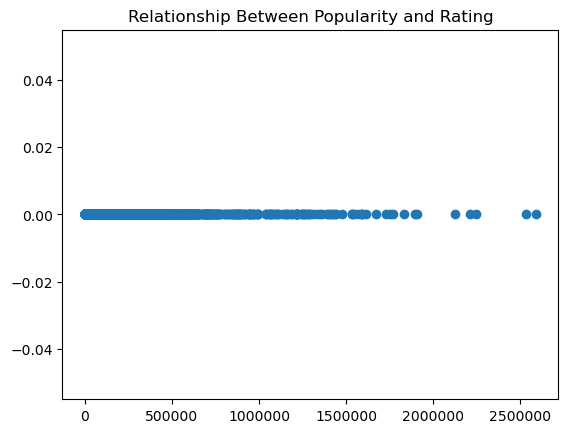

In [104]:
# DISPLAY RELATIONSHIP BETWEEN POPULARITY AND RATING

plt.scatter(x = anime_data['Members'], y = anime_data['Rating'])
plt.ticklabel_format(axis='x', style='plain')

plt.title('Relationship Between Popularity and Rating')

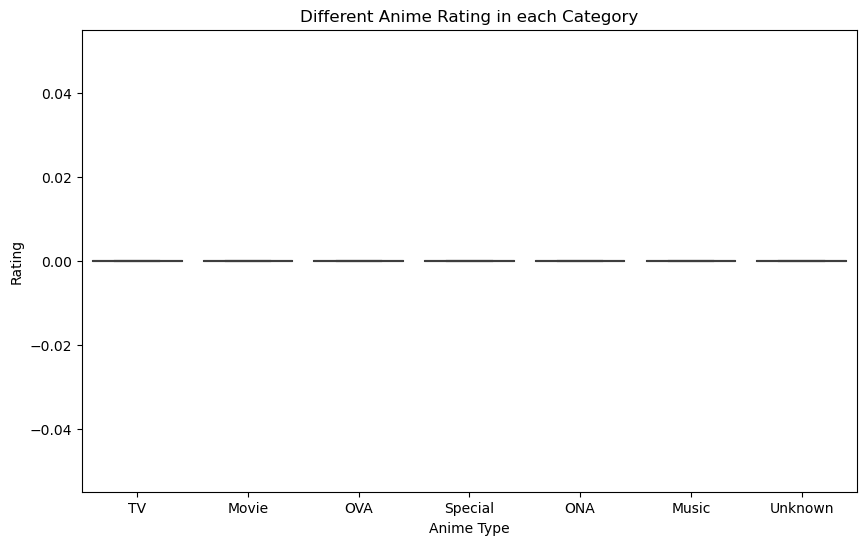

In [105]:
# DISPLAY DISTRIBUTION BETWEEN RATING AND ANIME CATEGORY

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Rating', data=anime_data, palette='Set1')
plt.title('Different Anime Rating in each Category')
plt.xlabel('Anime Type')
plt.ylabel('Rating')
plt.show()


Text(0.5, 1.0, 'Anime Episodes vs Rating')

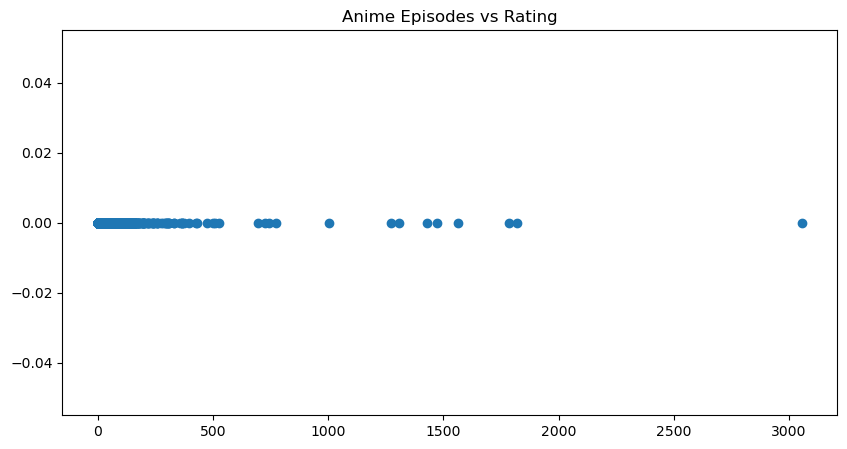

In [107]:
# DISPLAY RELATIONSHIP BETWEEN RATING AND EPISODES ANIME

plt.figure(figsize=(10,5))
plt.scatter(x = anime_data['Episodes'], y = anime_data['Rating'])
plt.title('Anime Episodes vs Rating')

Text(0.5, 1.0, 'Distribution Anime Episodes in different Category')

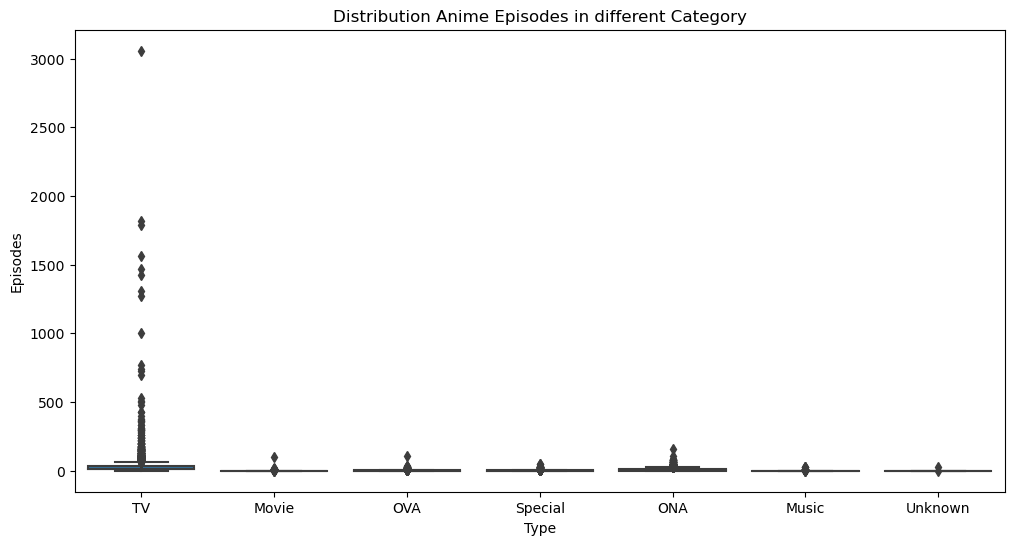

In [109]:
# DISPLAY DISTRIBUTION BETWEEN ANIME CATEGORY AND EPISODES

plt.figure(figsize=(12,6))
sns.boxplot(data = anime_data, x = 'Type', y = 'Episodes')
plt.title('Distribution Anime Episodes in different Category')

In [110]:
# AVERAGE OF ANIME EPISODES IN DIFFERENT CATEGORY

avg_episodes = anime_data.groupby(by = 'Type')['Episodes'].mean()
avg_episodes = pd.DataFrame(data = avg_episodes).reset_index()

avg_episodes

,Type,Episodes
0,Movie,1.120026
1,Music,1.176310
2,ONA,8.252229
3,OVA,2.329309
4,Special,2.455365
5,TV,32.253355
6,Unknown,0.675676


<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">

  <h4 style="font-size: 20px; color: #8E44AD; font-weight: bold; margin-bottom: 15px;">🧬 Explanation : 💡</h4>

TV category is an anime with the most episodes among others

</div>

## Multivariate Analysis

In [111]:
# BEFORE WE CONTINUE, WE NEED TO TRANSFORM CATEGORICAL COLUMNS FIRST TO NUMERICAL COLUMNS

# CHANGE EACH GENRE TO ONE-HOT ENCODING 
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(anime_data['genre_split'])

# CHANGE EACH MOVIE TO ONE-HOT ENCODING
type_encoded = pd.get_dummies(data = anime_data['Type'])

# CHANGE EACH MOVIE TO LABEL ENCODING (OPTIONAL)
type_label_encoded = []

   # CHANGE EACH CATEGORY ANIME TO NUMERIC LABEL ENCODING
for category in anime_data['Type']:
    if category == 'Movie':
        type_label_encoded.append(0)
    elif category == 'TV':
        type_label_encoded.append(1)
    elif category == 'OVA':
        type_label_encoded.append(2)
    elif category == 'Special':
        type_label_encoded.append(3)
    elif category == 'Music':
        type_label_encoded.append(4)
    else:
        type_label_encoded.append(5)

anime_data['type_encoded'] = type_label_encoded

# ------------------------------------------------------------------------------------

# CONVERT ENCODED GENRE TO DATAFRAME
genre_df = pd.DataFrame(data = genre_encoded, columns = mlb.classes_)


# MERGE DATAFRAME
new_anime_data = pd.concat((anime_data, genre_df, type_encoded), axis= 1)

new_anime_data

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV,Unknown
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,0,0,0,False,False,False,False,False,True,False
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1.0,"Sep 1, 2001",Unknown,...,0,0,0,True,False,False,False,False,False,False
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,0,0,0,False,False,False,False,False,True,False
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26.0,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,0,0,0,False,False,False,False,False,True,False
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,0,0,0,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17553,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,0.0,"Apr 4, 2021 to ?",Unknown,...,0,0,0,False,False,True,False,False,False,False
17554,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,0.0,2021 to ?,Unknown,...,0,0,0,False,False,False,False,False,True,False
17555,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,0.0,"Jul, 2021 to ?",Summer 2021,...,0,0,0,False,False,False,False,False,True,False
17556,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,0.0,Unknown,Unknown,...,0,0,0,False,False,False,False,False,True,False


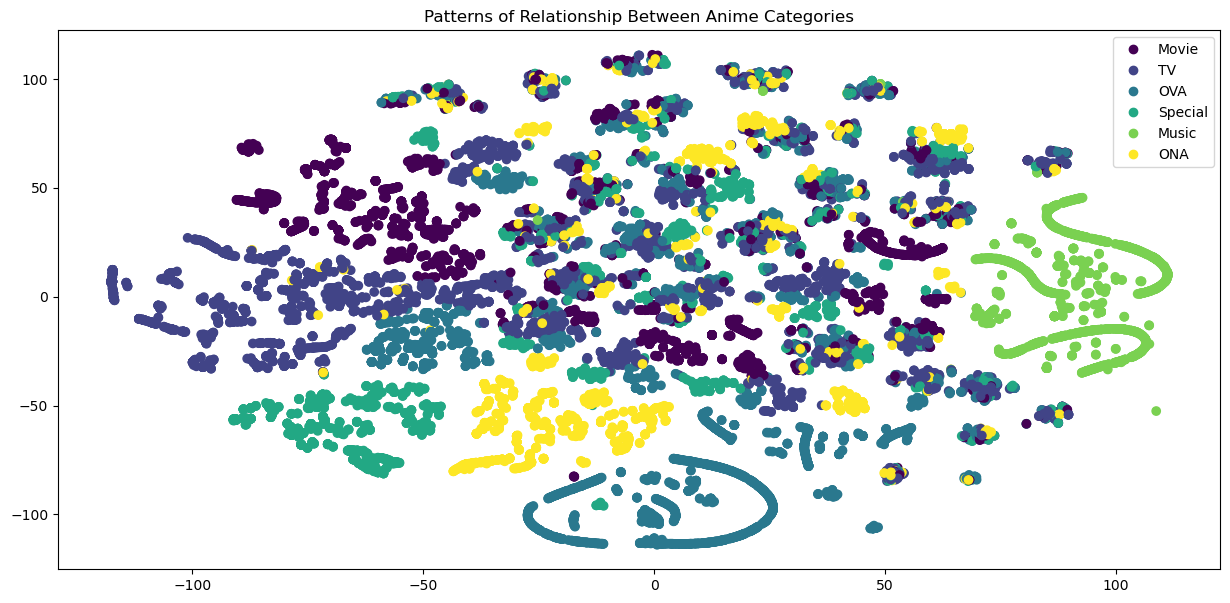

In [112]:
# FIND CLUSTERING RELATIONSHIP PATTERNS ANIME


# DETERMINES COLUMNS FOR WHICH U WANT TO FIND PATTERNS
cols = ['Episodes', 'Rating', 'Members',
       'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia',
       'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai',
       'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts',
       'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police',
       'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen',
       'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life',
       'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire',
       'Yaoi', 'Yuri', 'Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV']

# CHANGE ALL VALUES INTO THE SAME RANGE
zscore = StandardScaler()
anime_scaled = zscore.fit_transform(new_anime_data[cols])

# DIMENSION REDUCTION
tsne = TSNE(n_components= 2)
anime_reduced = tsne.fit_transform(anime_scaled)

# --------------------------------------------------------------------------------------------------------

# VISUALIZATION
plt.figure(figsize=(15,7))
scatter = plt.scatter(x = anime_reduced[:, 0], y = anime_reduced[:, 1], c = new_anime_data['type_encoded'])

plt.title('Patterns of Relationship Between Anime Categories')

# SHOW LEGEND
plt.legend(handles = scatter.legend_elements()[0], labels = ['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'])
plt.show()


<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">

  <h4 style="font-size: 20px; color: #8E44AD; font-weight: bold; margin-bottom: 15px;">🧬 Explanation : 💡</h4>

we want to know the relationship between anime based on anime Type/Category using TSNE. <br>

From the visualization above, it shows that each data point that is close to each other, they have the same characteristics as each other. It can be seen that each category that is the same, the data points are close to each other... such as the categories anime music, ONA, Special and movie form a cluster. That means they have almost the same characteristics from each cluster.

**ok now we want display patterns relationship between selected anime**
</div>

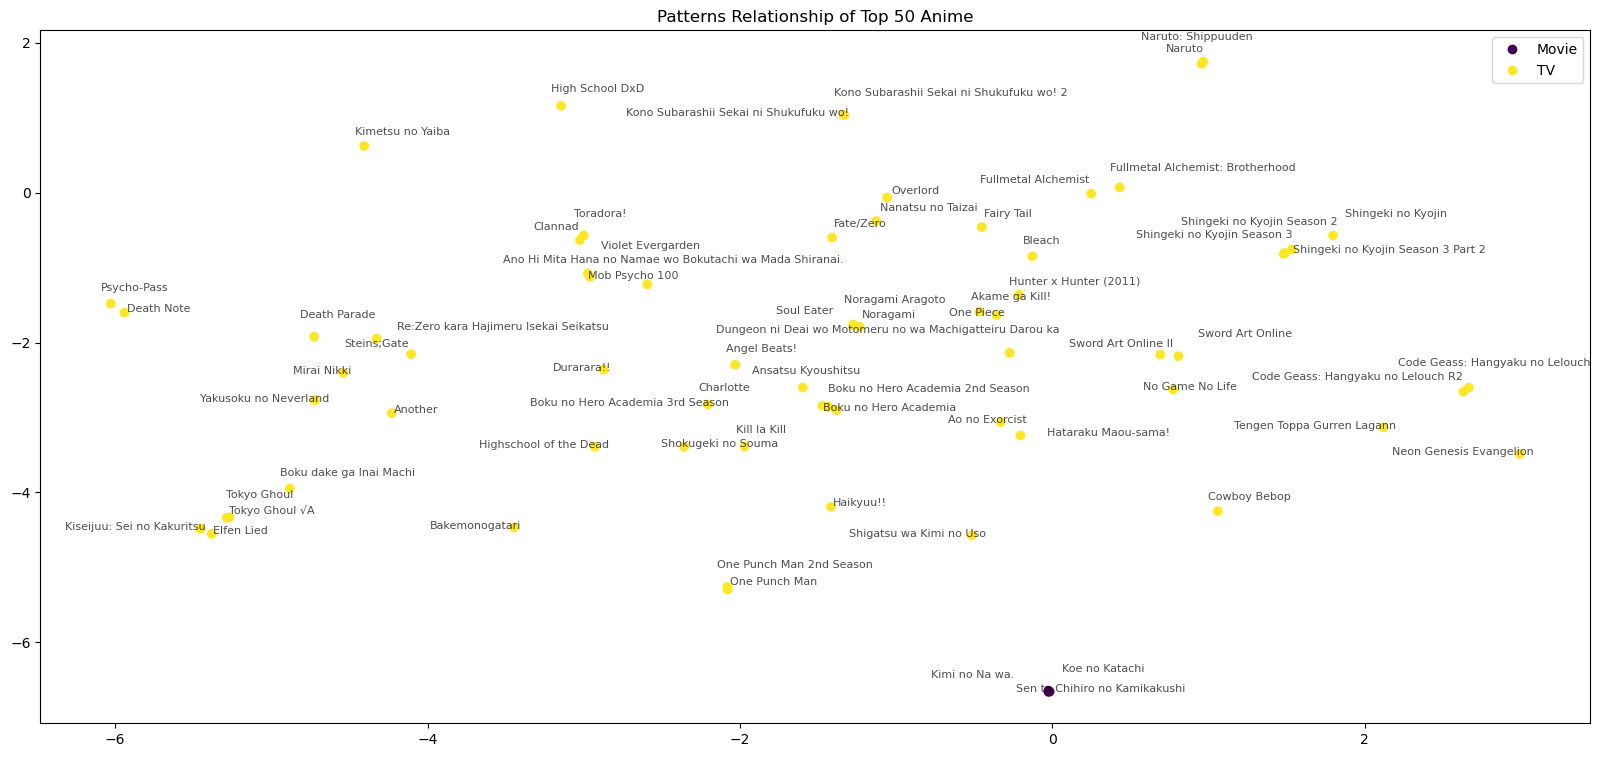

In [114]:
# LETS SAY WE WANT TO SEE THE PATTERNS FOR THE MOST 50 POPULAR ANIME

popular_anime = new_anime_data.sort_values(by = 'Members', ascending=False).reset_index(drop=True)
popular_anime = popular_anime.nlargest(n = 70, columns='Members')


# DETERMINES COLUMNS FOR WHICH U WANT TO FIND PATTERNS
cols = ['Episodes', 'Rating', 'Members',
       'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia',
       'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai',
       'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts',
       'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police',
       'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen',
       'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life',
       'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire',
       'Yaoi', 'Yuri', 'Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV']


# CHANGE ALL VALUES INTO THE SAME RANGE
zscore = StandardScaler()
anime_scaled_2 = zscore.fit_transform(popular_anime[cols])


# DIMENSION REDUCTION
tsne = TSNE(n_components= 2)
anime_reduced_2 = tsne.fit_transform(anime_scaled_2)


# --------------------------------------------------------------------------------------------------------

# VISUALIZATION
plt.figure(figsize=(20,9))
scatter = plt.scatter(x = anime_reduced_2[:, 0], y = anime_reduced_2[:, 1], c = popular_anime['type_encoded'])

plt.title('Patterns Relationship of Top 50 Anime')

# SHOW ANIME NAME FOR EACH DATA POINTS
texts = []
for i, txt in enumerate(popular_anime['Name']):
    text = plt.text(anime_reduced_2[i, 0], anime_reduced_2[i, 1] + 0.1, txt, fontsize=8, alpha=0.7, ha='center')
    texts.append(text)

# Use adjustText to prevent overlap
adjust_text(texts)

# SHOW LEGEND
plt.legend(handles = scatter.legend_elements()[0], labels = ['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'])
plt.show()



<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">

  <h4 style="font-size: 20px; color: #8E44AD; font-weight: bold; margin-bottom: 15px;">🧬 Explanation : 💡</h4>

  From the visualization above, we visualize the TSNE of 50 famous anime. Each data point reflects the characteristics of an anime. Data points that are close together mean that the anime has almost the same characteristics (such as similar genres, ratings, members, episodes, types). And data points that are far apart mean that the anime has different characteristics (not the same).

For example, like the anime Naruto, Naruto Shippuden and Dragon Ball Z whose data points are close together. That means that the anime has similarities to each other.

</div>

# Anime Similarity

<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">


we will do anime similarities based on anime genre and type

</div>

In [116]:
# CREATE ANIME SIMILARITY BASED GENRE AND CATEGORY FEATURE


# CONCATENATE GENRE AND TYPE ENCODED
df_encoded = pd.concat((genre_df, type_encoded), axis=1)

# CALCULATE COSINE SIMILARITY BASED GENRE AND TYPE ANIME
similarity = cosine_similarity(X = df_encoded, Y = df_encoded)


# FUNCTION TO SEARCH SIMILAR ANIME
def anime_similarity(anime_name, top_n = 5):
    
    # GET INDEX OF ANIME NAME
    idx = anime_data[anime_data['Name'] == anime_name].index[0]  # --> TAKE INDEX SCALAR VALUE   <------ JUST IGNORE THIS COOMENT IF U DONT UNDERSTAND

    # GET SIMILARITY SCORE BETWEEN SEARCHED ANIME AND OTHER ANIMES
    anime_scores = list(enumerate(similarity[idx]))   # ----> SEARCHED BY INDEX ANIME

    # SORT SIMILARITY SCORE BY DESCENDING
    anime_scores = sorted(anime_scores, key = lambda x : x[1], reverse= True)  

    #print('Index Target, Similarity Scores')
    #display(anime_scores[:3])  # THIS CONTAINS 1 LIST AND 2 TUPLE . THE FIRST TUPLE IS INDEX OF TARGETED ANIME , AND THE SECOND TUPLE IS SIMILARITY SCORE BETWEEN CURRENT ANIME AND TARGET ANIME

    # TAKE TOP_N MOST SIMILAR ANIME (INCLUDING HIMSELF)
    top_n_anime = anime_scores[: top_n + 1]

    #display(top_n_anime)

    return top_n_anime  # --> RETURN [ (INDEX OF TARGETED ANIME, SIMILAR SCORE BETWEEN CURRENT ANIME AND TARGET ANIME) ]


In [117]:
df_encoded

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV,Unknown
0,1,1,0,1,0,0,1,0,0,0,...,0,0,0,False,False,False,False,False,True,False
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,True,False,False,False,False,False,False
2,1,1,0,1,0,0,1,0,0,0,...,0,0,0,False,False,False,False,False,True,False
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,False,False,False,False,False,True,False
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17553,0,1,0,0,0,0,0,0,0,0,...,0,0,0,False,False,True,False,False,False,False
17554,0,0,0,1,0,0,0,0,0,0,...,0,0,0,False,False,False,False,False,True,False
17555,0,0,0,0,1,0,0,0,0,0,...,0,0,0,False,False,False,False,False,True,False
17556,0,1,0,1,0,0,0,0,0,0,...,0,0,0,False,False,False,False,False,True,False


# Display Anime Similarity

<div style="background-color: #E5F5FF; 
            border-radius: 10px; 
            font-size: 16px; 
            color: #333333; 
            border-left: 6px solid #8E44AD; 
            border-top: 6px solid #8E44AD; 
            padding: 20px 25px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            font-family: 'Arial', sans-serif; 
            transition: transform 0.3s ease, box-shadow 0.3s ease;">

  <h4 style="font-size: 20px; color: #8E44AD; font-weight: bold; margin-bottom: 15px;">🧬 Explanation : 💡</h4>

  we will display anime similarity between each other

</div>

In [119]:
# DISPLAY RECOMMENDATION ANIME BASED SIMILARITY OF GENRE AND TYPE

# DISPLAY TOP 10 ANIME SIMILAR WITH DORAEMON

search_anime = 'Doraemon'   # RECOMMEND ANIME SIMILAR TO DORAEMON
n = 10
recommended_anime = anime_similarity(anime_name= search_anime, top_n = n)

# SEPARATE BETWEEN INDEX OF TARGETED ANIME AND SIMILAR SCORE
anime_index = [i[0] for i in recommended_anime]
similar_score = [i[1] for i in recommended_anime]

# -----------------------------------------------------------------------------------------------------


# DISPLAY NAME, GENRE AND TYPE FOR MOST SIMILAR ANIME
anime = anime_data.loc[anime_index, ['Name', 'Genres', 'Type']].reset_index(drop=True)

anime['similar_score'] = similar_score
anime = anime[anime['Name'] != search_anime]    # DROP CURRENT ANIME

print(f'Top {n} Anime who similar with {search_anime}')
anime

Top 10 Anime who similar with Doraemon


,Name,Genres,Type,similar_score
1,Saru Getchu: On Air,"Adventure, Comedy, Fantasy, Kids, Romance, Sho...",TV,0.925820
2,Doraemon (1979),"Adventure, Comedy, Fantasy, Kids, Sci-Fi, Shounen",TV,0.925820
3,Saru Getchu: On Air 2nd,"Adventure, Comedy, Fantasy, Kids, Romance, Sho...",TV,0.925820
4,Samurai Girl Real Bout High School,"Adventure, Comedy, Fantasy, Shounen",TV,0.912871
5,Fushigi na Koala Blinky,"Adventure, Comedy, Kids, Fantasy",TV,0.912871
6,Pokemon Housoukyoku,"Adventure, Comedy, Kids, Fantasy",TV,0.912871
7,TaoTao Ehonkan Sekai Doubutsu Banashi,"Adventure, Fantasy, Comedy, Kids",TV,0.912871
8,Ojarumaru,"Adventure, Comedy, Kids, Fantasy",TV,0.912871
9,Happy☆Lucky Bikkuriman,"Adventure, Comedy, Fantasy, Kids",TV,0.912871
10,Magical Hat,"Adventure, Comedy, Fantasy, Kids",TV,0.912871


In [120]:
# DISPLAY TOP 10 ANIME SIMILAR WITH ONE PIECE

search_anime = 'One Piece'    # RECOMMEND ANIME SIMILAR TO ONE PIECE
n = 10
recommended_anime = anime_similarity(anime_name= search_anime, top_n = n)

# SEPARATE BETWEEN INDEX OF TARGETED ANIME AND SIMILAR SCORE
anime_index = [i[0] for i in recommended_anime]
similar_score = [i[1] for i in recommended_anime]

# -----------------------------------------------------------------------------------------------------


# DISPLAY NAME, GENRE AND TYPE FOR MOST SIMILAR ANIME
anime = anime_data.loc[anime_index, ['Name', 'Genres', 'Type']].reset_index(drop=True)

anime['similar_score'] = similar_score
anime = anime[anime['Name'] != search_anime]    # DROP CURRENT ANIME

print(f'Top {n} Anime who similar with {search_anime}')
anime

Top 10 Anime who similar with One Piece


,Name,Genres,Type,similar_score
1,Digimon Frontier,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,0.935414
2,Ueki no Housoku,"Action, Adventure, Comedy, Super Power, Supern...",TV,0.875000
3,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy, Martial Ar...",TV,0.875000
4,Dragon Ball Kai,"Action, Adventure, Comedy, Fantasy, Martial Ar...",TV,0.875000
5,One Piece: Episode of Nami - Koukaishi no Nami...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,0.875000
6,One Piece: Episode of Merry - Mou Hitori no Na...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,0.875000
7,Dragon Ball Kai (2014),"Action, Adventure, Comedy, Super Power, Martia...",TV,0.875000
8,Dragon Ball Super,"Action, Adventure, Comedy, Super Power, Martia...",TV,0.875000
9,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,"Action, Adventure, Comedy, Super Power, Drama,...",Special,0.875000
10,One Piece: Long Ring Long Land-hen,"Action, Adventure, Comedy, Super Power, Drama,...",Special,0.875000


In [121]:
# DISPLAY TOP 10 ANIME SIMILAR WITH Kimi no Na wa.


search_anime = 'Kimi no Na wa.'    # RECOMMEND ANIME SIMILAR TO Kimi no Na wa.
n = 10
recommended_anime = anime_similarity(anime_name= search_anime, top_n = n)

# SEPARATE BETWEEN INDEX OF TARGETED ANIME AND SIMILAR SCORE
anime_index = [i[0] for i in recommended_anime]
similar_score = [i[1] for i in recommended_anime]

# -----------------------------------------------------------------------------------------------------


# DISPLAY NAME, GENRE AND TYPE FOR MOST SIMILAR ANIME
anime = anime_data.loc[anime_index, ['Name', 'Genres', 'Type']].reset_index(drop=True)

anime['similar_score'] = similar_score
anime = anime[anime['Name'] != search_anime]    # DROP CURRENT ANIME

print(f'Top {n} Anime who similar with {search_anime}')
anime

Top 10 Anime who similar with Kimi no Na wa.


,Name,Genres,Type,similar_score
0,Aura: Maryuuin Kouga Saigo no Tatakai,"Supernatural, Drama, Romance, School",Movie,1.000000
2,Seishun Buta Yarou wa Yumemiru Shoujo no Yume ...,"Supernatural, Drama, Romance, School",Movie,1.000000
3,Air Movie,"Drama, Romance, Supernatural",Movie,0.894427
4,Kokoro ga Sakebitagatterunda.,"Drama, Romance, School",Movie,0.894427
5,"Kimi to, Nami ni Noretara","Drama, Romance, Supernatural",Movie,0.894427
6,Wind: A Breath of Heart (TV),"Drama, Romance, School, Supernatural",TV,0.800000
7,Wind: A Breath of Heart OVA,"Romance, Supernatural, School, Drama",OVA,0.800000
8,Clannad Movie,"Drama, Romance, Fantasy, School",Movie,0.800000
9,"""Bungaku Shoujo"" Movie","Mystery, Drama, Romance, School",Movie,0.800000
10,Da Yu Hai Tang (Movie),"Adventure, Supernatural, Drama, Romance",Movie,0.800000


In [123]:
# DISPLAY TOP 10 ANIME SIMILAR WITH Yasuji no Pornorama: Yacchimae!!


search_anime = 'Yasuji no Pornorama: Yacchimae!!'    # RECOMMEND ANIME SIMILAR TO Yasuji no Pornorama: Yacchimae!!	
n = 10
recommended_anime = anime_similarity(anime_name= search_anime, top_n = n)

# SEPARATE BETWEEN INDEX OF TARGETED ANIME AND SIMILAR SCORE
anime_index = [i[0] for i in recommended_anime]
similar_score = [i[1] for i in recommended_anime]

# -----------------------------------------------------------------------------------------------------


# DISPLAY NAME, GENRE AND TYPE FOR MOST SIMILAR ANIME
anime = anime_data.loc[anime_index, ['Name', 'Genres', 'Type']].reset_index(drop=True)

anime['similar_score'] = similar_score
anime = anime[anime['Name'] != search_anime]    # DROP CURRENT ANIME

print(f'Top {n} Anime who similar with {search_anime}')

anime

Top 10 Anime who similar with Yasuji no Pornorama: Yacchimae!!


,Name,Genres,Type,similar_score
1,Senya Ichiya Monogatari,"Hentai, Fantasy",Movie,0.816497
2,Blue Seagull,"Action, Hentai",Movie,0.816497
3,Hi Gekiga Ukiyoe Senya Ichiya,"Action, Hentai",Movie,0.816497
4,Suzumi-bune,"Hentai, Historical",Movie,0.816497
5,Cleopatra,"Sci-Fi, Hentai, Historical",Movie,0.707107
6,Choujin Densetsu Urotsukidouji Movie,"Action, Hentai, Demons, Drama",Movie,0.632456
7,Kanashimi no Belladonna,"Dementia, Drama, Hentai, Historical",Movie,0.632456
8,Choujin Densetsu Urotsukidouji 2,"Demons, Fantasy, Hentai, Horror, Sci-Fi",Movie,0.577350
9,Na Bbeun Sang Sa,"Slice of Life, Hentai, Drama, Romance, Thrille...",Movie,0.534522
10,Pure Mail,Hentai,OVA,0.500000
